## Capstone Project 1: IR spectral analysis of organic compounds via machine learning approach

### Part 1: Data Wrangling
<br/>
<b> Submission: </b>  
Create a short document (1-2 pages) in your github describing the data wrangling steps that you undertook to clean your capstone project data set. 
- What kind of cleaning steps did you perform?   
- How did you deal with missing values, if any?   
- Were there outliers, and how did you decide to handle them?   

This document will eventually become part of your milestone report.

****
<b> Project scope: </b>    
IR spectroscopy is a versatile and a precise method for chemical identification because every compound exhibits unique IR spectral features; however, the spectral features tend to be ambiguous. A manual interpretation is often time-consuming and may lead to inconsistent, erroneous results. Hence, there is a need for a rapid, accurate, and reproducible alternative to a manual interpretation. 

The purpose of this program is to automate the IR spectrum interpretation routine of an unknown compound with the aid of the IR spectra database of over 40,000 known compounds available in the NIST database (http://webbook.nist.gov/chemistry/vib-ser/). The <b>goal</b> of this work is to come up with an accurate and reproducible 'guessing' algorithms.

<b> TOC </b>   
&nbsp;&nbsp; I.   Data overview  
&nbsp;&nbsp; II.   Data cleaning   
&nbsp;&nbsp; III.  Data treatment  
&nbsp;&nbsp; IV. Data analysis  
&nbsp;&nbsp; V. Conclusions


****
### I. Data overview

NIST chemistry webbook (http://webbook.nist.gov/chemistry/download/) lists over 40,000 known compounds. The webbook consists of three columns:
  - Name: chemical name  
  - Formula: chemical formula  
  - CAS: a unique identification number (https://support.cas.org/content/chemical-substances/faqs#zero) 

As a starting point, I am taking this chemical list and cut down the number of entries to yield the compounds that are relevant to this project. 

In [1]:
import pandas as pd
df=pd.read_csv('data/NIST_chemicals_list.csv', header=0, names=['Name','Formula','CAS'])
df.info() #check
df.head() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72618 entries, 0 to 72617
Data columns (total 3 columns):
Name       72456 non-null object
Formula    70767 non-null object
CAS        44657 non-null object
dtypes: object(3)
memory usage: 1.7+ MB


Name  Formula  CAS
0             Electron       e-  NaN
1  Iron(2) oxide anion     FeO-  NaN
2       AsF3..Cl anion  AsClF3-  NaN
3                AgH2-    H2Ag-  NaN
4              HAg(H2)     H3Ag  NaN

It is seen that the list consists of 72,618 entries. Certainly, this number is only a fraction of all compounds that have assigned CAS number. According to the chemical abstracts service, the registry currently (January 28th, 2018) has 67,483,385 sequences (https://support.cas.org/content/counter).

### II. Data cleaning

<b> 1) Remove all entries with null values and remove duplicates </b>  
-Since all three columns are essential, the first step is to remove rows entries that contain null values in any of the columns.   

In [2]:
df.dropna(inplace=True) #remove rows that cotain null values in any of the columns
df.info() #assess data types and number of entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44455 entries, 10613 to 55269
Data columns (total 3 columns):
Name       44455 non-null object
Formula    44455 non-null object
CAS        44455 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


<b> 2) Check for duplicates in the CAS column </b>  
-Since there are no duplicates, set the unique CAS number as the index column

In [3]:
no_unique_cas=len(set(df.CAS))
no_cas_entries=len(df.CAS)                  

print('\n')
print('Number of unique CAS:', len(set(df.CAS))) 
print('Number of CAS entries:', len(df.CAS))

if no_unique_cas==no_cas_entries:
    print('There are no duplicates')
else:
    print('There are no duplicates')
                  
df=df.set_index('CAS') #since there are no duplicates, set the unique CAS number as the index column
df.head()



Number of unique CAS: 44455
Number of CAS entries: 44455
There are no duplicates


Name     Formula
CAS                                                                     
100-00-5                          Benzene, 1-chloro-4-nitro-   C6H4ClNO2
100-01-6                                      p-Nitroaniline    C6H6N2O2
100-02-7                                    Phenol, 4-nitro-     C6H5NO3
100043-29-6                                     2H-Tetrazole       CH2N4
100046-00-2  2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide  C18H22N2O2

<b> 3) Check for chemical names duplicates </b>  
-There are indeed duplicate names, but occasionally with a different chemical formula. In the exceptional case, a more precise naming and/or chemical formula is required. 

For instance, the name Tungsten bromide occurs twice with assigned chemical formulae BrW (CAS:74966-78-2) and Br6W (CAS:13701-86-5), respectively. In this case, the one with CAS:13701-86-5 should be more precisely named Tungsten(VI) Bromide to differentiate with the other duplicate.  

-As a second example, the entries with duplicate names have exactly the same chemical formula. 

For instance, the compound named 1,4:5,8-Dimethanonaphthalene, decahydro-9-methyoxy-, stereoisomer with a chemical formula C12H18O is listed as four different CAS numbers: 36197-17-8, 36197-16-7, 82189-44-4, and 82161-26-0. 

In this case, the name generally specifies that this compound occurs as a stereoisomer.

-As a third example, D-Glucose with a chemical formula C6H12O6 is listed twice as two different CAS numbers, 26655-34-5 and 492-62-6.

-Nonetheless, the analysis of chemical compounds via FTIR spectroscopy, the precise chemical names or chemical formulae are not required.  

-Some explanations/discussions pertaining to this issue can be found here:    
- https://en.wikipedia.org/wiki/CAS_Registry_Number  
- http://www.chemspider.com/blog/cas-registry-numbers-and-how-confused-we-are.html
- https://www.researchgate.net/post/Why_do_some_chemicals_have_multiple_Chemical_Abstracts_Service_CAS_numbers

In [4]:
#Get entries with duplicated names
df[df.Name.duplicated(keep=False)].sort_values('Name').head()

Name        Formula
CAS                                                  
26655-34-5            &#945;-D-Glucose        C6H12O6
492-62-6              &#945;-D-Glucose        C6H12O6
10639-26-6  &#945;-Lactose monohydrate  C12H22O11.H2O
5989-81-1   &#945;-Lactose monohydrate  C12H22O11.H2O
10208-80-7            &#945;-Muurolene         C15H24

Note that the symbolic characters such as '&\#945;' in '&\#945;-D-Glucose' is a hexadecimal character for symbols and Greek letters. In this case, '&\#945;' is '&#945;'. 

In [5]:
#No. of unique values from these duplicates
len(set(df.Name[df.Name.duplicated(keep=False)]))

229

Hence, there are 229 species with duplicate names, but unique CAS number.

<b> 4) Inspect isomers </b>  
-Assuming that each entry is unique (https://en.wikipedia.org/wiki/CAS_Registry_Number, http://support.cas.org/content/chemical-substances), compounds that have the same chemical formula, but different chemical structures, hence different chemical names are referred to as <b>isomers</b> (https://en.wikipedia.org/wiki/Isomer).  

Nonetheless, we have seen in section <b> 3a </b> that some of these isomers (i.e., 1,4:5,8-Dimethanonaphthalene, decahydro-9-methyoxy-, stereoisomer) are ambiguously referred to the same names with added adjective, stereoisomer.  

Furthermore, some of these entries are pure elements (e.g., Tellurium, Te, with CAS numbers 22541-49-7 and 13494-80-9). In this case, duplicated entries may, but not necessarily refer to different <b>allotropes</b> (https://en.wikipedia.org/wiki/Allotropy). 

-It is also seen that some of the entries are not assigned with the proper chemical formula (e.g., CAS numbers: 26700-39-0,
25988-63-0, 61257-62-3, 26982-20-7, and 61857-39-4)


In [6]:
#Get entries with duplicated chemical formulae
df[df.Formula.duplicated(keep=False)].sort_values('Formula')

Name     Formula
CAS                                                                       
26700-39-0   Poly-L-lysine hydrobromide&middot;phenylalanin...         ()n
25988-63-0                          Poly-L-lysine hydrobromide         ()n
61257-62-3   Poly-L-lysine hydrobromide&middot;alanine copo...         ()n
26982-20-7                       Poly-L-arginine hydrochloride         ()n
61857-39-4                      Poly-L-histidine hydrochloride         ()n
9002-89-5                                    Polyvinyl alcohol    (C2H4O)n
25322-68-3                                 Polyethylene glycol    (C2H4O)n
26063-22-9                          Polypropylene, syndiotatic     (C3H6)n
9003-07-0                               Polypropylene, atactic     (C3H6)n
25085-53-4                             Polypropylene, isotatic     (C3H6)n
25722-18-3                                        Polypropanal    (C3H6O)n
25722-06-9                                Poly(oxacyclobutane)    (C3H6O)n
26009-03-0                                       Polyglycolide   (C4H4O4)n
52224-87-0                                Polyethylene oxalate   (C4H4O4)n
25038-44-2                             trans-1,4-Polybutadiene     (C4H6)n
9003-17-2                           1,4-Polybutadiene, MS-1045     (C4H6)n
40022-03-5                               cis-1,4-Polybutadiene     (C4H6)n
31213-03-3                                Poly- -butyrolactone   (C4H6O2)n
25087-26-7                                Polymethacrylic acid   (C4H6O2)n
9003-28-5                                       Poly(1-butene)     (C4H8)n
9003-27-4                                      Polyisobutylene     (C4H8)n
25722-29-6                Poly-1,1-dimethyl-1-silatrimethylene  (C5H12Si)n
25036-32-2                            Polyvinyltrimethylsilane  (C5H12Si)n
29300-20-7                                trans-Polypentenamer     (C5H8)n
9003-31-0                                               Rubber     (C5H8)n
38439-19-9                                  cis-Polypentenamer     (C5H8)n
28702-43-4                                      Polypentenamer     (C5H8)n
26354-94-9                           Poly-&#948;-valerolactone   (C5H8O2)n
87210-32-0                           Poly(methyl methacrylate)   (C5H8O2)n
25038-54-4                             Poly-&#949;-caprolactam  (C6H11NO)n
...                                                        ...         ...
15969-55-8                                         ONO-NO2 (D)        N2O4
10544-72-6                                Dinitrogen tetroxide        N2O4
137122-36-2                                              NS-SN        N2S2
25474-92-4                                  Disulfur dinitride        N2S2
137122-34-0                                                NSS         NS2
12033-57-7                                                 NS2         NS2
1314-15-4                                     Platinum dioxide        O2Pt
50417-46-4                                            cyc-PtO2        O2Pt
7631-86-9                                    Silicon(iv) oxide        O2Si
14808-60-7                                       Silicon oxide        O2Si
99493-55-7                                       Silicon oxide        O2Si
60676-86-0                                     Silicon dioxide        O2Si
14464-46-1                                       Silicon oxide        O2Si
158039-02-2                                               OSrO        O2Sr
1314-18-7                                             cyc-SrO2        O2Sr
59863-17-1                                   Tellurium dioxide        O2Te
7446-07-3                                  Tellurium(IV) oxide        O2Te
1317-70-0                                       Titanium oxide        O2Ti
13463-67-7                                    Titanium dioxide        O2Ti
1309-63-3                                       Titanium oxide        O2Ti
12440-00-5                                    Phosphorus oxide        O6P4
10248-58

In [7]:
#No. of unique values from these duplicates
len(set(df.Formula[df.Formula.duplicated(keep=False)]))

5251

Hence, there are 5,251 species with duplicated formula (i.e., 5,251 compounds having <b>isomers</b>, <b>allotropes</b>, and possibly different purities).

<b> 5) Retain compounds that contain organic elements </b>  
Due to the overwhelming amount of information, the current interest is to assess a certain classes of organic compounds that contain the following elements: C, H, O, N, S, P, F, Cl, Br, and I. By eliminating the rest of the compounds, but those that contain these elements we will eliminate some of the ambiguities that we encountered above. 

To cut down the number of entries to just those that contain the elements listed above, the steps are as follows:

&nbsp;&nbsp; i) Generate a dictionary of periodic table of elements  
&nbsp;&nbsp; ii) Get unique elements present in each compound  
&nbsp;&nbsp; iii) Remove compounds that contain inorganic elements

<b> i) Using NIST periodic table of elements, generate a dictionary of periodic table of elements </b>  
-Notice that there are 120 elements instead of 118. The two additional elements are the hydrogen isotopes (i.e., D and T)

In [8]:
import common as common
# 1-1a. Call out function

file_name = 'data/NIST_periodic_table.txt'
periodic_table = common.create_periodic_table(file_name)

# 1-1b.Test out dictionary by calling out the element keys
print(list(periodic_table.keys()))
print("\n")
print("Number of dictinct elements in the dictionary:", len(periodic_table))

['H', 'D', 'T', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']


Number of dictinct elements in the dictionary: 120


![periodic_table](data/Periodic_Table_wiki.png)


<b> (ii) Get unique elements present in the compound </b>

In [9]:
df_el=common.extract_unique_elements(df)
df_el.head()

Name     Formula  \
CAS                                                                        
100-00-5                          Benzene, 1-chloro-4-nitro-   C6H4ClNO2   
100-01-6                                      p-Nitroaniline    C6H6N2O2   
100-02-7                                    Phenol, 4-nitro-     C6H5NO3   
100043-29-6                                     2H-Tetrazole       CH2N4   
100046-00-2  2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide  C18H22N2O2   

                     Elements  
CAS                            
100-00-5     [C, H, Cl, N, O]  
100-01-6         [C, H, N, O]  
100-02-7         [C, H, N, O]  
100043-29-6         [C, H, N]  
100046-00-2      [C, H, N, O]

In [10]:
df_el.count()

Name        44455
Formula     44455
Elements    44455
dtype: int64

<b> (iii) Extract only compounds that contain any of the following C, H ,O ,N, S, P, F, Cl, Br, and I elements and store into a new df</b>

In [11]:
#specify elements in the elements list
#NOTE: need to make the code more efficient by avoiding the use of a for loop

elements_list=['C','H','O','N','S','P','F','Cl','Br','I'] #specify the list of elements
df_el_filt=common.shorten_df_by_elements_list(df_el, elements_list,'any') #Filter compounds by specifying list of acceptable elements

                                Name    Formula          Elements
CAS                                                              
100-00-5  Benzene, 1-chloro-4-nitro-  C6H4ClNO2  [C, H, Cl, N, O]
                    Name   Formula      Elements
CAS                                             
100-01-6  p-Nitroaniline  C6H6N2O2  [C, H, N, O]
                      Name  Formula      Elements
CAS                                              
100-02-7  Phenol, 4-nitro-  C6H5NO3  [C, H, N, O]
                     Name Formula   Elements
CAS                                         
100043-29-6  2H-Tetrazole   CH2N4  [C, H, N]
                                                        Name     Formula  \
CAS                                                                        
100046-00-2  2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide  C18H22N2O2   

                 Elements  
CAS                        
100046-00-2  [C, H, N, O]  
                                                 Name    

                                      Name    Formula       Elements
CAS                                                                 
100-20-9  1,4-Benzenedicarbonyl dichloride  C8H4Cl2O2  [C, H, Cl, O]
                                  Name Formula   Elements
CAS                                                      
100-21-0  1,4-Benzenedicarboxylic acid  C8H6O4  [C, H, O]
                        Name   Formula    Elements
CAS                                               
1002-11-5  Decane, 3-chloro-  C10H21Cl  [C, H, Cl]
                         Name Formula Elements
CAS                                           
1002-17-1  2,9-Dimethyldecane  C12H26   [C, H]
                                                         Name   Formula  \
CAS                                                                       
10021-92-8  trans-Cyclohexane-1,3-dicarboxylic acid dimeth...  C10H16O4   

             Elements  
CAS                    
10021-92-8  [C, H, O]  
                           

                                 Name  Formula   Elements
CAS                                                      
10032-05-0  Heptanal, dimethyl acetal  C9H20O2  [C, H, O]
                                             Name   Formula   Elements
CAS                                                                   
10032-13-0  Butanoic acid, 3-methyl-, hexyl ester  C11H22O2  [C, H, O]
                                             Name   Formula   Elements
CAS                                                                   
10032-15-2  Butanoic acid, 2-methyl-, hexyl ester  C11H22O2  [C, H, O]
                              Name      Formula         Elements
CAS                                                             
100-32-3  Di-4-nitrophenyl sulfide  C12H8N2O4S2  [C, H, N, O, S]
                                  Name Formula      Elements
CAS                                                         
1003-29-8  1H-Pyrrole-2-carboxaldehyde  C5H5NO  [C, H, N, O]
                      

                                   Name   Formula       Elements
CAS                                                             
10049-60-2  2-butanamine, hydrochloride  C4H12ClN  [C, H, Cl, N]
                                    Name Formula   Elements
CAS                                                        
100-50-5  3-Cyclohexene-1-carboxaldehyde  C7H10O  [C, H, O]
                                                          Name    Formula  \
CAS                                                                         
100508-56-3  2,4-Dimethoxy-6-(2-fluoro-2,2-dinitroethoxy)-1...  C7H8FN5O7   

                    Elements  
CAS                           
100508-56-3  [C, H, F, N, O]  
                                                          Name      Formula  \
CAS                                                                           
100508-57-4  2-Methoxy-4,6-bis(2-fluoro-2,2-dinitroethoxy)-...  C8H7F2N7O11   

                    Elements  
CAS                           


                                        Name   Formula          Elements
CAS                                                                     
1006-99-1  Benzothiazole, 5-chloro-2-methyl-  C8H6ClNS  [C, H, Cl, N, S]
                              Name  Formula   Elements
CAS                                                   
1007-01-8  2-Norbornaneacetic acid  C9H14O2  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
1007-03-0  Cyclopropyl phenylmethanol  C10H12O  [C, H, O]
                            Name Formula   Elements
CAS                                                
100-70-9  2-Pyridinecarbonitrile  C6H4N2  [C, H, N]
                        Name Formula   Elements
CAS                                            
100-71-0  Pyridine, 2-ethyl-   C7H9N  [C, H, N]
                                             Name    Formula      Elements
CAS                                                                

                                                          Name    Formula  \
CAS                                                                         
100903-70-6  1,2-Naphthalenedione, 1-[[4-(1-pyrrolidinyl)ph...  C20H19N3O   

                 Elements  
CAS                        
100903-70-6  [C, H, N, O]  
                                     Name   Formula   Elements
CAS                                                           
1009-11-6  1-(4-Hydroxyphenyl)-1-butanone  C10H12O2  [C, H, O]
                 Name    Formula      Elements
CAS                                           
100-91-4  Eucatropine  C17H25NO3  [C, H, N, O]
                             Name  Formula   Elements
CAS                                                  
1009-14-9  1-Pentanone, 1-phenyl-  C11H14O  [C, H, O]
                                                     Name  Formula   Elements
CAS                                                                          
100-92-5  Benzeneethanamine, N,.alph

                             Name   Formula      Elements
CAS                                                      
1011-50-3  Alpha-quinolyl-ethanol  C11H11NO  [C, H, N, O]
                Name Formula    Elements
CAS                                     
101150-96-3  CHBr=CH  C2H2Br  [C, H, Br]
                                               Name   Formula   Elements
CAS                                                                     
1011-54-7  (E)-3-(2-Methoxyphenyl)-2-propenoic acid  C10H10O3  [C, H, O]
                            Name   Formula      Elements
CAS                                                     
101-16-6  3-Methoxydiphenylamine  C13H13NO  [C, H, N, O]
                                                      Name      Formula  \
CAS                                                                       
101166-96-5  2,2,2-Trichloro-1-cyanoethyl 4-chlorobenzoate  C10H5Cl4NO2   

                     Elements  
CAS                            
101166-96-5  [C, H, Cl,

                                         Name  Formula   Elements
CAS                                                              
1013-88-3  Benzenemethanimine, &#945;-phenyl-  C13H11N  [C, H, N]
                                 Name  Formula   Elements
CAS                                                      
10138-89-3  Butane, 1,1,3-trimethoxy-  C7H16O3  [C, H, O]
                                    Name  Formula   Elements
CAS                                                         
101-39-3  2-Propenal, 2-methyl-3-phenyl-  C10H10O  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
101398-58-7  (CH3)2N-CH=N(CH2)2N(CH3)2  C7H17N3  [C, H, N]
                                                          Name   Formula  \
CAS                                                                        
101399-45-5  6Alpha,21-diacetoxy-11beta,17alpha-dihydroxypr...  C25H34O8   

              Elements  
CAS           

                                        Name  Formula   Elements
CAS                                                             
10160-87-9  Propargylaldehyde diethyl acetal  C7H12O2  [C, H, O]
                                   Name  Formula   Elements
CAS                                                        
1016-09-7  Ether, methyl diphenylmethyl  C14H14O  [C, H, O]
                                                  Name   Formula   Elements
CAS                                                                        
101-61-1  Benzenamine, 4,4'-methylenebis[N,N-dimethyl-  C17H22N2  [C, H, N]
                                                          Name   Formula  \
CAS                                                                        
101611-75-0  1,3,5-Cyclohexanetriol, 2,2,4,4,6,6-hexamethyl...  C24H42O6   

              Elements  
CAS                     
101611-75-0  [C, H, O]  
                                                          Name  Formula  \
CAS               

                                                         Name    Formula  \
CAS                                                                        
10191-18-1  N,N-Bis(2-hydroxyethyl)-2-aminoethanesulfonic ...  C6H15NO5S   

                   Elements  
CAS                          
10191-18-1  [C, H, N, O, S]  
                                  Name     Formula          Elements
CAS                                                                 
1019-15-4  Phenazine,2-chloro-10-oxide  C12H7ClN2O  [C, H, Cl, N, O]
                                                  Name   Formula      Elements
CAS                                                                           
10191-60-3  N-Cyano-s,s'-dimethyldithioimido carbonate  C4H6N2S2  [C, H, N, S]
                     Name Formula Elements
CAS                                       
10192-32-2  1-Tetracosene  C24H48   [C, H]
                                           Name      Formula          Elements
CAS                          

                               Name   Formula   Elements
CAS                                                     
102-06-7  Guanidine, N,N'-diphenyl-  C13H13N3  [C, H, N]
                          Name    Formula      Elements
CAS                                                    
102-07-8  Urea, N,N'-diphenyl-  C13H12N2O  [C, H, N, O]
                                  Name   Formula      Elements
CAS                                                           
102082-89-3  2,6-Difluorocinnamic acid  C9H6F2O2  [C, H, F, O]
                                          Name Formula Elements
CAS                                                            
1020-87-7  Benzene,1,4-bis(2,2-dimethylpropyl)  C16H26   [C, H]
                        Name Formula Elements
CAS                                          
10208-80-7  &#945;-Muurolene  C15H24   [C, H]
                        Name   Formula   Elements
CAS                                              
102-09-0  Diphenyl carbonate  C13H10O3  [C

                    Name  Formula      Elements
CAS                                            
10230-68-9  Nitroacetone  C3H5NO3  [C, H, N, O]
                             Name   Formula      Elements
CAS                                                      
10230-69-0  1-(Benzylthio)acetone  C10H12OS  [C, H, O, S]
                                    Name Formula   Elements
CAS                                                        
102322-83-8  5-methyl-(E)-2-hepten-4-one  C8H14O  [C, H, O]
                                          Name Formula   Elements
CAS                                                              
102-32-9  Acetic acid, (3,4-dihydroxyphenyl)-,  C8H8O4  [C, H, O]
                                                         Name   Formula  \
CAS                                                                       
10232-93-6  2-Butenedioic acid (Z)-, bis(2-methoxyethyl) e...  C10H16O6   

             Elements  
CAS                    
10232-93-6  [C, H, O]  
      

                                  Name     Formula      Elements
CAS                                                             
10263-96-4  N,N'-dipropylhexanediamide  C12H24N2O2  [C, H, N, O]
                            Name  Formula      Elements
CAS                                                    
10264-16-1  Butanamide, N-butyl-  C8H17NO  [C, H, N, O]
                            Name   Formula      Elements
CAS                                                     
10264-17-2  Butanamide, N-hexyl-  C10H21NO  [C, H, N, O]
                             Name   Formula      Elements
CAS                                                      
10264-18-3  Pentanamide, N-phenyl  C11H15NO  [C, H, N, O]
                             Name  Formula      Elements
CAS                                                     
10264-24-1  Propanamide, N-hexyl-  C9H19NO  [C, H, N, O]
                            Name   Formula      Elements
CAS                                                     
10264-2

                                   Name Formula Elements
CAS                                                     
102877-01-0  3-hexene, 2,2,4-trimethyl-   C9H18   [C, H]
                                 Name Formula Elements
CAS                                                   
102877-02-1  2,4,4-trimethyl-2-hexene   C9H18   [C, H]
                                  Name   Formula    Elements
CAS                                                         
10288-13-8  1,2-Dibromo-3-methylbutane  C5H10Br2  [C, H, Br]
                                        Name   Formula   Elements
CAS                                                              
102-88-5  1-octadecanamine, N,N-dioctadecyl-  C54H111N  [C, H, N]
                                Name Formula Elements
CAS                                                  
10289-45-9  1,1'-biphenyl, 4-propyl-  C15H16   [C, H]
                    Name  Formula   Elements
CAS                                         
10289-68-6  3-Tridecanol  C13H2

                      Name  Formula      Elements
CAS                                              
10311-08-7  (CH3)2(C6H5)PO  C8H11OP  [C, H, O, P]
                                Name   Formula      Elements
CAS                                                         
103114-32-5  4-Amino-3-phenyl phenol  C12H11NO  [C, H, N, O]
                                          Name   Formula   Elements
CAS                                                                
103-11-7  2-Propenoic acid, 2-ethylhexyl ester  C11H20O2  [C, H, O]
                                                   Name Formula Elements
CAS                                                                     
10311-74-7  Benzene, 1,1'-(1,2-ethenediyl)bis[2-methyl-  C16H16   [C, H]
                Name         Formula                Elements
CAS                                                         
10311-84-9  Dialifor  C14H17ClNO4PS2  [C, H, Cl, N, O, P, S]
                              Name Formula   Elements
CAS    

                                                   Name     Formula  \
CAS                                                                   
103306-68-9  P-phenyl azo carbanilic acid, cedrol ester  C28H35N3O2   

                 Elements  
CAS                        
103306-68-9  [C, H, N, O]  
                                                        Name    Formula  \
CAS                                                                       
1033-18-7  3H-1,4-benzodiazepine, 1,2,4,5-tetrahydro- 4-(...  C17H20N2O   

               Elements  
CAS                      
1033-18-7  [C, H, N, O]  
                                   Name  Formula   Elements
CAS                                                        
103-32-2  Benzenemethanamine, N-phenyl-  C13H13N  [C, H, N]
                Name   Formula   Elements
CAS                                      
103-33-3  Azobenzene  C12H10N2  [C, H, N]
                                                         Name   Formula  \
CAS              

                                                          Name     Formula  \
CAS                                                                          
103549-35-5  3-Chlorotricyclo[3.3.1.1<sup>3,7</sup>decane-1...  C12H17ClO2   

                  Elements  
CAS                         
103549-35-5  [C, H, Cl, O]  
                                                          Name   Formula  \
CAS                                                                        
103549-36-6  2-Methoxytricyclo[3.3.1.1<sup>3,7</sup>decane-...  C13H20O3   

              Elements  
CAS                     
103549-36-6  [C, H, O]  
                                                          Name   Formula  \
CAS                                                                        
103549-37-7  3-Methoxytricyclo[3.3.1.1<sup>3,7</sup>decane-...  C13H20O3   

              Elements  
CAS                     
103549-37-7  [C, H, O]  
                                       Name    Formula      Elements
C

                                     Name  Formula   Elements
CAS                                                          
103-75-3  2H-Pyran, 2-ethoxy-3,4-dihydro-  C7H12O2  [C, H, O]
                                                Name  Formula      Elements
CAS                                                                        
103754-03-6  Triazolyl-5-carboxamide, 4-phenylamino-  C9H9N5O  [C, H, N, O]
                                                     Name Formula Elements
CAS                                                                       
10375-96-9  Benzene, 1,4-dimethyl-2,5-bis(1-methylethyl)-  C14H22   [C, H]
                         Name   Formula      Elements
CAS                                                  
103-76-4  1-Piperazineethanol  C6H14N2O  [C, H, N, O]
                                     Name   Formula      Elements
CAS                                                              
103769-75-1  2(1H)-Pyridinimine, N-nitro-  C5H5N3O2  [C, H, N, O]
 

                                Name Formula   Elements
CAS                                                    
10401-11-3  3-Hydroxyphenylacetylene   C8H6O  [C, H, O]
                                       Name Formula   Elements
CAS                                                           
104013-08-3  6-Exo-vinyl-5-endo-norbornenol  C9H12O  [C, H, O]
                                                         Name Formula  \
CAS                                                                     
104013-09-4  Bicyclo[2.2.1]hept-5-en-2-ol, 3-ethenyl-, (exo)-  C9H12O   

              Elements  
CAS                     
104013-09-4  [C, H, O]  
                                    Name  Formula   Elements
CAS                                                         
104-01-8  Benzeneacetic acid, 4-methoxy-  C9H10O3  [C, H, O]
                        Name   Formula   Elements
CAS                                              
10402-47-8  Geranyl valerate  C15H26O2  [C, H, O]
               

                                                         Name    Formula  \
CAS                                                                        
10421-76-8  1-Alpha-2-methyl-8-methoxy-6,7-methylenedioxy-...  C22H23NO7   

                Elements  
CAS                       
10421-76-8  [C, H, N, O]  
                                         Name      Formula  \
CAS                                                          
104222-34-6  5-Chloro-4-fluoro-2-nitroaniline  C6H4ClFN2O2   

                        Elements  
CAS                               
104222-34-6  [C, H, Cl, F, N, O]  
                                 Name  Formula    Elements
CAS                                                       
10422-35-2  Butane, 1-bromo-2-methyl-  C5H11Br  [C, H, Br]
                          Name  Formula   Elements
CAS                                               
10424-38-1  1,2-Diaminopropane  C3H10N2  [C, H, N]
                                 Name     Formula          Elements


                  Name   Formula   Elements
CAS                                        
10453-86-8  Resmethrin  C22H26O3  [C, H, O]
                                         Name   Formula       Elements
CAS                                                                   
104540-42-3  2-Bromo-3-fluorobenzotrifluoride  C7H3BrF4  [C, H, Br, F]
                              Name Formula   Elements
CAS                                                  
104-54-1  2-Propen-1-ol, 3-phenyl-  C9H10O  [C, H, O]
                      Name Formula   Elements
CAS                                          
104-55-2  Cinnamylaldehyde   C9H8O  [C, H, O]
                                                       Name   Formula  \
CAS                                                                     
1045-69-8  Androst-4-en-3-one, 17-(acetyloxy)-, (17.beta.)-  C21H30O3   

            Elements  
CAS                   
1045-69-8  [C, H, O]  
                                                    Name    Formul

                                               Name     Formula      Elements
CAS                                                                          
10478-04-3  Benzoic acid, 3,5-dinitro-, hexyl ester  C13H16N2O6  [C, H, N, O]
                                              Name     Formula      Elements
CAS                                                                         
10478-06-5  Benzoic acid, 3,5-dinitro, octyl ester  C15H20N2O6  [C, H, N, O]
                                               Name     Formula      Elements
CAS                                                                          
10478-07-6  Benzoic acid, 3,5-dinitro, benzyl ester  C14H10N2O6  [C, H, N, O]
                                      Name  Formula   Elements
CAS                                                           
104-78-9  1,3-Propanediamine, N,N-diethyl-  C7H18N2  [C, H, N]
                                               Name  Formula   Elements
CAS                                     

                             Name Formula      Elements
CAS                                                    
104-94-9  Benzenamine, 4-methoxy-  C7H9NO  [C, H, N, O]
                                      Name  Formula       Elements
CAS                                                               
104-95-0  Benzene, 1-bromo-4-(methylthio)-  C7H7BrS  [C, H, Br, S]
                          Name   Formula      Elements
CAS                                                   
10495-45-1  Diisobutyl sulfone  C8H18O2S  [C, H, O, S]
            Name Formula   Elements
CAS                                
104959-43-5  FCS     CFS  [C, F, S]
                             Name Formula      Elements
CAS                                                    
104-96-1  4-Methylmercaptoaniline  C7H9NS  [C, H, N, S]
                         Name   Formula   Elements
CAS                                               
10496-15-8  Dihexyl disulfide  C12H26S2  [C, H, S]
                       Name   Formula

                       Name  Formula   Elements
CAS                                            
10521-91-2  Benzenepentanol  C11H16O  [C, H, O]
                            Name  Formula   Elements
CAS                                                 
10522-26-6  2-Methyl-1-undecanol  C12H26O  [C, H, O]
                                              Name   Formula   Elements
CAS                                                                    
10522-34-6  Propanoic acid, 2-methyl-, nonyl ester  C13H26O2  [C, H, O]
                          Name Formula    Elements
CAS                                               
10524-08-0  4-Chloro-1-pentene  C5H9Cl  [C, H, Cl]
                                              Name Formula Elements
CAS                                                                
10524-09-1  2,4-Hexadiyne, 1,1,1,6,6,6-hexafluoro-    C6F6   [C, F]
                                     Name  Formula   Elements
CAS                                                          


                             Name Formula Elements
CAS                                               
10544-96-4  Octadecane, 6-methyl-  C19H40   [C, H]
                                     Name   Formula      Elements
CAS                                                              
105452-89-9  Benzamide, N-(1-methylhexyl)  C14H21NO  [C, H, N, O]
                                         Name Formula   Elements
CAS                                                             
105-45-3  Butanoic acid, 3-oxo-, methyl ester  C5H8O3  [C, H, O]
                         Name Formula Elements
CAS                                           
10545-99-0  Sulfur dichloride    Cl2S  [Cl, S]
                            Name Formula Elements
CAS                                              
10546-01-7  Sulfur pentafluoride     F5S   [F, S]
                                    Name  Formula   Elements
CAS                                                         
10546-24-4  2-Naphthalenamine, 3-methyl- 

                             Name  Formula   Elements
CAS                                                  
10570-69-1  2,6-xylenol, 4-ethyl-  C10H14O  [C, H, O]
                                   Name   Formula   Elements
CAS                                                         
105-72-6  Ethylene glycol di-N-butyrate  C10H18O4  [C, H, O]
                                    Name Formula   Elements
CAS                                                        
105728-23-2  DL-trans-Decahydroquinoline  C9H17N  [C, H, N]
                                   Name  Formula   Elements
CAS                                                        
10573-35-0  Ether, 6-methylheptyl vinyl  C10H20O  [C, H, O]
                                  Name    Formula      Elements
CAS                                                            
105735-71-5  Fluoranthene, 3,7-dinitro  C16H8N2O4  [C, H, N, O]
                                   Name  Formula   Elements
CAS                                        

                                     Name   Formula   Elements
CAS                                                           
105-99-7  Hexanedioic acid, dibutyl ester  C14H26O4  [C, H, O]
                                   Name  Formula   Elements
CAS                                                        
10599-70-9  3-Acetyl-2,5-dimethyl furan  C8H10O2  [C, H, O]
                  Name Formula    Elements
CAS                                       
10599-90-3  Chloramide   H2ClN  [H, Cl, N]
                                 Name   Formula   Elements
CAS                                                       
106-00-3  Bis-(2-methoxyethyl)adipate  C12H22O6  [C, H, O]
                                     Name   Formula   Elements
CAS                                                           
106-01-4  Diethylene glycol dipelargonate  C22H42O5  [C, H, O]
                                    Name  Formula   Elements
CAS                                                         
10601-80-6  Et

                             Name   Formula        Elements
CAS                                                        
106-39-8  1-Bromo-4-chlorobenzene  C6H4BrCl  [C, H, Br, Cl]
                    Name  Formula       Elements
CAS                                             
106-40-1  4-Bromoaniline  C6H6BrN  [C, H, Br, N]
                   Name  Formula       Elements
CAS                                            
106-41-2  4-Bromophenol  C6H5BrO  [C, H, Br, O]
              Name Formula Elements
CAS                                
106-42-3  p-Xylene   C8H10   [C, H]
                                 Name Formula    Elements
CAS                                                      
106-43-4  Benzene, 1-chloro-4-methyl-  C7H7Cl  [C, H, Cl]
                       Name Formula   Elements
CAS                                           
106-44-5  Phenol, 4-methyl-   C7H8O  [C, H, O]
                             Name Formula   Elements
CAS                                                 


                            Name Formula Elements
CAS                                              
1067-20-5  Pentane, 3,3-diethyl-   C9H20   [C, H]
                               Name Formula   Elements
CAS                                                   
106-72-9  5-Heptenal, 2,6-dimethyl-  C9H16O  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
106-73-0  Heptanoic acid, methyl ester  C8H16O2  [C, H, O]
                            Name  Formula   Elements
CAS                                                 
106-74-1  2-Ethoxyethyl acrylate  C7H12O3  [C, H, O]
                                                Name      Formula  \
CAS                                                                 
1067-62-5  1,4-Bis(triethylammonium)butane dibromide  C16H38Br2N2   

                Elements  
CAS                       
1067-62-5  [C, H, Br, N]  
                                                        Name

                     Name Formula   Elements
CAS                                         
107-15-3  Ethylenediamine  C2H8N2  [C, H, N]
                            Name Formula      Elements
CAS                                                   
107-16-4  Acetonitrile, hydroxy-  C2H3NO  [C, H, N, O]
                              Name  Formula   Elements
CAS                                                   
1071-73-4  2-Pentanone, 5-hydroxy-  C5H10O2  [C, H, O]
                                   Name Formula Elements
CAS                                                     
1071-81-4  Hexane, 2,2,5,5-tetramethyl-  C10H22   [C, H]
                                       Name Formula   Elements
CAS                                                           
107183-90-4  trans-1-(t-Butylthio)-2-butene  C8H16S  [C, H, S]
                                                     Name Formula   Elements
CAS                                                                         
107183-91-5  2-Butene

                                 Name Formula Elements
CAS                                                   
107-39-1  1-Pentene, 2,4,4-trimethyl-   C8H16   [C, H]
                                            Name Formula   Elements
CAS                                                                
1073-96-7  3,5-Dihydroxy-2-methyl-4H-pyran-4-one  C6H6O4  [C, H, O]
                                        Name  Formula   Elements
CAS                                                             
1073-98-9  Cyclopentaphosphane, pentamethyl-  C5H15P5  [C, H, P]
                                 Name Formula Elements
CAS                                                   
107-40-4  2-Pentene, 2,4,4-trimethyl-   C8H16   [C, H]
                                    Name  Formula    Elements
CAS                                                          
1074-11-9  Benzene, (1,2-dichloroethyl)-  C8H8Cl2  [C, H, Cl]
                    Name Formula   Elements
CAS                                      

                                  Name   Formula   Elements
CAS                                                        
1076-47-7  2,3,4-Trimethylbenzoic acid  C10H12O2  [C, H, O]
                                            Name  Formula   Elements
CAS                                                                 
1076-56-8  1-Isopropyl-2-methoxy-4-methylbenzene  C11H16O  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
1076-67-1  1-Naphthalenemethanethiol  C11H10S  [C, H, S]
                                             Name Formula Elements
CAS                                                               
1076-69-3  5,6,7,8,9,10-Hexahydrobenzocyclooctene  C12H16   [C, H]
                                  Name   Formula   Elements
CAS                                                        
1076-88-6  3,4,5-Trimethylbenzoic acid  C10H12O2  [C, H, O]
                            Name Formula Elements
CAS        

                           Name  Formula      Elements
CAS                                                   
107-96-0  3-Thiolpropanoic acid  C3H6O2S  [C, H, O, S]
                             Name    Formula       Elements
CAS                                                        
1079-65-8  Bromodiphenylphosphine  C12H10BrP  [C, H, Br, P]
                              Name    Formula       Elements
CAS                                                         
1079-66-9  Chlorodiphenylphosphine  C12H10ClP  [C, H, Cl, P]
               Name  Formula      Elements
CAS                                       
107-97-1  Sarcosine  C3H7NO2  [C, H, N, O]
                                             Name Formula Elements
CAS                                                               
1079-71-6  Anthracene, 1,2,3,4,5,6,7,8-octahydro-  C14H18   [C, H]
                             Name  Formula   Elements
CAS                                                  
107-98-2  Propan-2-ol, 1-methoxy- 

                            Name    Formula      Elements
CAS                                                      
1083-09-6  Trimethoxyamphetamine  C12H19NO3  [C, H, N, O]
                    Name Formula   Elements
CAS                                        
108-31-6  2,5-Furandione  C4H2O3  [C, H, O]
                         Name Formula   Elements
CAS                                             
108-32-7  Propylene carbonate  C4H6O3  [C, H, O]
                             Name  Formula   Elements
CAS                                                  
1083-30-3  3-Phenyl propiophenone  C15H14O  [C, H, O]
                                           Name     Formula      Elements
CAS                                                                      
1083-48-3  Pyridine, 4-[(4-nitrophenyl)methyl]-  C12H10N2O2  [C, H, N, O]
                                         Name Formula Elements
CAS                                                           
1083-56-3  Benzene, 1,1'-(1,4-butaned

                                Name Formula   Elements
CAS                                                    
108-83-8  4-Heptanone, 2,6-dimethyl-  C9H18O  [C, H, O]
                                                          Name     Formula  \
CAS                                                                          
108846-58-8  4,7,13,16-Tetraoxa-1,10-dithiacyclooctadecane-...  C12H24O8S2   

                 Elements  
CAS                        
108846-58-8  [C, H, O, S]  
                               Name  Formula   Elements
CAS                                                    
108-84-9  4-Methyl-2-pentyl acetate  C8H16O2  [C, H, O]
                         Name  Formula    Elements
CAS                                               
108-85-0  Cyclohexane, bromo-  C6H11Br  [C, H, Br]
                                                        Name     Formula  \
CAS                                                                        
1088-56-8  Benzo[g]pteridine-2,4(3H,10H)

                                                          Name Formula  \
CAS                                                                      
109216-47-9  Syn-7,14-dihydro-7,14-bis(2-propylidene)-1,6:8...  C22H24   

            Elements  
CAS                   
109216-47-9   [C, H]  
                    Name  Formula   Elements
CAS                                         
109-21-7  Butyl butyrate  C8H16O2  [C, H, O]
                                                          Name      Formula  \
CAS                                                                           
109220-85-1  Benzyl alcohol, alpha-[1-(dimethylamino)ethyl]...  C13H20ClNO2   

                     Elements  
CAS                            
109220-85-1  [C, H, Cl, N, O]  
                                                     Name    Formula  \
CAS                                                                    
109227-12-5  2-Fluoro-6-(trifluoromethyl)benzoyl chloride  C8H3ClF4O   

                     E

                                                          Name    Formula  \
CAS                                                                         
109684-95-9  Benzonitrile, 4-(4,5-dihydro-4-methyl-5-oxo-1,...  C10H7N3O2   

                 Elements  
CAS                        
109684-95-9  [C, H, N, O]  
                       Name Formula    Elements
CAS                                            
109-69-3  Butane, 1-chloro-  C4H9Cl  [C, H, Cl]
                                Name   Formula        Elements
CAS                                                           
109-70-6  Propane, 1-bromo-3-chloro-  C3H6BrCl  [C, H, Br, Cl]
                  Name Formula   Elements
CAS                                      
109-73-9  1-Butanamine  C4H11N  [C, H, N]
                   Name Formula   Elements
CAS                                       
109-74-0  Butanenitrile   C4H7N  [C, H, N]
                     Name Formula   Elements
CAS                                         
109-75

                                                          Name  \
CAS                                                              
110252-31-8  O-(2,4,5-trichlorophenyl) n,n'-diethyldiamidot...   

                    Formula                Elements  
CAS                                                  
110252-31-8  C10H14Cl3N2OPS  [C, H, Cl, N, O, P, S]  
                                                          Name  \
CAS                                                              
110252-33-0  O-(2,4,5-trichlorophenyl) n,n,n',n'-tetramethy...   

                    Formula                Elements  
CAS                                                  
110252-33-0  C10H14Cl3N2OPS  [C, H, Cl, N, O, P, S]  
                                       Name    Formula      Elements
CAS                                                                 
110-26-9  2-Propenamide, n,n'-methylenebis-  C7H10N2O2  [C, H, N, O]
                         Name   Formula   Elements
CAS                 

                       Name Formula   Elements
CAS                                           
110-64-5  2-Butene-1,4-diol  C4H8O2  [C, H, O]
                       Name Formula   Elements
CAS                                           
110-65-6  2-Butyne-1,4-diol  C4H6O2  [C, H, O]
                    Name Formula   Elements
CAS                                        
110-66-7  1-Pentanethiol  C5H12S  [C, H, S]
                            Name Formula   Elements
CAS                                                
110-67-8  3-Methoxypropionitrile   C4H7N  [C, H, N]
                             Name Formula   Elements
CAS                                                 
110-68-9  1-Butanamine, N-methyl-  C5H13N  [C, H, N]
                    Name Formula      Elements
CAS                                           
110-69-0  Butanal, oxime  C4H9NO  [C, H, N, O]
                      Name  Formula   Elements
CAS                                           
110-70-3  CH3NHCH2CH2NHCH3  C4H10N2 

                               Name   Formula      Elements
CAS                                                        
111-17-1  3,3'-Thiodipropionic acid  C6H10O4S  [C, H, O, S]
                         Name  Formula      Elements
CAS                                                 
1111-78-0  Ammonium carbamate  CH6N2O2  [C, H, N, O]
                          Name   Formula   Elements
CAS                                                
111-18-2  (CH3)2N(CH2)6N(CH3)2  C10H24N2  [C, H, N]
                                  Name   Formula          Elements
CAS                                                               
1111-92-8  Dimethylphosphinic chloride  C2H6ClOP  [C, H, Cl, O, P]
                            Name      Formula       Elements
CAS                                                         
111-19-3  Decanedioyl dichloride  C10H16Cl2O2  [C, H, Cl, O]
                                                Name  Formula       Elements
CAS                                         

                          Name  Formula   Elements
CAS                                               
111-51-3  (CH3)2N(CH2)4N(CH3)2  C8H20N2  [C, H, N]
                                      Name  Formula      Elements
CAS                                                              
1115-13-5  o,o'-Dimethyl monothiocarbonate  C3H6O2S  [C, H, O, S]
                      Name Formula      Elements
CAS                                             
1115-15-7  Vinyl sulfoxide  C4H6OS  [C, H, O, S]
                                                          Name   Formula  \
CAS                                                                        
111530-50-8  1,2,3-Propenetricarboxylic acid, tris(1-methyl...  C18H30O6   

              Elements  
CAS                     
111530-50-8  [C, H, O]  
                                               Name   Formula   Elements
CAS                                                                     
1115-30-6  Butanedioic acid, acetyl-, diethyl ester 

                                      Name   Formula   Elements
CAS                                                            
111-81-9  10-Undecenoic acid, methyl ester  C12H22O2  [C, H, O]
                                   Name   Formula   Elements
CAS                                                         
111-82-0  Dodecanoic acid, methyl ester  C13H26O2  [C, H, O]
                                             Name Formula Elements
CAS                                                               
111823-35-9  1-Butene, 3-methyl-2-(1-methylethyl)   C8H16   [C, H]
                                Name   Formula   Elements
CAS                                                      
1118-27-0  Linalyl-3-methylbutanoate  C15H26O2  [C, H, O]
                      Name  Formula    Elements
CAS                                            
111-83-1  Octane, 1-bromo-  C8H17Br  [C, H, Br]
                       Name   Formula   Elements
CAS                                             
1118-39-

                   Name  Formula   Elements
CAS                                        
112-05-0  Nonanoic acid  C9H18O2  [C, H, O]
                     Name Formula Elements
CAS                                       
1120-53-2  Cyclobutadiene    C4H4   [C, H]
                              Name Formula Elements
CAS                                                
1120-56-5  Cyclobutane, methylene-    C5H8   [C, H]
                              Name Formula   Elements
CAS                                                  
1120-59-8  Thiophene, 2,3-dihydro-   C4H6S  [C, H, S]
                               Name  Formula   Elements
CAS                                                    
112-06-1  Acetic acid, heptyl ester  C9H18O2  [C, H, O]
                              Name Formula Elements
CAS                                                
1120-62-3  Cyclopentene, 3-methyl-   C6H10   [C, H]
                                     Name Formula      Elements
CAS                              

                                    Name  Formula      Elements
CAS                                                            
1121-83-1  2-Oxazolidinone,5,5-dimethyl-  C5H9NO2  [C, H, N, O]
                                           Name  Formula   Elements
CAS                                                                
1121-84-2  2H-Pyran-2-one, tetrahydro-4-methyl-  C6H10O2  [C, H, O]
                                   Name  Formula   Elements
CAS                                                        
112-18-5  1-Dodecanamine, N,N-dimethyl-  C14H31N  [C, H, N]
                                Name Formula      Elements
CAS                                                       
1121-86-4  Benzene, 1-fluoro-3-iodo-  C6H4FI  [C, H, F, I]
                                     Name  Formula   Elements
CAS                                                          
1121-87-5  trans-4,6-Dimethyl-1,3-dioxane  C6H12O2  [C, H, O]
                  Name  Formula      Elements
CAS            

                                         Name   Formula      Elements
CAS                                                                  
1123-40-6  2,6-Piperidinedione, 4,4-dimethyl-  C7H11NO2  [C, H, N, O]
                               Name  Formula   Elements
CAS                                                    
112-34-5  2-(2-Butoxyethoxy)ethanol  C8H18O3  [C, H, O]
                   Name Formula   Elements
CAS                                       
1123-54-2  8-Azaadenine  C4H4N6  [C, H, N]
                                             Name  Formula   Elements
CAS                                                                  
112-35-6  Ethanol, 2-[2-(2-methoxyethoxy)ethoxy]-  C7H16O4  [C, H, O]
                                  Name  Formula       Elements
CAS                                                           
1123-63-3  4-Chloro-2,6-dimethylphenol  C8H9ClO  [C, H, Cl, O]
                                   Name  Formula   Elements
CAS                               

                                          Name   Formula        Elements
CAS                                                                     
1125-52-6  1-Bromo-2,3,4,5-tetrachloro benzene  C6HBrCl4  [C, H, Br, Cl]
                         Name Formula   Elements
CAS                                             
1125-60-6  5-Isoquinolinamine  C9H8N2  [C, H, N]
                            Name  Formula   Elements
CAS                                                 
112-57-2  Tetraethylenepentamine  C8H23N5  [C, H, N]
                                          Name  Formula   Elements
CAS                                                               
1125-78-6  2-Naphthalenol, 5,6,7,8-tetrahydro-  C10H12O  [C, H, O]
                              Name Formula   Elements
CAS                                                  
1125-80-0  Isoquinoline, 3-methyl-  C10H9N  [C, H, N]
                          Name  Formula   Elements
CAS                                               
112-58-3  

                          Name   Formula    Elements
CAS                                                 
112-89-0  Octadecane, 1-bromo-  C18H37Br  [C, H, Br]
                                  Name   Formula      Elements
CAS                                                           
112897-97-9  3,4-Difluorocinnamic acid  C9H6F2O2  [C, H, F, O]
                                  Name   Formula      Elements
CAS                                                           
112898-33-6  2,5-Difluorocinnamic acid  C9H6F2O2  [C, H, F, O]
                                                     Name Formula Elements
CAS                                                                       
1129-23-3  trans-1-(1,1-dimethylethyl)-4-ethylcyclohexane  C12H24   [C, H]
                                                   Name Formula Elements
CAS                                                                     
1129-24-4  cis-1-(1,1-dimethylethyl)-4-ethylcyclohexane  C12H24   [C, H]
                   

                            Name   Formula   Elements
CAS                                                  
1134-95-8  trans-Carveyl acetate  C12H18O2  [C, H, O]
                                                Name   Formula  \
CAS                                                              
113504-93-1  3,4-Methylenedioxyphenyl isothiocyanate  C8H5NO2S   

                    Elements  
CAS                           
113504-93-1  [C, H, N, O, S]  
                                     Name  Formula   Elements
CAS                                                          
1135-12-2  Benzenamine, 4-(phenylmethyl)-  C13H13N  [C, H, N]
                                   Name   Formula      Elements
CAS                                                            
1135-14-4  Benzenamine, 4-(phenylthio)-  C12H11NS  [C, H, N, S]
                                                       Name     Formula  \
CAS                                                                       
113-52-0  5-(3-Dim

                                      Name  Formula      Elements
CAS                                                              
114152-19-1  2,3,6-Trifluorobenzyl alcohol  C7H5F3O  [C, H, F, O]
                                        Name    Formula      Elements
CAS                                                                  
1141-61-3  N-(2-cyanoethyl)-4-nitrobenzamide  C10H9N3O3  [C, H, N, O]
                                                         Name      Formula  \
CAS                                                                          
114165-21-8  Diethylene glycol bis(2,2,3-trichloropropionate)  C10H12Cl6O5   

                  Elements  
CAS                         
114165-21-8  [C, H, Cl, O]  
                                                          Name      Formula  \
CAS                                                                           
114171-77-6  Coumarin, 3-thiocyano-4-methyl-7-(N,N-diethyla...  C15H16N2O2S   

                    Elements  
C

                                                         Name    Formula  \
CAS                                                                        
114811-41-5  (2-Hydroxyethylthio)ethyl (vinylthio)ethyl ether  C8H16O2S2   

                 Elements  
CAS                        
114811-41-5  [C, H, O, S]  
                                                          Name     Formula  \
CAS                                                                          
114829-48-0  naphthalene, 1-methyl-, compd. with 2-methyl-1...  C18H15N3O6   

                 Elements  
CAS                        
114829-48-0  [C, H, N, O]  
                                                          Name     Formula  \
CAS                                                                          
114829-49-1  naphthalene, 1,4-dimethyl-, compd. with 2,4,6-...  C18H15N3O7   

                 Elements  
CAS                        
114829-49-1  [C, H, N, O]  
                                Name   Formula   

                      Name Formula Elements
CAS                                        
115383-21-6  c50-Fullerene     C50      [C]
                      Name Formula Elements
CAS                                        
115383-22-7  c70-Fullerene     C70      [C]
                   Name     Formula      Elements
CAS                                              
115-38-8  Mephobarbital  C13H14N2O3  [C, H, N, O]
                  Name Formula   Elements
CAS                                      
115408-73-6  t-FC(O)OO    CFO3  [C, F, O]
            Name Formula Elements
CAS                              
115424-14-1  C10     C10      [C]
              Name     Formula      Elements
CAS                                         
115-43-5  Alphenal  C13H12N2O3  [C, H, N, O]
              Name     Formula      Elements
CAS                                         
115-44-6  Talbutal  C11H16N2O3  [C, H, N, O]
                                          Name      Formula          Elements
CAS       

                                              Name      Formula  \
CAS                                                               
115-96-8  Phosphoric acid, tri-2-chloroethyl ester  C6H12Cl3O4P   

                  Elements  
CAS                         
115-96-8  [C, H, Cl, O, P]  
                           Name   Formula   Elements
CAS                                                 
1159-86-0  o--Dibenzoyl benzene  C20H14O2  [C, H, O]
                                               Name   Formula   Elements
CAS                                                                     
115-99-1  1,6-Octadien-3-ol, 3,7-dimethyl-, formate  C11H18O2  [C, H, O]
                                                          Name    Formula  \
CAS                                                                         
116008-06-1  N,n'-bis-(4-(6-methyl)1,3,3a,7-tetrazaindenyl)...  C24H20N10   

              Elements  
CAS                     
116008-06-1  [C, H, N]  
                          

                                                          Name    Formula  \
CAS                                                                         
116295-96-6  9H-adenine, n<sup>6</sup>-(3,3-dimethyl-4-hydr...  C11H17N5O   

                 Elements  
CAS                        
116295-96-6  [C, H, N, O]  
                                                          Name     Formula  \
CAS                                                                          
116295-97-7  N-cyanomethyl-beta-sec-butylamino propionic ac...  C10H18N2O2   

                 Elements  
CAS                        
116295-97-7  [C, H, N, O]  
                                                          Name     Formula  \
CAS                                                                          
116295-98-8  N-cyanomethyl-beta-iso-butylamino propionic ac...  C10H18N2O2   

                 Elements  
CAS                        
116295-98-8  [C, H, N, O]  
                                              

                                          Name   Formula   Elements
CAS                                                                
116373-39-8  3,4-Dimethyl-6-tert-butylcoumarin  C15H18O2  [C, H, O]
                                                          Name   Formula  \
CAS                                                                        
116373-43-4  Acetic acid, (3-ethyl-4-methyl-7-coumarinyloxy...  C16H18O5   

              Elements  
CAS                     
116373-43-4  [C, H, O]  
               Name   Formula   Elements
CAS                                     
116373-45-6  Noname  C10H16O2  [C, H, O]
                                                          Name     Formula  \
CAS                                                                          
116373-47-8  1,3-Cyclobutanedicarbonitrile, 1,3-dihydroxy-2...  C10H14N2O2   

                 Elements  
CAS                        
116373-47-8  [C, H, N, O]  
                                                  

                                                          Name        Formula  \
CAS                                                                             
116401-11-7  N-(4-([(anilinocarbothioyl)amino]methyl)-2,3,5...  C22H18Cl4N4S2   

                     Elements  
CAS                            
116401-11-7  [C, H, Cl, N, S]  
                                             Name  Formula    Elements
CAS                                                                   
116401-13-9  1',1',2',2-Tetrachloro ethyl benzene  C8H6Cl4  [C, H, Cl]
                                                          Name     Formula  \
CAS                                                                          
116401-17-3  Trans-1,2-cyclopentanediol bis-p-toluene sulfo...  C19H22O6S2   

                 Elements  
CAS                        
116401-17-3  [C, H, O, S]  
                                                          Name       Formula  \
CAS                                             

                                                      Name       Formula  \
CAS                                                                        
116401-66-2  2-Methyl-1,4-di(phenylsulfonamido)naphthalene  C23H20N2O4S2   

                    Elements  
CAS                           
116401-66-2  [C, H, N, O, S]  
                                                          Name     Formula  \
CAS                                                                          
116401-68-4  3H-naphth[1,2-d]imidazole, 3-(p-nitroanilino)-...  C23H15N5O4   

                 Elements  
CAS                        
116401-68-4  [C, H, N, O]  
                                      Name   Formula      Elements
CAS                                                               
116401-72-0  2-Mercapto-1,4-naphthoquinone  C10H6O2S  [C, H, O, S]
                                               Name     Formula  \
CAS                                                               
116401-75-3  N-(2-octano

                                                          Name      Formula  \
CAS                                                                           
116402-11-0  1,3-Propanediol, 2,2-dimethyl-, cyclic 2,2-dic...  C7H11Cl2O4P   

                     Elements  
CAS                            
116402-11-0  [C, H, Cl, O, P]  
                                                          Name    Formula  \
CAS                                                                         
116402-12-1  5-Isopropyl-2-methylphenyl bis(2-methylphenyl)...  C24H27O4P   

                 Elements  
CAS                        
116402-12-1  [C, H, O, P]  
                                                          Name     Formula  \
CAS                                                                          
116402-14-3  Phosphoric triamide, n,n',n''-tris-(2,4-dimeth...  C24H30N3OP   

                    Elements  
CAS                           
116402-14-3  [C, H, N, O, P]  
                      

                                               Name     Formula  \
CAS                                                               
116402-68-7  1-N-pentylsulfonyl-3-bromo-2-propanone  C8H15BrO3S   

                     Elements  
CAS                            
116402-68-7  [C, H, Br, O, S]  
                                                          Name      Formula  \
CAS                                                                           
116402-72-3  Cyclohexanethiol, 2-(6-purinylamino)-, hydroch...  C11H16ClN5S   

                     Elements  
CAS                            
116402-72-3  [C, H, Cl, N, S]  
                                                          Name      Formula  \
CAS                                                                           
116402-73-4  Cyclopentanemethanethiol, 1-(6-purinylamino)-,...  C11H16ClN5S   

                     Elements  
CAS                            
116402-73-4  [C, H, Cl, N, S]  
                                  

                                                          Name   Formula  \
CAS                                                                        
116403-09-9  2-(N-butyl-p-pentylanilino)-3-(n-pentyl) pyrazine  C24H37N3   

              Elements  
CAS                     
116403-09-9  [C, H, N]  
                                             Name    Formula      Elements
CAS                                                                       
116403-10-2  1-Phenyl-2-pyrazyl-tetrafluoroethane  C12H8F4N2  [C, H, F, N]
                                                      Name     Formula  \
CAS                                                                      
116403-15-7  4-(2,6-Dichlorostyryl) pyridine hydrochloride  C13H10Cl3N   

                  Elements  
CAS                         
116403-15-7  [C, H, Cl, N]  
                                                          Name       Formula  \
CAS                                                                            
1

                                               Name     Formula      Elements
CAS                                                                          
116435-43-9  5-Hexen-2-one-p-nitro-phenyl hydrazone  C12H15N3O2  [C, H, N, O]
                                  Name    Formula      Elements
CAS                                                            
116435-47-3  (2-Penten-2-yl) hydantoin  C8H12N2O2  [C, H, N, O]
                                  Name    Formula      Elements
CAS                                                            
116435-48-4  (1-Penten-2-yl) hydantoin  C8H12N2O2  [C, H, N, O]
                                       Name     Formula      Elements
CAS                                                                  
116435-50-8  3,4-Di-p-nitro-benzoyl-heptane  C21H22N2O6  [C, H, N, O]
                                           Name     Formula          Elements
CAS                                                                          
116435-55-3  Hep

                                                          Name      Formula  \
CAS                                                                           
116465-99-7  3,4-Dichlorobenzoic acid, 4-isopropyl phenyl e...  C16H14Cl2O2   

                  Elements  
CAS                         
116465-99-7  [C, H, Cl, O]  
                                                          Name    Formula  \
CAS                                                                         
116466-08-1  Benzoic acid, 2-(3-butyl-3-methyl-1-triazeno)-...  C12H19N5O   

                 Elements  
CAS                        
116466-08-1  [C, H, N, O]  
                                                     Name   Formula   Elements
CAS                                                                           
1164-91-6  5&#945;,17&#946;-Dihydrotestosterone ethanoate  C21H32O3  [C, H, O]
                                Name     Formula      Elements
CAS                                                        

                                                          Name     Formula  \
CAS                                                                          
116529-27-2  4-Thiazolecarbonitrile, 5-amino-2-methyl sulfo...  C5H5N3O2S2   

                    Elements  
CAS                           
116529-27-2  [C, H, N, O, S]  
                                                          Name      Formula  \
CAS                                                                           
116529-28-3  Dl-4-(2-hydroxyethyl)-2-phenyl-delta<sup>2</su...  C11H14ClNOS   

                        Elements  
CAS                               
116529-28-3  [C, H, Cl, N, O, S]  
                                                          Name      Formula  \
CAS                                                                           
116529-31-8  Thiopyran, 4-aminotetrahydro-, 1,1-dioxide, hy...  C5H12ClNO2S   

                        Elements  
CAS                               
116529-31-8  [C, H, C

                                                     Name    Formula  \
CAS                                                                    
116594-88-8  N-(2-butynyl)-n'-(o-methoxyphenyl)piperazine  C15H20N2O   

                 Elements  
CAS                        
116594-88-8  [C, H, N, O]  
                                                Name    Formula      Elements
CAS                                                                          
116594-99-1  1,4-Piperazinedicarboxamide, 2-methyl-,  C7H14N4O2  [C, H, N, O]
                                                   Name   Formula  \
CAS                                                                 
116595-02-9  Trans-3-benzoyl-4-phenyl-1-methylpiperdine  C19H21NO   

                 Elements  
CAS                        
116595-02-9  [C, H, N, O]  
                                      Name   Formula   Elements
CAS                                                            
116595-07-4  Glutaric anhydride, 3-styryl-  C

                                        Name   Formula   Elements
CAS                                                              
116659-67-7  3-Phenyl-6-benzoyl-alpha-pyrone  C18H12O3  [C, H, O]
                                               Name     Formula      Elements
CAS                                                                          
116659-73-5  2-(M-phenoxyphenoxy)-3-methyl pyrazine  C17H14N2O2  [C, H, N, O]
                                               Name    Formula      Elements
CAS                                                                         
116659-74-6  2-(M-phenoxyanilino)-3-methyl pyrazine  C17H15N3O  [C, H, N, O]
                                                       Name   Formula  \
CAS                                                                     
116659-75-7  2-(N-methylanilino)-3-(2-phenylethyl) pyrazine  C19H19N3   

              Elements  
CAS                     
116659-75-7  [C, H, N]  
                                          

116660-35-6  2-N-heptyl-5-methyl pyrazine  C12H20N2  [C, H, N]
                                            Name   Formula   Elements
CAS                                                                  
116660-36-7  2-N-heptyl-3,5,6-trimethyl pyrazine  C14H24N2  [C, H, N]
                                             Name   Formula   Elements
CAS                                                                   
116660-37-8  2-(N-n-hexylamino)-3-methyl pyrazine  C11H19N3  [C, H, N]
                                            Name    Formula      Elements
CAS                                                                      
11666-03-8  2-(P-nonylphenoxy)-3-benzyl pyrazine  C26H32N2O  [C, H, N, O]
                                                          Name     Formula  \
CAS                                                                          
116660-39-0  2-[(3-Hydroxy-2,2,4,4-tetramethyl)cyclobutoxy]...  C13H20N2O2   

                 Elements  
CAS                        
1

                                           Name    Formula      Elements
CAS                                                                     
117155-75-6  5-[2-butyrylethyl]pyrrolidin-2-one  C10H17NO2  [C, H, N, O]
                                           Name    Formula          Elements
CAS                                                                         
117-18-0  Benzene, 1,2,4,5-tetrachloro-3-nitro-  C6HCl4NO2  [C, H, Cl, N, O]
           Name       Formula          Elements
CAS                                            
117-26-0  Bulan  C16H15Cl2NO2  [C, H, Cl, N, O]
                                                     Name       Formula  \
CAS                                                                       
117-27-1  Benzene, 1,1'-(2-nitropropylidene)bis[4-chloro-  C15H13Cl2NO2   

                  Elements  
CAS                         
117-27-1  [C, H, Cl, N, O]  
                    Name  Formula   Elements
CAS                                         
117

                Name    Formula      Elements
CAS                                          
118-10-5  Cinchonine  C19H22N2O  [C, H, N, O]
                                                       Name  Formula  \
CAS                                                                    
118-12-7  1H-Indole, 2,3-dihydro-1,3,3-trimethyl-2-methy...  C12H15N   

           Elements  
CAS                  
118-12-7  [C, H, N]  
                                             Name   Formula   Elements
CAS                                                                   
1181-44-8  Deoxycholic acid, acetate-methyl ester  C29H46O6  [C, H, O]
                                                Name   Formula   Elements
CAS                                                                      
1181-65-3  Hyodeoxycholic acid, acetate-methyl ester  C29H46O6  [C, H, O]
                                             Name     Formula      Elements
CAS                                                                 

                                      Name  Formula   Elements
CAS                                                           
1186-73-8  Trimethyl methanetricarboxylate  C7H10O6  [C, H, O]
                                     Name  Formula    Elements
CAS                                                           
118-69-4  Benzene, 1,3-dichloro-2-methyl-  C7H6Cl2  [C, H, Cl]
                                            Name    Formula       Elements
CAS                                                                       
1186-98-7  Dimethyl 2,3-Dibromo-1,4-butanedioate  C6H8Br2O4  [C, H, Br, O]
                        Name   Formula      Elements
CAS                                                 
1187-03-7  Urea, tetraethyl-  C9H20N2O  [C, H, N, O]
                                      Name  Formula   Elements
CAS                                                           
1187-13-9  2-Butenoic acid, 2-ethyl-, (E)-  C6H10O2  [C, H, O]
                                       Name Formu

                               Name Formula   Elements
CAS                                                   
1190-79-0  Ethanamine, N-ethylidene   C4H9N  [C, H, N]
                             Name Formula Elements
CAS                                               
1190-83-6  2,2,6-trimethylheptane  C10H22   [C, H]
                                      Name   Formula      Elements
CAS                                                               
1190-92-7  1-Dimethylamino-2-nitroethylene  C4H8N2O2  [C, H, N, O]
                        Name  Formula   Elements
CAS                                             
1191-08-8  1,4-Butanedithiol  C4H10S2  [C, H, S]
                                       Name  Formula   Elements
CAS                                                            
1191-16-8  2-Buten-1-ol, 3-methyl-, acetate  C7H12O2  [C, H, O]
                                                       Name       Formula  \
CAS                                                              

                             Name Formula   Elements
CAS                                                 
1193-12-0  3,3-Dimethylpiperidine  C7H15N  [C, H, N]
                                         Name Formula   Elements
CAS                                                             
1193-17-5  Cyclohexanamine, 3-methyl-, trans-  C7H15N  [C, H, N]
                                    Name Formula   Elements
CAS                                                        
1193-18-6  2-Cyclohexen-1-one, 3-methyl-  C7H10O  [C, H, O]
                                Name    Formula       Elements
CAS                                                           
1193-21-1  Pyrimidine, 4,6-dichloro-  C4H2Cl2N2  [C, H, Cl, N]
                                    Name   Formula      Elements
CAS                                                             
119-32-4  Benzenamine, 4-methyl-3-nitro-  C7H8N2O2  [C, H, N, O]
                                          Name Formula   Elements
CAS             

                                 Name Formula   Elements
CAS                                                     
1195-42-2  N-Isopropylcyclohexylamine  C9H19N  [C, H, N]
                               Name  Formula      Elements
CAS                                                       
1195-59-1  Pyridine, 2,6-dicarbinol  C7H9NO2  [C, H, N, O]
                                               Name    Formula       Elements
CAS                                                                          
119-56-2  Benzenemethanol, 4-chloro-.alpha.-phenyl-  C13H11ClO  [C, H, Cl, O]
                                                   Name  Formula   Elements
CAS                                                                        
1195-79-5  Bicyclo[2.2.1]heptan-2-one, 1,3,3-trimethyl-  C10H16O  [C, H, O]
                                       Name    Formula      Elements
CAS                                                                 
119-58-4  Benzhydrol, 4,4'(dimethyl-amino)-  C17H22N

                                                 Name  Formula    Elements
CAS                                                                       
1198-61-4  Benzene, 1,3-dichloro-2,4,5,6-tetrafluoro-  C6Cl2F4  [C, Cl, F]
                               Name  Formula      Elements
CAS                                                       
1198-83-0  Adenine, 2-(methylthio)-  C6H7N5S  [C, H, N, S]
                                                 Name  Formula   Elements
CAS                                                                      
1198-96-5  2H-1-Benzopyran, 3,4-dihydro-2,2-dimethyl-  C11H14O  [C, H, O]
                                           Name  Formula      Elements
CAS                                                                   
1198-98-7  1,2,4-Oxadiazole, 5-methyl-3-phenyl-  C9H8N2O  [C, H, N, O]
                                         Name  Formula      Elements
CAS                                                                 
1199-00-4  3-Methyl-5-phe

                            Name Formula      Elements
CAS                                                   
120136-28-9  3-F-4-CH3O-C6H3-CCH  C9H7FO  [C, H, F, O]
                             Name  Formula       Elements
CAS                                                      
120136-29-0  3-Cl-4-CH3O-C6H3-CCH  C9H7ClO  [C, H, Cl, O]
                             Name  Formula       Elements
CAS                                                      
120136-30-3  3-Cl-4-CH3S-C6H3-CCH  C9H7ClS  [C, H, Cl, S]
                                         Name   Formula   Elements
CAS                                                               
1201-38-3  Ethanone, 1-(2,5-dimethoxyphenyl)-  C10H12O3  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
120-14-9  Benzaldehyde, 3,4-dimethoxy-  C9H10O3  [C, H, O]
                            Name Formula Elements
CAS                                              
12015-53-

                                       Name    Formula       Elements
CAS                                                                  
120375-57-7  6-Phenylhexylammonium chloride  C12H20ClN  [C, H, Cl, N]
            Name Formula   Elements
CAS                                
120375-96-4  NSI     INS  [I, N, S]
                                      Name  Formula      Elements
CAS                                                              
120-37-6  Phenol, 3-(ethylamino)-4-methyl-  C9H13NO  [C, H, N, O]
                                    Name Formula Elements
CAS                                                      
12037-82-0  Tetraphosphorus heptasulfide    P4S7   [P, S]
                                 Name    Formula      Elements
CAS                                                           
1203-89-0  2-Amino-N-t-butylbenzamide  C11H16N2O  [C, H, N, O]
                                       Name    Formula       Elements
CAS                                                

                Name Formula Elements
CAS                                  
12070-15-4  Dicarbon      C2      [C]
                                                       Name     Formula  \
CAS                                                                       
120-70-7  O-cresol, alpha,alpha'-(trimethylenedinitrilo)di-  C17H18N2O2   

              Elements  
CAS                     
120-70-7  [C, H, N, O]  
                                   Name  Formula   Elements
CAS                                                        
1207-12-1  4,6-dimethyldibenzothiophene  C14H12S  [C, H, S]
                         Name Formula Elements
CAS                                           
12071-23-7  Dicarbon monoxide     C2O   [C, O]
                                   Name  Formula   Elements
CAS                                                        
1207-15-4  2,8-Dimethyldibenzothiophene  C14H12S  [C, H, S]
                                      Name  Formula      Elements
CAS               

                                          Name   Formula   Elements
CAS                                                                
121197-42-0  3-Methyl-1,5-diphenylpentazadiene  C13H13N5  [C, H, N]
                              Name Formula Elements
CAS                                                
12122-00-8  Carbon disulfide anion    CS2-   [C, S]
                                                 Name Formula   Elements
CAS                                                                     
121222-72-8  1-Butene, 1-[(1-methylethyl)thio]-, (E)-  C7H14S  [C, H, S]
                                                     Name Formula   Elements
CAS                                                                         
121222-73-9  1-Butene, 1-[(1,1-dimethylethyl)thio]-, (E)-  C8H16S  [C, H, S]
                        Name Formula    Elements
CAS                                             
12124-97-9  Ammonium bromide   H4BrN  [H, Br, N]
                                Name Formul

121-60-8  [C, H, Cl, N, O, S]  
             Name Formula   Elements
CAS                                 
121638-23-1  HSCC    C2HS  [C, H, S]
               Name       Formula          Elements
CAS                                                
1216-40-6  Sigmodal  C12H17BrN2O3  [C, H, Br, N, O]
                          Name Formula Elements
CAS                                            
12164-97-5  Phosphorus dioxide     O2P   [O, P]
                                 Name Formula Elements
CAS                                                   
12165-70-7  Tetraphosphorus disulfide    P4S2   [P, S]
                                   Name Formula Elements
CAS                                                     
12165-71-8  Tetraphosphorus hexasulfide    P4S6   [P, S]
                                                          Name     Formula  \
CAS                                                                          
121676-58-2  2-Naphthanilide, 4-[4-diethylamino-o-tolylimin...  C

                               Name Formula Elements
CAS                                                 
12208-07-0  Diphosphorus trihydride    H3P2   [H, P]
                                              Name  Formula   Elements
CAS                                                                   
122-09-8  Benzeneethanamine, alpha,alpha-dimethyl-  C10H15N  [C, H, N]
                             Name Formula Elements
CAS                                               
12210-38-7  Sulfur trioxide anion    O3S-   [O, S]
                  Name     Formula            Elements
CAS                                                   
122-14-5  Fenitrothion  C9H12NO5PS  [C, H, N, O, P, S]
                             Name      Formula          Elements
CAS                                                             
12217-79-7  c.i. Disperse blue 56  C14H9BrN2O4  [C, H, Br, N, O]
                                       Name   Formula      Elements
CAS                                            

                                               Name   Formula   Elements
CAS                                                                     
122-62-3  Decanedioic acid, bis(2-ethylhexyl) ester  C26H50O4  [C, H, O]
                                               Name    Formula      Elements
CAS                                                                         
1226-26-2  3-Phenyl-5-phenoxymethyl-2-oxazolidinone  C16H15NO3  [C, H, N, O]
                                        Name   Formula   Elements
CAS                                                              
122-63-4  Propanoic acid, phenylmethyl ester  C10H12O2  [C, H, O]
                           Name   Formula   Elements
CAS                                                 
1226-42-2  4,4'-Dimethoxybenzil  C16H14O4  [C, H, O]
                                               Name    Formula      Elements
CAS                                                                         
1226-46-6  4,4'-Bis(dimethylamino)thio 

                              Name Formula   Elements
CAS                                                  
123-08-0  Benzaldehyde, 4-hydroxy-  C7H6O2  [C, H, O]
                              Name Formula   Elements
CAS                                                  
123-11-5  Benzaldehyde, 4-methoxy-  C8H8O2  [C, H, O]
             Name Formula   Elements
CAS                                 
12311-97-6  HCO2-   CHO2-  [C, H, O]
                         Name Formula   Elements
CAS                                             
123-15-9  Pentanal, 2-methyl-  C6H12O  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
123-17-1  4-Nonanol, 2,6,8-trimethyl-  C12H26O  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
123-18-2  4-Nonanone, 2,6,8-trimethyl-  C12H24O  [C, H, O]
                 Name Formula   Elements
CAS                       

                 Name Formula   Elements
CAS                                     
123-75-1  Pyrrolidine   C4H9N  [C, H, N]
                               Name    Formula      Elements
CAS                                                         
1237-52-1  N-Benzyl acetyl fentanyl  C20H24N2O  [C, H, N, O]
                            Name Formula   Elements
CAS                                                
123-76-2  Pentanoic acid, 4-oxo-  C5H8O3  [C, H, O]
                                                        Name     Formula  \
CAS                                                                        
1237-69-0  2-Propenal, 3-phenyl-, (2,4-dinitrophenyl)hydr...  C15H12N4O4   

               Elements  
CAS                      
1237-69-0  [C, H, N, O]  
                          Name   Formula      Elements
CAS                                                   
123-77-3  Diazenedicarboxamide  C2H4N4O2  [C, H, N, O]
                                     Name   Formula   Elements
CAS

                             Name  Formula        Elements
CAS                                                       
124-48-1  Methane, dibromochloro-  CHBr2Cl  [C, H, Br, Cl]
                                                  Name    Formula  \
CAS                                                                 
124581-29-9  n-Octyl &#945;-trifluoromethylvinyl ether  C11H19F3O   

                 Elements  
CAS                        
124581-29-9  [C, H, F, O]  
                                                          Name     Formula  \
CAS                                                                          
124617-66-9  4,9-Epoxy-1H-benz[f]isoindole-1,3(2H)-dione, 2...  C41H28N2O5   

                 Elements  
CAS                        
124617-66-9  [C, H, N, O]  
                              Name   Formula          Elements
CAS                                                           
124-63-0  Methanesulfonyl chloride  CH3ClO2S  [C, H, Cl, O, S]
                       

                                                          Name   Formula  \
CAS                                                                        
125638-43-9  5Alpha-androstone-3beta, 17beta-diol,16-ylacet...  C25H38O6   

              Elements  
CAS                     
125638-43-9  [C, H, O]  
              Name Formula Elements
CAS                                
125642-43-5  C9H16   C9H16   [C, H]
                                                Name    Formula      Elements
CAS                                                                          
125-64-4  2,4-Piperidinedione, 3,3-diethyl-5-methyl-  C10H17NO2  [C, H, N, O]
                                    Name   Formula      Elements
CAS                                                             
125-70-2  Morphinan, 3-methoxy-n-methyl-  C18H25NO  [C, H, N, O]
                      Name   Formula      Elements
CAS                                               
125-71-3  Dextromethorphan  C18H25NO  [C, H, N, O]
      

                                       Name    Formula         Elements
CAS                                                                    
126-68-1  o,o',o''-Triethylphosphorothioate  C6H15O3PS  [C, H, O, P, S]
                                                  Name     Formula  \
CAS                                                                  
126714-85-0  2,3-Dichlorothiophene-5-sulfonyl chloride  C4HCl3O2S2   

                     Elements  
CAS                            
126714-85-0  [C, H, Cl, O, S]  
                           Name    Formula      Elements
CAS                                                     
126-71-6  Triisobutyl phosphate  C12H27O4P  [C, H, O, P]
                                                    Name      Formula  \
CAS                                                                     
126-72-7  Phosphoric acid, tris(2,3-dibromopropyl) ester  C9H15Br6O4P   

                  Elements  
CAS                         
126-72-7  [C, H, Br, O, P]  

                                                          Name       Formula  \
CAS                                                                            
127727-84-8  2-Butenoic acid, 3-[(2-bromophenyl)amino]-2-ni...  C11H11BrN2O4   

                     Elements  
CAS                            
127727-84-8  [C, H, Br, N, O]  
                   Name Formula Elements
CAS                                     
12772-98-4  SO4 radical     O4S   [O, S]
                                    Name Formula Elements
CAS                                                      
127735-72-2  Fullerene-C62, positive ion    C62+      [C]
                                                          Name Formula  \
CAS                                                                      
127750-96-3  7-Oxabicyclo[2.2.1]heptanone, 3,5,6-trimethyli...  C9H8O2   

              Elements  
CAS                     
127750-96-3  [C, H, O]  
                                                          Name Formu

              Name Formula Elements
CAS                                
129066-06-4  C7H2+   C7H2+   [C, H]
                           Name Formula Elements
CAS                                             
129066-33-7  Cyanopropynylidene     C4N   [C, N]
               Name Formula   Elements
CAS                                   
129066-54-2  HC5CN+   C6HN+  [C, H, N]
                  Name Formula   Elements
CAS                                      
129066-55-3  H(CC)3CN+   C7HN+  [C, H, N]
                  Name Formula   Elements
CAS                                      
129066-57-5  H(CC)4CN+   C9HN+  [C, H, N]
                                                        Name    Formula  \
CAS                                                                       
1291-37-8  Pyridinium,2-methoxy-1-(methoxycarbonyl)-2-oxo...  C10H11NO4   

               Elements  
CAS                      
1291-37-8  [C, H, N, O]  
                                   Name   Formula      Elements
CAS     

                                                         Name   Formula  \
CAS                                                                       
13007-41-5  Hexanedioic acid, di-(3,3,5-trimethylhexyl) ester  C24H46O4   

             Elements  
CAS                    
13007-41-5  [C, H, O]  
                                          Name   Formula   Elements
CAS                                                                
13012-16-3  N,N,2,6-Tetramethyl-4-cyanoaniline  C11H14N2  [C, H, N]
                                             Name  Formula      Elements
CAS                                                                     
13013-02-0  Butanoic acid, 4-nitro-, methyl ester  C5H9NO4  [C, H, N, O]
                                                  Name  Formula    Elements
CAS                                                                        
13014-18-1  Benzene, 2,4-dichloro-1-(trichloromethyl)-  C7H3Cl5  [C, H, Cl]
                                                  N

                               Name Formula   Elements
CAS                                                   
13045-88-0  Phenyl 2-propynyl ether   C9H8O  [C, H, O]
                                    Name  Formula   Elements
CAS                                                         
13046-50-9  Tetrakis(methylthio)ethylene  C6H12S4  [C, H, S]
                                    Name Formula   Elements
CAS                                                        
13048-17-4  2-Cyclohexene-1-carbonitrile   C7H9N  [C, H, N]
                          Name    Formula       Elements
CAS                                                     
13048-32-3  Hexyl bromoacetate  C8H15BrO2  [C, H, Br, O]
                                      Name Formula   Elements
CAS                                                          
13049-22-4  Ether, isobutyl propenyl, (E)-  C7H14O  [C, H, O]
                            Name Formula Elements
CAS                                              
13049-38-2  3,3

                            Name   Formula   Elements
CAS                                                  
13080-29-0  trans-pulegone oxide  C10H16O2  [C, H, O]
                                                       Name   Formula  \
CAS                                                                     
130-80-3  Phenol, 4,4'-(1,2-diethyl-1,2-ethenediyl)bis-,...  C24H28O4   

           Elements  
CAS                  
130-80-3  [C, H, O]  
                             Name   Formula   Elements
CAS                                                   
13080-43-8  2-Naphthyl propionate  C13H12O2  [C, H, O]
                                    Name Formula   Elements
CAS                                                        
13080-90-5  Bicyclo[2.2.1]hept-5-en-2-ol  C7H10O  [C, H, O]
                                   Name    Formula       Elements
CAS                                                              
13081-17-9  4-Chloro-2-cyclohexylphenol  C12H15ClO  [C, H, Cl, O]
         

                                                          Name   Formula  \
CAS                                                                        
131179-08-3  7-Azabicyclo[2.2.1]heptane-7-carboxylic acid, ...  C8H13NO2   

                 Elements  
CAS                        
131179-08-3  [C, H, N, O]  
                                                          Name   Formula  \
CAS                                                                        
131179-09-4  7-Azabicyclo[2.2.1]heptene-7-carboxylic acid, ...  C8H11NO2   

                 Elements  
CAS                        
131179-09-4  [C, H, N, O]  
                                 Name  Formula   Elements
CAS                                                      
13117-94-7  2-Methyl-6-t-butylaniline  C11H17N  [C, H, N]
                                                  Name   Formula   Elements
CAS                                                                        
131-18-0  1,2-Benzenedicarboxylic acid, dipentyl

13151-06-9  1-Octene, 7-methyl-   C9H18   [C, H]
                           Name Formula Elements
CAS                                             
13151-08-1  1-Octene, 3-methyl-   C9H18   [C, H]
                           Name Formula Elements
CAS                                             
13151-10-5  1-Octene, 6-methyl-   C9H18   [C, H]
                           Name Formula Elements
CAS                                             
13151-12-7  1-Octene, 4-methyl-   C9H18   [C, H]
                                Name Formula Elements
CAS                                                  
13151-17-2  (Z)-Hex-2-ene, 5-methyl-   C7H14   [C, H]
                         Name Formula Elements
CAS                                           
13151-27-4  2-Methyl-1-decene  C11H22   [C, H]
                          Name Formula Elements
CAS                                            
13151-29-6  1-Decene, 4-methyl  C11H22   [C, H]
                         Name Formula Elements
CAS             

                    Name       Formula             Elements
CAS                                                        
13171-21-6  Phosphamidon  C10H19ClNO5P  [C, H, Cl, N, O, P]
                                        Name   Formula   Elements
CAS                                                              
13171-24-9  9-Octadecenoic acid, butyl ester  C22H42O2  [C, H, O]
                               Name    Formula      Elements
CAS                                                         
13171-59-0  Pentamethylnitrobenzene  C11H15NO2  [C, H, N, O]
                               Name  Formula   Elements
CAS                                                    
13171-64-7  (-)-Dimethyl D-tartrate  C6H10O6  [C, H, O]
                          Name Formula Elements
CAS                                            
13172-31-1  Disulfur dibromide   Br2S2  [Br, S]
                   Name     Formula      Elements
CAS                                              
131-73-7  Dipicrylamine  C1

                                                      Name  Formula  \
CAS                                                                   
132186-30-2  cyclobutane, 4-chloro-1,1,2,2,3,3-hexafluoro-  C4HClF6   

                  Elements  
CAS                         
132186-30-2  [C, H, Cl, F]  
                        Name Formula Elements
CAS                                          
1321-94-4  methylnaphthalene  C11H10   [C, H]
                               Name  Formula      Elements
CAS                                                       
13220-33-2  1-Methyl-3-pyrrolidinol  C5H11NO  [C, H, N, O]
                                         Name   Formula   Elements
CAS                                                               
1322-12-9  Carbonic acid, ethyl octynyl ester  C11H18O2  [C, H, O]
                                                         Name Formula Elements
CAS                                                                           
13222-45-2  2,3-Pentadien

                                                        Name     Formula  \
CAS                                                                        
13274-84-5  Phosphinic acid, bis(chloromethyl),- ethyl ester  C4H9Cl2O2P   

                    Elements  
CAS                           
13274-84-5  [C, H, Cl, O, P]  
                               Name Formula   Elements
CAS                                                   
132-75-2  1-Naphthaleneacetonitrile  C12H9N  [C, H, N]
                                                         Name   Formula  \
CAS                                                                       
13278-11-0  Cyclohexaneacetic acid, 1-hydroxy-3,3,5-trimet...  C15H28O3   

             Elements  
CAS                    
13278-11-0  [C, H, O]  
                                                         Name   Formula  \
CAS                                                                       
13278-12-1  Cyclohexaneacetic acid, 4-tert-butyl-1-hydroxy...  C1

                                           Name Formula Elements
CAS                                                             
132911-35-4  (Z) 3,3'-Bis-(1-cyclohexenylidene)  C12H16   [C, H]
                                                   Name Formula Elements
CAS                                                                     
132911-37-6  1,4-Hexadiene, 4-methyl-3-methylene-, (Z)-   C8H12   [C, H]
                           Name Formula Elements
CAS                                             
132915-72-1  2-Cyclopropyn-1-yl     C3H   [C, H]
                              Name  Formula   Elements
CAS                                                   
13294-31-0  cis-Styryl ethyl ether  C10H12O  [C, H, O]
                        Name Formula    Elements
CAS                                             
13294-71-8  2-Bromo-2-butene  C4H7Br  [C, H, Br]
                                                     Name Formula Elements
CAS                                                 

                   Name  Formula      Elements
CAS                                           
13325-10-5  NH2(CH2)4OH  C4H11NO  [C, H, N, O]
                              Name   Formula    Elements
CAS                                                     
133267-25-1  hexane, 3,4-dichloro-  C6H12Cl2  [C, H, Cl]
                                                Name   Formula      Elements
CAS                                                                         
13327-56-5  3-(methylthio)propanoic acid ethyl ester  C6H12O2S  [C, H, O, S]
                          Name Formula      Elements
CAS                                                 
13329-40-3  4-Iodoacetophenone  C8H7IO  [C, H, I, O]
                           Name     Formula         Elements
CAS                                                         
133294-14-1  Cysteine, n-octyl-  C11H23NO2S  [C, H, N, O, S]
                                                  Name      Formula  \
CAS                                         

                                            Name    Formula       Elements
CAS                                                                       
13361-35-8  Acetic acid, chloro-, isobutyl ester  C6H11ClO2  [C, H, Cl, O]
                                Name Formula Elements
CAS                                                  
13361-63-2  1-pentyne, 4,4-dimethyl-   C7H12   [C, H]
                                                   Name   Formula   Elements
CAS                                                                         
13362-75-9  Pyridine, 2-[2-(3-pyridinyl)ethenyl]-, (E)-  C12H10N2  [C, H, N]
                                                 Name   Formula   Elements
CAS                                                                       
13362-78-2  Pyridine, 4,4'-(1,2-ethenediyl)bis-, (E)-  C12H10N2  [C, H, N]
                                Name  Formula   Elements
CAS                                                     
13362-80-6  Quinoline, 4,8-dimethyl-  C11H1

                                  Name  Formula   Elements
CAS                                                       
13398-94-2  Benzeneethanol, 3-hydroxy-  C8H10O2  [C, H, O]
                                        Name   Formula       Elements
CAS                                                                  
13401-56-4  3-Chloro-2,2-dimethyl-1-propanol  C5H11ClO  [C, H, Cl, O]
                                         Name   Formula   Elements
CAS                                                               
13402-02-3  2-Propenoic acid, hexadecyl ester  C19H36O2  [C, H, O]
                       Name  Formula       Elements
CAS                                                
13403-37-7  Epichlorohydrin  C3H5ClO  [C, H, Cl, O]
                                                       Name    Formula  \
CAS                                                                      
13404-51-8  Urea], 1,1'-trimethylenebis[3-methyl-3-nitroso-  C7H14N6O4   

                Elements  
CAS   

                   Name Formula Elements
CAS                                     
13445-50-6  Diphosphine    H4P2   [H, P]
                   Name   Formula      Elements
CAS                                            
134-49-6  Phenmetrazine  C11H15NO  [C, H, N, O]
                                Name    Formula          Elements
CAS                                                              
13450-77-6  Hippuric acid, p-chloro-  C9H8ClNO3  [C, H, Cl, N, O]
                                                         Name   Formula  \
CAS                                                                       
13452-85-2  1,3,5-triazine-2,4-diamine, N,N,N',N'-tetramet...  C11H20N6   

             Elements  
CAS                    
13452-85-2  [C, H, N]  
                       Name Formula   Elements
CAS                                           
13453-52-6  Fluoromethylene     CHF  [C, H, F]
                                 Name     Formula      Elements
CAS                             

                                    Name  Formula   Elements
CAS                                                         
13497-36-4  Phosphorin, 2,4,6-triphenyl-  C23H17P  [C, H, P]
            Name Formula Elements
CAS                              
134979-07-0  C28     C28      [C]
                                   Name Formula Elements
CAS                                                     
13497-91-1  Disphosphorus tetrachloride   Cl4P2  [Cl, P]
                                  Name  Formula      Elements
CAS                                                          
135-00-2  Methanone, phenyl-2-thienyl-  C11H8OS  [C, H, O, S]
                           Name Formula Elements
CAS                                             
135-01-3  Benzene, 1,2-diethyl-  C10H14   [C, H]
                              Name Formula   Elements
CAS                                                  
135-02-4  Benzaldehyde, 2-methoxy-  C8H8O2  [C, H, O]
                        Name  Formula   Elements


                 Name Formula    Elements
CAS                                      
135659-76-6  OPCl2OCl  Cl3O2P  [Cl, O, P]
                              Name  Formula   Elements
CAS                                                   
135663-98-8  6-Phenyl-5-hexyn-3-ol  C12H14O  [C, H, O]
                 Name  Formula      Elements
CAS                                         
135-67-1  Phenoxazine  C12H9NO  [C, H, N, O]
                 Name  Formula   Elements
CAS                                      
13567-40-3  Cedranone  C15H24O  [C, H, O]
                      Name Formula Elements
CAS                                        
13567-54-9  &#945;-Cedrane  C15H26   [C, H]
             Name Formula   Elements
CAS                                 
135684-79-6  NSI+    INS+  [I, N, S]
                                                         Name    Formula  \
CAS                                                                        
13568-77-9  Propionic acid,2-[(4-amino-1,3-dimethyl-1

                                         Name   Formula    Elements
CAS                                                                
13618-83-2  cyclohexane, 1,4-dibromo-, trans-  C6H10Br2  [C, H, Br]
                           Name Formula   Elements
CAS                                               
13618-93-4  octahydroindolizine  C8H15N  [C, H, N]
                                       Name Formula Elements
CAS                                                         
136202-28-3  Methylcyclopentadienyl radical    C6H7   [C, H]
                                                      Name  Formula   Elements
CAS                                                                           
13621-25-5  1(2H)-Naphthalenone, 3,4-dihydro-5,7-dimethyl-  C12H14O  [C, H, O]
                                  Name Formula      Elements
CAS                                                         
13623-11-5  Thiazole, 2,4,5-trimethyl-  C6H9NS  [C, H, N, S]
            Name Formula Elements
CAS   

                                    Name  Formula   Elements
CAS                                                         
13668-61-6  2-Cyclopentene-1-acetic acid  C7H10O2  [C, H, O]
                                         Name Formula   Elements
CAS                                                             
13669-28-8  Piperidine, 1-methyl,4-methylene-  C7H13N  [C, H, N]
                                 Name  Formula      Elements
CAS                                                         
13669-42-6  3-Quinolinecarboxaldehyde  C10H7NO  [C, H, N, O]
                                         Name  Formula      Elements
CAS                                                                 
13670-99-0  Ethanone, 1-(2,6-difluorophenyl)-  C8H6F2O  [C, H, F, O]
                                              Name   Formula      Elements
CAS                                                                       
13671-00-6  2,6-Difluorobenzoic acid, methyl ester  C8H6F2O2  [C, H, F, O]
       

                        Name Formula   Elements
CAS                                            
13686-33-4  Tert-butyl azide  C4H9N3  [C, H, N]
                                   Name   Formula    Elements
CAS                                                          
13686-49-2  2-(1-Naphthyl)ethyl bromide  C12H11Br  [C, H, Br]
                                   Name   Formula   Elements
CAS                                                         
13687-00-8  1,5,11,14-pentadecanetetrol  C15H32O4  [C, H, O]
                                                          Name    Formula  \
CAS                                                                         
136886-26-5  1H-Pyrazol-5-ol, 3-methyl-1-phenyl-4-(phenylme...  C17H16N2O   

                 Elements  
CAS                        
136886-26-5  [C, H, N, O]  
                          Name Formula Elements
CAS                                            
13688-67-0  Undecadiene, 1,10-  C11H20   [C, H]
                           

                           Name Formula Elements
CAS                                             
13719-97-6  9-t-Butylanthracene  C18H18   [C, H]
                         Name   Formula      Elements
CAS                                                  
13720-91-7  4-Ethoxyquinoline  C11H11NO  [C, H, N, O]
                     Name Formula Elements
CAS                                       
13721-54-5  1-Hexen-3-yne    C6H8   [C, H]
                                              Name   Formula      Elements
CAS                                                                       
137224-88-5  Etylidene, 2,2,2-trifluoro-1-methoxy-  C3H3F3O-  [C, H, F, O]
                      Name Formula Elements
CAS                                        
137232-07-6  c58-Fullerene     C58      [C]
                                             Name   Formula      Elements
CAS                                                                      
13725-30-9  O-nitro carbanilic acid, methyl ester  C8H8N2

                                                          Name    Formula  \
CAS                                                                         
137554-95-1  benzene, 1-(difluoromethoxy)-4-[4-(4-propylcyc...  C22H30F2O   

                 Elements  
CAS                        
137554-95-1  [C, H, F, O]  
                                                          Name      Formula  \
CAS                                                                           
137555-01-2  pyridazine, 3-[(difluoromethyl)thio]-6-(4-pent...  C16H18F2N2S   

                    Elements  
CAS                           
137555-01-2  [C, H, F, N, S]  
                                                       Name    Formula  \
CAS                                                                      
13755-79-8  Imidazole, 1-methyl-5-(methylsulfonyl)-4-nitro-  C5H7N3O4S   

                   Elements  
CAS                          
13755-79-8  [C, H, N, O, S]  
                                        

                                             Name  Formula   Elements
CAS                                                                  
138-22-7  Propanoic acid, 2-hydroxy-, butyl ester  C7H14O3  [C, H, O]
                                               Name      Formula      Elements
CAS                                                                           
138245-45-1  perfluorododecyl hexylene methacrylate  C22H17F25O2  [C, H, F, O]
           Name Formula   Elements
CAS                               
13824-71-0  HNF     HFN  [H, F, N]
                                  Name Formula Elements
CAS                                                    
13824-74-3  Diphosphorus tetrafluoride    F4P2   [F, P]
                                      Name    Formula       Elements
CAS                                                                 
138-24-9  Trimethylphenylammonium chloride  C9H14N.Cl  [C, H, N, Cl]
                                   Name   Formula   Elements
CAS         

13882-12-7  Methyl methanethiosulfinate  C2H6OS2  [C, H, O, S]
                                                     Name     Formula  \
CAS                                                                     
13886-04-9  3-(Dimethylaminomethyl)-4-hydroxy acetanilide  C11H16N2O2   

                Elements  
CAS                       
13886-04-9  [C, H, N, O]  
              Name Formula Elements
CAS                                
138-86-3  Limonene  C10H16   [C, H]
                                                 Name  Formula   Elements
CAS                                                                      
138-87-4  Cyclohexanol, 1-methyl-4-(1-methylethenyl)-  C10H18O  [C, H, O]
                                          Name   Formula      Elements
CAS                                                                   
138-89-6  Benzenamine, N,N-dimethyl-4-nitroso-  C8H10N2O  [C, H, N, O]
                                                       Name   Formula  \
CAS                 

                                                    Name        Formula  \
CAS                                                                       
13908-65-1  Urea, 1,1'-o-phenylenebis[3-(2-chloroethyl)-  C12H16Cl2N4O2   

                    Elements  
CAS                           
13908-65-1  [C, H, Cl, N, O]  
                                                         Name        Formula  \
CAS                                                                            
13908-71-9  Urea, 1,1'-(methylenedi-p-phenylene)bis[3-(2-c...  C19H22Cl2N4O2   

                    Elements  
CAS                           
13908-71-9  [C, H, Cl, N, O]  
                                                      Name     Formula  \
CAS                                                                      
13908-81-1  Urea, 1-(2-chlorocyclohexyl)-3-methyl-, trans-  C8H15ClN2O   

                    Elements  
CAS                           
13908-81-1  [C, H, Cl, N, O]  
                               

                                      Name   Formula   Elements
CAS                                                            
13945-76-1  Dodecanoic acid, dodecyl ester  C24H48O2  [C, H, O]
                                    Name Formula   Elements
CAS                                                        
13947-76-7  butane, 2-isocyano-2-methyl-  C6H11N  [C, H, N]
                                                          Name        Formula  \
CAS                                                                             
139499-79-9  4,9-Epoxy-1H-benz[f]isoindole-1,3(2H)-dione, 3...  C28H14Cl4N2O5   

                     Elements  
CAS                            
139499-79-9  [C, H, Cl, N, O]  
                    Name Formula   Elements
CAS                                        
13952-84-6  2-Butanamine  C4H11N  [C, H, N]
                                                         Name   Formula  \
CAS                                                                       
13956-

                                                       Name   Formula  \
CAS                                                                     
140-05-6  2-Methoxyethyl (9z)-12-(acetyloxy)-9-octadecen...  C23H42O5   

           Elements  
CAS                  
140-05-6  [C, H, O]  
               Name     Formula      Elements
CAS                                          
1400-61-9  Nystatin  C47H75NO17  [C, H, N, O]
                   Name    Formula      Elements
CAS                                             
14007-64-8  Butethamate  C16H25NO2  [C, H, N, O]
                                         Name     Formula      Elements
CAS                                                                    
140-07-8  Tetrahydroxy-ethyl-ethylene-diamine  C10H24N2O4  [C, H, N, O]
                            Name   Formula   Elements
CAS                                                  
14010-23-2  Ethyl heptadecanoate  C19H38O2  [C, H, O]
                   Name Formula   Elements
CAS     

                                              Name   Formula   Elements
CAS                                                                    
14062-18-1  4-Methoxyphenylacetic acid ethyl ester  C11H14O3  [C, H, O]
                            Name   Formula   Elements
CAS                                                  
14062-19-2  Ethyl-p-tolylacetate  C11H14O2  [C, H, O]
                            Name  Formula      Elements
CAS                                                    
14062-34-1  3-Aminobenzhydrazide  C7H9N3O  [C, H, N, O]
                                 Name   Formula      Elements
CAS                                                          
14062-78-3  N,N,4-Trimethyl benzamide  C10H13NO  [C, H, N, O]
                                      Name    Formula          Elements
CAS                                                                    
14062-80-7  N,N-Dimethyl p-chlorobenzamide  C9H10ClNO  [C, H, Cl, N, O]
                                        Name  Formul

                                        Name   Formula   Elements
CAS                                                              
14113-01-0  Hexanedioic acid monoethyl ester  C10H18O4  [C, H, O]
                               Name   Formula   Elements
CAS                                                     
14113-56-5  1,10-Cycloeicosanedione  C20H36O2  [C, H, O]
                                   Name Formula   Elements
CAS                                                       
14113-86-1  1-pentanone, 1-cyclopropyl-  C8H14O  [C, H, O]
                                             Name   Formula   Elements
CAS                                                                   
141-14-0  6-Octen-1-ol, 3,7-dimethyl-, propanoate  C13H24O2  [C, H, O]
                          Name   Formula   Elements
CAS                                                
141-16-2  Citronellyl butyrate  C14H26O2  [C, H, O]
                                                         Name  Formula  \
CAS        

                              Name  Formula   Elements
CAS                                                   
141635-73-6  Perfluoroadamantanone  C10F14O  [C, F, O]
                                                          Name     Formula  \
CAS                                                                          
141635-74-7  Tricyclo[3.3.1.1<sup>3,7</sup>]decan-2-ol, 1,3...  C11H4F14O2   

                 Elements  
CAS                        
141635-74-7  [C, H, F, O]  
                                                         Name       Formula  \
CAS                                                                           
14163-82-7  4-Tert-butyl-2-chlorophenyl methyl dimethylami...  C13H21ClNO3P   

                       Elements  
CAS                              
14163-82-7  [C, H, Cl, N, O, P]  
                                            Name   Formula    Elements
CAS                                                                   
141-64-0  2-Octene, 1-chloro-5,5,7

                                        Name  Formula   Elements
CAS                                                             
141-97-9  Butanoic acid, 3-oxo-, ethyl ester  C6H10O3  [C, H, O]
                                                    Name  Formula   Elements
CAS                                                                         
14199-15-6  Benzeneacetic acid, 4-hydroxy-, methyl ester  C9H10O3  [C, H, O]
                                     Name     Formula      Elements
CAS                                                                
1420-07-1  2-Tert-butyl-4,6-dinitrophenol  C10H12N2O5  [C, H, N, O]
                                     Name   Formula   Elements
CAS                                                           
14200-84-1  Phenol, m-(m-phenoxyphenoxy)-  C18H14O3  [C, H, O]
                                Name    Formula          Elements
CAS                                                              
142-04-1  Benzenamine, hydrochloride  C6H7N.ClH  

                Name   Formula   Elements
CAS                                      
14234-03-8  C12H16O4  C12H16O4  [C, H, O]
                  Name     Formula      Elements
CAS                                             
14234-08-3  C10H11F3O2  C10H11F3O2  [C, H, F, O]
                  Name     Formula      Elements
CAS                                             
14234-09-4  C10H13F3O2  C10H13F3O2  [C, H, F, O]
                      Name Formula   Elements
CAS                                          
14235-81-5  4-H2N-C6H4-CCH   C8H7N  [C, H, N]
                    Name Formula   Elements
CAS                                        
1423-60-5  3-Butyn-2-one   C4H4O  [C, H, O]
                                                          Name       Formula  \
CAS                                                                            
142381-76-8  2-Hydroxymethyl-2-methyl-1,3-propanediol tetra...  C5H12O3.H8O4   

                    Elements  
CAS                           
142381-

                                                     Name  Formula   Elements
CAS                                                                          
14287-89-9  2,3-Diazabicyclo[2.2.1]heptane, 2,3-dimethyl-  C7H14N2  [C, H, N]
                                                      Name  Formula   Elements
CAS                                                                           
14287-91-3  2,3-Diazabicyclo[2.2.2]oct-5-ene,2,3-dimethyl-  C8H14N2  [C, H, N]
                                                    Name  Formula   Elements
CAS                                                                         
14287-92-4  2,3-Diazabicyclo[2.2.2]octane, 2,3-dimethyl-  C8H16N2  [C, H, N]
                                Name   Formula      Elements
CAS                                                         
14287-95-7  Butanamide, N,N-dibutyl-  C12H25NO  [C, H, N, O]
                                                       Name  Formula  \
CAS                                        

                               Name  Formula   Elements
CAS                                                    
14315-97-0  1,1,3-Trimethoxypropane  C6H14O3  [C, H, O]
                            Name  Formula   Elements
CAS                                                 
143-16-8  1-Hexanamine, N-hexyl-  C12H27N  [C, H, N]
                           Name Formula   Elements
CAS                                               
14320-37-7  3-Cyclopenten-1-one   C5H6O  [C, H, O]
                 Name    Formula      Elements
CAS                                           
14320-56-0  C10H11NO2  C10H11NO2  [C, H, N, O]
                                                        Name    Formula  \
CAS                                                                       
14321-05-2  4-Amino-3,5-dichloro-2-(trichloromethyl)pyridine  C6H3Cl5N2   

                 Elements  
CAS                        
14321-05-2  [C, H, Cl, N]  
                                           Name   Formula   Elements


                   Name Formula Elements
CAS                                     
14362-44-8  Iodine atom       I      [I]
                                  Name Formula   Elements
CAS                                                      
14362-68-6  Heptafluoromethanetriamine   CF7N3  [C, F, N]
                                                    Name     Formula  \
CAS                                                                    
1436-27-7  2,5-Piperazinedione, 3,6-bis(2-methylpropyl)-  C12H22N2O2   

               Elements  
CAS                      
1436-27-7  [C, H, N, O]  
                      Name Formula   Elements
CAS                                          
1436-34-6  Oxirane, butyl-  C6H12O  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
1436-59-5  cis-1,2-Cyclohexanediamine  C6H14N2  [C, H, N]
                                       Name   Formula       Elements
CAS                        

                                                         Name   Formula  \
CAS                                                                       
14418-26-9  4,N,N',N''-Tetramethyl-2,6,7-triaza-1-phosphab...  C8H18N3P   

                Elements  
CAS                       
14418-26-9  [C, H, N, P]  
                                                         Name    Formula  \
CAS                                                                        
14418-80-5  Pyridine, 4-(cyclohexylamino)-5-ethyl-2-(1,3,4...  C15H20N4O   

                Elements  
CAS                       
14418-80-5  [C, H, N, O]  
                                       Name  Formula   Elements
CAS                                                            
144-19-4  1,3-Pentanediol, 2,2,4-trimethyl-  C8H18O2  [C, H, O]
                        Name  Formula      Elements
CAS                                                
1441-99-2  3-CH3S-C6H4-COCH3  C9H10OS  [C, H, O, S]
                                   

                                                  Name     Formula  \
CAS                                                                  
1445-38-1  Phosphoramidic acid, phenyl-, diethyl ester  C10H16NO3P   

                  Elements  
CAS                         
1445-38-1  [C, H, N, O, P]  
                                                         Name     Formula  \
CAS                                                                         
14453-97-5  Benzo[g]pteridine-2,4(1H,3H)-dione,5,10-dihydr...  C15H18N4O2   

                Elements  
CAS                       
14453-97-5  [C, H, N, O]  
                                Name  Formula   Elements
CAS                                                     
1445-45-0  Ethane, 1,1,1-trimethoxy-  C5H12O3  [C, H, O]
                                Name  Formula      Elements
CAS                                                        
1445-73-4  4-Piperidinone, 1-methyl-  C6H11NO  [C, H, N, O]
                                    Na

                         Name  Formula   Elements
CAS                                              
14507-02-9  2,4-Decadien-1-ol  C10H18O  [C, H, O]
                                              Name  Formula   Elements
CAS                                                                   
1450-72-2  Ethanone, 1-(2-hydroxy-5-methylphenyl)-  C9H10O2  [C, H, O]
                                              Name   Formula       Elements
CAS                                                                        
1450-74-4  Ethanone, 1-(5-chloro-2-hydroxyphenyl)-  C8H7ClO2  [C, H, Cl, O]
                      Name   Formula       Elements
CAS                                                
14508-49-7  Chloropyrazine  C4H3ClN2  [C, H, Cl, N]
                           Name  Formula      Elements
CAS                                                   
1450-85-7  2-Mercaptopyrimidine  C4H4N2S  [C, H, N, S]
                  Name   Formula   Elements
CAS                                        


                         Name  Formula      Elements
CAS                                                 
1457-42-7  Pyridazine-1-oxide  C4H4N2O  [C, H, N, O]
                          Name   Formula         Elements
CAS                                                      
1457-46-1  Rhodanine, 3-phenyl  C9H7NOS2  [C, H, N, O, S]
                                                         Name  Formula  \
CAS                                                                      
14575-93-0  Bicyclo[3.1.1]heptan-3-one, 2,6,6-trimethyl-, ...  C10H16O   

             Elements  
CAS                    
14575-93-0  [C, H, O]  
                      Name    Formula      Elements
CAS                                                
1457-85-8  Ethyl oxanilate  C10H11NO3  [C, H, N, O]
               Name Formula      Elements
CAS                                      
145798-71-6  HNCCCO   C3HNO  [C, H, N, O]
                                    Name     Formula      Elements
CAS                    

                                       Name Formula Elements
CAS                                                         
1462-07-3  Cyclopentene, 1-(1-methylethyl)-   C8H14   [C, H]
                                                         Name     Formula  \
CAS                                                                         
14620-81-6  1h,1h-Perfluoro-2,5,8-trimethyl-3,6,9-trioxaun...  C12H3F23O4   

                Elements  
CAS                       
14620-81-6  [C, H, F, O]  
                                                         Name Formula Elements
CAS                                                                           
14620-98-5  Cyclobuta[1,2-a:3,4-a']diacenaphthylene, 6b,6c...  C24H16   [C, H]
                               Name  Formula   Elements
CAS                                                    
1462-10-8  4-methyl-1,4-pentanediol  C6H14O2  [C, H, O]
                                             Name  Formula    Elements
CAS                         

                                                     Name Formula Elements
CAS                                                                       
14679-13-1  Benzene, 1,3,5-trimethyl-2-(1-methylethenyl)-  C12H16   [C, H]
                                            Name   Formula         Elements
CAS                                                                        
14680-21-8  Acetamide, N,N-diethyl-2-methylthio-  C7H15NOS  [C, H, N, O, S]
                                    Name   Formula      Elements
CAS                                                             
14683-96-6  2-Fluorenylacetic acid amide  C15H13NO  [C, H, N, O]
                                 Name   Formula   Elements
CAS                                                       
1468-39-9  2-Methylbutanoic anhydride  C10H18O3  [C, H, O]
                                                          Name     Formula  \
CAS                                                                          
146857-88-7  1,6-He

                            Name   Formula   Elements
CAS                                                  
1472-85-1  Diethyl octylmalonate  C15H28O4  [C, H, O]
                                          Name   Formula   Elements
CAS                                                                
1472-87-3  Tridecanedioic acid, dimethyl ester  C15H28O4  [C, H, O]
                                               Name  Formula   Elements
CAS                                                                    
14734-25-9  Butanedioc acid tert-butyl methyl ester  C9H16O4  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
147350-05-8  (CH3)2N-C(CH3)=N(t-C4H9)  C8H18N2  [C, H, N]
                                                         Name  Formula  \
CAS                                                                      
14736-73-3  Cyclohexanol, 2,5-di-tert-butyl-, cis-1,2, tra...  C14H28O   

             Elements

                     Name    Formula      Elements
CAS                                               
1477-39-0  Noracymethadol  C22H29NO2  [C, H, N, O]
                                     Name  Formula      Elements
CAS                                                             
1477-42-5  2-Benzothiazolamine, 4-methyl-  C8H8N2S  [C, H, N, S]
                               Name  Formula      Elements
CAS                                                       
1477-50-5  Indole-2-carboxylic acid  C9H7NO2  [C, H, N, O]
                               Name  Formula   Elements
CAS                                                    
1477-55-0  1,3-Benzenedimethanamine  C8H12N2  [C, H, N]
                                 Name Formula Elements
CAS                                                   
147771-02-6  C60F44 fullerene radical  C60F44   [C, F]
                Name    Formula      Elements
CAS                                          
14779-78-3  Padimate  C14H21NO2  [C, H, N, O]
    

                                                        Name Formula Elements
CAS                                                                          
1483-64-3  Benzene, 1,1',1'',1'''-(1,4-butanediylidene)te...  C28H26   [C, H]
                       Name  Formula   Elements
CAS                                            
1483-67-6  2-Heptynoic acid  C7H10O2  [C, H, O]
                    Name    Formula         Elements
CAS                                                 
14838-15-4  Norephedrine  C6H9N6O3P  [C, H, N, O, P]
                               Name Formula    Elements
CAS                                                    
1483-82-5  Benzene,(chloroethynyl)-  C8H5Cl  [C, H, Cl]
                                          Name    Formula          Elements
CAS                                                                        
14839-61-3  2,6-diMe-4-Cl-nitrobenzene radical  C8H8ClNO2  [C, H, Cl, N, O]
                             Name  Formula   Elements
CAS          

                                  Name Formula Elements
CAS                                                    
1489-56-1  1-Methyl-1,3-cyclohexadiene   C7H10   [C, H]
                                   Name Formula Elements
CAS                                                     
1489-57-2  1,3-Cyclohexadiene, 3-methyl   C7H10   [C, H]
                             Name Formula Elements
CAS                                               
1489-60-7  Cyclobutene, 1-methyl-    C5H8   [C, H]
                                 Name Formula   Elements
CAS                                                     
1489-69-6  Cyclopropanecarboxaldehyde   C4H6O  [C, H, O]
                           Name  Formula   Elements
CAS                                                
1489-74-3  1,5-cyclooctanedione  C8H12O2  [C, H, O]
                       Name Formula   Elements
CAS                                           
14898-79-4  2-Butanol, (R)-  C4H10O  [C, H, O]
                                        

              Name  Formula         Elements
CAS                                         
1493-13-6  CF3SO3H  CHF3O3S  [C, H, F, O, S]
                                Name  Formula   Elements
CAS                                                     
149-31-5  1,3-Pentanediol, 2-methyl-  C6H14O2  [C, H, O]
                            Name Formula      Elements
CAS                                                   
1493-15-8  Trifluoromethanethiol   CHF3S  [C, H, F, S]
                                    Name  Formula   Elements
CAS                                                         
149-32-6  2(r),3(s)-1,2,3,4-Butanetetrol  C4H10O4  [C, H, O]
                                 Name   Formula         Elements
CAS                                                             
1493-27-2  Benzene, 1-fluoro-2-nitro-  C6H4FNO2  [C, H, F, N, O]
                                                          Name   Formula  \
CAS                                                                        

                           Name Formula Elements
CAS                                             
1498-69-7  Anthracene, 9-butyl-  C18H18   [C, H]
                                    Name Formula Elements
CAS                                                      
1498-70-0  anthracene, 1,2,10-trimethyl-  C17H16   [C, H]
                     Name  Formula      Elements
CAS                                             
149-87-1  DL-5-Oxoproline  C5H7NO3  [C, H, N, O]
                                                        Name     Formula  \
CAS                                                                        
1498-88-0  1',3',3'-Trimethyl-6-nitro-spiro[2-(2H-benzopy...  C19H18N2O3   

               Elements  
CAS                      
1498-88-0  [C, H, N, O]  
                             Name Formula Elements
CAS                                               
14989-30-1  Monochlorine monoxide     ClO  [Cl, O]
                       Name Formula Elements
CAS                        

                                      Name  Formula   Elements
CAS                                                           
15042-60-1  trans-2,4-dimethyl-1,3-dioxane  C6H12O2  [C, H, O]
                                              Name Formula   Elements
CAS                                                                  
15045-43-9  Furan, tetrahydro-2,2,5,5-tetramethyl-  C8H16O  [C, H, O]
                               Name  Formula   Elements
CAS                                                    
1504-54-7  2-Buten-1-ol, 3-phenyl-,  C10H12O  [C, H, O]
                             Name Formula   Elements
CAS                                                 
1504-58-1  3-Phenyl-2-propyn-1-ol   C9H8O  [C, H, O]
                              Name  Formula      Elements
CAS                                                      
1504-63-8  4-Nitrocinnamyl alcohol  C9H9NO3  [C, H, N, O]
                                       Name   Formula   Elements
CAS                                

                                   Name Formula Elements
CAS                                                     
15094-06-1  (E)-3-Ethylidenecyclohexene   C8H12   [C, H]
                                                  Name   Formula   Elements
CAS                                                                        
1509-45-1  3-Oxa-a-nor-5alpha-androstan-17-ol, acetate  C19H30O3  [C, H, O]
                                                        Name   Formula  \
CAS                                                                      
1509-47-3  3-Oxa-a-nor-5alpha-androstan-2-one, 17-hydroxy...  C19H28O4   

            Elements  
CAS                   
1509-47-3  [C, H, O]  
                                                         Name     Formula  \
CAS                                                                         
15096-03-4  1,2-Naphthalenedione, 1-[(4-methoxyphenyl)hydr...  C17H14N2O2   

                Elements  
CAS                       
15096-03-4  [C, H, N, O

                                                      Name    Formula  \
CAS                                                                     
1513-69-5  2-Amino-4-hydroxy-6-(trifluoromethyl)pyrimidine  C5H4F3N3O   

                  Elements  
CAS                         
1513-69-5  [C, H, F, N, O]  
                                         Name   Formula      Elements
CAS                                                                  
15137-41-4  Naphtho[1,2-d]-1,3-oxathiol-2-one  C11H6O2S  [C, H, O, S]
               Name Formula  Elements
CAS                                  
15139-65-8  BrClBr-  Br2Cl-  [Br, Cl]
                                              Name  Formula      Elements
CAS                                                                      
1513-96-8  1-pentanol, 1,2,2,3,3,4,4,5-octafluoro-  C5H4F8O  [C, H, F, O]
                                     Name   Formula       Elements
CAS                                                               
151412-02-1  

              Name Formula     Elements
CAS                                    
151920-98-8  ClBrO   BrClO  [Br, Cl, O]
                                Name Formula Elements
CAS                                                  
15192-80-0  (E,E,E)-2,4,6-Octatriene   C8H12   [C, H]
                     Name Formula Elements
CAS                                       
15193-25-6  o-Menth-8-ene  C10H18   [C, H]
            Name Formula Elements
CAS                              
15194-15-7  NH2+    H2N+   [H, N]
                            Name Formula Elements
CAS                                              
15194-58-8  Methyl radical anion    CH3-   [C, H]
                                     Name  Formula   Elements
CAS                                                          
1519-59-1  2-(2-Phenylvinyl)pyridine, cis  C13H11N  [C, H, N]
                                                         Name    Formula  \
CAS                                                                        

                                Name   Formula       Elements
CAS                                                          
15231-91-1  2-Naphthalenol, 6-bromo-  C10H7BrO  [C, H, Br, O]
                                 Name   Formula   Elements
CAS                                                       
1523-19-9  Phenol,4-methoxy-,benzoate  C14H12O3  [C, H, O]
                Name Formula Elements
CAS                                  
15232-76-5  3-Octyne   C8H14   [C, H]
                            Name Formula Elements
CAS                                              
15232-78-7  Cyclohexene,3-hexyl-  C12H22   [C, H]
                              Name Formula Elements
CAS                                                
15232-85-6  Cyclohexene, 1-pentyl-  C11H20   [C, H]
                           Name Formula Elements
CAS                                             
15232-86-7  1-Heptylcyclohexene  C13H24   [C, H]
                             Name Formula Elements
CAS                

                 Name      Formula          Elements
CAS                                                 
15301-50-5  Cloponone  C11H9Cl4NO2  [C, H, Cl, N, O]
                 Name    Formula      Elements
CAS                                           
15301-69-6  Flavoxate  C24H25NO4  [C, H, N, O]
                            Name Formula Elements
CAS                                              
1530-19-4  1,1-diphenyl-1-hexene  C18H20   [C, H]
                                Name       Formula          Elements
CAS                                                                 
15307-78-5  Diclofenac, methyl ester  C15H13Cl2NO2  [C, H, Cl, N, O]
                  Name       Formula          Elements
CAS                                                   
15307-86-5  Diclofenac  C14H11Cl2NO2  [C, H, Cl, N, O]
                                  Name  Formula   Elements
CAS                                                       
1530-87-6  Piperidine, 1-carbonitrile-  C6H10N2  [C, H, N]
 

                               Name Formula Elements
CAS                                                 
15364-23-5  Hydrogen chloride dimer   H2Cl2  [H, Cl]
                                                         Name   Formula  \
CAS                                                                       
15364-55-3  9,10[1',2']-Benzenoanthracene, 9-bromo-9,10-di...  C20H13Br   

              Elements  
CAS                     
15364-55-3  [C, H, Br]  
                                       Name  Formula      Elements
CAS                                                               
15364-56-4  2-Propanone, 1-(dimethylamino)-  C5H11NO  [C, H, N, O]
                                                   Name     Formula  \
CAS                                                                   
15365-25-0  p-Anisic acid, 2-bromomethyl-, methyl ester  C10H11BrO3   

                 Elements  
CAS                        
15365-25-0  [C, H, Br, O]  
                  Name Formula    Element

                                 Name    Formula      Elements
CAS                                                           
15440-98-9  p-Nitrophenyl hexyl ether  C12H17NO3  [C, H, N, O]
                                                         Name  Formula  \
CAS                                                                      
15443-37-5  Octahydro-1,2,4-metheno-3H-cyclobuta [cd] pent...  C10H10O   

             Elements  
CAS                    
15443-37-5  [C, H, O]  
                                            Name  Formula   Elements
CAS                                                                 
15443-52-4  Cyclohexanamine, N-(2-methylpropyl)-  C10H21N  [C, H, N]
                                        Name    Formula      Elements
CAS                                                                  
15445-66-6  Piperidine, 1-pentafluorophenyl-  C11H10F5N  [C, H, F, N]
                                          Name  Formula         Elements
CAS                       

15500-74-0  Benzonitrile,4-chloro-N-oxide  C7H4ClNO  [C, H, Cl, N, O]
                                           Name    Formula          Elements
CAS                                                                         
15500-96-6  Urea, N-(2-chlorophenyl)-N'-methyl-  C8H9ClN2O  [C, H, Cl, N, O]
                                     Name Formula   Elements
CAS                                                         
15501-33-4  Propane, 1-iodo-2,2-dimethyl-  C5H11I  [C, H, I]
                               Name  Formula      Elements
CAS                                                       
1550-35-2  2,4-Difluorobenzaldehyde  C7H4F2O  [C, H, F, O]
                 Name    Formula      Elements
CAS                                           
15503-87-4  Usaramine  C18H25NO6  [C, H, N, O]
                               Name   Formula      Elements
CAS                                                        
1550-44-3  2,2-Difluoroethylacetate  C4H6F2O2  [C, H, F, O]
                  

                         Name  Formula    Elements
CAS                                               
1556-09-8  Cyclooctyl bromide  C8H15Br  [C, H, Br]
                          Name Formula   Elements
CAS                                              
1556-18-9  Cyclopentane, iodo-   C5H9I  [C, H, I]
                                          Name    Formula      Elements
CAS                                                                    
15563-53-8  N-benzoyl-a-1-piperidylbenzylamine  C19H22N2O  [C, H, N, O]
                                                         Name Formula Elements
CAS                                                                           
15564-44-0  Tricyclo[4.2.1.0<sup>2,5</sup>]nona-3,7-diene,...   C9H10   [C, H]
                                                         Name Formula Elements
CAS                                                                           
15564-45-1  Tricyclo[4.2.1.0<sup>2,5</sup>]nona-3,7-diene,...   C9H10   [C, H]
       

                         Name Formula Elements
CAS                                           
1560-75-4  2-Methylnonacosane  C30H62   [C, H]
                               Name Formula    Elements
CAS                                                    
15607-89-3  Sulfur bromide fluoride   BrF5S  [Br, F, S]
                                                       Name  Formula  \
CAS                                                                    
156-08-1  Benzeneethanamine, N,.alpha.-dimethyl-N-(pheny...  C17H21N   

           Elements  
CAS                  
156-08-1  [C, H, N]  
                       Name Formula Elements
CAS                                         
1560-81-2  2-Methyldocosane  C23H48   [C, H]
                                                         Name    Formula  \
CAS                                                                        
15608-37-4  2,2,4,4,6,6-Hexahydro-6-chloro-2,2,4,4,6-penta...  Br5ClN3P3   

                  Elements  
CAS            

                        Name  Formula    Elements
CAS                                              
1564-64-3  9-Bromoanthracene  C14H9Br  [C, H, Br]
                                                     Name    Formula  \
CAS                                                                    
15647-08-2  Phosphorous acid, 2-ethylhexyl diphenyl ester  C20H27O3P   

                Elements  
CAS                       
15647-08-2  [C, H, O, P]  
                                                      Name   Formula  \
CAS                                                                    
15647-11-7  Cyclohexanol, 3-(aminomethyl)-3,5,5-trimethyl-  C10H21NO   

                Elements  
CAS                       
15647-11-7  [C, H, N, O]  
                              Name Formula Elements
CAS                                                
15650-80-3  4-Cyclohexenyl radical    C6H9   [C, H]
                        Name Formula Elements
CAS                                          
15656-

                           Name  Formula   Elements
CAS                                                
15707-24-1  2,3-Diethylpyrazine  C8H12N2  [C, H, N]
                                    Name  Formula   Elements
CAS                                                         
15707-34-3  2,3-Dimethyl-5-ethylpyrazine  C8H12N2  [C, H, N]
                               Name  Formula   Elements
CAS                                                    
1570-95-2  2-phenyl-1,3-propanediol  C9H12O2  [C, H, O]
                          Name Formula   Elements
CAS                                              
1571-08-0  4-HC(O)-C6H4-COOCH3  C9H8O3  [C, H, O]
                         Name  Formula   Elements
CAS                                              
15714-10-0  p-menth-4-en-9-ol  C10H18O  [C, H, O]
                     Name Formula   Elements
CAS                                         
1571-60-4  Ethen-1,2-diol  C2H4O2  [C, H, O]
                                                Name    Fo

                    Name Formula   Elements
CAS                                        
1576-87-0  2-pentenal(E)   C5H8O  [C, H, O]
                          Name Formula   Elements
CAS                                              
1576-95-0  2-Penten-1-ol, (Z)-  C5H10O  [C, H, O]
                          Name Formula   Elements
CAS                                              
1576-96-1  2-Penten-1-ol, (E)-  C5H10O  [C, H, O]
                                     Name  Formula      Elements
CAS                                                             
15770-21-5  2,2'-Carbonylbis-(1H-pyrrole)  C9H8N2O  [C, H, N, O]
                            Name  Formula   Elements
CAS                                                 
1577-18-0  3-Hexenoic acid, (E)-  C6H10O2  [C, H, O]
                             Name  Formula   Elements
CAS                                                  
1577-52-2  9,12-octadecadien-1-ol  C18H34O  [C, H, O]
                                                 Nam

                                  Name Formula      Elements
CAS                                                         
15856-96-9  cis 2-Pentenoic acid amide  C5H9NO  [C, H, N, O]
                            Name  Formula       Elements
CAS                                                     
1585-74-6  N-Chlorodimethylamine  C2H6ClN  [C, H, Cl, N]
                                         Name  Formula   Elements
CAS                                                              
1586-00-1  Benzenemethanol, 2-(phenylmethyl)-  C14H14O  [C, H, O]
                                     Name   Formula   Elements
CAS                                                           
15860-54-5  Non-2-ynoic acid propyl ester  C12H20O2  [C, H, O]
                       Name Formula   Elements
CAS                                           
15861-05-9  Monofluoroamine    H2FN  [H, F, N]
                               Name   Formula    Elements
CAS                                                      
15

                                            Name   Formula      Elements
CAS                                                                     
15879-40-0  Butyramide, N-tetrahydro-2-pyranyl-,  C9H17NO2  [C, H, N, O]
                                   Name Formula Elements
CAS                                                     
15880-21-4  1-butyl-3,4-dimethylbenzene  C12H18   [C, H]
                                   Name Formula Elements
CAS                                                     
15880-22-5  1,2-dimethyl-4-octylbenzene  C16H26   [C, H]
                                        Name Formula Elements
CAS                                                          
15880-24-7  1,2-dimethyl-4-hexadecyl-benzene  C24H42   [C, H]
                        Name Formula Elements
CAS                                          
1588-44-9  1-phenyl-5-hexene  C12H16   [C, H]
                                  Name Formula Elements
CAS                                                    
158

                               Name   Formula          Elements
CAS                                                            
1592-00-3  2-Bromophenyl isocyanate  C7H4BrNO  [C, H, Br, N, O]
                                       Name      Formula         Elements
CAS                                                                      
15923-57-6  5'-Inosinic acid, dibutyl ester  C18H29N4O8P  [C, H, N, O, P]
                            Name  Formula   Elements
CAS                                                 
1592-38-7  2-Naphthalenemethanol  C11H10O  [C, H, O]
           Name Formula Elements
CAS                             
15924-07-9   P6      P6      [P]
                                          Name    Formula      Elements
CAS                                                                    
1592-49-0  N-(4-Biphenylyl)phthalic acid imide  C20H13NO2  [C, H, N, O]
                                                         Name   Formula  \
CAS                                  

                                    Name  Formula   Elements
CAS                                                         
15986-81-9  2-Methyl-3-isopropylpyrazine  C8H12N2  [C, H, N]
                                           Name  Formula   Elements
CAS                                                                
15986-92-2  Pyrazine, 2,3-dihydro-5,6-dimethyl-  C6H10N2  [C, H, N]
                                Name  Formula   Elements
CAS                                                     
15987-00-5  2-Butyl-3-methylpyrazine  C9H14N2  [C, H, N]
                       Name   Formula      Elements
CAS                                                
15988-11-1  4-Phenylurazole  C8H7N3O2  [C, H, N, O]
                                  Name    Formula      Elements
CAS                                                            
15989-02-3  2-Morpholinone, 4-dodecyl-  C16H31NO2  [C, H, N, O]
                                                      Name  Formula  \
CAS                    

                                   Name  Formula   Elements
CAS                                                        
1604-34-8  2-Undecanone, 6,10-dimethyl-  C13H26O  [C, H, O]
                                      Name  Formula   Elements
CAS                                                           
1604-35-9  3,7,11-Trimethyl-1-dodecyn-3-ol  C15H28O  [C, H, O]
                      Name Formula Elements
CAS                                        
160496-48-0  C70F2 radical   C70F2   [C, F]
                      Name   Formula      Elements
CAS                                               
16050-65-0  4-Ethylurazole  C4H7N3O2  [C, H, N, O]
                        Name Formula Elements
CAS                                          
16050-72-9  Phosphorus anion      P-      [P]
                                   Name  Formula      Elements
CAS                                                           
16051-48-2  1,2-Ethanediol, mononitrate  C2H5NO4  [C, H, N, O]
                   

                          Name    Formula      Elements
CAS                                                    
16091-26-2  m-Aminobenzanilide  C13H12N2O  [C, H, N, O]
                            Name Formula    Elements
CAS                                                 
1609-39-8  7-Chloronorbornadiene  C7H7Cl  [C, H, Cl]
                                Name Formula   Elements
CAS                                                    
1609-42-3  4-Ethylthio-3-buten-1-yne   C6H8S  [C, H, S]
                                                      Name   Formula  \
CAS                                                                    
16094-31-8  Benzoic acid, 5-(1,1-dimethylethyl)-2-hydroxy-  C11H14O3   

             Elements  
CAS                    
16094-31-8  [C, H, O]  
                            Name  Formula   Elements
CAS                                                 
1609-47-8  Diethyl pyrocarbonate  C6H10O5  [C, H, O]
                            Name Formula   Elements
CAS  

                        Name Formula   Elements
CAS                                            
1613-49-6  Thiolane, 2-butyl  C8H16S  [C, H, S]
                                Name Formula   Elements
CAS                                                    
1613-51-0  2H-Thiopyran, tetrahydro-  C5H10S  [C, H, S]
                              Name Formula   Elements
CAS                                                  
1613-52-1  2-ethyl-thiacyclohexane  C7H14S  [C, H, S]
                                             Name     Formula  \
CAS                                                             
16135-32-3  Formamide,N-(2-chloro-4-nitrophenyl)-  C7H5ClN2O3   

                    Elements  
CAS                           
16135-32-3  [C, H, Cl, N, O]  
                                        Name   Formula      Elements
CAS                                                                 
16136-58-6  1-Methylindole-2-carboxylic acid  C10H9NO2  [C, H, N, O]
                              

                                    Name    Formula      Elements
CAS                                                              
16192-08-8  p-Tolyl propadienyl sulphone  C10H10O2S  [C, H, O, S]
                      Name  Formula      Elements
CAS                                              
1619-34-7  3-Quinuclidinol  C7H13NO  [C, H, N, O]
                                                         Name Formula Elements
CAS                                                                           
16195-58-7  Cyclohexene, 1,2,4-trimethyl-4-(1-methylethenyl)-  C12H20   [C, H]
                                                   Name   Formula  \
CAS                                                                 
1619-56-3  Butanoic acid, 2-cyano-2-ethyl-, ethyl ester  C9H15NO2   

               Elements  
CAS                      
1619-56-3  [C, H, N, O]  
                                                  Name  Formula   Elements
CAS                                                   

                                     Name Formula Elements
CAS                                                       
1624-26-6  1H-Benz[f]indene, 2,3-dihydro-  C13H12   [C, H]
                          Name  Formula   Elements
CAS                                               
16245-79-7  4-(n-C8H17)C6H4NH2  C14H23N  [C, H, N]
                                                        Name   Formula  \
CAS                                                                      
1624-79-9  17-Ethylenedioxy-3alpha,5-cyclo-5alpha-androst...  C23H34O4   

            Elements  
CAS                   
1624-79-9  [C, H, O]  
                                        Name Formula Elements
CAS                                                          
1625-49-6  (E)-1,3-Pentadiene, 2,3-dimethyl-   C7H12   [C, H]
                                                  Name   Formula    Elements
CAS                                                                         
1625-67-8  Pentane, 2,4-dichloro-, (R*

                                              Name   Formula   Elements
CAS                                                                    
16320-20-0  1,3,5-Pentanetricarbonitrile, 3-phenyl  C14H13N3  [C, H, N]
                            Name Formula Elements
CAS                                              
1632-16-2  Heptane, 3-methylene-   C8H16   [C, H]
                                     Name Formula Elements
CAS                                                       
16322-13-7  1,2,5-tris(2-naphthyl)benzene  C36H24   [C, H]
                                                 Name Formula   Elements
CAS                                                                     
16325-22-7  Endo-2-methyl-7-oxabi-cyclo[2.2.1]heptane  C7H12O  [C, H, O]
                                                Name Formula   Elements
CAS                                                                    
16325-23-8  Exo-2-methyl-7-oxabi-cyclo[2.2.1]heptane  C7H12O  [C, H, O]
                      

                    Name  Formula      Elements
CAS                                            
16354-58-8  N-acetyl-Ser  C5H9NO4  [C, H, N, O]
                            Name   Formula   Elements
CAS                                                  
16355-92-3  Decane, 1,10-diiodo-  C10H20I2  [C, H, I]
                                 Name Formula Elements
CAS                                                   
16356-05-1  2,3-Diethyl-1,3-butadiene   C8H14   [C, H]
                          Name Formula Elements
CAS                                            
16356-11-9  1,3,5-undecatriene  C11H18   [C, H]
                                  Name    Formula      Elements
CAS                                                            
1635-84-3  2,4-Dimethyl-6-nitroaniline  C8H10N2O2  [C, H, N, O]
                                       Name    Formula      Elements
CAS                                                                 
1636-14-2  Phenylbis(diethylamino)phosphine  C14H25N2P 

                           Name Formula Elements
CAS                                             
16435-49-7  2-Methyl-1-dodecene  C13H26   [C, H]
                               Name  Formula      Elements
CAS                                                       
1644-22-0  Pentafluoroethoxybenzene  C8H5F5O  [C, H, F, O]
                                              Name   Formula      Elements
CAS                                                                       
16452-09-8  Benzenamine, 2-((4-methylphenyl)thio)-  C13H13NS  [C, H, N, S]
                               Name Formula Elements
CAS                                                 
16456-33-0  Bicyclo[4,2,1]non-3-ene   C9H14   [C, H]
                                                     Name     Formula  \
CAS                                                                     
16456-52-3  1,3,2-Diazaphosphorinane, 2-oxide, 2-phenoxy-  C9H13N2O2P   

                   Elements  
CAS                          
16456-52-3  

                                   Name Formula Elements
CAS                                                     
16491-15-9  Cyclopentene, 1,5-dimethyl-   C7H12   [C, H]
                                     Name   Formula   Elements
CAS                                                           
16491-36-4  3-Hexen-1-ol, butanoate, (Z)-  C10H18O2  [C, H, O]
                Name     Formula         Elements
CAS                                              
1649-18-9  Azaperone  C19H22FN3O  [C, H, F, N, O]
                                                Name    Formula      Elements
CAS                                                                          
1649-25-8  4-Fluoro-17beta-hydroxyandrost-4-en-3-one  C19H27FO2  [C, H, F, O]
                             Name   Formula   Elements
CAS                                                   
16493-80-4  4-ethyl-octanoic acid  C10H20O2  [C, H, O]
                                                        Name   Formula  \
CAS              

                               Name Formula   Elements
CAS                                                   
1653-16-3  Heptane, 3-(iodomethyl)-  C8H17I  [C, H, I]
                                   Name  Formula    Elements
CAS                                                         
1653-19-6  1,3-Butadiene, 2,3-dichloro-  C4H4Cl2  [C, H, Cl]
                                        Name Formula   Elements
CAS                                                            
16532-78-8  Acetonitrile, 2-(3-cyanophenyl)-  C9H6N2  [C, H, N]
                                     Name  Formula       Elements
CAS                                                              
16532-79-9  Benzeneacetonitrile, 4-bromo-  C8H6BrN  [C, H, Br, N]
                  Name  Formula   Elements
CAS                                       
1653-30-1  2-Undecanol  C11H24O  [C, H, O]
                   Name  Formula   Elements
CAS                                        
1653-31-2  2-Tridecanol  C13H28O  [C, H, O]
 

                         Name Formula   Elements
CAS                                             
16607-80-0  c-C6H11CH2N(CH3)2  C9H19N  [C, H, N]
                                              Name Formula Elements
CAS                                                                
16609-28-2  3-Methylene-1,5,5-trimethylcyclohexene  C10H16   [C, H]
                                            Name     Formula      Elements
CAS                                                                       
1660-95-3  Tetraisopropyl methylenediphosphonate  C13H30O6P2  [C, H, O, P]
                                     Name      Formula          Elements
CAS                                                                     
16611-15-7  4-Chloro-2-nitrodiphenylamine  C12H9ClN2O2  [C, H, Cl, N, O]
                                  Name   Formula      Elements
CAS                                                           
16613-87-9  Ethanol, 2-(dodecylamino)-  C14H31NO  [C, H, N, O]
                

                          Name  Formula   Elements
CAS                                               
16668-83-0  2-Fluoroadamantane  C10H15F  [C, H, F]
                        Name  Formula   Elements
CAS                                             
1666-96-2  3-phenylquinoline  C15H11N  [C, H, N]
                               Name Formula Elements
CAS                                                 
1667-00-1  Cyclopropylphenylmethane  C10H12   [C, H]
                                           Name  Formula   Elements
CAS                                                                
1667-01-2  Ethanone, 1-(2,4,6-trimethylphenyl)-  C11H14O  [C, H, O]
                                         Name  Formula    Elements
CAS                                                               
1667-04-5  Benzene, 2-chloro-1,3,5-trimethyl-  C9H11Cl  [C, H, Cl]
                                   Name   Formula    Elements
CAS                                                          
1667-11-4  B

                            Name  Formula   Elements
CAS                                                 
1674-37-9  1-Octanone, 1-phenyl-  C14H20O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
1674-38-0  Dodecanophenone  C18H28O  [C, H, O]
                               Name Formula   Elements
CAS                                                   
16744-89-1  5-Hexen-2-ol, 2-methyl-  C7H14O  [C, H, O]
                                 Name  Formula         Elements
CAS                                                            
16744-98-2  2-Fluorophenyl isocyanate  C7H4FNO  [C, H, F, N, O]
                               Name Formula Elements
CAS                                                 
16745-94-1  1-Hexene, 3,4-dimethyl-   C8H16   [C, H]
                                    Name Formula Elements
CAS                                                      
16746-02-4  1-Pentene, 2-(1-methylethyl)   C8H16   [C, H]
          

                                             Name    Formula          Elements
CAS                                                                           
16789-84-7  3-Bromo-2-hydroxy-5-nitrobenzaldehyde  C7H4BrNO4  [C, H, Br, N, O]
                             Name Formula Elements
CAS                                               
1678-99-5  1,3-diethylcyclohexane  C10H20   [C, H]
                             Name Formula Elements
CAS                                               
1679-00-1  1,4-Diethylcyclohexane  C10H20   [C, H]
                                                         Name      Formula  \
CAS                                                                          
16790-49-1  Butyramide, n-(5-sulfamoyl-1,3,4-thiadiazol-2-...  C6H10N4O3S2   

                   Elements  
CAS                          
16790-49-1  [C, H, N, O, S]  
                    Name Formula   Elements
CAS                                        
1679-06-7  2-Hexanethiol  C6H14S  [C, H, S]


                                   Name  Formula   Elements
CAS                                                        
16831-48-4  Cyclohexene, 4,4-dimethoxy-  C8H14O2  [C, H, O]
                                                         Name     Formula  \
CAS                                                                         
16834-57-4  {P-[bis(2-hydroxyethyl)amino]benzyl}phosphonic...  C15H26NO5P   

                   Elements  
CAS                          
16834-57-4  [C, H, N, O, P]  
                    Name   Formula      Elements
CAS                                             
1683-88-1  CF3COOCH2CH2F  C4H4F4O2  [C, H, F, O]
                          Name Formula      Elements
CAS                                                 
16839-97-7  2-Methoxythiophene  C5H6OS  [C, H, O, S]
                                   Name Formula Elements
CAS                                                     
1684-05-5  1,5-Cyclododecadiene, (E,E)-  C12H20   [C, H]
                     

                                                         Name Formula Elements
CAS                                                                           
16883-48-0  Cyclopentane, 1,2,4-trimethyl-, (1.alpha.,2.be...   C8H16   [C, H]
                            Name  Formula   Elements
CAS                                                 
16885-99-7  indole, 1-isopropyl-  C11H13N  [C, H, N]
                      Name Formula Elements
CAS                                        
16887-00-6  Chlorine anion     Cl-     [Cl]
                                   Name   Formula      Elements
CAS                                                            
1688-71-7  1-(4-Aminophenyl)-1-butanone  C10H13NO  [C, H, N, O]
                                         Name  Formula   Elements
CAS                                                              
16889-72-8  Isobutyric acid, tert-butyl ester  C8H16O2  [C, H, O]
               Name Formula      Elements
CAS                                     

                                Name    Formula      Elements
CAS                                                          
1694-20-8  trans-4-Mononitrostilbene  C14H11NO2  [C, H, N, O]
                                Name   Formula       Elements
CAS                                                          
1694-29-7  3-Chloro.2,4-pentanedione  C5H7ClO2  [C, H, Cl, O]
                                                     Name  Formula   Elements
CAS                                                                          
1694-31-1  Butanoic acid, 3-oxo-, 1,1-dimethylethyl ester  C8H14O3  [C, H, O]
                                              Name    Formula  \
CAS                                                             
1694-57-1  Methanone,(2-chlorophenyl)-2-pyridinyl-  C12H8ClNO   

                   Elements  
CAS                          
1694-57-1  [C, H, Cl, N, O]  
                                          Name    Formula      Elements
CAS                                 

                                                         Name      Formula  \
CAS                                                                          
17003-79-1  1,1-Dinitro-2-(2,2-dinitro-ethoxy)methoxy)-1-f...  C5H6F2N4O10   

                   Elements  
CAS                          
17003-79-1  [C, H, F, N, O]  
                                  Name     Formula      Elements
CAS                                                             
17013-35-3  Pentobarbital M (OH, -H2O)  C11H16N2O3  [C, H, N, O]
                                                         Name Formula Elements
CAS                                                                           
17015-38-2  2,3A-ethanoindan, 3a,4,5,6-tetrahydro-1,1,4,4-...  C15H24   [C, H]
                                       Name    Formula       Elements
CAS                                                                  
17015-99-5  2-Chloro-3-methylnaphthoquinone  C11H7ClO2  [C, H, Cl, O]
                                 

                                                  Name     Formula  \
CAS                                                                  
17064-77-6  Benzenamine, N-[(2-nitrophenyl)methylene]-  C13H10N2O2   

                Elements  
CAS                       
17064-77-6  [C, H, N, O]  
                                 Name Formula Elements
CAS                                                   
1706-50-9  1,1':3',1''-Tercyclohexane  C18H32   [C, H]
                           Name Formula   Elements
CAS                                               
17066-32-9  Tetramethylthiirane  C6H12S  [C, H, S]
                                                     Name  Formula   Elements
CAS                                                                          
1706-65-6  2-tert-Butyl-4-methyl-6-(a-methylbenzyl)phenol  C19H24O  [C, H, O]
                        Name Formula Elements
CAS                                          
17066-67-0  &#946;-Eudesmene  C15H24   [C, H]
                  

                                  Name Formula   Elements
CAS                                                      
17123-61-4  5-Methyl-1,5-hexadien-3-ol  C7H12O  [C, H, O]
                                                     Name    Formula  \
CAS                                                                    
171243-30-4  3-Fluoro-5-(trifluoromethyl)benzoyl chloride  C8H3ClF4O   

                     Elements  
CAS                            
171243-30-4  [C, H, Cl, F, O]  
                                  Name Formula   Elements
CAS                                                      
17125-65-4  Octafluoromethanetetramine   CF8N4  [C, F, N]
                                                         Name  Formula  \
CAS                                                                      
17125-67-6  1,1,1',1'-Tetrakis(difluoroamino)-N-1,1'-trifl...  C2F11N5   

             Elements  
CAS                    
17125-67-6  [C, F, N]  
                                       Name 

                                                      Name    Formula  \
CAS                                                                     
17199-24-5  Phenol, 2-chloro-4-(1,1,3,3-tetramethylbutyl)-  C14H21ClO   

                 Elements  
CAS                        
17199-24-5  [C, H, Cl, O]  
                                                 Name Formula   Elements
CAS                                                                     
17199-29-0  Benzeneacetic acid, &#945;-hydroxy-, (s)-  C8H8O3  [C, H, O]
                     Name   Formula      Elements
CAS                                              
17199-54-1  Alphamethadol  C21H29NO  [C, H, N, O]
                          Name    Formula      Elements
CAS                                                    
17199-58-5  Alphacetylmethadol  C23H31NO2  [C, H, N, O]
                            Name Formula Elements
CAS                                              
1720-11-2  2-Methyldotriacontane  C33H68   [C, H]
         

                                Name  Formula       Elements
CAS                                                         
17249-78-4  2,3,4-Trichlorothiophene  C4HCl3S  [C, H, Cl, S]
                                Name   Formula       Elements
CAS                                                          
17249-79-5  Thiophene, 2,3-dichloro-  C4H2Cl2S  [C, H, Cl, S]
                         Name  Formula       Elements
CAS                                                  
17249-80-8  3-Chlorothiophene  C4H3ClS  [C, H, Cl, S]
                                     Name  Formula       Elements
CAS                                                              
17249-82-0  Thiophene, 2-chloro-5-methyl-  C5H5ClS  [C, H, Cl, S]
                            Name   Formula   Elements
CAS                                                  
1725-03-7  Oxacyclododecan-2-one  C11H20O2  [C, H, O]
                               Name   Formula   Elements
CAS                                                 

                       Name Formula Elements
CAS                                         
17302-36-2  Decane, 5-ethyl  C12H26   [C, H]
                          Name Formula Elements
CAS                                            
17302-37-3  2,2-Dimethyldecane  C12H26   [C, H]
                            Name Formula Elements
CAS                                              
17302-40-8  octane, 3,3-diethyl-  C12H26   [C, H]
                 Name Formula   Elements
CAS                                     
17302-63-5  MeS anion   CH3S-  [C, H, S]
                                     Name  Formula   Elements
CAS                                                          
17302-69-1  1-(4-Benzylphenyl)-1-butanone  C17H18O  [C, H, O]
                                                   Name    Formula  \
CAS                                                                  
17302-70-4  1-(4-Butyrylphenyl)-2-(4-nitrophenyl)ethane  C18H19NO3   

                Elements  
CAS                     

                         Name     Formula      Elements
CAS                                                    
1732-41-8  Pyrene-picric acid  C22H13N3O7  [C, H, N, O]
                                    Name Formula   Elements
CAS                                                        
17325-90-5  4-Hexen-3-one, 4,5-dimethyl-  C8H14O  [C, H, O]
                                      Name  Formula   Elements
CAS                                                           
17327-22-9  5,6-Dihydro-4-methoxy-2H-pyran  C6H10O2  [C, H, O]
                                               Name Formula Elements
CAS                                                                 
17329-15-6  all-trans-1,6-Diphenyl-1,3,5-hexatriene  C18H16   [C, H]
                                       Name     Formula          Elements
CAS                                                                      
17329-87-2  Acetanilide, 2-chloro-4'-nitro-  C8H7ClN2O3  [C, H, Cl, N, O]
                        Name  Form

                            Name   Formula      Elements
CAS                                                     
17377-95-6  N-Benzyl-p-anisidine  C14H15NO  [C, H, N, O]
                                              Name   Formula       Elements
CAS                                                                        
1737-93-5  Pyridine, 3,5-dichloro-2,4,6-trifluoro-  C5Cl2F3N  [C, Cl, F, N]
                                      Name    Formula       Elements
CAS                                                                 
17380-83-5  1-(P-chlorophenyl)cyclohexanol  C12H15ClO  [C, H, Cl, O]
                                         Name  Formula   Elements
CAS                                                              
1738-25-6  Propanenitrile, 3-(dimethylamino)-  C5H10N2  [C, H, N]
                          Name Formula      Elements
CAS                                                 
1738-36-9  Methoxyacetonitrile  C3H5NO  [C, H, N, O]
                                     

                                                   Name   Formula  \
CAS                                                                 
17438-50-5  1-(4-Aminophenyl)-2-(4-butyrylphenyl)ethane  C18H21NO   

                Elements  
CAS                       
17438-50-5  [C, H, N, O]  
                                             Name    Formula         Elements
CAS                                                                          
1744-45-2  2,3,5,6-Tetrafluoro-N-hydroxybenzamide  C7H3F4NO2  [C, H, F, N, O]
                              Name  Formula   Elements
CAS                                                   
1744-71-4  Hydrazine, 1,2-dibutyl-  C8H20N2  [C, H, N]
                                                  Name   Formula   Elements
CAS                                                                        
17448-96-3  Malonic acid, furfurylidene, diethyl ester  C12H14O5  [C, H, O]
                                       Name    Formula       Elements
CAS           

                                         Name     Formula       Elements
CAS                                                                     
175083-30-4  5-bromovaleric acid, decyl ester  C15H29BrO2  [C, H, Br, O]
                                                         Name Formula Elements
CAS                                                                           
17509-71-6  10,15-Dihydro-5h-diindeno-[2,1-a;1',2'-c]fluorene  C27H18   [C, H]
                                                         Name   Formula  \
CAS                                                                       
17512-08-2  Pyrazole, 5-(2-methyl-2,3-butadienyl)-1,3,4-tr...  C11H16N2   

             Elements  
CAS                    
17512-08-2  [C, H, N]  
                                             Name   Formula         Elements
CAS                                                                         
175135-07-6  Thianaphthene-2-carboxylic hydrazide  C9H8N2OS  [C, H, N, O, S]
               

                              Name Formula   Elements
CAS                                                  
1758-33-4  cis-2,3-Dimethyloxirane   C4H8O  [C, H, O]
                             Name  Formula      Elements
CAS                                                     
1758-46-9  Ethanamine, 2-phenoxy-  C8H11NO  [C, H, N, O]
                                                         Name     Formula  \
CAS                                                                         
17587-22-3  3,5-Octanedione, 6,6,7,7,8,8,8-heptafluoro-2,2...  C10H11F7O2   

                Elements  
CAS                       
17587-22-3  [C, H, F, O]  
                                     Name   Formula         Elements
CAS                                                                 
1758-73-2  Aminoiminomethanesulfinic acid  CH4N2O2S  [C, H, N, O, S]
                            Name Formula   Elements
CAS                                                
17587-33-6  (E,E)-2,6-nonadienal  C9H14O  [

                                    Name     Formula       Elements
CAS                                                                
1762-41-0  4,4'-Dichloro-2,2'-bipyridine  C10H6Cl2N2  [C, H, Cl, N]
                                     Name    Formula      Elements
CAS                                                               
17625-83-1  Benzamide, N-(4-aminophenyl)-  C13H12N2O  [C, H, N, O]
                       Name Formula      Elements
CAS                                              
17626-73-2  5-Ethylthiazole  C5H7NS  [C, H, N, S]
                        Name Formula      Elements
CAS                                               
17626-75-4  2-Propylthiazole  C6H9NS  [C, H, N, S]
                                              Name   Formula   Elements
CAS                                                                    
17627-41-7  2-Butenoic acid, 3-methyl, hexyl ester  C11H20O2  [C, H, O]
                                               Name   Formula   Elements
CAS

                    Name Formula      Elements
CAS                                           
1768-34-9  Methylcyanate  C2H3NO  [C, H, N, O]
                                          Name  Formula   Elements
CAS                                                               
17684-73-0  2-Phenylbicyclo[1,1,1]pentane-2-ol  C11H12O  [C, H, O]
                                    Name  Formula       Elements
CAS                                                             
1768-64-5  2H-Pyran, 4-chlorotetrahydro-  C5H9ClO  [C, H, Cl, O]
                                         Name  Formula   Elements
CAS                                                              
17686-53-2  N,N,N'-Trimethyl-1-cyanoguanidine  C5H10N4  [C, H, N]
                    Name      Formula               Elements
CAS                                                         
17687-37-5  Urea nitrate  CH4N2O.HNO3  [C, H, N, O, H, N, O]
                             Name  Formula   Elements
CAS                         

                                  Name     Formula      Elements
CAS                                                             
1775-95-7  2-Amino-5-nitrobenzophenone  C13H10N2O3  [C, H, N, O]
                                 Name   Formula        Elements
CAS                                                            
17759-85-2  Ethene, 1-bromo-1-chloro-  C2H2BrCl  [C, H, Br, Cl]
                                       Name Formula Elements
CAS                                                         
17760-68-8  1,3,6-Triphenylcycloheptatriene  C25H20   [C, H]
                            Name Formula Elements
CAS                                              
17760-91-7  Perhydrotriquinacene  C10H16   [C, H]
                                            Name   Formula      Elements
CAS                                                                     
17762-72-0  2H-1,3-Oxazine, tetrahydro-2-phenyl-  C10H13NO  [C, H, N, O]
                                            Name   Formula   

                                               Name   Formula   Elements
CAS                                                                     
1785-98-4  2(2-Acetyl-1-phenylethyl) 1,3-indandione  C19H16O3  [C, H, O]
                 Name  Formula   Elements
CAS                                      
1786-08-9  Neroloxide  C10H16O  [C, H, O]
                         Name  Formula      Elements
CAS                                                 
17861-06-2  Purine, 6-ethoxy-  C7H8N4O  [C, H, N, O]
                                                   Name    Formula  \
CAS                                                                  
17862-71-4  2-Naphthalenamine, n-phenyl-, hydrochloride  C16H14ClN   

                 Elements  
CAS                        
17862-71-4  [C, H, Cl, N]  
                                                        Name   Formula  \
CAS                                                                      
1786-94-3  2-(2-(2-(2-Butoxy-ethoxy)-ethoxy)-ethoxy)-

                                                       Name  Formula  \
CAS                                                                    
17987-54-1  Naphthalene,decahydro-4a-methoxy-8a-methyl-cis-  C12H22O   

             Elements  
CAS                    
17987-54-1  [C, H, O]  
                                    Name Formula    Elements
CAS                                                         
1798-84-1  1-Chloro-4-cyclopropylbenzene  C9H9Cl  [C, H, Cl]
                            Name Formula Elements
CAS                                              
17989-95-6  (2-Norbornyl)benzene  C13H16   [C, H]
                                           Name Formula   Elements
CAS                                                               
17994-26-2  Bicyclo[2.2.1]hept-5-ene, 2,3-dione  C7H6O2  [C, H, O]
                                           Name  Formula      Elements
CAS                                                                   
17997-65-8  cis-3-Aminobicyclo[2.2.

                                Name Formula Elements
CAS                                                  
1808-09-9  Cyclohexene,3-cyclohexyl-  C12H20   [C, H]
                                                        Name         Formula  \
CAS                                                                            
1808-12-4  2-(P-bromobenzhydryloxy)-n,n-dimethylethylamin...  C17H20BrNO.ClH   

                          Elements  
CAS                                 
1808-12-4  [C, H, Br, N, O, Cl, H]  
                                 Name  Formula   Elements
CAS                                                      
180-84-7  1,7-Dioxaspiro[5.5]undecane  C9H16O2  [C, H, O]
                    Name Formula   Elements
CAS                                        
1809-05-8  3-Iodopentane  C5H11I  [C, H, I]
                        Name  Formula    Elements
CAS                                              
1809-10-5  Pentane, 3-bromo-  C5H11Br  [C, H, Br]
                              

                                                         Name Formula Elements
CAS                                                                           
18172-67-3  Bicyclo[3.1.1]heptane, 6,6-dimethyl-2-methylen...  C10H16   [C, H]
                                          Name   Formula      Elements
CAS                                                                   
1817-47-6  Benzene, 1-(1-methylethyl)-4-nitro-  C9H11NO2  [C, H, N, O]
                                        Name  Formula      Elements
CAS                                                                
18175-21-8  3-Buten-2-one, 4-(4-iodophenyl)-  C10H9IO  [C, H, I, O]
                             Name Formula   Elements
CAS                                                 
1817-57-8  4-Phenyl-3-butyn-2-one  C10H8O  [C, H, O]
                                       Name  Formula   Elements
CAS                                                            
1817-67-0  2-(&#945;-Methylbenzyl)-p-cresol  C15H16O  [C, H

                                       Name  Formula   Elements
CAS                                                            
1823-59-2  Bis-(3-phthalyl anhydride) ether  C16H6O7  [C, H, O]
                                                       Name Formula   Elements
CAS                                                                           
18238-55-6  Bicyclo[4.1.0]hepta-1,3,5-triene, 7,7-difluoro-  C7H4F2  [C, H, F]
                                              Name    Formula       Elements
CAS                                                                         
18239-10-6  Benzophenone, 4'-chloro-2,4-dihydroxy-  C13H9ClO3  [C, H, Cl, O]
                                            Name   Formula   Elements
CAS                                                                  
18244-47-8  Spiro[5.5]undecane-3-carboxylic acid  C12H20O2  [C, H, O]
                                Name Formula   Elements
CAS                                                    
1824-81-3  2-Pyrid

                                  Name Formula   Elements
CAS                                                      
18328-90-0  N-Ethyl-2-methylallylamine  C6H13N  [C, H, N]
                                  Name Formula   Elements
CAS                                                      
18328-91-1  Propionaldehyde ethylimine  C5H11N  [C, H, N]
                               Name    Formula      Elements
CAS                                                         
18330-94-4  2,5-Diaminobenzophenone  C13H12N2O  [C, H, N, O]
                                Name Formula Elements
CAS                                                  
18335-15-4  Benzene, (1-ethylhexyl)-  C14H22   [C, H]
                                  Name Formula Elements
CAS                                                    
18335-17-6  Benzene, (1-propylpentyl)-  C14H22   [C, H]
                              Name  Formula    Elements
CAS                                                    
18338-40-4  1,2,3-Trichloro

                                    Name Formula   Elements
CAS                                                        
1838-59-1  Formic acid, 2-propenyl ester  C4H6O2  [C, H, O]
                                                         Name      Formula  \
CAS                                                                          
18386-50-0  2-Methyl-2-nitro-1,3-propanediol-di-p-toluenes...  C18H21NO8S2   

                   Elements  
CAS                          
18386-50-0  [C, H, N, O, S]  
                            Name Formula   Elements
CAS                                                
1838-73-9  4-Heptanol, 3-methyl-  C8H18O  [C, H, O]
                                   Name    Formula       Elements
CAS                                                              
183-88-0  Octadecylamine, hydrochloride  C18H40ClN  [C, H, Cl, N]
                                                         Name    Formula  \
CAS                                                              

                             Name  Formula   Elements
CAS                                                  
18441-55-9  2,3-Xylenol, 6-ethyl-  C10H14O  [C, H, O]
                               Name  Formula   Elements
CAS                                                    
18441-56-0  2-Methyl-4-propylphenol  C10H14O  [C, H, O]
                                      Name Formula   Elements
CAS                                                          
18441-60-6  Pyridine, 2,3,4,5-tetramethyl-  C9H13N  [C, H, N]
                                Name  Formula   Elements
CAS                                                     
18441-61-7  2,4,8-trimethylquinoline  C12H13N  [C, H, N]
                                     Name Formula Elements
CAS                                                       
18442-29-0  1,1'-Biphenyl,2,2'-diethynyl-  C16H10   [C, H]
                                                  Name    Formula  \
CAS                                                                

                                               Name   Formula   Elements
CAS                                                                     
18545-83-0  Glutaric acid, 2-methyl-, diethyl ester  C10H18O4  [C, H, O]
                                            Name  Formula   Elements
CAS                                                                 
18549-40-1  1,2-O-isopropylidene-d-glucofuranose  C9H16O6  [C, H, O]
                       Name Formula Elements
CAS                                         
185-49-9  spiro[4.2]heptane   C7H12   [C, H]
                                   Name Formula Elements
CAS                                                     
1855-47-6  Naphthalene, 1-methylethenyl  C13H12   [C, H]
                               Name Formula   Elements
CAS                                                   
18555-26-5  1,3-Dithietane-2-thione  C2H2S3  [C, H, S]
                                   Name Formula   Elements
CAS                                         

                          Name  Formula      Elements
CAS                                                  
18640-74-9  2-Isobutylthiazole  C7H11NS  [C, H, N, S]
                                                 Name    Formula   Elements
CAS                                                                        
18641-57-1  Docosanoic acid, 1,2,3-propanetriyl ester  C69H134O6  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
18641-70-8  3-Hexanone, 2,4-dimethyl-  C8H16O  [C, H, O]
                                  Name Formula   Elements
CAS                                                      
18641-71-9  3-Heptanone, 2,4-dimethyl-  C9H18O  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
18641-81-1  Sec-butyl isopropyl ether  C7H16O  [C, H, O]
                           Name Formula   Elements
CAS                                        

                              Name    Formula       Elements
CAS                                                         
1871-76-7  Diphenylacetyl chloride  C14H11ClO  [C, H, Cl, O]
                                          Name    Formula      Elements
CAS                                                                    
1871-89-2  Oxamide, n,n'-bis-(2-hydroxyethyl)-  C6H12N2O4  [C, H, N, O]
                                                    Name     Formula  \
CAS                                                                    
18719-43-2  Malonic acid, 3-chloropropyl-, diethyl ester  C10H17ClO4   

                 Elements  
CAS                        
18719-43-2  [C, H, Cl, O]  
                                        Name     Formula       Elements
CAS                                                                    
18719-58-9  Tris-(2-chloroethyl)orthoformate  C7H13Cl3O3  [C, H, Cl, O]
                      Name   Formula   Elements
CAS                                 

1878-67-7  3-Bromophenylacetic acid  C8H7BrO2  [C, H, Br, O]
                               Name   Formula       Elements
CAS                                                         
1878-68-8  4-Bromophenylacetic acid  C8H7BrO2  [C, H, Br, O]
                      Name  Formula   Elements
CAS                                           
18787-63-8  2-hexadecanone  C16H32O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
18787-64-9  3-Hexadecanone  C16H32O  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
1878-85-9  2-Methoxyphenoxyacetic acid  C9H10O4  [C, H, O]
                                                      Name    Formula  \
CAS                                                                     
18790-57-3  Benzene, 1,4-dimethoxy-2-(2-nitro-1-propenyl)-  C11H13NO4   

                Elements  
CAS                       
18790-57-3  [C, H, N, O

                                         Name  Formula   Elements
CAS                                                              
18854-32-5  1-ethoxy-2-(1-methylethoxy)ethane  C7H16O2  [C, H, O]
                           Name  Formula   Elements
CAS                                                
18854-56-3  1,2-Dipropoxyethane  C8H18O2  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
18854-58-5  1-Butoxy-2-propoxyethane  C9H20O2  [C, H, O]
                                                      Name      Formula  \
CAS                                                                       
18855-52-2  Tetraethyl dimethylaminomethylenediphosphonate  C11H27NO6P2   

                   Elements  
CAS                          
18855-52-2  [C, H, N, O, P]  
                                    Name Formula      Elements
CAS                                                           
18856-63-8  4-Ethylphenyl isothio

                         Name Formula   Elements
CAS                                             
18913-31-0  2,3-Butadien-1-ol   C4H6O  [C, H, O]
                                           Name Formula   Elements
CAS                                                               
18913-35-4  Buta-2,3-dienoic acid, methyl ester  C5H6O2  [C, H, O]
                 Name  Formula   Elements
CAS                                      
1891-45-8  Himachalol  C15H26O  [C, H, O]
                      Name   Formula         Elements
CAS                                                  
1891-90-3  4-CF3-C6H4CONH2  C8H6F3NO  [C, H, F, N, O]
                                         Name    Formula          Elements
CAS                                                                       
1891-95-8  3,5-Dichloro-4-hydroxybenzonitrile  C7H3Cl2NO  [C, H, Cl, N, O]
                               Name Formula   Elements
CAS                                                   
18922-69-5  2-Methyl-1,2,3-tr

                         Name   Formula   Elements
CAS                                               
18978-78-4  8-Aminoquinaldine  C10H10N2  [C, H, N]
                       Name  Formula   Elements
CAS                                            
18979-50-5  4-Propoxyphenol  C9H12O2  [C, H, O]
                              Name   Formula   Elements
CAS                                                    
18979-53-8  Phenol, 4-(pentyloxy)-  C11H16O2  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
18979-60-7  1,3-Benzenediol, 4-propyl-  C9H12O2  [C, H, O]
                         Name   Formula   Elements
CAS                                               
18979-72-1  Phenol, 3-butoxy-  C10H14O2  [C, H, O]
                                 Name  Formula       Elements
CAS                                                          
18980-00-2  Phenol, 2-chloro-4-ethyl-  C8H9ClO  [C, H, Cl, O]
               Name

             Name Formula Elements
CAS                               
190-26-1  Ovalene  C32H14   [C, H]
                                              Name  Formula   Elements
CAS                                                                   
19026-91-6  11,11-Difluoro-1,6-methano[10]annulene  C11H8F2  [C, H, F]
                            Name Formula Elements
CAS                                              
190-31-8  Dibenzo[bc,ef]coronene  C30H14   [C, H]
                                                  Name  Formula   Elements
CAS                                                                       
1903-22-6  Acetic acid, cyclopentylidene-, ethyl ester  C9H14O2  [C, H, O]
                          Name Formula Elements
CAS                                            
190-36-3  Dibenzo[a,o]perylene  C28H16   [C, H]
                           Name Formula Elements
CAS                                             
19036-81-8  1,6-Octadiene, (E)-   C8H14   [C, H]
                

1908-11-8  cholesteryl laurate  C39H68O2  [C, H, O]
                               Name Formula Elements
CAS                                                 
190-81-8  Tribenzo[b,n,pqr]perylene  C30H16   [C, H]
                             Name   Formula       Elements
CAS                                                       
1908-23-2  6-Chloro-2-ethylpurine  C7H7ClN4  [C, H, Cl, N]
                                                         Name       Formula  \
CAS                                                                           
19083-26-2  9H-purine-6(1h)-thione, 9-beta-d-ribofuranosyl...  C30H33N4O9PS   

                      Elements  
CAS                             
19083-26-2  [C, H, N, O, P, S]  
                                  Name Formula Elements
CAS                                                    
190-84-1  Naphtho[1,2,3,4-ghi]perylene  C26H14   [C, H]
                                 Name Formula Elements
CAS                                                 

                        Name Formula Elements
CAS                                          
191-24-2  Benzo[ghi]perylene  C22H12   [C, H]
                         Name  Formula   Elements
CAS                                              
19126-15-9  9-Methoxyfluorene  C14H12O  [C, H, O]
                              Name Formula Elements
CAS                                                
191-26-4  Dibenzo[def,mno]chrysene  C22H12   [C, H]
                                                         Name Formula Elements
CAS                                                                           
19128-78-0  Anthracene, tetradecahydro-, (4a&#945;,8a&#945...  C14H24   [C, H]
                            Name Formula Elements
CAS                                              
191-30-0  1,2:9,1o-Dibenzopyrene  C24H14   [C, H]
                                    Name  Formula   Elements
CAS                                                         
19132-06-0  2,3-Butanediol, [S-(R*,R*)]-  C4H10

                                                       Name Formula   Elements
CAS                                                                           
19192-82-6  3-Oxatricyclo[3.1.0.0<sup>2,6</sup>]hexan-4-one  C5H4O2  [C, H, O]
                              Name   Formula      Elements
CAS                                                       
19194-87-7  Pyridazine,1,2-dioxide  C4H4N2O2  [C, H, N, O]
                                        Name     Formula      Elements
CAS                                                                   
1919-48-8  1,3,5-Triazine, 2,4,6-triphenoxy-  C21H15N3O3  [C, H, N, O]
                                   Name  Formula   Elements
CAS                                                        
19198-94-8  N-(2-Methylphenyl)azetidine  C10H13N  [C, H, N]
                                       Name  Formula   Elements
CAS                                                            
19199-06-5  N-(2,6-Dimethylphenyl)azetidine  C11H15N  [C, H, N]
 

                              Name Formula Elements
CAS                                                
192-46-1  Dibenzo[j,xyz]heptaphene  C36H20   [C, H]
                                     Name   Formula    Elements
CAS                                                            
19246-38-9  Cyclohexane,1,2-dibromo-,cis-  C6H10Br2  [C, H, Br]
                              Name Formula Elements
CAS                                                
192-47-2  Dibenzo(h,rst)pentaphene  C28H16   [C, H]
                                              Name     Formula      Elements
CAS                                                                         
19249-04-8  Bis-(beta-dimethylaminoethyl)succinate  C12H24N2O4  [C, H, N, O]
                               Name Formula Elements
CAS                                                 
192-51-8  Dibenzo[fg,op]naphthacene  C24H14   [C, H]
               Name Formula Elements
CAS                                 
19252-52-9  1-C3H7+   C3H7+   [C

1929-29-9  3-(4-Methoxyphenyl)propionic acid  C10H12O3  [C, H, O]
                                                    Name    Formula  \
CAS                                                                   
19293-72-2  Benzophenone, 4,4'-dimethoxy-, O-methyloxime  C16H17NO3   

                Elements  
CAS                       
19293-72-2  [C, H, N, O]  
                    Name Formula Elements
CAS                                      
192-97-2  Benzo[e]pyrene  C20H12   [C, H]
                                                 Name      Formula  \
CAS                                                                  
1929-73-3  2-Butoxyethyl (2,4-dichlorophenoxy)acetate  C14H18Cl2O4   

                Elements  
CAS                       
1929-73-3  [C, H, Cl, O]  
                                                    Name    Formula  \
CAS                                                                   
1929-77-7  Carbamothioic acid, dipropyl-, S-propyl ester  C10H21NOS   

       

                                    Name Formula   Elements
CAS                                                        
19377-75-4  1-(2-furanyl)-1,2-ethanediol  C6H8O3  [C, H, O]
                                                         Name  Formula  \
CAS                                                                      
19377-95-8  1,5-bis(1,1-dimethylethyl)-3,3-dimethylbicyclo...  C16H28O   

             Elements  
CAS                    
19377-95-8  [C, H, O]  
                                            Name  Formula      Elements
CAS                                                                    
19380-02-0  2(1H)-Pyrimidinone,4-imino-3-methyl-  C5H7N3O  [C, H, N, O]
                                  Name Formula Elements
CAS                                                    
19381-80-7  1-Ethyl-1,3-cyclohexadiene   C8H12   [C, H]
                                                         Name   Formula  \
CAS                                                               

               Name Formula Elements
CAS                                 
1942-45-6  4-Octyne   C8H14   [C, H]
               Name Formula Elements
CAS                                 
1942-46-7  5-Decyne  C10H18   [C, H]
                                    Name Formula Elements
CAS                                                      
19428-99-0  1,5-Cyclododecadiene, (E,Z)-  C12H20   [C, H]
                       Name    Formula      Elements
CAS                                                 
1943-08-4  N,N'-Dioctylurea  C17H36N2O  [C, H, N, O]
                       Name    Formula      Elements
CAS                                                 
1943-09-5  N,N'-Didecylurea  C21H44N2O  [C, H, N, O]
                                             Name  Formula   Elements
CAS                                                                  
19431-20-0  5&#945;-Cholesta-8,14-dien-3&#946;-ol  C27H44O  [C, H, O]
                               Name  Formula       Elements
CAS             

                                 Name Formula Elements
CAS                                                   
195-06-2  2,3:5,6-Dibenzophenanthrene  C22H14   [C, H]
                                                          Name       Formula  \
CAS                                                                            
195067-02-8  Alpha-benzamido-4-hydroxy-3,5-diiodohydrocinna...  C16H14I2N2O3   

                    Elements  
CAS                           
195067-02-8  [C, H, I, N, O]  
                                                       Name      Formula  \
CAS                                                                        
195067-03-9  L-tyrosine, n-benzoyl-3,5-diiodo-, ethyl ester  C18H17I2NO4   

                    Elements  
CAS                           
195067-03-9  [C, H, I, N, O]  
                                           Name    Formula       Elements
CAS                                                                      
19507-61-0  Di-2-ethylhexylamin

                                Name Formula   Elements
CAS                                                    
19550-30-2  1-Butanol, 2,3-dimethyl-  C6H14O  [C, H, O]
                             Name Formula   Elements
CAS                                                 
1955-03-9  2,3-Dimethyl-2-hexanol  C8H18O  [C, H, O]
                                  Name Formula Elements
CAS                                                    
19550-40-4  Cyclohexene, 3,6-dimethyl-   C8H14   [C, H]
                                 Name Formula   Elements
CAS                                                     
19550-46-0  1,3-Dimethylcyclopentanol  C7H14O  [C, H, O]
                                   Name Formula Elements
CAS                                                     
19550-48-2  cyclopentene, 1,4-dimethyl-   C7H12   [C, H]
                                   Name  Formula   Elements
CAS                                                        
19550-54-0  8-Decen-3-ol, 5,9-dimethyl-  C1

                                 Name Formula Elements
CAS                                                   
196-78-1  1,2:3,4-Dibenzophenanthrene  C22H14   [C, H]
                                      Name Formula   Elements
CAS                                                          
19678-58-1  Piperidine, 4-(1-methylethyl)-  C8H17N  [C, H, N]
                                          Name  Formula   Elements
CAS                                                               
1967-99-3  3-Methyl-4,5-tetramethylenepyrazole  C8H12N2  [C, H, N]
                                   Name  Formula   Elements
CAS                                                        
1968-40-7  4-Pentenoic acid ethyl ester  C7H12O2  [C, H, O]
                            Name  Formula       Elements
CAS                                                     
19686-73-8  2-Propanol, 1-bromo-  C3H7BrO  [C, H, Br, O]
                Name Formula Elements
CAS                                  
19689-19-1  5-Decene 

                                                         Name      Formula  \
CAS                                                                          
19770-83-3  Aniline, 4-(n,n-diethylamino)-2-(p-tolylsulfon...  C17H22N2O2S   

                   Elements  
CAS                          
19770-83-3  [C, H, N, O, S]  
                                                         Name       Formula  \
CAS                                                                           
19770-84-4  P-phenylenediamine, n,n-dimethyl-n',n'-bis(phe...  C20H20N2O4S2   

                   Elements  
CAS                          
19770-84-4  [C, H, N, O, S]  
                                                         Name       Formula  \
CAS                                                                           
19770-85-5  P-phenylenediamine, n,n-dimethyl, n',n'-bis(p-...  C22H24N2O4S2   

                   Elements  
CAS                          
19770-85-5  [C, H, N, O, S]  
                   

                         Name  Formula   Elements
CAS                                              
19780-71-3  5-Ethyl-3-nonanol  C11H24O  [C, H, O]
                          Name Formula Elements
CAS                                            
19780-80-4  1-Octene, 2-hexyl-  C14H28   [C, H]
                    Name Formula   Elements
CAS                                        
19780-84-8  5-Hexyn-3-ol  C6H10O  [C, H, O]
                                                 Name    Formula      Elements
CAS                                                                           
19780-85-9  4-Piperidinepropanol, 1-(2-hydroxyethyl)-  C10H21NO2  [C, H, N, O]
                      Name  Formula   Elements
CAS                                           
19780-90-6  2,4-Hexanediol  C6H14O2  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
19780-94-0  Dimethyl 2-methyladipate  C9H16O4  [C, H, O]
                         

                    Name Formula Elements
CAS                                      
1981-80-2  Allyl radical    C3H5   [C, H]
                                 Name  Formula       Elements
CAS                                                          
19819-95-5  o-Chlorophenethyl alcohol  C8H9ClO  [C, H, Cl, O]
                                 Name Formula   Elements
CAS                                                     
19819-98-8  Benzeneethanol, 2-methyl-  C9H12O  [C, H, O]
                   Name    Formula      Elements
CAS                                             
1982-37-2  Methdilazine  C18H20N2S  [C, H, N, S]
                  Name       Formula          Elements
CAS                                                   
1982-47-4  Chloroxuron  C15H15ClN2O2  [C, H, Cl, N, O]
                            Name  Formula   Elements
CAS                                                 
19825-93-5  n-Butyl 3-pentenoate  C9H16O2  [C, H, O]
                                      Name For

19883-27-3  (3Z,5E)1,3,5-Undecatriene  C11H18   [C, H]
                               Name Formula Elements
CAS                                                 
19883-29-5  (E,E)1,3,5-Undecatriene  C11H18   [C, H]
                                                         Name  Formula  \
CAS                                                                      
19888-34-7  1,5,5,8-Tetramethyl-12-oxabicyclo[9.1.0]dodeca...  C15H24O   

             Elements  
CAS                    
19888-34-7  [C, H, O]  
                                                        Name   Formula  \
CAS                                                                      
1988-88-1  Benzonitrile, 3,5-bis(1,1-dimethylethyl)-4-hyd...  C15H21NO   

               Elements  
CAS                      
1988-88-1  [C, H, N, O]  
                                 Name  Formula   Elements
CAS                                                      
1988-89-2  Phenol, 4-(1-phenylethyl)-  C14H14O  [C, H, O]
                

                                                 Name  Formula   Elements
CAS                                                                      
19956-97-9  Benzofuran, 2,3-dihydro-2,2,6-trimethyl-,  C11H14O  [C, H, O]
                                                         Name         Formula  \
CAS                                                                             
19957-45-0  P-chlorobenzene sulfonic acid, p-chlorophenyl ...  C12H10Cl2N2O2S   

                       Elements  
CAS                              
19957-45-0  [C, H, Cl, N, O, S]  
                                                        Name     Formula  \
CAS                                                                        
1995-76-2  Acetamide, n-(2,2,2-trifluoro-1,1-diphenylethyl)-  C16H14F3NO   

                  Elements  
CAS                         
1995-76-2  [C, H, F, N, O]  
                                                  Name    Formula  \
CAS                                            

                           Name Formula    Elements
CAS                                                
2003-31-8  Chlorocyanoacetylene   C3ClN  [C, Cl, N]
                         Name Formula   Elements
CAS                                             
2003-32-9  Iodocyanoacetylene    C3IN  [C, I, N]
                        Name Formula    Elements
CAS                                             
2003-82-9  Propyne, 1-bromo-  C3H3Br  [C, H, Br]
                                      Name    Formula          Elements
CAS                                                                    
20039-91-2  2-Bromo-4-methyl-6-nitrophenol  C7H6BrNO3  [C, H, Br, N, O]
                           Name Formula   Elements
CAS                                               
2004-03-7  1H-Purine, 6-methyl-  C6H6N4  [C, H, N]
                                             Name    Formula      Elements
CAS                                                                       
20043-92-9  2-Naphthamide, 1-hy

                                              Name  Formula    Elements
CAS                                                                    
2014-83-7  Benzene, 1,3-dichloro-2-(chloromethyl)-  C7H5Cl3  [C, H, Cl]
                                Name  Formula   Elements
CAS                                                     
20150-89-4  quinoline, 5,7-dimethyl-  C11H11N  [C, H, N]
                                          Name     Formula         Elements
CAS                                                                        
2015-56-7  Phosphoramidic acid, diphenyl ester  C12H12NO3P  [C, H, N, O, P]
                                           Name    Formula      Elements
CAS                                                                     
2016-04-8  N,N-Dimethylformamide dibenzylacetal  C17H21NO2  [C, H, N, O]
                        Name  Formula   Elements
CAS                                             
2016-42-4  1-Tetradecanamine  C14H31N  [C, H, N]
                   

20240-62-4  Hydrazine, 1-butyl-1-methyl-  C5H14N2  [C, H, N]
                                    Name     Formula      Elements
CAS                                                               
20241-76-3  Chrysazin, 4-anilino-5-nitro  C20H12N2O6  [C, H, N, O]
                                        Name   Formula       Elements
CAS                                                                  
20244-19-3  Indole, 3-methyl-, hydrochloride  C9H10ClN  [C, H, Cl, N]
                               Name Formula Elements
CAS                                                 
20244-28-4  1,4-Dihydrophenanthrene  C14H12   [C, H]
                                               Name   Formula       Elements
CAS                                                                         
20244-61-5  2,4,4,6-Tetrabromo-2,5-cyclohexadienone  C6H2Br4O  [C, H, Br, O]
                                     Name  Formula      Elements
CAS                                                             
2024-70-

20304-86-3  5-Methylbenzofurazan  C7H6N2O  [C, H, N, O]
                                 Name Formula Elements
CAS                                                   
20307-83-9  &#946;-Sesquiphellandrene  C15H24   [C, H]
                      Name Formula Elements
CAS                                        
20307-84-0  &#948;-elemene  C15H24   [C, H]
                 Name Formula Elements
CAS                                   
2030-83-3  3-Dodecene  C12H24   [C, H]
                                                  Name Formula Elements
CAS                                                                    
20309-77-7  Cyclopentane, 1,1,3,4-tetramethyl-, trans-   C9H18   [C, H]
                              Name Formula Elements
CAS                                                
203-11-2  Dibenzo[a,f]fluoranthene  C24H14   [C, H]
                            Name Formula Elements
CAS                                              
203-12-3  Benzo[ghi]fluoranthene  C18H10   [C, H]
        

203-80-5  1H-Phenalene  C13H10   [C, H]
                                Name   Formula      Elements
CAS                                                         
20383-28-2  N,N-Diisopropylbenzamide  C13H19NO  [C, H, N, O]
                                             Name  Formula      Elements
CAS                                                                     
2038-40-6  9-Aza-1-methylbicyclo[3.3.1]nonan-3-ol  C9H17NO  [C, H, N, O]
                                    Name  Formula   Elements
CAS                                                         
203-85-0  1H,3H-Naphtho[1,8-cd]thiopyran  C12H10S  [C, H, S]
                         Name Formula   Elements
CAS                                             
2038-57-5  Benzenepropanamine  C9H13N  [C, H, N]
                                         Name  Formula   Elements
CAS                                                              
20386-33-8  2,3,4,5,6-Pentamethylbenzophenone  C18H20O  [C, H, O]
                              

                                                         Name     Formula  \
CAS                                                                         
20427-93-4  1,1-Di(phosphonic acid diethyl ester)-1-hydrox...  C10H24O7P2   

                Elements  
CAS                       
20427-93-4  [C, H, O, P]  
                                 Name     Formula           Elements
CAS                                                                 
20428-74-4  Methyl bromochloroacetate  C3H4BrClO2  [C, H, Br, Cl, O]
                                              Name  Formula      Elements
CAS                                                                      
20431-82-7  Cyclohexanol, 2-(dimethylamino)-, cis-  C8H17NO  [C, H, N, O]
                                                         Name   Formula  \
CAS                                                                       
20431-91-8  4-Quinolinol, 4-ethenyldecahydro-1,2-dimethyl-...  C13H23NO   

                Elements  
CAS  

                                    Name Formula Elements
CAS                                                      
20479-69-0  trans-1-Propenylcyclopropane   C6H10   [C, H]
                                                   Name Formula Elements
CAS                                                                     
20479-71-4  Cyclopropane, 1-methyl-1-(1-propenyl)-, (E)   C7H12   [C, H]
                                                     Name Formula Elements
CAS                                                                       
20480-66-4  cis-1,2,3,4,4a,9,10,10a-Octahydrophenanthrene  C14H18   [C, H]
                                                       Name Formula Elements
CAS                                                                         
20480-67-5  trans-1,2,3,4,4a,9,10,10a-Octahydrophenanthrene  C14H18   [C, H]
                                            Name   Formula   Elements
CAS                                                                  
2048-07-9  

                         Name  Formula Elements
CAS                                            
2051-24-3  Decachlorobiphenyl  C12Cl10  [C, Cl]
                            Name Formula   Elements
CAS                                                
2051-28-7  Quinoline, decahydro-  C9H17N  [C, H, N]
                       Name Formula Elements
CAS                                         
205-12-9  3,4-benzofluorene  C17H12   [C, H]
                          Name Formula Elements
CAS                                            
2051-30-1  2,6-Dimethyl octane  C10H22   [C, H]
                Name  Formula   Elements
CAS                                     
2051-31-2  4-Decanol  C10H22O  [C, H, O]
                          Name  Formula   Elements
CAS                                               
2051-32-3  3-Octanol, 3-ethyl-  C10H22O  [C, H, O]
                                           Name   Formula      Elements
CAS                                                                    
2

                                Name  Formula   Elements
CAS                                                     
2057-43-4  Pyridine, 2-(3-pentenyl)-  C10H13N  [C, H, N]
                                 Name  Formula   Elements
CAS                                                      
2057-49-0  4-(3-Phenylpropyl)pyridine  C14H15N  [C, H, N]
                                Name  Formula   Elements
CAS                                                     
20576-57-2  (Z), 6,7-dihydrofarnesol  C15H28O  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
20576-59-4  (E), 6,7-dihydrofarnesol  C15H28O  [C, H, O]
                                  Name Formula   Elements
CAS                                                      
20577-33-7  Propylamine, N-ethylidene-  C5H11N  [C, H, N]
                                                Name Formula   Elements
CAS                                                                

                                                   Name    Formula  \
CAS                                                                  
20637-02-9  4-(4-Nitrophenyl)butanoic acid methyl ester  C11H13NO4   

                Elements  
CAS                       
20637-02-9  [C, H, N, O]  
                                                   Name    Formula  \
CAS                                                                  
20637-03-0  4-(4-Cyanophenyl)butanoic acid methyl ester  C12H13NO2   

                Elements  
CAS                       
20637-03-0  [C, H, N, O]  
                                                    Name    Formula  \
CAS                                                                   
20637-05-2  4-(4-Fluorophenyl)butanoic acid methyl ester  C11H13FO2   

                Elements  
CAS                       
20637-05-2  [C, H, F, O]  
                                                  Name   Formula   Elements
CAS                                          

                                             Name Formula Elements
CAS                                                               
20672-23-5  Cyclopenta[ef]heptalene,3,5-dimethyl-  C16H14   [C, H]
                            Name   Formula       Elements
CAS                                                      
2067-33-6  Valeric acid, 5-bromo  C5H9BrO2  [C, H, Br, O]
            Name Formula   Elements
CAS                                
20676-93-1  FNCN    CFN2  [C, F, N]
                                     Name   Formula      Elements
CAS                                                              
2067-84-7  Pyrido(2,3-b)pyrazine-2,3-diol  C7H5N3O2  [C, H, N, O]
                                      Name Formula Elements
CAS                                                        
20679-59-8  5-Methylene 1,3-cyclohexadiene    C7H8   [C, H]
                             Name  Formula   Elements
CAS                                                  
20682-80-8  Heptyl peroxy radic

                                             Name   Formula   Elements
CAS                                                                   
20744-02-9  Benzene,1-methoxy-4-(1-methylethoxy)-  C10H14O2  [C, H, O]
                                                         Name  Formula  \
CAS                                                                      
20747-49-3  Cyclohexanol, 5-methyl-2-(1-methylethyl)-, [1R...  C10H20O   

             Elements  
CAS                    
20747-49-3  [C, H, O]  
                                       Name   Formula        Elements
CAS                                                                  
2074-80-8  2-Bromo-1-chloro-2-methylpropane  C4H8BrCl  [C, H, Br, Cl]
                                                         Name      Formula  \
CAS                                                                          
20748-26-9  S-(2-([3-(phenylsulfanyl)propyl]amino)ethyl) h...  C11H17NO3S3   

                   Elements  
CAS              

                                                         Name    Formula  \
CAS                                                                        
20820-44-4  1,3-Propanediol, 2-nitro-2-[(nitrooxy)methyl]-...  C4H6N4O11   

                Elements  
CAS                       
20820-44-4  [C, H, N, O]  
                                                        Name  Formula  \
CAS                                                                     
20820-77-3  1,2,3-Propenetricarboxylic acid, trimethyl ester  C9H12O6   

             Elements  
CAS                    
20820-77-3  [C, H, O]  
                               Name Formula Elements
CAS                                                 
208-20-8  Cyclohepta[de]naphthalene  C14H10   [C, H]
                                                         Name     Formula  \
CAS                                                                         
20820-80-8  O-Ethyl-S-(2-dimethylaminoethyl) methylphospho...  C7H18NO2PS   

       

                                             Name  Formula   Elements
CAS                                                                  
20913-25-1  Ethyl 2-methylcyclopropanecarboxylate  C7H12O2  [C, H, O]
                                                         Name     Formula  \
CAS                                                                         
20913-35-3  1,3-Cyclobutadiene-1,3-dicarboxylic acid,2,4-b...  C18H30N2O4   

                Elements  
CAS                       
20913-35-3  [C, H, N, O]  
                                                         Name      Formula  \
CAS                                                                          
20914-59-4  9H-purine, 9-[[4-(diethylamino)-1-methylbutyl]...  C15H27ClN6S   

                    Elements  
CAS                           
20914-59-4  [C, H, Cl, N, S]  
                                Name Formula Elements
CAS                                                  
2091-90-9  1,2,3,4-tetrahydrocrysene  C18

                                       Name   Formula       Elements
CAS                                                                 
2100-42-7  Benzene, 2-chloro-1,4-dimethoxy-  C8H9ClO2  [C, H, Cl, O]
                                Name  Formula   Elements
CAS                                                     
2100-43-8  O-toluidine, n-isopropyl-  C10H15N  [C, H, N]
                                                   Name   Formula   Elements
CAS                                                                         
21009-92-7  ethanone, 1-(2-methoxy-4,6-dimethylphenyl)-  C11H14O2  [C, H, O]
                                                    Name   Formula   Elements
CAS                                                                          
21009-99-4  methanone, (1-hydroxy-2-naphthalenyl)phenyl-  C17H12O2  [C, H, O]
                           Name   Formula   Elements
CAS                                                 
21014-77-7  1,2-cyclodecanediol  C10H20O2  [C, H, O

                         Name Formula      Elements
CAS                                                
21071-39-6  Ethyl thioformate  C3H6OS  [C, H, O, S]
                                     Name Formula Elements
CAS                                                       
21072-42-4  trans-1,4-diphenylcyclohexane  C18H20   [C, H]
                                  Name   Formula   Elements
CAS                                                        
2107-69-9  1-Indanone, 5,6-dimethoxy-,  C11H12O3  [C, H, O]
                                             Name   Formula   Elements
CAS                                                                   
2107-70-2  3-(3,4-Dimethoxyphenyl)-propionic acid  C11H14O4  [C, H, O]
                            Name  Formula   Elements
CAS                                                 
21078-72-8  3-Nonanol, 3-methyl-  C10H22O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
21078-83-1  5-Tetrade

                                           Name     Formula      Elements
CAS                                                                      
21150-81-2  hexanamide, N,N'-1,6-hexanediylbis-  C18H36N2O2  [C, H, N, O]
                                Name     Formula      Elements
CAS                                                           
21150-82-3  N,N'-Di-n-hexyladipamide  C18H36N2O2  [C, H, N, O]
                                   Name   Formula       Elements
CAS                                                             
21151-56-4  &#945;,para-Dichloroanisole  C7H6Cl2O  [C, H, Cl, O]
                                      Name  Formula   Elements
CAS                                                           
2115-19-7  3-Ethoxy-1,3,3-triphenylpropyne  C23H20O  [C, H, O]
                                                      Name  Formula   Elements
CAS                                                                           
21152-33-0  Cyclohexanol, 3-tert-butyl-5-phenyl

                                                   Name      Formula  \
CAS                                                                    
21267-98-1  P-toluenesulfonamide, alpha-9h-adenin-9-yl-  C12H12N6O2S   

                   Elements  
CAS                          
21267-98-1  [C, H, N, O, S]  
                                                         Name       Formula  \
CAS                                                                           
21268-01-9  P-toluenesulfonamide, alpha-[6-(methylthio)-9h...  C13H13N5O2S2   

                   Elements  
CAS                          
21268-01-9  [C, H, N, O, S]  
                                Name    Formula      Elements
CAS                                                          
2127-03-9  Pyridine, 2,2'-dithiobis-  C10H8N2S2  [C, H, N, S]
                               Name Formula   Elements
CAS                                                   
21271-15-8  Quinoxaline,hexafluoro-  C8F6N2  [C, F, N]
              

                                          Name Formula Elements
CAS                                                            
21377-80-0  <sup>35</sup>Chlorine monofluoride     ClF  [Cl, F]
                                    Name Formula   Elements
CAS                                                        
21378-21-2  2-Cyclohexen-1-ol, 3-methyl-  C7H12O  [C, H, O]
                             Name   Formula   Elements
CAS                                                   
2138-20-7  4-Cyclohexylresorcinol  C12H16O2  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
21383-06-2  Heptanophenone, 2-phenyl-,  C19H22O  [C, H, O]
                                          Name  Formula   Elements
CAS                                                               
2138-43-4  1,2-Benzenediol, 4-(1-methylethyl)-  C9H12O2  [C, H, O]
                          Name  Formula   Elements
CAS                               

                             Name Formula Elements
CAS                                               
2146-37-4  Ethylidenecyclopentane   C7H12   [C, H]
                             Name Formula Elements
CAS                                               
2146-38-5  Cyclopentene, 1-ethyl-   C7H12   [C, H]
                                      Name Formula Elements
CAS                                                        
2146-41-0  Bicyclo[2.2.1]heptane, 2-ethyl-   C9H16   [C, H]
                                        Name   Formula       Elements
CAS                                                                  
2146-61-4  1-Bromo-2-(3-methoxyphenyl)ethane  C9H11BrO  [C, H, Br, O]
                          Name    Formula      Elements
CAS                                                    
21472-93-5  1,3-Diethylthymine  C9H14N2O2  [C, H, N, O]
                             Name Formula Elements
CAS                                               
214-77-7  Anthra[2,3-j]heptaphene 

                              Name Formula   Elements
CAS                                                  
2155-94-4  N,N-Dimethylallyl amine  C5H11N  [C, H, N]
                                                        Name     Formula  \
CAS                                                                        
2156-29-8  Pyridinium iodide, 2-[p-(dimethylamino) styryl...  C16H19N2.I   

               Elements  
CAS                      
2156-29-8  [C, H, N, I]  
                                                         Name   Formula  \
CAS                                                                       
21564-17-0  Thiocyanic acid, (2-benzothiazolylthio)methyl ...  C9H6N2S3   

                Elements  
CAS                       
21564-17-0  [C, H, N, S]  
                          Name   Formula   Elements
CAS                                                
215-64-5  Dibenz[a,c]phenazine  C20H12N2  [C, H, N]
                                                   Name Formula Elem

                                                         Name     Formula  \
CAS                                                                         
21629-71-0  Benzoic acid, 2,5-dimethyl-, 2-(2-hydroxy-2-me...  C14H22N2O2   

                Elements  
CAS                       
21629-71-0  [C, H, N, O]  
                          Name    Formula    Elements
CAS                                                  
2162-98-3  1,10-Dichlorodecane  C10H20Cl2  [C, H, Cl]
                         Name   Formula    Elements
CAS                                                
2162-99-4  1,8-Dichlorooctane  C8H16Cl2  [C, H, Cl]
                         Name   Formula    Elements
CAS                                                
2163-00-0  1,6-Dichlorohexane  C6H12Cl2  [C, H, Cl]
                                   Name   Formula   Elements
CAS                                                         
2163-12-4  2,4-Diacetyl-1,3-benzenediol  C10H10O4  [C, H, O]
                              

                                                        Name Formula Elements
CAS                                                                          
21693-55-0  Naphthaline, 1,2,3,4-tetrahydro, 1,5,7-trimethyl  C13H18   [C, H]
                                         Name    Formula      Elements
CAS                                                                   
21694-48-4  2-Furamide, n-benzimidazole-2-yl-  C12H9N3O2  [C, H, N, O]
                                      Name  Formula   Elements
CAS                                                           
21698-32-8  Butanoic acid, 3-butenyl ester  C8H14O2  [C, H, O]
                                           Name Formula   Elements
CAS                                                               
2170-03-8  2,5-Furandione, dihydro-3-methylene-  C5H4O3  [C, H, O]
                                       Name   Formula       Elements
CAS                                                                 
21702-84-1  Benzene, 2,4-

                                        Name   Formula       Elements
CAS                                                                  
2181-19-3  4-Bromo-1-azabicyclo[2.2.2]octane  C7H12BrN  [C, H, Br, N]
                                                     Name    Formula  \
CAS                                                                    
21815-91-8  3-Chlorobenzo[b]thiophene-2-carbonyl chloride  C9H4Cl2OS   

                    Elements  
CAS                           
21815-91-8  [C, H, Cl, O, S]  
                   Name  Formula   Elements
CAS                                        
218-19-9  4-Azachrysene  C17H11N  [C, H, N]
                            Name Formula   Elements
CAS                                                
2182-55-0  Vinylcyclohexyl ether  C8H14O  [C, H, O]
                  Name     Formula      Elements
CAS                                             
21829-25-4  Nifedipine  C17H18N2O6  [C, H, N, O]
                                   Name  Form

                                Name  Formula   Elements
CAS                                                     
219-25-0  Phenanthro(2,1-b)thiophene  C16H10S  [C, H, S]
                          Name  Formula   Elements
CAS                                               
21928-43-8  N-heptylpiperidine  C11H25N  [C, H, N]
                        Name Formula   Elements
CAS                                            
2193-38-6  Cumene, m-fluoro-  C9H11F  [C, H, F]
                             Name Formula   Elements
CAS                                                 
2194-09-4  4-Fluorobenzyl radical   C7H6F  [C, H, F]
                              Name Formula   Elements
CAS                                                  
21944-83-2  3,6-Nonadienal, (Z,Z)-  C9H14O  [C, H, O]
                               Name  Formula      Elements
CAS                                                       
21948-70-9  Pyrazine, (methylthio)-  C5H6N2S  [C, H, N, S]
                                  

                                                        Name   Formula  \
CAS                                                                      
2199-52-2  2,5-Dimethyl-1H-pyrrole-3-carboxylic acid ethy...  C9H13NO2   

               Elements  
CAS                      
2199-52-2  [C, H, N, O]  
                                                        Name   Formula  \
CAS                                                                      
2199-53-3  4,5-Dimethyl-1H-pyrrole-3-carboxylic acid ethy...  C9H13NO2   

               Elements  
CAS                      
2199-53-3  [C, H, N, O]  
                                                        Name    Formula  \
CAS                                                                       
2199-54-4  2,4,5-Trimethyl-1H-pyrrole-3-carboxylic acid e...  C10H15NO2   

               Elements  
CAS                      
2199-54-4  [C, H, N, O]  
                                                     Name    Formula  \
CAS                   

                                         Name Formula Elements
CAS                                                           
2207-04-7  Cyclohexane, 1,4-dimethyl-, trans-   C8H16   [C, H]
                  Name   Formula   Elements
CAS                                        
22071-15-4  Ketoprofen  C16H14O3  [C, H, O]
                                                        Name    Formula  \
CAS                                                                       
2207-27-4  1,3-Cyclopentadiene, 1,2,3,4-tetrachloro-5,5-d...  C7H6Cl4O2   

                Elements  
CAS                       
2207-27-4  [C, H, Cl, O]  
                                     Name   Formula      Elements
CAS                                                              
2207-41-2  10-Ethyl-9-hydro-9-oxoacridine  C15H13NO  [C, H, N, O]
                              Name   Formula   Elements
CAS                                                    
220766-75-6  Hexl dihydrocinnamate  C15H22O2  [C, H, O]
      

                                          Name   Formula       Elements
CAS                                                                    
2212-06-8  4-Bromophenyl 2,3-epoxypropyl ether  C9H9BrO2  [C, H, Br, O]
                                                  Name    Formula  \
CAS                                                                 
2212-07-9  Propane, 1-(2,4-dichlorophenoxy)-2,3-epoxy-  C9H8Cl2O2   

                Elements  
CAS                       
2212-07-9  [C, H, Cl, O]  
                                               Name     Formula  \
CAS                                                               
2212-17-1  1-P-chlorophenyl-3,3-dimethyl-2-thiourea  C9H11ClN2S   

                   Elements  
CAS                          
2212-17-1  [C, H, Cl, N, S]  
                               Name Formula   Elements
CAS                                                   
22122-36-7  3-methyl-2(5H)-furanone  C5H6O2  [C, H, O]
                                      

                               Name   Formula   Elements
CAS                                                     
2217-15-4  (+)-Diisopropyl tartrate  C10H18O6  [C, H, O]
                                   Name Formula Elements
CAS                                                     
2217-17-6  octane, 2,4,5,7-tetramethyl-  C12H26   [C, H]
                                             Name  Formula   Elements
CAS                                                                  
2217-41-6  1-Naphthalenamine, 5,6,7,8-tetrahydro-  C10H13N  [C, H, N]
                                 Name    Formula      Elements
CAS                                                           
2217-88-1  Ethyl N,N-dibutylcarbamate  C11H23NO2  [C, H, N, O]
                                               Name   Formula   Elements
CAS                                                                     
22180-30-9  Malonic acid, piperonyl-, diethyl ester  C15H18O6  [C, H, O]
                                     Nam

                                        Name Formula Elements
CAS                                                          
22253-11-8  1H-indene, 2,3-dihydro-2-phenyl-  C15H14   [C, H]
                        Name Formula Elements
CAS                                          
222-54-8  Benzo[c]pentaphene  C26H16   [C, H]
                                                          Name    Formula  \
CAS                                                                         
222552-35-4  Tris[4-(1,1,3,3-tetramethylbutyl)phenyl] phosp...  C42H63O4P   

                 Elements  
CAS                        
222552-35-4  [C, H, O, P]  
                              Name Formula Elements
CAS                                                
222-58-2  Naphtho[2,3-c]pentaphene  C30H18   [C, H]
                   Name     Formula      Elements
CAS                                              
22259-30-9  Formetanate  C11H15N3O2  [C, H, N, O]
                                                Name  

                         Name Formula Elements
CAS                                           
22331-09-5  5-Methyltricosane  C24H50   [C, H]
                            Name Formula Elements
CAS                                              
22331-38-0  1-cyclopentylicosane  C25H50   [C, H]
                            Name Formula Elements
CAS                                              
22331-48-2  13-methylpentacosane  C26H54   [C, H]
                              Name Formula   Elements
CAS                                                  
2233-29-6  2,3,4-Trimethylpyridine  C8H11N  [C, H, N]
                           Name  Formula   Elements
CAS                                                
22339-21-5  1s,2r,5r-3-Pinanone  C10H16O  [C, H, O]
                                         Name Formula   Elements
CAS                                                             
22341-17-9  8-Oxatricyclo[3,2,1,0(1,5)]octane  C7H10O  [C, H, O]
                               Name Formula El

                                      Name Formula   Elements
CAS                                                          
22418-49-1  1-Propene, 3-methoxy-2-methyl-  C5H10O  [C, H, O]
                                      Name    Formula      Elements
CAS                                                                
22424-58-4  Ether, benzyl 4-nitro-m-tolyl-  C14H13NO3  [C, H, N, O]
                                         Name Formula   Elements
CAS                                                             
22425-07-6  Cyclohexanethiol, 2-methyl-, cis-  C7H14S  [C, H, S]
                                                         Name  Formula  \
CAS                                                                      
22425-90-7  1,3-Oxathiane, 2,4,6-trimethyl-, (2&#945;,4&#9...  C7H14OS   

                Elements  
CAS                       
22425-90-7  [C, H, O, S]  
                                                         Name  Formula  \
CAS                                  

                           Name Formula Elements
CAS                                             
224-41-9  Dibenz[a,j]anthracene  C22H14   [C, H]
                            Name  Formula   Elements
CAS                                                 
224-42-0  1,2,7,8-Dibenzacridine  C21H13N  [C, H, N]
                                            Name   Formula      Elements
CAS                                                                     
22442-48-4  .beta.(p-Methoxyphenyl)propionitrile  C10H11NO  [C, H, N, O]
                                     Name Formula   Elements
CAS                                                         
22445-41-6  Benzene, 1-iodo-3,5-dimethyl-   C8H9I  [C, H, I]
                                   Name Formula   Elements
CAS                                                       
22445-42-7  Benzonitrile, 3,5-dimethyl-   C9H9N  [C, H, N]
                                           Name  Formula      Elements
CAS                                         

                               Name Formula      Elements
CAS                                                      
2253-73-8  Isopropyl isothiocyanate  C4H7NS  [C, H, N, S]
             Name Formula   Elements
CAS                                 
22539-11-3  FSO2-   FO2S-  [F, O, S]
                                       Name Formula Elements
CAS                                                         
22539-65-7  1-Isopropyl-2,3-dimethylbenzene  C11H16   [C, H]
                               Name  Formula   Elements
CAS                                                    
22539-72-6  p -Mentha-1,4-dien-7-ol  C10H16O  [C, H, O]
                      Name Formula Elements
CAS                                        
22541-56-6  Bromine cation     Br+     [Br]
                     Name Formula Elements
CAS                                       
22541-93-1  Iodine cation      I+      [I]
                                 Name   Formula   Elements
CAS                                         

                                                         Name   Formula  \
CAS                                                                       
22635-62-7  Tricyclo[3.3.1.1<sup>3,7</sup>]decan-1-ol, ace...  C12H18O2   

             Elements  
CAS                    
22635-62-7  [C, H, O]  
                                 Name Formula Elements
CAS                                                   
22635-78-5  Spiro[3.3]hepta-2,5-diene    C7H8   [C, H]
                            Name  Formula   Elements
CAS                                                 
226-36-8  1,2,5,6-Dibenzacridine  C21H13N  [C, H, N]
                              Name Formula Elements
CAS                                                
2264-21-3  Trifluoromethyl radical     CF3   [C, F]
                                  Name  Formula   Elements
CAS                                                       
22643-20-5  Benzylamine, N,N-dioctyl-,  C23H41N  [C, H, N]
                                       Name  

                            Name  Formula   Elements
CAS                                                 
227-56-5  Anthra(2,1-b)thiophene  C16H10S  [C, H, S]
                                          Name    Formula      Elements
CAS                                                                    
22758-34-5  Anilinoacetaldehyde diethyl acetal  C12H19NO2  [C, H, N, O]
                                                         Name   Formula  \
CAS                                                                       
22759-33-7  Bicyclo[2.2.1]heptan-2-one, 3-hydroxy-1,7,7-tr...  C10H16O2   

             Elements  
CAS                    
22759-33-7  [C, H, O]  
                                                         Name   Formula  \
CAS                                                                       
22759-34-8  Bicyclo[2.2.1]heptan-2-one, 3-hydroxy-4,7,7-tr...  C10H16O2   

             Elements  
CAS                    
22759-34-8  [C, H, O]  
                             

                                       Name    Formula      Elements
CAS                                                                 
2283-11-6  Phosphorous triamide, hexaethyl-  C12H30N3P  [C, H, N, P]
                                                         Name Formula Elements
CAS                                                                           
22833-90-5  1,3-Hexadiene, 2-(dimethylethyl)-5,5-dimethyl-...  C12H22   [C, H]
                                     Name  Formula         Elements
CAS                                                                
2284-20-0  4-Methoxyphenyl isothiocyanate  C8H7NOS  [C, H, N, O, S]
                                Name Formula Elements
CAS                                                  
22842-10-0  5-Hepten-1-yne, 6-methyl   C8H12   [C, H]
                                                         Name  Formula  \
CAS                                                                      
22842-41-7  Tetrahydro-2,2,6,6-tetramethyl

2294-76-0  Pyridine, 2-pentyl-  C10H15N  [C, H, N]
                           Name Formula      Elements
CAS                                                  
22948-02-3  3-Aminobenzenethiol  C6H7NS  [C, H, N, S]
                       Name  Formula   Elements
CAS                                            
22948-06-7  4-Tritylaniline  C25H21N  [C, H, N]
                      Name Formula Elements
CAS                                        
2294-82-8  9-Ethylfluorene  C15H14   [C, H]
                                   Name     Formula      Elements
CAS                                                              
22949-08-2  Indoline, 1-acetyl-6-nitro-  C10H10N2O3  [C, H, N, O]
                                                        Name Formula Elements
CAS                                                                          
2294-94-2  Benzene, 1,1',1'',1'''-(1-ethanyl-2-ylidyne)te...  C26H22   [C, H]
                            Name   Formula         Elements
CAS                

                             Name Formula      Elements
CAS                                                    
23012-11-5  Oxazole, 2,5-dimethyl  C5H7NO  [C, H, N, O]
                                    Name   Formula      Elements
CAS                                                             
2301-25-9  Imidazole, 1-(p-nitrophenyl)-  C9H7N3O2  [C, H, N, O]
                                            Name Formula Elements
CAS                                                              
23014-56-4  1,1,10,10-Tetramethylcyclooctadecane  C22H44   [C, H]
                                                      Name Formula Elements
CAS                                                                        
23014-57-5  1,1,4,4,10,10,13,13-Octamethyl-cyclooctadecane  C26H52   [C, H]
                       Name  Formula   Elements
CAS                                            
230-17-1  Benzo[c]cinnoline  C12H8N2  [C, H, N]
                                         Name  Formula      Element

                                 Name   Formula   Elements
CAS                                                       
2306-92-5  Decanoic acid, octyl ester  C18H36O2  [C, H, O]
                                Name  Formula      Elements
CAS                                                        
23069-99-0  Formamide, n-phenethyl-,  C9H11NO  [C, H, N, O]
                             Name Formula Elements
CAS                                               
23070-53-3  1-Methylcyclododecene  C13H24   [C, H]
                                     Name Formula Elements
CAS                                                       
2307-06-4  Spiro[4.5]decane, 7-hexadecyl-  C26H50   [C, H]
                                        Name  Formula      Elements
CAS                                                                
2307-10-0  Ethanethioic acid, s-propyl ester  C5H10OS  [C, H, O, S]
                              Name   Formula      Elements
CAS                                               

                            Name  Formula   Elements
CAS                                                 
2315-09-5  3-Hexen-1-ol, formate  C7H12O2  [C, H, O]
                                       Name    Formula          Elements
CAS                                                                     
2315-36-8  Acetamide, 2-chloro-N,N-diethyl-  C6H12ClNO  [C, H, Cl, N, O]
                                Name Formula   Elements
CAS                                                    
2315-43-7  N,N,3-trimethylbutylamine  C7H17N  [C, H, N]
                                     Name Formula Elements
CAS                                                       
23155-97-7  1-methyl-2-ethenylcyclohexene   C9H14   [C, H]
                        Name   Formula   Elements
CAS                                              
2315-68-6  n-Propyl benzoate  C10H12O2  [C, H, O]
                                 Name   Formula   Elements
CAS                                                       
2316-26-9

                                 Name Formula Elements
CAS                                                   
23217-98-3  2-Methylperhydrophenalene  C14H24   [C, H]
                                             Name  Formula      Elements
CAS                                                                     
2322-00-1  2-Thenylamine, n-methyl-n-2-propynyl-,  C9H11NS  [C, H, N, S]
                             Name   Formula      Elements
CAS                                                      
23220-25-9  decanamide, N-methyl-  C11H23NO  [C, H, N, O]
              Name Formula Elements
CAS                                
23231-72-3  ClHCl-   HCl2-  [H, Cl]
                                        Name     Formula       Elements
CAS                                                                    
2323-66-2  5-Chlorovaleric acid, hexyl ester  C11H21ClO2  [C, H, Cl, O]
                                         Name     Formula       Elements
CAS                                          

                    Name Formula      Elements
CAS                                           
23350-58-5  2-butenamide  C4H7NO  [C, H, N, O]
                               Name  Formula   Elements
CAS                                                    
233-59-0  1H-Naphtho(1,2-d)triazole  C10H7N3  [C, H, N]
                                           Name  Formula   Elements
CAS                                                                
23361-74-2  Pentanoic acid 1-methylpropyl ester  C9H18O2  [C, H, O]
                                               Name  Formula   Elements
CAS                                                                    
23361-78-6  Pentanoic acid, 1,1-dimethylethyl ester  C9H18O2  [C, H, O]
                                        Name    Formula          Elements
CAS                                                                      
23373-04-8  Acetamide,N-(2,4-dibromophenyl)-  C8H7Br2NO  [C, H, Br, N, O]
                                                N

                                      Name   Formula       Elements
CAS                                                                
2345-61-1  trans-.beta.-Chloroacrylic acid  C3H3ClO2  [C, H, Cl, O]
                                                         Name   Formula  \
CAS                                                                       
23458-49-3  Cyclobutanone,3-(butylimino)-2,2,4,4-tetramethyl-  C12H21NO   

                Elements  
CAS                       
23458-49-3  [C, H, N, O]  
                                      Name Formula      Elements
CAS                                                             
2346-00-1  Thiazole, 4,5-dihydro-2-methyl-  C4H7NS  [C, H, N, S]
                           Name   Formula   Elements
CAS                                                 
23464-17-7  Phenylbenzylglyoxal  C15H12O2  [C, H, O]
                               Name   Formula       Elements
CAS                                                         
23465-32-9  1

                                                         Name       Formula  \
CAS                                                                           
23563-47-5  P-toluenesulfonamide, n-[2-(n-ethyl-p-toluenes...  C20H28N2O5S2   

                   Elements  
CAS                          
23563-47-5  [C, H, N, O, S]  
                                                         Name       Formula  \
CAS                                                                           
23563-74-8  Thiosulfuric acid, s-[2-[(2-anilinoethyl)amino...  C10H16N2O3S2   

                   Elements  
CAS                          
23563-74-8  [C, H, N, O, S]  
                                                        Name Formula  \
CAS                                                                    
2356-61-8  ethane, 1,1,2,2-tetrafluoro-1-(trifluoromethoxy)-  C3HF7O   

               Elements  
CAS                      
2356-61-8  [C, H, F, O]  
                                 Name  Formula   

                                             Name    Formula      Elements
CAS                                                                       
23627-80-7  &#945;-Epoxyconduritol e tetranitrate  C6H6N4O13  [C, H, N, O]
                                                    Name   Formula   Elements
CAS                                                                          
23630-52-6  1,4,11,14-tetraoxadispiro[4.4.4.4]octadecane  C14H24O4  [C, H, O]
                                           Name     Formula      Elements
CAS                                                                      
2363-26-0  2,4-dinitro-2'-methyl-diphenyl ether  C13H10N2O5  [C, H, N, O]
                                Name      Formula         Elements
CAS                                                               
23635-30-5  Phe, N-TFA, methyl ester  C12H12F3NO3  [C, H, F, N, O]
                         Name   Formula   Elements
CAS                                               
2363-71-5  Henei

                         Name   Formula   Elements
CAS                                               
2370-18-5  Galvinoxyl radical  C29H41O2  [C, H, O]
                                        Name     Formula         Elements
CAS                                                                      
23705-39-7  Benzenesulfonamide, n-isobutyl-,  C10H15NO2S  [C, H, N, O, S]
                                 Name  Formula   Elements
CAS                                                      
2370-63-0  2-Ethoxyethyl methacrylate  C8H14O3  [C, H, O]
                   Name  Formula   Elements
CAS                                        
23708-56-7  6-Undecanol  C11H24O  [C, H, O]
                             Name Formula   Elements
CAS                                                 
2371-19-9  2-Heptanone, 3-methyl-  C8H16O  [C, H, O]
                          Name  Formula   Elements
CAS                                               
2371-42-8  2-methyl-isoborneol  C11H20O  [C, H, O]
       

                           Name  Formula   Elements
CAS                                                
2380-78-1  Homovanillyl alcohol  C9H12O3  [C, H, O]
               Name  Formula   Elements
CAS                                    
23811-08-7  Hinesol  C15H26O  [C, H, O]
                                    Name Formula Elements
CAS                                                      
2381-15-9  Benz[a]anthracene, 10-methyl-  C19H14   [C, H]
                                   Name Formula Elements
CAS                                                     
2381-16-0  Benz[a]anthracene, 9-methyl-  C19H14   [C, H]
                        Name Formula Elements
CAS                                          
2381-21-7  Pyrene, 1-methyl-  C17H12   [C, H]
                                   Name Formula Elements
CAS                                                     
2381-31-9  Benz[a]anthracene, 8-methyl-  C19H14   [C, H]
                               Name Formula   Elements
CAS            

                                                        Name    Formula  \
CAS                                                                       
2392-43-0  Azobenzene,2,2',3,3',5,5',6,6'-octafluoro-4,4'...  C14H6F8N2   

               Elements  
CAS                      
2392-43-0  [C, H, F, N]  
                                    Name   Formula          Elements
CAS                                                                 
2392-68-9  3-Chlorophenyl isothiocyanate  C7H4ClNS  [C, H, Cl, N, S]
                                                         Name Formula Elements
CAS                                                                           
23927-47-1  Tricyclo[8.2.2.2<sup>4,7</sup>]hexadeca-4,6,10...  C18H20   [C, H]
                                 Name  Formula   Elements
CAS                                                      
239-30-5  Benzo[b]naphtho[2,1-d]furan  C16H10O  [C, H, O]
                                           Name   Formula      Elements
CAS   

                       Name Formula Elements
CAS                                         
2398-64-3  7-Phenyleicosane  C26H46   [C, H]
                       Name Formula Elements
CAS                                         
2398-65-4  9-Phenyleicosane  C26H46   [C, H]
                       Name Formula Elements
CAS                                         
2398-66-5  2-Phenyleicosane  C26H46   [C, H]
                                                         Name Formula Elements
CAS                                                                           
23986-74-5  1,6-Cyclodecadiene, 1-methyl-5-methylene-8-(1-...  C15H24   [C, H]
                       Name Formula Elements
CAS                                         
2398-68-7  1-Phenyleicosane  C26H46   [C, H]
                                                         Name      Formula  \
CAS                                                                          
23987-32-8  Diazene, bis(2,2',4,4',6,6'-hexanitro[1,1'-bip...  C24H

                            Name  Formula      Elements
CAS                                                    
24050-10-0  2-Propylthiazolidine  C6H13NS  [C, H, N, S]
                               Name  Formula      Elements
CAS                                                       
24050-11-1  2-Isopropylthiazolidine  C6H13NS  [C, H, N, S]
                            Name Formula      Elements
CAS                                                   
24050-16-6  2-Methylthiazolidine  C4H9NS  [C, H, N, S]
                                        Name  Formula      Elements
CAS                                                                
2406-25-9  Nitroxide, bis(1,1-dimethylethyl)  C8H18NO  [C, H, N, O]
                                           Name    Formula          Elements
CAS                                                                         
24065-33-6  5-Chloro-2-thiophenecarboxylic acid  C5H3ClO2S  [C, H, Cl, O, S]
                                                 Name  

                                                  Name Formula Elements
CAS                                                                    
24168-52-3  Benzene,1,1'-(1-cyclopropene-1,2-diyl)bis-  C15H12   [C, H]
                                                         Name   Formula  \
CAS                                                                       
24168-56-7  1,5-Naphthalenedimethanol, alpha,alpha,alpha',...  C16H20O2   

             Elements  
CAS                    
24168-56-7  [C, H, O]  
                                     Name   Formula      Elements
CAS                                                              
24168-70-5  2-Methoxy-3-sec-butylpyrazine  C9H14N2O  [C, H, N, O]
                               Name Formula   Elements
CAS                                                   
2416-94-6  Phenol, 2,3,6-trimethyl-  C9H12O  [C, H, O]
                                                   Name  Formula   Elements
CAS                                            

                              Name Formula Elements
CAS                                                
24251-86-3  Dodecane, 5,8-diethyl-  C16H34   [C, H]
                              Name  Formula       Elements
CAS                                                       
2425-28-7  2-Bromo-1-phenylethanol  C8H9BrO  [C, H, Br, O]
                                    Name Formula Elements
CAS                                                      
24253-25-6  1,5-hexadiene, 3,3-dimethyl-   C8H14   [C, H]
                     Name Formula   Elements
CAS                                         
24253-30-3  5-Hexen-3-one  C6H10O  [C, H, O]
                                     Name  Formula   Elements
CAS                                                          
24254-55-5  Hydroperoxide, 1-methylpentyl  C6H14O2  [C, H, O]
                             Name  Formula   Elements
CAS                                                  
24254-56-6  3-Hexyl hydroperoxide  C6H14O2  [C, H, O]
          

                                             Name   Formula   Elements
CAS                                                                   
24306-23-8  4-(4-Tolyl)butanoic acid methyl ester  C12H16O2  [C, H, O]
                                                     Name Formula Elements
CAS                                                                       
24309-43-1  5,9-Methano-5H-benzocycloheptene,6,9-dihydro-  C12H12   [C, H]
                                         Name Formula      Elements
CAS                                                                
24309-48-6  Thiocyanic acid, 2-propynyl ester  C4H3NS  [C, H, N, S]
                                           Name   Formula   Elements
CAS                                                                 
2431-00-7  Ethanedione, (4-methylphenyl)phenyl-  C15H12O2  [C, H, O]
                                      Name Formula Elements
CAS                                                        
2431-31-4  2,3,4-Hexatriene, 2,

                          Name Formula Elements
CAS                                            
24361-82-8  Methylidyne cation     CH+   [C, H]
                              Name  Formula      Elements
CAS                                                      
2436-66-0  4-Quinazolone, 3-methyl  C9H8N2O  [C, H, N, O]
                                                        Name     Formula  \
CAS                                                                        
2436-73-9  Acetic acid, (4-chloro-2-methylphenoxy)-, meth...  C10H11ClO3   

                Elements  
CAS                       
2436-73-9  [C, H, Cl, O]  
                                                        Name    Formula  \
CAS                                                                       
2436-79-5  1H-Pyrrole-2,4-dicarboxylic acid, 3,5-dimethyl...  C12H17NO4   

               Elements  
CAS                      
2436-79-5  [C, H, N, O]  
                                  Name Formula Elements
CAS         

                                 Name  Formula   Elements
CAS                                                      
24410-50-2  Benzofuran, 3,6-dimethyl-  C10H10O  [C, H, O]
                                                      Name  Formula   Elements
CAS                                                                           
2441-06-7  Butanoic acid, 2-hydroxy-3-methyl-, ethyl ester  C7H14O3  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
24410-84-2  Ethyl trans-2-pentenoate  C7H12O2  [C, H, O]
                                                         Name    Formula  \
CAS                                                                        
24411-61-8  Phosphonamidous chloride, N,p-bis(1,1-dimethyl...  C8H19ClNP   

                    Elements  
CAS                           
24411-61-8  [C, H, Cl, N, P]  
                                                       Name   Formula  \
CAS                    

                                   Name    Formula      Elements
CAS                                                             
2449-35-6  P,p'-sulfonyl dibenzoic acid  C14H10O6S  [C, H, O, S]
                              Name       Formula      Elements
CAS                                                           
24494-56-2  Urea-1-eicosene adduct  C2.H24.N16O8  [C, H, N, O]
                                Name       Formula      Elements
CAS                                                             
24494-57-3  Urea-1-hexadecene adduct  C2.H18.N14O7  [C, H, N, O]
                            Name       Formula      Elements
CAS                                                         
24494-58-4  Urea-1-decene adduct  C2.H18.N14O7  [C, H, N, O]
                   Name Formula   Elements
CAS                                       
244-99-5  4-Azafluorene  C12H9N  [C, H, N]
                     Name Formula   Elements
CAS                                         
2450-71-7  Propargy

                              Name   Formula       Elements
CAS                                                        
2457-47-8  Pyridine, 3,5-dichloro-  C5H3Cl2N  [C, H, Cl, N]
                                      Name    Formula          Elements
CAS                                                                    
2457-76-3  Benzoic acid, 4-amino-2-chloro-  C7H6ClNO2  [C, H, Cl, N, O]
                                      Name      Formula         Elements
CAS                                                                     
2457-80-9  Adenosine, 5'-S-methyl-5'-thio-  C11H15N5O3S  [C, H, N, O, S]
                                   Name  Formula      Elements
CAS                                                           
2458-12-0  3-Amino-4-methylbenzoic acid  C8H9NO2  [C, H, N, O]
                                           Name     Formula          Elements
CAS                                                                          
2458-23-3  4-Hydroxy-3-cyano-7-chloro-qu

                                    Name   Formula      Elements
CAS                                                             
24683-00-9  2-Isobutyl-3-methoxypyrazine  C9H14N2O  [C, H, N, O]
                                  Name    Formula      Elements
CAS                                                            
24686-78-0  4-Piperidinone, 1-benzoyl-  C12H13NO2  [C, H, N, O]
                  Name Formula Elements
CAS                                    
2468-81-7  CNN Radical     CN2   [C, N]
                                                     Name    Formula  \
CAS                                                                    
24691-76-7  3,4-Dihydro-6-methyl-2h-pyran-5-carboxanilide  C13H15NO2   

                Elements  
CAS                       
24691-76-7  [C, H, N, O]  
                                                      Name  Formula  \
CAS                                                                   
24692-43-1  1,2,5-Thia(s(iv))diazole,3,4-dihydro-3-me

                                                         Name   Formula  \
CAS                                                                       
24807-40-7  3-(4-Benzyloxyphenyl)-propionic acid, methyl e...  C17H18O3   

             Elements  
CAS                    
24807-40-7  [C, H, O]  
                                   Name   Formula      Elements
CAS                                                            
24807-55-4  1H-1,2,4-Triazole, 3-nitro-  C2H2N4O2  [C, H, N, O]
                                              Name     Formula      Elements
CAS                                                                         
24812-82-6  N,N-Bis(2-hydroxyethyl)-m-nitroaniline  C10H14N2O4  [C, H, N, O]
                                               Name    Formula      Elements
CAS                                                                         
24813-27-2  Nicotinic acid, 1-adamantylmethyl ester  C17H21NO2  [C, H, N, O]
                    Name     Formula      Elemen

                                      Name    Formula      Elements
CAS                                                                
2491-52-3  Diazene, (4-nitrophenyl)phenyl-  C12H9N3O2  [C, H, N, O]
                                             Name      Formula  \
CAS                                                              
2491-56-7  2-Hydroxy-5-methyl-4'-chloroazobenzene  C13H11ClN2O   

                   Elements  
CAS                          
2491-56-7  [C, H, Cl, N, O]  
                                                Name     Formula      Elements
CAS                                                                           
2491-74-9  4-Nitro-4'-(N,N-dimethylamino)-azobenzene  C14H14N4O2  [C, H, N, O]
                Name    Formula      Elements
CAS                                          
2492-09-3  Sarracine  C18H37NO5  [C, H, N, O]
                                             Name   Formula   Elements
CAS                                                          

                                  Name Formula Elements
CAS                                                    
25014-31-7  Poly(&#945;-methylstyrene)  (C9H10   [C, H]
                                            Name     Formula       Elements
CAS                                                                        
25016-08-4  2,2',4,4',5,5'-Hexachloro azobenzene  C12H4Cl6N2  [C, H, Cl, N]
                                Name   Formula   Elements
CAS                                                      
25017-68-9  9H-Fluoren-9-ol, acetate  C15H12O2  [C, H, O]
                            Name    Formula   Elements
CAS                                                   
25018-29-5  Trehalose, permethyl  C20H38O11  [C, H, O]
                           Name Formula   Elements
CAS                                               
2501-94-2  Tert-butyl phosphine  C4H11P  [C, H, P]
                                           Name Formula Elements
CAS                                            

                                                     Name  Formula   Elements
CAS                                                                          
2510-95-4  Benzeneacetonitrile, &#945;-(phenylmethylene)-  C15H11N  [C, H, N]
                                                      Name Formula Elements
CAS                                                                        
2510-98-7  benzene, 1,1'-(1,2-dimethyl-1,2-ethenediyl)bis-  C16H16   [C, H]
                                                      Name   Formula  \
CAS                                                                    
2510-99-8  Benzeneacetic acid, &#945;-methyl-, ethyl ester  C11H14O2   

            Elements  
CAS                   
2510-99-8  [C, H, O]  
                                                        Name    Formula  \
CAS                                                                       
2511-07-1  N,n-dimethyl-p-methyl phosphonamidic acid, iso...  C6H16NO2P   

                  Elements

25168-10-9  naphthylamine  C10H9N  [C, H, N]
                                   Name    Formula          Elements
CAS                                                                 
2516-95-2  5-Chloro-2-nitrobenzoic acid  C7H4ClNO4  [C, H, Cl, N, O]
                                   Name    Formula          Elements
CAS                                                                 
2516-96-3  2-Chloro-5-nitrobenzoic acid  C7H4ClNO4  [C, H, Cl, N, O]
               Name   Formula      Elements
CAS                                        
2516-99-6  C3H3F3O2  C3H3F3O2  [C, H, F, O]
                                 Name  Formula      Elements
CAS                                                         
2517-04-6  2-Azetidinecarboxylic acid  C4H7NO2  [C, H, N, O]
                              Name Formula   Elements
CAS                                                  
25172-06-9  (E)-3,7-Octadien-2-one  C8H12O  [C, H, O]
                                         Name   Formula   Elemen

                                    Name   Formula       Elements
CAS                                                              
25245-34-5  1-Bromo-2,5-dimethoxybenzene  C8H9BrO2  [C, H, Br, O]
                             Name Formula Elements
CAS                                               
25246-27-9  (-)-Alloaromadendrene  C15H24   [C, H]
                               Name      Formula          Elements
CAS                                                               
2524-64-3  Diphenyl chlorophosphate  C12H10ClO3P  [C, H, Cl, O, P]
                                Name   Formula   Elements
CAS                                                      
25248-42-4  Poly-&#949;-caprolactone  (C6H10O2  [C, H, O]
                                                         Name    Formula  \
CAS                                                                        
25251-04-1  1,3,5,2,4,6-Triazatriphosphorine 2,2,4,6-tetra...  Cl4F2N3P3   

                 Elements  
CAS              

                                       Name  Formula   Elements
CAS                                                            
25336-51-0  1,6-Diazabicyclo[4.4.1]undecane  C9H18N2  [C, H, N]
                      Name Formula   Elements
CAS                                          
253-37-2  Isophosphinoline   C9H7P  [C, H, P]
                                     Name  Formula   Elements
CAS                                                          
25337-75-1  1,6-Diazabicyclo[4.3.1]decane  C8H16N2  [C, H, N]
                       Name Formula Elements
CAS                                         
25340-17-4  diethyl benzene  C10H14   [C, H]
                                           Name  Formula      Elements
CAS                                                                   
25343-57-1  2-Acetyl-1,4,5,6-tetrahydropyridine  C7H11NO  [C, H, N, O]
                                        Name   Formula      Elements
CAS                                                                

                         Name  Formula   Elements
CAS                                              
25415-67-2  Ethyl isocaproate  C8H16O2  [C, H, O]
                                                      Name   Formula  \
CAS                                                                    
25415-70-7  Pentanoic acid, 4-methyl, 2-methylpropyl ester  C10H20O2   

             Elements  
CAS                    
25415-70-7  [C, H, O]  
                                              Name   Formula   Elements
CAS                                                                    
25415-71-8  Pentanoic acid, 4-methyl, pentyl ester  C11H22O2  [C, H, O]
                                     Name  Formula   Elements
CAS                                                          
25415-76-3  2-Butenoic acid, pentyl ester  C9H16O2  [C, H, O]
                                               Name  Formula   Elements
CAS                                                                    
25415-77-4  (E)

                            Name Formula Elements
CAS                                              
25532-78-9  Epi-&#946;-Santalene  C15H24   [C, H]
                         Name Formula Elements
CAS                                           
25532-79-0  &#945;-Bisabolene  C15H24   [C, H]
                     Name Formula   Elements
CAS                                         
255-37-8  1,4-Benzodioxin  C8H6O2  [C, H, O]
                              Name    Formula       Elements
CAS                                                         
25542-62-5  Ethyl 6-bromohexanoate  C8H15BrO2  [C, H, Br, O]
                                            Name   Formula      Elements
CAS                                                                     
25543-63-9  p-Methoxybenzylidene p-biphenylamine  C20H17NO  [C, H, N, O]
                                                  Name    Formula  \
CAS                                                                 
25543-96-8  4-Tert-butyl-2-(4-morp

                 Name Formula   Elements
CAS                                     
2561-17-3  3-FC6H4CCH   C8H5F  [C, H, F]
                              Name  Formula   Elements
CAS                                                   
25611-78-3  1,2-Diphenylethylamine  C14H15N  [C, H, N]
                                           Name     Formula      Elements
CAS                                                                      
2561-21-9  Acetic acid, trifluoro-, octyl ester  C10H17F3O2  [C, H, F, O]
                       Name   Formula      Elements
CAS                                                
25619-78-7  Poly-L-tyrosine  (C9H9NO2  [C, H, N, O]
                            Name  Formula      Elements
CAS                                                    
2562-37-0  Cyclohexene, 1-nitro-  C6H9NO2  [C, H, N, O]
                           Name  Formula      Elements
CAS                                                   
2562-38-1  Cyclopentane, nitro-  C5H9NO2  [C, H, N, O]
 

                              Name  Formula   Elements
CAS                                                   
2568-96-9  1,3-Dioxolane, 2-ethyl-  C5H10O2  [C, H, O]
                        Name  Formula   Elements
CAS                                             
256-96-2  o,o'-Iminostilbene  C14H11N  [C, H, N]
                                         Name  Formula      Elements
CAS                                                                 
25697-55-6  m-Trifluoromethylbenzyl mercaptan  C8H7F3S  [C, H, F, S]
                                           Name  Formula   Elements
CAS                                                                
2570-01-6  2-Cyclopropen-1-thione,2,3-diphenyl-  C15H10S  [C, H, S]
                      Name  Formula   Elements
CAS                                           
2570-26-5  Pentadecylamine  C15H33N  [C, H, N]
                       Name  Formula   Elements
CAS                                            
257-05-6  Dibenz[b,f]oxepin  C14H10O  [C

                             Name  Formula      Elements
CAS                                                     
2581-34-2  4-Nitro-5-methylphenol  C7H7NO3  [C, H, N, O]
                                     Name  Formula      Elements
CAS                                                             
2582-07-2  Guanidine, (2-benzothiazolyl)-  C8H8N4S  [C, H, N, S]
                     Name   Formula      Elements
CAS                                              
25821-52-7  Poly-L-serine  (C3H5NO2  [C, H, N, O]
                                                     Name    Formula  \
CAS                                                                    
25829-64-5  Bis-(o-aminophenyl)-2,2'-dibezimidazole oxide  C26H20N6O   

                Elements  
CAS                       
25829-64-5  [C, H, N, O]  
              Name Formula Elements
CAS                                
258-31-1  Hexacene  C26H16   [C, H]
                                                         Name Formula Elements

                                   Name  Formula      Elements
CAS                                                           
2592-95-2  1H-Benzotriazole, 1-hydroxy-  C6H5N3O  [C, H, N, O]
                                                       Name      Formula  \
CAS                                                                        
2593-15-9  1,2,4-Thiadiazole, 5-ethoxy-3-(trichloromethyl)-  C5H5Cl3N2OS   

                      Elements  
CAS                             
2593-15-9  [C, H, Cl, N, O, S]  
            Name Formula Elements
CAS                              
25938-83-4  NCl2    Cl2N  [Cl, N]
                                         Name    Formula      Elements
CAS                                                                   
25948-11-2  2-Pyridinamine, 5-nitro-N-propyl-  C8H11N3O2  [C, H, N, O]
                                                   Name    Formula  \
CAS                                                                  
25948-13-4  Pyridine, 2-(3-m

                                                        Name  Formula  \
CAS                                                                     
2607-03-6  1,2-Cyclobutanedicarboxylic acid, dimethyl est...  C8H12O4   

            Elements  
CAS                   
2607-03-6  [C, H, O]  
                                                        Name   Formula  \
CAS                                                                      
2607-14-9  Androsten-17-(beta)-ol-3-one, 17(alpha)-methyl...  C20H30O2   

            Elements  
CAS                   
2607-14-9  [C, H, O]  
                                           Name     Formula       Elements
CAS                                                                       
26072-74-2  2- Bromopropionic acid, decyl ester  C13H25BrO2  [C, H, Br, O]
                                      Name   Formula       Elements
CAS                                                                
26073-26-7  2,2-Dichloropropanoyl chloride  C3H3Cl3O  [C, 

                                Name   Formula   Elements
CAS                                                      
26184-88-3  &#945;-Bisabolol oxide B  C15H26O2  [C, H, O]
                     Name Formula Elements
CAS                                       
26186-00-5  1-Heptadecyne  C17H32   [C, H]
                   Name Formula Elements
CAS                                     
26186-02-7  1-Tridecyne  C13H24   [C, H]
                           Name      Formula         Elements
CAS                                                          
2618-96-4  Dibenzenesulfonamide  C12H11NO4S2  [C, H, N, O, S]
                                              Name      Formula  \
CAS                                                               
2619-22-9  P-toluenesulfonamide, n-(2-cyanoethyl)-  C10H12N2O2S   

                  Elements  
CAS                         
2619-22-9  [C, H, N, O, S]  
                           Name Formula Elements
CAS                                             
2

                                                  Name  Formula   Elements
CAS                                                                       
26307-17-5  2,5-Dimethyl-3,4-diphenylcyclopentadienone  C19H16O  [C, H, O]
                                              Name Formula   Elements
CAS                                                                  
26307-30-2  2-Cyclopropen-1-one,2-methyl-3-phenyl-  C10H8O  [C, H, O]
                                                         Name     Formula  \
CAS                                                                         
26308-46-3  Ketone, 1,3-dimethyl-4-nitro-pyrazol-5-yl phenyl,  C12H11N3O3   

                Elements  
CAS                       
26308-46-3  [C, H, N, O]  
                              Name   Formula   Elements
CAS                                                    
26311-45-5  4-n-Pentylbenzoic acid  C12H16O2  [C, H, O]
                                                        Name    Formula  \
CAS      

                                                        Name  Formula  \
CAS                                                                     
2641-34-1  Perfluoro-2,5-dimethyl-3,6-dioxanonanoyl fluoride  C9F18O3   

            Elements  
CAS                   
2641-34-1  [C, F, O]  
                      Name        Formula            Elements
CAS                                                          
26422-71-9  Azinphos-ethyl  C12H16N3O3PS2  [C, H, N, O, P, S]
                                        Name   Formula       Elements
CAS                                                                  
2642-63-9  Ethanone, 1-(3,4-dichlorophenyl)-  C8H6Cl2O  [C, H, Cl, O]
                     Name        Formula            Elements
CAS                                                         
2642-71-9  Azinphos-ethyl  C12H16N3O3PS2  [C, H, N, O, P, S]
                                             Name    Formula    Elements
CAS                                                        

                                         Name   Formula       Elements
CAS                                                                   
2648-61-5  &#945;,&#945;-Dichloroacetophenone  C8H6Cl2O  [C, H, Cl, O]
                               Name   Formula       Elements
CAS                                                         
2648-69-3  2-Butanone, 3,3-dibromo-  C4H6Br2O  [C, H, Br, O]
                     Name  Formula       Elements
CAS                                              
2648-71-7  (Ch3)2cbrcoch3  C5H9BrO  [C, H, Br, O]
                                   Name    Formula      Elements
CAS                                                             
2649-10-7  sulfuric acid, dioctyl ester  C16H34O4S  [C, H, O, S]
                                     Name    Formula      Elements
CAS                                                               
2649-11-8  sulfuric acid, didodecyl ester  C24H50O4S  [C, H, O, S]
                                                  Name  Fo

                 Name  Formula   Elements
CAS                                      
26566-61-0  Galactose  C6H12O6  [C, H, O]
                                     Name  Formula   Elements
CAS                                                          
26567-82-8  (E)-2-Methoxy-1-phenylpropene  C10H12O  [C, H, O]
                                              Name  Formula   Elements
CAS                                                                   
26567-83-9  Benzene, (2-methoxy-1-propenyl)-, (Z)-  C10H12O  [C, H, O]
                                             Name   Formula   Elements
CAS                                                                   
26570-73-0  Oligoethylene butylene glycol adipate  C12H22O6  [C, H, O]
                     Name Formula Elements
CAS                                       
26571-64-2  Polyacetylene     (CH   [C, H]
                             Name Formula Elements
CAS                                               
2657-43-4  2-hexadecylnaphthale

                              Name   Formula   Elements
CAS                                                    
26720-18-3  dioctadecyl gluatarate  C41H80O4  [C, H, O]
                                                       Name   Formula  \
CAS                                                                     
2672-57-3  1,2,3-benzenetricarboxylic acid, trimethyl ester  C12H12O6   

            Elements  
CAS                   
2672-57-3  [C, H, O]  
                                                       Name   Formula  \
CAS                                                                     
2672-58-4  1,3,5-Benzenetricarboxylic acid, trimethyl ester  C12H12O6   

            Elements  
CAS                   
2672-58-4  [C, H, O]  
                           Name    Formula      Elements
CAS                                                     
2672-88-0  &#946;-Alanylglycine  C5H10N2O3  [C, H, N, O]
                                   Name    Formula      Elements
CAS               

                                              Name  Formula   Elements
CAS                                                                   
26828-48-8  2-Allyl-2-methyl-1,3-cyclopentanedione  C9H12O2  [C, H, O]
                                          Name   Formula   Elements
CAS                                                                
2682-93-1  1-(3-Pyridyl)-2-(4-pyridyl)ethylene  C12H10N2  [C, H, N]
                                  Name      Formula          Elements
CAS                                                                  
2683-43-4  2,4-Dichloro-6-nitroaniline  C6H4Cl2N2O2  [C, H, Cl, N, O]
                                  Name  Formula      Elements
CAS                                                          
2683-57-0  5-(Diethylamino)-1-pentanol  C9H21NO  [C, H, N, O]
                             Name   Formula   Elements
CAS                                                   
26836-44-2  1,2-Diaceto-3-stearin  C25H46O6  [C, H, O]
                      

                                       Name Formula Elements
CAS                                                         
26979-27-1  Anthracene, 9,10-di-1-naphthyl-  C34H22   [C, H]
                              Name  Formula   Elements
CAS                                                   
2697-95-2  Bis(1-oxobutyl)peroxide  C8H14O4  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
26979-55-5  Sym. dimethyladipic acid  C8H14O4  [C, H, O]
                          Name  Formula   Elements
CAS                                               
26981-81-7  diethylheptylamine  C11H25N  [C, H, N]
                      Name Formula   Elements
CAS                                          
26981-93-1  Methyl diazene   CH4N2  [C, H, N]
                                     Name Formula Elements
CAS                                                       
26982-20-7  Poly-L-arginine hydrochloride       (       []
             

                        Name  Formula   Elements
CAS                                             
2715-70-0  Adenine, 9-butyl-  C9H13N5  [C, H, N]
                       Name Formula      Elements
CAS                                              
271-58-9  2,1-Benzisoxazole  C7H5NO  [C, H, N, O]
                                   Name   Formula   Elements
CAS                                                         
27159-75-7  (CH3)2N-CH=N-(phenylmethyl)  C10H14N2  [C, H, N]
                             Name Formula   Elements
CAS                                                 
2716-23-6  Bicyclo[2.2.2]octanone  C8H12O  [C, H, O]
                               Name Formula   Elements
CAS                                                   
271-63-6  1H-Pyrrolo[2,3-b]pyridine  C7H6N2  [C, H, N]
                                             Name    Formula       Elements
CAS                                                                        
27164-09-6  Benzaldehyde, 3,6-dichloro-2-hyd

                                Name   Formula   Elements
CAS                                                      
2724-57-4  12-methyltridecanoic acid  C14H28O2  [C, H, O]
                                  Name   Formula   Elements
CAS                                                        
2724-58-5  16-methylheptadecanoic acid  C18H36O2  [C, H, O]
                                    Name   Formula      Elements
CAS                                                             
2724-69-8  Thiourea, N-methyl-N'-phenyl-  C8H10N2S  [C, H, N, S]
                     Name Formula Elements
CAS                                       
27251-68-9  1-Pentadecene  C15H30   [C, H]
                                           Name   Formula   Elements
CAS                                                                 
2725-53-3  Benzaldehyde, 2-hydroxy, 5-(t-butyl)  C11H14O2  [C, H, O]
                                                         Name   Formula  \
CAS                                     

                                           Name Formula Elements
CAS                                                             
2734-13-6  9,10-Ethenoanthracene, 9,10-dihydro-  C16H12   [C, H]
                                                        Name  Formula  \
CAS                                                                     
2734-31-8  Bicyclo[3.1.1]heptan-3-ol, 2,6,6-trimethyl-, [...  C10H18O   

            Elements  
CAS                   
2734-31-8  [C, H, O]  
                                                        Name     Formula  \
CAS                                                                        
2734-52-3  2,2'[[4-[(4-nitrophenyl)azo]phenyl]imino]biset...  C16H18N4O4   

               Elements  
CAS                      
2734-52-3  [C, H, N, O]  
                                       Name Formula   Elements
CAS                                                           
27345-70-6  trans-7-Oxabicyclo[4.3.0]nonane  C8H14O  [C, H, O]
                    

                                   Name   Formula      Elements
CAS                                                            
27479-62-5  2,5-di(4-biphenylyl)oxazole  C27H19NO  [C, H, N, O]
                                      Name     Formula      Elements
CAS                                                                 
2748-21-2  1-Phenyl-3-acetoxy-2-pyrazoline  C11H12N2O2  [C, H, N, O]
                                          Name Formula   Elements
CAS                                                              
27482-14-0  1-Propene, 1-(ethylthio)-2-methyl-  C6H12S  [C, H, S]
                                               Name     Formula      Elements
CAS                                                                          
2748-22-3  1-Phenyl-3-acetoxy-4-methyl-2-pyrazoline  C12H14N2O2  [C, H, N, O]
                     Name Formula   Elements
CAS                                         
274-87-3  Pyridotetrazole  C5H4N4  [C, H, N]
                                 N

2761-09-3  Propenoic acid, 2-methyl-, hydroxypropyl ester  C7H12O3  [C, H, O]
                                Name    Formula      Elements
CAS                                                          
2761-22-0  4,4'-Biphenyldiisocyanate  C14H8N2O2  [C, H, N, O]
                                       Name   Formula   Elements
CAS                                                             
27625-35-0  3-methylbutyl 2-methylbutanoate  C10H20O2  [C, H, O]
                                             Name       Formula  \
CAS                                                               
27631-29-4  2,4-Dichloro-6,7-dimethoxyquinazoline  C10H8Cl2N2O2   

                    Elements  
CAS                           
27631-29-4  [C, H, Cl, N, O]  
                         Name  Formula      Elements
CAS                                                 
2763-67-9  n-Butylpentanamide  C9H19NO  [C, H, N, O]
                                     Name  Formula      Elements
CAS                   

                                                  Name     Formula  \
CAS                                                                  
2778-42-9  1,3-Bis-(1-isocyanato-1-methylethyl)benzene  C14H16N2O2   

               Elements  
CAS                      
2778-42-9  [C, H, N, O]  
                                           Name Formula Elements
CAS                                                             
277-87-2  Tricyclo[6.2.0.0<sup>3,6</sup>]decane  C10H16   [C, H]
                                             Name    Formula      Elements
CAS                                                                       
27796-49-2  Glycine, N-(o-anisoyl)-, methyl ester  C11H13NO4  [C, H, N, O]
                                         Name    Formula    Elements
CAS                                                                 
2779-69-3  Ethene, 1,1-diphenyl-2,2-dichloro-  C14H10Cl2  [C, H, Cl]
                               Name   Formula    Elements
CAS                       

                                    Name   Formula   Elements
CAS                                                          
27893-41-0  Benzaldehyde, 4-(heptyloxy)-  C14H20O2  [C, H, O]
                               Name    Formula      Elements
CAS                                                         
27895-67-6  N-veratrylidene aniline  C15H15NO2  [C, H, N, O]
                          Name Formula Elements
CAS                                            
2789-88-0  di-p-Tolylacetylene  C16H14   [C, H]
                                   Name Formula Elements
CAS                                                     
27905-65-3  2,6-Diphenyl-1,6-heptadiene  C19H20   [C, H]
                        Name  Formula   Elements
CAS                                             
27911-72-4  trimyristylamine  C42H87N  [C, H, N]
                                    Name Formula Elements
CAS                                                      
279-18-5  Tricyclo-[3.2.0.0(2,7)]heptane   C7H10   [C

                                   Name  Formula   Elements
CAS                                                        
280-53-5  2,3-Dioxabicyclo[2.2.2]octane  C6H10O2  [C, H, O]
                                                         Name     Formula  \
CAS                                                                         
28056-05-5  4-Pyridinecarboxlylic acid, 2-amino-6-chloro-,...  C8H9ClN2O2   

                    Elements  
CAS                           
28056-05-5  [C, H, Cl, N, O]  
                                                       Name    Formula  \
CAS                                                                      
28056-06-6  Isonicotinic acid, 2-amino-6-chloro-, hydrazide  C6H7ClN4O   

                    Elements  
CAS                           
28056-06-6  [C, H, Cl, N, O]  
                                        Name Formula   Elements
CAS                                                            
28056-54-4  Cyclopentanone, 2,2,4-trimethyl-  C8H14

                                                Name  Formula   Elements
CAS                                                                     
281-32-3  2,4,10-Trioxatricyclo-[3.3.1.1(3,7)]decane  C7H10O3  [C, H, O]
           Name Formula Elements
CAS                             
28132-48-1  H3+     H3+      [H]
                                     Name  Formula      Elements
CAS                                                             
281-33-4  2,8,9-Trioxa-1-phosphadamantane  C6H9O3P  [C, H, O, P]
                      Name     Formula      Elements
CAS                                                 
2813-95-8  Dinoseb-acetate  C12H14N2O6  [C, H, N, O]
                    Name Formula Elements
CAS                                      
281-46-9  Homoadamantane  C11H18   [C, H]
                            Name  Formula    Elements
CAS                                                  
28148-04-1  1,3-Dibromoisobutane  C4H8Br2  [C, H, Br]
                                     Nam

                                         Name   Formula   Elements
CAS                                                               
28281-49-4  3',4'-Methylenedioxypropiophenone  C10H10O3  [C, H, O]
                                Name Formula Elements
CAS                                                  
28282-35-1  cis-Bicyclo[4.2.0]octane   C8H14   [C, H]
                                           Name  Formula   Elements
CAS                                                                
2828-65-1  Benzene,1,2-dimethyl-4-(phenylthio)-  C14H14S  [C, H, S]
                      Name Formula   Elements
CAS                                          
28292-42-4  3-Aminoheptane  C7H17N  [C, H, N]
                               Name Formula   Elements
CAS                                                   
28292-43-5  2-Hexanamine, 5-methyl-  C7H17N  [C, H, N]
                                                 Name Formula Elements
CAS                                                        

                                    Name  Formula      Elements
CAS                                                            
2840-76-8  3-Amino-4-methoxybenzoic acid  C8H9NO3  [C, H, N, O]
                               Name Formula   Elements
CAS                                                   
284-18-4  9-Azabicyclo[4.2.1]nonane  C8H15N  [C, H, N]
                                   Name Formula   Elements
CAS                                                       
28419-86-5  2-ethyl-4-methyl-2-pentenal  C8H14O  [C, H, O]
                               Name Formula   Elements
CAS                                                   
284-20-8  9-Oxabicyclo[4.2.1]nonane  C8H14O  [C, H, O]
                                      Name  Formula   Elements
CAS                                                           
284-22-0  7,8,9-Trioxabicyclo[4.2.1]nonane  C6H10O3  [C, H, O]
                                    Name  Formula      Elements
CAS                                             

                                                        Name    Formula  \
CAS                                                                       
2850-19-3  Acetic acid, [(4-methylphenyl)sulfonyl]-, ethy...  C11H14O4S   

               Elements  
CAS                      
2850-19-3  [C, H, O, S]  
                                                        Name     Formula  \
CAS                                                                        
2850-40-0  1H-purine-2,6-dione, 8-isopropyl-3,7-dihydro-1...  C10H14N4O2   

               Elements  
CAS                      
2850-40-0  [C, H, N, O]  
                                                        Name     Formula  \
CAS                                                                        
2850-41-1  1H-purine-2,6-dione, 3,7-dihydro-1,3-dimethyl-...  C10H14N4O2   

               Elements  
CAS                      
2850-41-1  [C, H, N, O]  
                           Name  Formula   Elements
CAS                           

                                                   Name Formula Elements
CAS                                                                     
28636-10-4  Tricyclo[4.2.0.0<sup>2,5</sup>]octane, syn-   C8H12   [C, H]
                                    Name Formula   Elements
CAS                                                        
28638-29-1  2,3,4-Trimethyl-5-hexen-3-ol  C9H18O  [C, H, O]
                             Name  Formula   Elements
CAS                                                  
28641-62-5  Dibenzo[c,g]carbazole  C20H13N  [C, H, N]
                          Name Formula Elements
CAS                                            
286-43-1  Bicyclo[5.1.0]octane   C8H14   [C, H]
                               Name Formula   Elements
CAS                                                   
286-45-3  cis-1,2-Epoxycycloheptane  C7H12O  [C, H, O]
                  Name Formula Elements
CAS                                    
28647-38-3  Isodiazene    H2N2   [H, N]
          

                                                  Name   Formula      Elements
CAS                                                                           
2873-97-4  2-Propenamide, N-(1,1-dimethyl-3-oxobutyl)-  C9H15NO2  [C, H, N, O]
                                   Name      Formula       Elements
CAS                                                                
28746-04-5  Hexadecabromophthalocyanine  C32H2Br16N8  [C, H, Br, N]
                                 Name   Formula   Elements
CAS                                                       
2874-74-0  Dodecanoic acid, 2-methyl-  C13H26O2  [C, H, O]
                                     Name Formula      Elements
CAS                                                            
2875-18-5  Pyridine, 2,3,5,6-tetrafluoro-  C5HF4N  [C, H, F, N]
                                                         Name     Formula  \
CAS                                                                         
28752-28-5  Cyclopropanecarbonitrile

                                Name Formula Elements
CAS                                                  
28823-41-8  2,4-Hexadiene, 2-methyl-   C7H12   [C, H]
                                Name Formula Elements
CAS                                                  
28823-42-9  2,4-Hexadiene, 3-methyl-   C7H12   [C, H]
                             Name Formula Elements
CAS                                               
2882-96-4  Pentadecane, 3-methyl-  C16H34   [C, H]
                          Name Formula Elements
CAS                                            
2882-98-6  n-Nonylcyclopentane  C14H28   [C, H]
                         Name Formula Elements
CAS                                           
2883-02-5  N-Nonylcyclohexane  C15H30   [C, H]
                                             Name Formula Elements
CAS                                                               
2883-06-9  cyclohexyl(2-methylcyclopentyl)methane  C13H24   [C, H]
                                     

                                              Name Formula   Elements
CAS                                                                  
2892-51-5  3-Cyclobutene-1,2-dione, 3,4-dihydroxy-  C4H2O4  [C, H, O]
                       Name   Formula   Elements
CAS                                             
2892-62-8  Dibutyl squarate  C12H18O4  [C, H, O]
                                            Name  Formula    Elements
CAS                                                                  
2892-63-9  3-Cyclobuten-1,2-dione, 3,4-dichloro-  C4Cl2O2  [C, Cl, O]
                                         Name   Formula      Elements
CAS                                                                  
28930-29-2  1,3-Diamino-2,4,6-trinitrobenzene  C6H5N5O6  [C, H, N, O]
                             Name Formula Elements
CAS                                               
28933-84-8  Cyclopropenyl radical    C3H3   [C, H]
                                                   Name  Formula   Ele

                Name Formula   Elements
CAS                                    
290-67-5  1,4-Dioxin  C4H4O2  [C, H, O]
                                       Name   Formula      Elements
CAS                                                                
29070-49-3  1,5-pentanediol, cyclic sulfate  C5H10O4S  [C, H, O, S]
                               Name Formula   Elements
CAS                                                   
29072-93-3  propyl tert-butyl ether  C7H16O  [C, H, O]
                      Name Formula Elements
CAS                                        
29075-95-4  HC&eth;C anion    C2H-   [C, H]
                                      Name  Formula   Elements
CAS                                                           
29077-85-8  Cyclooctane, 1,2-5,6-diepoxy-,  C8H12O2  [C, H, O]
                 Name Formula   Elements
CAS                                     
290-79-9  1,4-Dithiin  C4H4S2  [C, H, S]
                    Name Formula   Elements
CAS                    

            Name Formula   Elements
CAS                                
291-70-3  Oxepin   C6H6O  [C, H, O]
                                      Name  Formula   Elements
CAS                                                           
29171-20-8  3,7-Dimethyl-6-octen-1-yn-3-ol  C10H16O  [C, H, O]
                                                Name  Formula   Elements
CAS                                                                     
29171-23-1  1-Hexadodecyn-3-ol, 3,7,11,15-trimethyl-  C20H38O  [C, H, O]
                      Name Formula      Elements
CAS                                             
29172-20-1  Furan, 3-iodo-  C4H3IO  [C, H, I, O]
                        Name  Formula   Elements
CAS                                             
2917-26-2  1-Hexadecanethiol  C16H34S  [C, H, S]
                                      Name   Formula   Elements
CAS                                                            
2917-73-9  Nonanedioic acid, dibutyl ester  C17H32O4  [C, H, O

292-64-8  Cyclooctane   C8H16   [C, H]
                           Name Formula   Elements
CAS                                               
29267-67-2  2-Methoxyresorcinol  C7H8O3  [C, H, O]
                            Name      Formula         Elements
CAS                                                           
2926-77-4  Asp, butyl ester, TFA  C14H22F3NO5  [C, H, F, N, O]
                                    Name Formula Elements
CAS                                                      
29269-20-3  Oo-t-butyl o-methylsuccinate  C9H165   [C, H]
                                                         Name     Formula  \
CAS                                                                         
29273-90-3  N,N'-Bis(4-n-octyloxybenzal)-1,4-phenylenediamine  C36H48N2O2   

                Elements  
CAS                       
29273-90-3  [C, H, N, O]  
                                       Name Formula   Elements
CAS                                                           
29279-

               Name Formula   Elements
CAS                                   
29382-90-9  o-C6H4I   C6H4I  [C, H, I]
                                     Name  Formula   Elements
CAS                                                          
2938-48-9  2,2-Dimethylglutaric anhydride  C7H10O3  [C, H, O]
                                                Name Formula Elements
CAS                                                                  
2938-66-1  1,1-Diethyl-1,2,3,4-tetrahydronaphthalene  C14H20   [C, H]
                           Name  Formula   Elements
CAS                                                
29387-86-8  2-Butoxy-1-propanol  C7H16O2  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
2938-98-9  1,4-Butanediol, 2-methyl-  C5H12O2  [C, H, O]
                                     Name Formula   Elements
CAS                                                         
29394-58-9  (S)-(+)-1-Iodo-2-methylbut

                                                        Name   Formula  \
CAS                                                                      
2948-46-1  Alpha,alpha,alpha',alpha'-tetramethyl-1,4-benz...  C12H18O2   

            Elements  
CAS                   
2948-46-1  [C, H, O]  
                                   Name  Formula   Elements
CAS                                                        
294-84-8  1,3,7,9 Tetraoxacyclododecane  C8H16O4  [C, H, O]
                                     Name Formula   Elements
CAS                                                         
29488-27-5  thiophene, 3-(1-methylethyl)-  C7H10S  [C, H, S]
                                                 Name   Formula      Elements
CAS                                                                          
29490-19-5  1,3,4-Thiadiazole-2(3H)-thione, 5-methyl-  C3H4N2S2  [C, H, N, S]
                                            Name  Formula      Elements
CAS                                    

                                       Name Formula Elements
CAS                                                         
2958-76-1  Naphthalene, decahydro-2-methyl-  C11H20   [C, H]
                                                         Name   Formula  \
CAS                                                                       
29588-83-8  2-Isoindolineacetic acid, 1,3-dioxo-&#945;-met...  C11H9NO4   

                Elements  
CAS                       
29588-83-8  [C, H, N, O]  
                               Name    Formula          Elements
CAS                                                             
2959-03-7  1-Chloro-2,3-indoledione  C8H4ClNO2  [C, H, Cl, N, O]
                                                         Name    Formula  \
CAS                                                                        
29593-26-8  Morphinan-3,6-&#945;-diol, 7,8-didehydro-4,5-&...  C19H21NO4   

                Elements  
CAS                       
29593-26-8  [C, H, N, O]  
     

                      Name Formula Elements
CAS                                        
296-78-6  cycloheneicosane  C21H42   [C, H]
                                  Name   Formula       Elements
CAS                                                            
29682-41-5  1,4-Dichloro-2-iodobenzene  C6H3Cl2I  [C, H, Cl, I]
                                   Name     Formula          Elements
CAS                                                                  
29682-46-0  2,6-Dichloro-3-nitrotoluene  C7H5Cl2NO2  [C, H, Cl, N, O]
                              Name   Formula      Elements
CAS                                                       
29686-12-2  Valeramide, 5-hydroxy-  C5H11NO2  [C, H, N, O]
                   Name Formula Elements
CAS                                     
296-86-6  cyclodocosane  C22H44   [C, H]
                                       Name Formula Elements
CAS                                                         
29690-50-4  &#945;-Isopropyldecalin , trans 

                        Name   Formula   Elements
CAS                                              
297-76-7  Ethynodiol acetate  C24H32O4  [C, H, O]
                            Name Formula Elements
CAS                                              
29776-96-3  1,2,4,5-Hexatetraene    C6H6   [C, H]
               Name   Formula       Elements
CAS                                         
297-78-9  Isobenzan  C9H4Cl8O  [C, H, Cl, O]
                   Name  Formula   Elements
CAS                                        
29782-65-8  Gorgosterol  C30H50O  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
2978-58-7  3-Butyn-2-amine, 2-methyl-   C5H9N  [C, H, N]
                                Name Formula   Elements
CAS                                                    
2978-60-1  Allylamine, 1,1-dimethyl-  C5H11N  [C, H, N]
                 Name Formula Elements
CAS                                   
29788-41-8  Muur

                                Name  Formula   Elements
CAS                                                     
2986-54-1  Cyclododecyl methyl ether  C13H26O  [C, H, O]
                                           Name  Formula   Elements
CAS                                                                
29865-90-5  3,4-Dimethoxy-5-hydroxybenzaldehyde  C9H10O4  [C, H, O]
                                                         Name      Formula  \
CAS                                                                          
29871-59-8  1,3,5,2,4,6-Triazatriphosphorine, 2,4,6-tris(d...  C6H18F3N6P3   

                   Elements  
CAS                          
29871-59-8  [C, H, F, N, P]  
                                                         Name    Formula  \
CAS                                                                        
29871-62-3  1,3,5,2,4,6-Triazatriphosphorine,2,4-dichloro-...  Cl2F4N3P3   

                 Elements  
CAS                        
29871-62-3  [Cl

               Name       Formula             Elements
CAS                                                   
299-86-5  Crufomate  C12H19ClNO3P  [C, H, Cl, N, O, P]
                                                          Name     Formula  \
CAS                                                                          
299953-00-7  4-Thiazolidinone, 5-(p-hydroxybenzylidene)-2-i...  C10H8N2O2S   

                    Elements  
CAS                           
299953-00-7  [C, H, N, O, S]  
                                                         Name      Formula  \
CAS                                                                          
30004-14-9  1,3,5,2,4,6-Triazatriphosphorine,2,4-bis(dimet...  C4H12F4N5P3   

                   Elements  
CAS                          
30004-14-9  [C, H, F, N, P]  
                                     Name    Formula          Elements
CAS                                                                   
30007-47-7  1,3-Dioxane, 5-bromo-5-nitro

                                  Name Formula   Elements
CAS                                                      
30086-02-3  3,5-Octadien-2-one, (E,E)-  C8H12O  [C, H, O]
                              Name Formula      Elements
CAS                                                     
300-87-8  Isoxazole, 3,5-dimethyl-  C5H7NO  [C, H, N, O]
                                Name Formula      Elements
CAS                                                       
30093-99-3  4,4-Dimethyl-2-oxazoline  C5H9NO  [C, H, N, O]
                                  Name Formula   Elements
CAS                                                      
30095-63-7  Oxirane, 2-ethyl-2-methyl-  C5H10O  [C, H, O]
                                     Name  Formula      Elements
CAS                                                             
30095-98-8  Methyl (2-nitrophenyl)acetate  C9H9NO4  [C, H, N, O]
                                            Name    Formula      Elements
CAS                                

                     Name    Formula       Elements
CAS                                                
302-17-0  Chloral hydrate  C2H3Cl3O2  [C, H, Cl, O]
                                                        Name   Formula  \
CAS                                                                      
3021-73-6  4a(2H)-Naphthalenecarboxylic acid, octahydro-,...  C11H18O2   

            Elements  
CAS                   
3021-73-6  [C, H, O]  
                                                         Name   Formula  \
CAS                                                                       
30218-85-0  (1&#945;,2&#945;,4&#945;,7&#945;)5-Methyl-3-ox...  C12H14O5   

             Elements  
CAS                    
30218-85-0  [C, H, O]  
                      Name  Formula   Elements
CAS                                           
3021-89-4  2-Pentylnonenal  C14H26O  [C, H, O]
                           Name     Formula       Elements
CAS                                                   

                                                        Name   Formula  \
CAS                                                                      
3032-55-1  1,3-Propanediol, 2-methyl-2-[(nitrooxy)methyl]...  C5H9N3O9   

               Elements  
CAS                      
3032-55-1  [C, H, N, O]  
                                                   Name     Formula  \
CAS                                                                   
303-26-4  Piperazine, 1-[(4-chlorophenyl)phenylmethyl]-  C17H19ClN2   

               Elements  
CAS                      
303-26-4  [C, H, Cl, N]  
            Name Formula   Elements
CAS                                
3032-92-6  C9H5N   C9H5N  [C, H, N]
                         Name  Formula   Elements
CAS                                              
3033-23-6  (-)-cis-rose oxide  C10H18O  [C, H, O]
                  Name     Formula            Elements
CAS                                                   
30334-69-1  C4H2F9NO2S  C4H2F9NO2S  [C,

                                                      Name   Formula  \
CAS                                                                    
3042-81-7  Benzeneacetic acid, &#945;-bromo-, methyl ester  C9H9BrO2   

                Elements  
CAS                       
3042-81-7  [C, H, Br, O]  
                                                  Name  Formula    Elements
CAS                                                                        
30432-16-7  2,3-Bis-(bromomethyl)-1,4-dibromo-2-butene  C6H8Br4  [C, H, Br]
                                Name Formula Elements
CAS                                                  
3043-33-2  2,3-Pentadiene, 2-methyl-   C6H10   [C, H]
                                                       Name  Formula  \
CAS                                                                    
30434-54-9  2-Butenoic acid, 3-methyl, 2-methylpropyl ester  C9H16O2   

             Elements  
CAS                    
30434-54-9  [C, H, O]  
                       

                            Name   Formula   Elements
CAS                                                  
3056-60-8  M-ethylphenyl acetate  C10H12O2  [C, H, O]
                               Name   Formula   Elements
CAS                                                     
30572-96-4  cis-1,2-Cyclodecanediol  C10H20O2  [C, H, O]
                                 Name   Formula      Elements
CAS                                                          
30573-52-5  2-(O-ethylanilino)ethanol  C10H15NO  [C, H, N, O]
                                 Name  Formula    Elements
CAS                                                       
30583-33-6  Benzene, trichloromethyl-  C7H5Cl3  [C, H, Cl]
                                             Name   Formula      Elements
CAS                                                                      
3058-38-6  1,3,5-Benzenetriamine, 2,4,6-trinitro-  C6H6N6O6  [C, H, N, O]
                            Name Formula      Elements
CAS                        

                     Name Formula Elements
CAS                                       
3070-53-9  1,6-Heptadiene   C7H12   [C, H]
                                   Name   Formula      Elements
CAS                                                            
30711-40-1  1-Heptanone, 1-(2-thienyl)-  C11H16OS  [C, H, O, S]
                                  Name   Formula      Elements
CAS                                                           
30711-41-2  1-Octanone, 1-(2-thienyl)-  C12H18OS  [C, H, O, S]
                                            Name  Formula         Elements
CAS                                                                       
30717-57-8  2-Thiophenecarboxamide,N,N-dimethyl-  C7H9NOS  [C, H, N, O, S]
                                          Name Formula Elements
CAS                                                            
30718-63-9  Cyclooctane, (1-methylethylidene)-  C11H20   [C, H]
                                 Name Formula Elements
CAS               

                                               Name    Formula      Elements
CAS                                                                         
30818-70-3  Diethyl (4-biphenylylmethyl)phosphonate  C17H21O3P  [C, H, O, P]
                      Name Formula Elements
CAS                                        
30824-67-0  &#947;-elemene  C15H24   [C, H]
                             Name Formula   Elements
CAS                                                 
308-24-7  undecafluorocyclohexane  C6HF11  [C, H, F]
                Name Formula Elements
CAS                                  
30824-81-8  Selinane  C15H28   [C, H]
                                          Name   Formula      Elements
CAS                                                                   
30826-80-3  N,N'-Diethylimidazolidine-2-thione  C7H14N2S  [C, H, N, S]
                                                         Name    Formula  \
CAS                                                                        

                          Name Formula Elements
CAS                                            
30937-38-3  Sulfur trifluoride     F3S   [F, S]
                    Name   Formula      Elements
CAS                                             
30950-27-7  Perillartine  C10H15NO  [C, H, N, O]
                                 Name  Formula   Elements
CAS                                                      
30951-88-3  N,N-diethylhexadecylamine  C20H43N  [C, H, N]
                                              Name    Formula  \
CAS                                                             
30954-73-5  Thiourea,N-(2-chlorophenyl)-N'-methyl-  C8H9ClN2S   

                    Elements  
CAS                           
30954-73-5  [C, H, Cl, N, S]  
                              Name    Formula          Elements
CAS                                                            
30956-28-6  Chloroacetyl hydrazine  C2H5ClN2O  [C, H, Cl, N, O]
                             Name  Formula      Elemen

                                                         Name   Formula  \
CAS                                                                       
31067-26-2  3,3,6,6,10,10,13,13-octamethylcyclotetracane-1...  C22H40O2   

             Elements  
CAS                    
31067-26-2  [C, H, O]  
                                                         Name   Formula  \
CAS                                                                       
31067-27-3  3,3,7,7,11,11,15,15-octamethylcyclohexadecane-...  C24H44O2   

             Elements  
CAS                    
31067-27-3  [C, H, O]  
                                     Name   Formula      Elements
CAS                                                              
3107-04-8  2-Amino-3-methylpentanoic acid  C6H13NO2  [C, H, N, O]
                                               Name    Formula  \
CAS                                                              
310-71-4  2-Chloro-1,1,2-trifluoroethyl ethyl ether  C4H6ClF3O   

       

                                                 Name      Formula  \
CAS                                                                  
31221-68-8  Pyrimidine, 4-amino-2,6-dichloro-5-nitro-  C4H2Cl2N4O2   

                    Elements  
CAS                           
31221-68-8  [C, H, Cl, N, O]  
                                     Name   Formula   Elements
CAS                                                           
3122-21-2  1,2-Dicyano-tetraphenyl-ethane  C28H20N2  [C, H, N]
                                           Name    Formula         Elements
CAS                                                                        
312-31-2  Benzene, 1-fluoro-4-(phenylsulfonyl)-  C12H9FO2S  [C, H, F, O, S]
                                  Name Formula Elements
CAS                                                    
3123-93-1  trans-2,2-Dimethyl-3-hexene   C8H16   [C, H]
                       Name  Formula   Elements
CAS                                            
3123-97-5  Iso-

                                                        Name     Formula  \
CAS                                                                        
3135-63-5  Phosphonamidous chloride, N,N-dimethyl-p-(trif...  C3H6ClF3NP   

                      Elements  
CAS                             
3135-63-5  [C, H, Cl, F, N, P]  
                                                       Name    Formula  \
CAS                                                                      
313-56-4  Ethanone, 2,2,2-trifluoro-1-(2,4,6-trimethylph...  C11H11F3O   

              Elements  
CAS                     
313-56-4  [C, H, F, O]  
                                            Name Formula   Elements
CAS                                                                
31357-71-8  Bicyclo[2.1.0]pentane-1-carbonitrile   C6H7N  [C, H, N]
                                           Name Formula   Elements
CAS                                                               
31357-72-9  Bicyclo[3.1.0]hexane-1-c

                             Name  Formula      Elements
CAS                                                     
3147-45-3  2,4-Dihydroxybenzamide  C7H7NO3  [C, H, N, O]
                             Name  Formula      Elements
CAS                                                     
3147-50-0  2,6-Dihydroxybenzamide  C7H7NO3  [C, H, N, O]
                                        Name    Formula       Elements
CAS                                                                   
3147-55-5  3,5-Dibromo-2-hydroxybenzoic acid  C7H4Br2O3  [C, H, Br, O]
                            Name   Formula      Elements
CAS                                                     
3148-73-0  1,2-Diacetylhydrazine  C4H8N2O2  [C, H, N, O]
                                                         Name   Formula  \
CAS                                                                       
31488-71-8  2,3-Dihydro-1,3-dimethyl-2-methylene benzimida...  C10H12N2   

             Elements  
CAS                    


                                                  Name   Formula   Elements
CAS                                                                        
3160-37-0  2-Butanone, 4-(3,4-(methylenedioxy)phenyl)-  C11H10O3  [C, H, O]
                                                         Name  Formula  \
CAS                                                                      
31603-95-9  1-(1,1-dimethylethoxy)-4-(1,1-dimethylethyl)be...  C14H22O   

             Elements  
CAS                    
31603-95-9  [C, H, O]  
                                         Name   Formula       Elements
CAS                                                                   
3160-40-5  3-Buten-2-one, 4-(4-chlorophenyl)-  C10H9ClO  [C, H, Cl, O]
                         Name  Formula   Elements
CAS                                              
31604-55-4  2-Aminononadecane  C19H41N  [C, H, N]
                                  Name Formula Elements
CAS                                                    
31

                   Name Formula   Elements
CAS                                       
3174-49-0  2-Me-phenoxy   C7H7O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
3174-67-2  1,3-Pentanediol  C5H12O2  [C, H, O]
                           Name Formula   Elements
CAS                                               
3174-74-1  3,6-Dihydro-2H-pyran   C5H8O  [C, H, O]
                                Name  Formula    Elements
CAS                                                      
3175-23-3  Propane, 1,2,2-trichloro-  C3H5Cl3  [C, H, Cl]
                                    Name  Formula   Elements
CAS                                                         
3177-74-0  pentanoic acid, 3,3-dimethyl-  C7H14O2  [C, H, O]
                            Name Formula Elements
CAS                                              
3178-22-1  tert-Butylcyclohexane  C10H20   [C, H]
                                      Name Formula Elements
CAS       

                                                         Name     Formula  \
CAS                                                                         
31881-17-1  p-Nitrobenzylidene-2,5-dimethylphenylacetonitrile  C17H14N2O2   

                Elements  
CAS                       
31881-17-1  [C, H, N, O]  
                               Name  Formula       Elements
CAS                                                        
3188-13-4  Ethane, (chloromethoxy)-  C3H7ClO  [C, H, Cl, O]
                                Name Formula      Elements
CAS                                                       
31883-01-9  4-Methyl-5-ethylthiazole  C6H9NS  [C, H, N, S]
                                   Name Formula   Elements
CAS                                                       
31883-98-4  3-methyl-3-cyclohexen-1-one  C7H10O  [C, H, O]
                               Name  Formula   Elements
CAS                                                    
3189-12-6  1H-Indole, 3,5-dimethyl-  C10H

                                     Name  Formula   Elements
CAS                                                          
3204-31-7  Benzimidazoline, 1,3-dimethyl-  C9H12N2  [C, H, N]
                                                         Name   Formula  \
CAS                                                                       
32044-03-4  Thiazolo[3,2-a]pyridinium, 3-hydroxy-2-phenyl-...  C13H9NOS   

                   Elements  
CAS                          
32044-03-4  [C, H, N, O, S]  
                                Name   Formula      Elements
CAS                                                         
32047-89-5  N-acetyl-di-p-tolylamine  C16H17NO  [C, H, N, O]
                                  Name    Formula       Elements
CAS                                                             
320-50-3  2,5-Dichlorobenzotrifluoride  C7H3Cl2F3  [C, H, Cl, F]
                                             Name  Formula      Elements
CAS                                            

32161-06-1  1-Acetyl-4-piperidone  C7H11NO2  [C, H, N, O]
                                         Name   Formula   Elements
CAS                                                               
321-64-2  9-Acridinamine, 1,2,3,4-tetrahydro-  C13H14N2  [C, H, N]
                                  Name  Formula      Elements
CAS                                                          
3216-48-6  Thianaphthene-3-acetonirile  C10H7NS  [C, H, N, S]
                             Name   Formula      Elements
CAS                                                      
3217-86-5  Propanamide, N-propyl-  C6H11NO2  [C, H, N, O]
                                     Name Formula Elements
CAS                                                       
3217-87-6  3-Methylene-1,4-cyclohexadiene    C7H8   [C, H]
                    Name Formula   Elements
CAS                                        
3218-02-8  c-C6H11CH2NH2  C7H15N  [C, H, N]
                                       Name  Formula   Elements
CAS     

                                          Name  Formula   Elements
CAS                                                               
3228-01-1  Phenol, 3-methyl-2-(1-methylethyl)-  C10H14O  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
3228-02-2  3-Methyl-4-isopropylphenol  C10H14O  [C, H, O]
                                          Name  Formula   Elements
CAS                                                               
3228-03-3  Phenol, 3-methyl-5-(1-methylethyl)-  C10H14O  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
3228-04-4  2-Isopropyl-6-methylphenol  C10H14O  [C, H, O]
                                                        Name    Formula  \
CAS                                                                       
3228-31-7  5-Cyano-2,3,3-pentanetricarboxylic acid, triet...  C15H23NO6   

               Elements 

              Name   Formula      Elements
CAS                                       
3237-50-1  Alloxan  C4H4N2O5  [C, H, N, O]
                                                    Name   Formula  \
CAS                                                                  
32379-37-6  Cyclohexanecarbonitrile, 1-hydroxy-, acetate  C9H13NO2   

                Elements  
CAS                       
32379-37-6  [C, H, N, O]  
                                   Name  Formula   Elements
CAS                                                        
3238-38-8  Phenol, 2,3,4,6-tetramethyl-  C10H14O  [C, H, O]
                                  Name Formula   Elements
CAS                                                      
3238-40-2  Furan-2,5-dicarboxylic acid  C6H4O5  [C, H, O]
                                  Name Formula      Elements
CAS                                                         
3238-55-9  1-(2-pyridinyl)-1-propanone  C8H9NO  [C, H, N, O]
                           Name Formula   

                                                Name   Formula       Elements
CAS                                                                          
32579-76-3  Piperidine,1-chloro-2,2,6,6-tetramethyl-  C9H18ClN  [C, H, Cl, N]
                                    Name  Formula   Elements
CAS                                                         
32582-32-4  1-Octadecanol, 2-tetradecyl-  C32H66O  [C, H, O]
                                Name   Formula      Elements
CAS                                                         
32582-63-1  Ethanol, 2-(octylamino)-  C10H23NO  [C, H, N, O]
                      Name    Formula      Elements
CAS                                                
3258-84-2  Acetyl fentanyl  C21H26N2O  [C, H, N, O]
                                               Name Formula Elements
CAS                                                                 
32588-46-8  Methane, 2,2',4,4'-tetramethyldiphenyl-  C17H20   [C, H]
                                     

                                                 Name   Formula      Elements
CAS                                                                          
326-90-9  1-(2-Furyl)-4,4,4-trifluoro-1,3-butanedione  C8H5F3O3  [C, H, F, O]
                                       Name   Formula    Elements
CAS                                                              
32690-93-0  Biphenyl, 2,4,4',5-tetrachloro-  C12H6Cl4  [C, H, Cl]
                                                     Name    Formula  \
CAS                                                                    
326-91-0  1,3-Butanedione, 4,4,4-trifluoro-1-(2-thienyl)-  C8H5F3O2S   

                 Elements  
CAS                        
326-91-0  [C, H, F, O, S]  
                                          Name Formula Elements
CAS                                                            
32693-05-3  1,1'-Binaphthalene, 8,8'-dimethyl-  C22H18   [C, H]
                            Name  Formula   Elements
CAS                   

                                                         Name    Formula  \
CAS                                                                        
32777-10-9  Methyl 7-(4-nitrophenyl)norcaradiene-7-carboxy...  C15H13NO4   

                Elements  
CAS                       
32777-10-9  [C, H, N, O]  
                                                         Name   Formula  \
CAS                                                                       
32777-11-0  Methyl 7-(4-methoxyphenyl)noracadiene-7-carbox...  C16H16O3   

             Elements  
CAS                    
32777-11-0  [C, H, O]  
                                                         Name   Formula  \
CAS                                                                       
32777-12-1  2,4,6-Cycloheptatriene-1-carboxylic acid, 1-ph...  C15H14O2   

             Elements  
CAS                    
32777-12-1  [C, H, O]  
                                                         Name    Formula  \
CAS               

                                                 Name     Formula  \
CAS                                                                 
32833-80-0  1-Fluoro-1,1,3,5,5-pentanitro-3-azahexane  C5H7FN6O10   

                   Elements  
CAS                          
32833-80-0  [C, H, F, N, O]  
                                          Name Formula Elements
CAS                                                            
32834-84-7  1,1'-Binaphthalene, 2,2'-dimethyl-  C22H18   [C, H]
               Name   Formula      Elements
CAS                                        
328-38-1  D-Leucine  C6H13NO2  [C, H, N, O]
                                     Name  Formula   Elements
CAS                                                          
32838-55-4  Piperidine, 2-(phenylmethyl)-  C12H17N  [C, H, N]
                Name   Formula      Elements
CAS                                         
328-39-2  DL-Leucine  C6H13NO2  [C, H, N, O]
                     Name Formula   Elements
CAS         

                                    Name  Formula      Elements
CAS                                                            
3299-38-5  2-Butanone, 4-(diethylamino)-  C8H17NO  [C, H, N, O]
                                   Name  Formula   Elements
CAS                                                        
329-94-2  1,2-Diazabicyclo[2.2.2]octane  C6H12N2  [C, H, N]
                               Name     Formula      Elements
CAS                                                          
3299-64-7  N,N'-Dicyclohexyloxamide  C14H24N2O2  [C, H, N, O]
                   Name     Formula      Elements
CAS                                              
32999-80-7  his-gly-gly  C10H15N5O4  [C, H, N, O]
                                      Name Formula Elements
CAS                                                        
3299-99-8  9H-Fluorene, 9-(1-methylethyl)-  C16H16   [C, H]
                                      Name   Formula      Elements
CAS                                          

                                                         Name Formula Elements
CAS                                                                           
33067-32-2  Cyclopentane, 1,2,3,4,5-pentamethyl-, (1,2,3/4...  C10H20   [C, H]
                                            Name    Formula      Elements
CAS                                                                      
33067-46-8  N-Acetylnorvaline-N'-methylamide(DL)  C8H16N2O2  [C, H, N, O]
                                             Name    Formula      Elements
CAS                                                                       
3306-93-2  1-Carboethoxy-2,3-phthaloylpyrrocoline  C19H13NO4  [C, H, N, O]
                                                         Name       Formula  \
CAS                                                                           
33073-60-8  Cyclohexanecarboxylic acid, 4-[3-(2-chloroethy...  C12H20ClN3O4   

                    Elements  
CAS                           
33073-60-8  [C, 

                                 Name   Formula   Elements
CAS                                                       
33189-72-9  E-11-tetradecenyl acetate  C16H30O2  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
3319-01-5  Piperidine, 1-cyclohexyl-  C11H21N  [C, H, N]
                                                         Name       Formula  \
CAS                                                                           
33190-16-8  Cyclohexanecarboxylic acid, 1-[3-(2-chloroethy...  C13H23ClN2O3   

                    Elements  
CAS                           
33190-16-8  [C, H, Cl, N, O]  
                                            Name   Formula      Elements
CAS                                                                     
3319-03-7  Ethanone, 2-(dimethylamino)-1-phenyl-  C10H13NO  [C, H, N, O]
                                      Name  Formula   Elements
CAS                                    

                              Name Formula   Elements
CAS                                                  
3329-56-4  Butane, 1-(ethynyloxy)-  C6H10O  [C, H, O]
                                                         Name      Formula  \
CAS                                                                          
33298-50-9  Urea, 1-(2-chloroethyl)-3-tricyclo[2.2.1.0<sup...  C10H15ClN2O   

                    Elements  
CAS                           
33298-50-9  [C, H, Cl, N, O]  
                                                  Name    Formula  \
CAS                                                                 
33301-21-2  Dibenzo[b,e]thiepin-11(6H)-one-5,5-dioxide  C14H10O3S   

                Elements  
CAS                       
33301-21-2  [C, H, O, S]  
                                                        Name   Formula  \
CAS                                                                      
3330-14-1  Propane, 1-[1-[difluoro(1,2,2,2-tetrafluoroeth...  C8HF17O2   

                             Name  Formula      Elements
CAS                                                     
33426-53-8  Thiopurine, 8-methyl-  C6H6N4S  [C, H, N, S]
                                            Name  Formula   Elements
CAS                                                                 
33426-60-7  Benzene,1-methyl-2-(1-methylethoxy)-  C10H14O  [C, H, O]
                                                      Name  Formula   Elements
CAS                                                                           
3342-98-1  Benz[j]aceanthrylen-1-ol, 1,2-dihydro-3-methyl-  C21H16O  [C, H, O]
                                      Name Formula Elements
CAS                                                        
3343-10-0  Benz[j]aceanthrylene, 3-methyl-  C21H14   [C, H]
                                     Name   Formula       Elements
CAS                                                               
3343-45-1  P-bromo-a-hydroxy acetophenone  C8H7BrO2  [C, H, Br, O]
    

                          Name Formula Elements
CAS                                            
3351-31-3  Chrysene, 3-methyl-  C19H14   [C, H]
                       Name Formula Elements
CAS                                         
3351-32-4  2-Methylchrysene  C19H14   [C, H]
                               Name Formula Elements
CAS                                                 
335-21-7  Perfluoroethylcyclohexane   C8F16   [C, F]
                                  Name Formula      Elements
CAS                                                         
33522-03-1  Cyclopentyl isothiocyanate  C6H9NS  [C, H, N, S]
                                   Name  Formula   Elements
CAS                                                        
33524-31-1  2,5-Dimethoxybenzyl alcohol  C9H12O3  [C, H, O]
                              Name  Formula   Elements
CAS                                                   
33525-72-3  2-(butylamino)pyridine  C9H14N2  [C, H, N]
                       Name Formul

                                    Name    Formula      Elements
CAS                                                              
335-76-2  Decanoic acid, nonadecafluoro-  C10HF19O2  [C, H, F, O]
                                              Name  Formula      Elements
CAS                                                                      
33577-16-1  Methane, (methylsulfinyl)(methylthio)-  C3H8OS2  [C, H, O, S]
                                             Name Formula   Elements
CAS                                                                 
3358-28-9  Furan, tetrahydro-2,2,4,4-tetramethyl-  C8H16O  [C, H, O]
                                                 Name      Formula  \
CAS                                                                  
33588-54-4  1H-Indol-3-ol, 1-acetyl-5-bromo-, acetate  C12H10BrNO3   

                    Elements  
CAS                           
33588-54-4  [C, H, Br, N, O]  
                        Name Formula Elements
CAS                    

                                  Name   Formula   Elements
CAS                                                        
3368-16-9  .alpha.-Phenylcinnamic acid  C15H12O2  [C, H, O]
                                                        Name    Formula  \
CAS                                                                       
33687-74-0  Benzenemethanol, &#945;-(1-methyl-1-nitroethyl)-  C10H13NO3   

                Elements  
CAS                       
33687-74-0  [C, H, N, O]  
                                       Name Formula      Elements
CAS                                                              
33687-82-0  2(3H)-Thiophenone,3,3-dimethyl-  C6H8OS  [C, H, O, S]
                                          Name  Formula      Elements
CAS                                                                  
33687-83-1  2(3H)-Thiophenone,3,3,5-trimethyl-  C7H10OS  [C, H, O, S]
                                       Name Formula      Elements
CAS                                    

                       Name  Formula    Elements
CAS                                             
3377-86-4  Hexane, 2-bromo-  C6H13Br  [C, H, Br]
                       Name  Formula    Elements
CAS                                             
3377-87-5  Hexane, 3-bromo-  C6H13Br  [C, H, Br]
                                                         Name Formula Elements
CAS                                                                           
33781-73-6  Benzene, 1,3-bis(2,2-dimethylpropyl)-2,4,5,6-t...  C20H34   [C, H]
                                         Name Formula Elements
CAS                                                           
3378-20-9  1,3-Butadiene, 2,3-di(tert-butyl)-  C12H22   [C, H]
                                           Name     Formula      Elements
CAS                                                                      
3378-36-7  1,1'-Diphenylazomethane N,N'-dioxide  C14H14N2O2  [C, H, N, O]
                                  Name     Formula      El

                             Name  Formula         Elements
CAS                                                        
33898-90-7  2-Thenoylacetonitrile  C7H5NOS  [C, H, N, O, S]
                                   Name  Formula   Elements
CAS                                                        
3390-12-3  1,3-Dioxolane, 2,4-dimethyl-  C5H10O2  [C, H, O]
                              Name  Formula   Elements
CAS                                                   
3390-13-4  1,3-Dioxolane, 2-propyl  C6H12O2  [C, H, O]
                                   Name Formula      Elements
CAS                                                          
33901-44-9  4-Methylphenoxyacetonitrile  C9H9NO  [C, H, N, O]
                                  Name   Formula      Elements
CAS                                                           
33901-46-1  4-Nitrophenoxyacetonitrile  C8H6N2O3  [C, H, N, O]
                                       Name  Formula   Elements
CAS                                 

                                   Name Formula   Elements
CAS                                                       
3399-73-3  2-(1-Cyclohexenyl)ethylamine  C8H15N  [C, H, N]
                                             Name   Formula   Elements
CAS                                                                   
339-98-0  Ethyl 7-phenylnoracadiene-7-carboxylate  C16H16O2  [C, H, O]
                               Name   Formula   Elements
CAS                                                     
33998-38-8  9-Cyanoanthracene dimer  C30H18N2  [C, H, N]
                                  Name   Formula   Elements
CAS                                                        
34000-48-1  Diazene, tert-butyl-phenyl  C10H14N2  [C, H, N]
                    Name Formula    Elements
CAS                                         
3400-09-7  Dichloroamine   HCl2N  [H, Cl, N]
                                      Name Formula      Elements
CAS                                                        

                  Name      Formula          Elements
CAS                                                  
340-57-8  Mecloqualone  C15H11ClN2O  [C, H, Cl, N, O]
                                 Name     Formula      Elements
CAS                                                            
3406-02-8  Bis(phenylsulfonyl)methane  C13H12O4S2  [C, H, O, S]
                             Name   Formula      Elements
CAS                                                      
34060-81-6  3,5-(CF3)2C6H3N(CH3)2  C10H9F6N  [C, H, F, N]
                                                         Name   Formula  \
CAS                                                                       
34061-60-4  8-Azabicyclo[3.2.1]oct-8-yloxy,1,5-dimethyl-3-...  C9H14NO2   

                Elements  
CAS                       
34061-60-4  [C, H, N, O]  
                                                         Name  Formula  \
CAS                                                                      
34066-96-1  1,2-E

                Name Formula   Elements
CAS                                    
3420-59-5  Isomaltol  C6H6O3  [C, H, O]
                             Name   Formula      Elements
CAS                                                      
3420-62-0  Azetidine, 1-benzoyl-,  C10H11NO  [C, H, N, O]
                                         Name     Formula          Elements
CAS                                                                        
34209-97-7  2,4-Dichloro-.omega.-nitrostyrene  C8H5Cl2NO2  [C, H, Cl, N, O]
                              Name   Formula   Elements
CAS                                                    
34212-59-4  (-)-Dimethyl succinate  C24H42O4  [C, H, O]
                                                      Name    Formula  \
CAS                                                                     
3422-01-3  Carbamic acid, phenyl-, 1,1-dimethylethyl ester  C11H15NO2   

               Elements  
CAS                      
3422-01-3  [C, H, N, O]  
            

                                     Name   Formula   Elements
CAS                                                           
343598-14-1  o-toluylic acid, nonyl ester  C17H26O2  [C, H, O]
                           Name     Formula      Elements
CAS                                                      
343-65-7  3-Anthraniloylalanine  C10H12N2O3  [C, H, N, O]
                                 Name Formula   Elements
CAS                                                     
3437-30-7  pyrrolidine, 3,3-dimethyl-  C6H13N  [C, H, N]
                           Name Formula   Elements
CAS                                               
34375-89-8  3-Methylpyrrolidine  C5H11N  [C, H, N]
                                 Name    Formula      Elements
CAS                                                           
34376-24-4  P-carboxyacetoacetanilide  C11H11NO4  [C, H, N, O]
                         Name Formula      Elements
CAS                                                
3437-95-4  Thiophene

                                         Name   Formula      Elements
CAS                                                                  
34473-10-4  Benzene, 1-methoxy-4-nitro- anion  C7H7NO3-  [C, H, N, O]
                Name Formula   Elements
CAS                                    
34475-46-2  C6H5NH2+  C6H7N+  [C, H, N]
                                 Name Formula   Elements
CAS                                                     
3448-56-4  4-Methylthio-3-buten-1-yne   C5H6S  [C, H, S]
                                                         Name   Formula  \
CAS                                                                       
34487-55-3  1,4:5,8-Dimethanonaphthalene, 1,2,3,4,10,10-he...  C12H8Cl6   

              Elements  
CAS                     
34487-55-3  [C, H, Cl]  
                  Name Formula Elements
CAS                                    
34488-65-8  Ethane ion   C2H6+   [C, H]
                                                         Name    Formula  \
CA

                                Name   Formula      Elements
CAS                                                         
3457-91-8  1,4-Butanediol, dinitrate  C4H8N2O6  [C, H, N, O]
                                 Name    Formula      Elements
CAS                                                           
3457-92-9  1,5-Pentanediol, dinitrate  C5H10N2O6  [C, H, N, O]
                                    Name Formula   Elements
CAS                                                        
34579-77-6  Butyronitrile, 2,2-diethyl-,  C8H15N  [C, H, N]
                                                         Name    Formula  \
CAS                                                                        
34580-13-7  10H-Benzo[4,5]cyclohepta[1,2-b]thiophen-10-one...  C19H19NOS   

                   Elements  
CAS                          
34580-13-7  [C, H, N, O, S]  
                Name  Formula   Elements
CAS                                     
3458-28-4  D-Mannose  C6H12O6  [C, H, O]
      

                               Name    Formula      Elements
CAS                                                         
3469-17-8  Ethanone, diazodiphenyl-  C14H10N2O  [C, H, N, O]
                         Name  Formula   Elements
CAS                                              
3469-20-3  2,3-Diphenylindole  C20H15N  [C, H, N]
                                  Name   Formula   Elements
CAS                                                        
3469-26-9  Naphthalene, 2,7-dimethoxy-  C12H12O2  [C, H, O]
                    Name Formula   Elements
CAS                                        
34698-41-4  1-Aminoindan  C9H11N  [C, H, N]
                                                        Name Formula  \
CAS                                                                    
3470-17-5  Benzo[1,2-c:3,4-c':5,6-c'']tris[1,2,5]oxadiazo...  C6N6O6   

            Elements  
CAS                   
3470-17-5  [C, N, O]  
                                                  Name   Formula   El

                          Name   Formula      Elements
CAS                                                   
34801-09-7  2-Aminoacetanilide  C8H10N2O  [C, H, N, O]
                               Name  Formula   Elements
CAS                                                    
34803-66-2  1-(2-Pyridyl)piperazine  C9H13N3  [C, H, N]
                                Name  Formula   Elements
CAS                                                     
3481-02-5  Cyclopropyl phenyl ketone  C10H10O  [C, H, O]
                             Name    Formula          Elements
CAS                                                           
3481-09-2  Phthalimide, n-chloro-  C8H4ClNO2  [C, H, Cl, N, O]
                                        Name   Formula       Elements
CAS                                                                  
3481-20-7  Benzenamine, 2,3,5,6-tetrachloro-  C6H3Cl4N  [C, H, Cl, N]
                                     Name Formula Elements
CAS                                   

                                              Name  Formula   Elements
CAS                                                                   
3491-36-9  2,5-Dihydroperoxy-2,5-dimethylhex-3-yne  C8H14O4  [C, H, O]
                               Name  Formula   Elements
CAS                                                    
34923-32-5  1,3-Diethoxy-1-propanol  C7H16O3  [C, H, O]
                                         Name    Formula      Elements
CAS                                                                   
3492-47-5  2-Propanol, 1,3-bis-diethylamino-,  C11H26N2O  [C, H, N, O]
                             Name Formula   Elements
CAS                                                 
3494-45-9  4-Methoxybenzylradical   C8H9O  [C, H, O]
                                            Name     Formula      Elements
CAS                                                                       
34946-73-1  Azo-3,3'-bis-2-butanone N,N'-dioxide  C10H18N2O2  [C, H, N, O]
                      

                                 Name   Formula    Elements
CAS                                                        
35076-92-7  Cyclohexane, 1,4-dibromo-  C6H10Br2  [C, H, Br]
                                               Name Formula   Elements
CAS                                                                   
35079-50-6  1,4,4-(CH3)3-1,2,3,4-tetrahydropyridine  C8H15N  [C, H, N]
                  Name     Formula      Elements
CAS                                             
35080-11-6  Prajmaline  C23H33N2O2  [C, H, N, O]
                                      Name   Formula      Elements
CAS                                                               
35087-29-7  2-Pyrazolin-5-one, 3-isobutyl-  C7H12N2O  [C, H, N, O]
                                        Name  Formula   Elements
CAS                                                             
3508-78-9  2,4-Pentanedione, 3-(2-propenyl)-  C8H12O2  [C, H, O]
                               Name  Formula      Elements
CAS  

                                               Name   Formula   Elements
CAS                                                                     
35154-05-3  Propiophenone, 3-tert-butyl-4-methoxy-,  C14H20O2  [C, H, O]
                                                       Name     Formula  \
CAS                                                                       
35154-28-0  Propiophenone, 5-bromo-4-tert-butyl-2-hydroxy-,  C13H17BrO2   

                 Elements  
CAS                        
35154-28-0  [C, H, Br, O]  
                                 Name   Formula   Elements
CAS                                                       
35154-45-1  cis-3-Hexenyl isovalerate  C11H20O2  [C, H, O]
                                              Name  Formula   Elements
CAS                                                                   
35158-25-9  2-Hexenal, 5-methyl-2-(1-methylethyl)-  C10H18O  [C, H, O]
                                  Name Formula      Elements
CAS                 

                                 Name   Formula   Elements
CAS                                                       
35234-23-2  methyl 5-acetoxyoctanoate  C11H20O4  [C, H, O]
                                Name   Formula   Elements
CAS                                                      
35234-24-3  ethyl 5-acetoxyhexanoate  C10H18O4  [C, H, O]
                                Name   Formula   Elements
CAS                                                      
35234-25-4  ethyl 5-acetoxyoctanoate  C12H22O4  [C, H, O]
                                                        Name   Formula  \
CAS                                                                      
3523-67-9  2,5-Seco-a,a-dinor-5beta-androstane-2,5,17beta...  C17H30O3   

            Elements  
CAS                   
3523-67-9  [C, H, O]  
                      Name  Formula   Elements
CAS                                           
35237-62-8  9-Dodecen-1-ol  C12H24O  [C, H, O]
                          Name  Formula   

                                   Name  Formula        Elements
CAS                                                             
353-58-2  Methane, bromodichlorofluoro-  CBrCl2F  [C, Br, Cl, F]
                                 Name   Formula      Elements
CAS                                                          
3535-83-9  tetraheptylammonium iodide  C28H60IN  [C, H, I, N]
                                   Name  Formula        Elements
CAS                                                             
353-59-3  Methane, bromochlorodifluoro-  CBrClF2  [C, Br, Cl, F]
                                 Name Formula   Elements
CAS                                                     
353-61-7  Propane, 2-fluoro-2-methyl-   C4H9F  [C, H, F]
                              Name  Formula   Elements
CAS                                                   
3536-29-6  3,3-Diphenyl-1-propanol  C15H16O  [C, H, O]
                                Name   Formula   Elements
CAS                           

                                    Name Formula      Elements
CAS                                                           
354-41-6  Iodo-1,1,2,2-tetrafluoroethane  C2HF4I  [C, H, F, I]
                      Name  Formula      Elements
CAS                                              
3544-24-9  3-NH2-C6H4CONH2  C7H8N2O  [C, H, N, O]
                                       Name Formula   Elements
CAS                                                           
3544-25-0  4-Aminophenylacetic acid nitrile  C8H8N2  [C, H, N]
                                                      Name    Formula  \
CAS                                                                     
35444-44-1  Hexanedioic acid monochloride monomethyl ester  C7H11ClO3   

                 Elements  
CAS                        
35444-44-1  [C, H, Cl, O]  
                                             Name  Formula    Elements
CAS                                                                   
354-48-3  ethane, 1,1,1-tr

                                            Name  Formula   Elements
CAS                                                                 
35532-73-1  Aniline, 2-methyl-4,6-di-tert-butyl-  C15H25N  [C, H, N]
                                       Name      Formula         Elements
CAS                                                                      
35533-29-0  Rhodanine, 3-salicylideneamino-  C10H8N2O2S2  [C, H, N, O, S]
                                                      Name Formula   Elements
CAS                                                                          
355-37-3  Hexane, 1,1,1,2,2,3,3,4,4,5,5,6,6-tridecafluoro-  C6HF13  [C, H, F]
                             Name   Formula      Elements
CAS                                                      
3553-80-8  Ethyl diethylcarbamate  C7H15NO2  [C, H, N, O]
                       Name Formula Elements
CAS                                         
355-42-0  n-Perfluorohexane   C6F14   [C, F]
                           N

               Name Formula Elements
CAS                                 
3564-54-3  Beyerene  C20H32   [C, H]
                                Name      Formula          Elements
CAS                                                                
35646-05-0  Anhalonine hydrochloride  C12H16ClNO3  [C, H, Cl, N, O]
                             Name   Formula      Elements
CAS                                                      
3565-26-2  5-Nitroso-8-quinolinol  C9H6N2O2  [C, H, N, O]
                Name     Formula          Elements
CAS                                               
3565-72-8  Embramine  C18H22BrNO  [C, H, Br, N, O]
                          Name Formula Elements
CAS                                            
35660-96-9  Tri-t-butylmethane  C13H28   [C, H]
                                  Name Formula   Elements
CAS                                                      
356-62-7  Bis(n-perfluoropropyl ether)  C6F14O  [C, F, O]
                                        

                          Name  Formula   Elements
CAS                                               
35746-21-5  11-tetradecenal, E  C14H26O  [C, H, O]
                                                       Name      Formula  \
CAS                                                                        
357-49-3  2,2-Dichloro-3,3,3-trifluoropropionic acid, n-...  C6H7Cl2F3O2   

                  Elements  
CAS                         
357-49-3  [C, H, Cl, F, O]  
                                        Name  Formula    Elements
CAS                                                              
3575-19-7  Benzene, (1-bromo-1-methylethyl)-  C9H11Br  [C, H, Br]
                    Name     Formula      Elements
CAS                                               
357-56-2  Dextromoramide  C25H32N2O2  [C, H, N, O]
             Name     Formula      Elements
CAS                                        
357-57-3  Brucine  C23H26N2O4  [C, H, N, O]
                                                

                                                        Name    Formula  \
CAS                                                                       
3585-93-1  Benzenamine, N-[(4-methoxyphenyl)methylene]-, ...  C14H13NO2   

               Elements  
CAS                      
3585-93-1  [C, H, N, O]  
                              Name   Formula      Elements
CAS                                                       
3586-12-7  Benzenamine, 3-phenoxy-  C12H11NO  [C, H, N, O]
                                   Name  Formula   Elements
CAS                                                        
3586-14-9  Benzene, 1-methyl-3-phenoxy-  C13H12O  [C, H, O]
                            Name Formula   Elements
CAS                                                
3586-58-1  2-Ethylpropenoic acid  C5H8O2  [C, H, O]
                                                Name Formula Elements
CAS                                                                  
35866-89-8  heptane, 2,6-dimethyl-4-(1-meth

                                                  Name  Formula  \
CAS                                                               
359-65-9  Phosphinous acid, bis(trifluoromethyl) ester  C2HF6OP   

                 Elements  
CAS                        
359-65-9  [C, H, F, O, P]  
                                          Name   Formula   Elements
CAS                                                                
35966-95-1  Adenine, 6-n-benzyl-9-cyclopentyl-  C17H19N5  [C, H, N]
                                        Name    Formula      Elements
CAS                                                                  
35966-97-3  Adenine, 9-cyclopentyl-, 1-oxide  C10H13N5O  [C, H, N, O]
                                                   Name     Formula  \
CAS                                                                   
35967-24-9  Benzene, 5-isothiocyanato-1,2,3-trimethoxy-  C10H11NO3S   

                   Elements  
CAS                          
35967-24-9  [C, H, N, O, S

                        Name Formula Elements
CAS                                          
360-89-4  Perfluoro-2-butene    C4F8   [C, F]
                                           Name Formula   Elements
CAS                                                               
360-91-8  3,4-Bis(trifluoromethyl)-1,2-dithiete  C4F6S2  [C, F, S]
                                            Name   Formula   Elements
CAS                                                                  
3609-53-8  Benzoic acid, 4-acetyl-, methyl ester  C10H10O3  [C, H, O]
                                 Name Formula      Elements
CAS                                                        
3610-02-4  4-Hydroxybenzo[b]thiophene  C8H6OS  [C, H, O, S]
                                            Name   Formula      Elements
CAS                                                                     
36100-40-0  N,N-Dimethyl-3-pyridinamine, 1-oxide  C7H10N2O  [C, H, N, O]
                                                    

                                  Name  Formula   Elements
CAS                                                       
36186-96-6  phenol, 3-methyl-5-propyl-  C10H14O  [C, H, O]
                                           Name   Formula      Elements
CAS                                                                    
3618-79-9  N,N-Dimethyl-2-pyridinamine, 1-oxide  C7H10N2O  [C, H, N, O]
                                            Name  Formula      Elements
CAS                                                                    
36189-45-4  7H-Benz[de]anthracene-7-one, 3-iodo-  C17H9IO  [C, H, I, O]
                                         Name   Formula      Elements
CAS                                                                  
3619-02-1  L-Alanine, N-acetyl-, methyl ester  C6H11NO3  [C, H, N, O]
                                         Name   Formula      Elements
CAS                                                                  
3619-22-5  Benzoic acid, 4-methyl-, hydra

                                              Name    Formula       Elements
CAS                                                                         
36255-44-4  3-Bromopropionaldehyde dimethyl acetal  C5H11BrO2  [C, H, Br, O]
                                                         Name Formula Elements
CAS                                                                           
36262-09-6  4-methylene-1-(1-methylethyl)-bicyclo[3.1.0]he...  C10H14   [C, H]
                                      Name Formula Elements
CAS                                                        
36262-33-6  Dispiro[2.2.2.2]deca-4,9-diene  C10H12   [C, H]
                                    Name  Formula      Elements
CAS                                                            
36264-19-4  1,2,3-Benzotrithiole-2-oxide  C6H4OS3  [C, H, O, S]
                                       Name  Formula      Elements
CAS                                                               
3626-69-5  Piperidine, 1-(

                                              Name   Formula         Elements
CAS                                                                          
36415-21-1  Ethanamine, 2-[(2-furanylmethyl)thio]-  C7H11NOS  [C, H, N, O, S]
                           Name Formula Elements
CAS                                             
3642-10-2  Octa-1,2,6,7-teraene   C8H10   [C, H]
                             Name Formula Elements
CAS                                               
3642-13-5  1,2-diethylcyclohexane  C10H20   [C, H]
                           Name Formula Elements
CAS                                             
3642-21-5  2,3-Divinylbutadiene   C8H10   [C, H]
                                    Name Formula   Elements
CAS                                                        
36431-60-4  1-formyl-5-ethylcyclopentene  C8H12O  [C, H, O]
                                      Name    Formula      Elements
CAS                                                                
364

                                         Name   Formula       Elements
CAS                                                                   
36556-36-2  Benzene,1,2,3-trichloro-4-fluoro-  C6H2Cl3F  [C, H, Cl, F]
                                          Name    Formula       Elements
CAS                                                                     
36556-37-3  Benzene,1,3-dichloro-2,4-difluoro-  C6H2Cl2F2  [C, H, Cl, F]
                                           Name    Formula       Elements
CAS                                                                      
36556-39-5  Benzene, 1,2-dichloro-3,4-difluoro-  C6H2Cl2F2  [C, H, Cl, F]
                                         Name   Formula       Elements
CAS                                                                   
36556-42-0  Benzene,1-chloro-2,3,4-trifluoro-  C6H2ClF3  [C, H, Cl, F]
                                       Name   Formula       Elements
CAS                                                             

                                Name Formula   Elements
CAS                                                    
36643-74-0  1H-Indenol, 2,3-dihydro-  C9H10O  [C, H, O]
                                  Name Formula Elements
CAS                                                    
3664-56-0  1,3,3-Trimethylcyclopropene   C6H10   [C, H]
                    Name Formula   Elements
CAS                                        
3664-60-6  7-octen-2-one  C8H14O  [C, H, O]
                                          Name Formula   Elements
CAS                                                              
3664-70-8  trans-1-Acetyl-2-methylcyclopentane  C8H14O  [C, H, O]
                                      Name   Formula         Elements
CAS                                                                  
366-50-7  Acetanilide, 2',4',5'-trifluoro-  C8H6F3NO  [C, H, F, N, O]
                                  Name Formula      Elements
CAS                                                         
36

                        Name Formula   Elements
CAS                                            
36781-65-4  3-Pentynoic acid  C5H6O2  [C, H, O]
                               Name  Formula   Elements
CAS                                                    
36781-66-5  (Z)-CH3CH=CHCH2C(O)OCH3  C6H10O2  [C, H, O]
                                      Name    Formula         Elements
CAS                                                                   
367-86-2  4-Fluoro-3-nitrobenzotrifluoride  C7H3F4NO2  [C, H, F, N, O]
                            Name  Formula       Elements
CAS                                                     
3678-62-4  2-Cl-4-(CH3)-pyridine  C6H6ClN  [C, H, Cl, N]
                                    Name  Formula   Elements
CAS                                                         
3678-70-4  Pyridine, 2-(diphenylmethyl)-  C18H15N  [C, H, N]
                              Name Formula   Elements
CAS                                                  
36794-64-6  2

               Name      Formula         Elements
CAS                                              
3689-24-5  Sulfotep  C8H20O5P2S2  [C, H, O, P, S]
                  Name      Formula         Elements
CAS                                                 
3689-50-7  Oxomemazine  C18H22N2O2S  [C, H, N, O, S]
                             Name Formula Elements
CAS                                               
36901-84-5  cis,cis-2,7-Nonadiene   C9H16   [C, H]
                           Name Formula Elements
CAS                                             
36901-85-6  (E,E)-2,7-nonadiene   C9H16   [C, H]
                                               Name    Formula      Elements
CAS                                                                         
369-07-3  Galactopyranoside, o-nitrophenyl, beta-d-  C12H15NO8  [C, H, N, O]
                       Name Formula Elements
CAS                                         
3691-11-0  &#945;-Bulnesene  C15H24   [C, H]
                     Name

                   Name Formula   Elements
CAS                                       
3698-95-1  2-Thiadecane  C9H20S  [C, H, S]
                                        Name  Formula   Elements
CAS                                                             
3699-01-2  Benzene, 1-methyl-4-(phenylthio)-  C13H12S  [C, H, S]
                                    Name     Formula       Elements
CAS                                                                
36994-69-1  Pentachlorophenyl salicylate  C13H5Cl5O3  [C, H, Cl, O]
                                           Name    Formula      Elements
CAS                                                                     
3699-54-5  1-(2-Hydroxyethyl)-2-imidazolidinone  C5H10N2O2  [C, H, N, O]
                                                        Name   Formula  \
CAS                                                                      
3699-67-0  Propionic acid, 3-diethoxy phosphinyl, ethyl e...  C9H19O5P   

               Elements  
CAS 

                       Name Formula      Elements
CAS                                              
371-41-5  Phenol, 4-fluoro-  C6H5FO  [C, H, F, O]
                                  Name Formula      Elements
CAS                                                         
37141-50-7  3-Methylbenzyl thiocyanate  C9H9NS  [C, H, N, S]
                                 Name  Formula      Elements
CAS                                                         
37143-54-7  2-Propanamine, 1-methoxy-  C4H11NO  [C, H, N, O]
                                  Name Formula   Elements
CAS                                                      
37159-99-2  1,3,6,9b-Tetraazaphenalene  C9H6N4  [C, H, N]
                        Name Formula      Elements
CAS                                               
371-62-0  Ethanol, 2-fluoro-  C2H5FO  [C, H, F, O]
                           Name  Formula   Elements
CAS                                                
371-65-3  Pentane, 2,2-difluoro  C5H10F2  [C, H, F]
 

                                      Name Formula Elements
CAS                                                        
3726-46-3  Cyclopentane, 1-ethyl-2-methyl-   C8H16   [C, H]
                                      Name Formula Elements
CAS                                                        
3726-47-4  Cyclopentane, 1-ethyl-3-methyl-   C8H16   [C, H]
                Name  Formula      Elements
CAS                                        
372-66-7  Heptaminol  C8H19NO  [C, H, N, O]
                                   Name Formula Elements
CAS                                                     
3727-31-9  2-Methyl-1,3-cyclopentadiene    C6H8   [C, H]
                                     Name Formula Elements
CAS                                                       
3728-54-9  Cyclohexane, 1-ethyl-2-methyl-   C9H18   [C, H]
                                        Name Formula Elements
CAS                                                          
3728-55-0  1-Ethyl-3-methylcyclohexa

                                                Name      Formula  \
CAS                                                                 
373-88-6  Ethylamine, 2,2,2-trifluoro-,hydrochloride  C2H4F3N.ClH   

                     Elements  
CAS                            
373-88-6  [C, H, F, N, Cl, H]  
                                 Name Formula   Elements
CAS                                                     
373-91-1  Trifluoromethylhypofluorite    CF4O  [C, F, O]
                                     Name  Formula   Elements
CAS                                                          
3739-30-8  2-Hydroxy-2-methylbutyric acid  C5H10O3  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
3739-64-8  Butane, 1-(2-propenyloxy)-  C7H14O  [C, H, O]
                                  Name  Formula      Elements
CAS                                                          
3739-81-9  2(1H)Pyrimidinone,1-methyl-  C5H6

                              Name    Formula      Elements
CAS                                                        
3746-39-2  n-Dodecyl thioglycolate  C14H28O2S  [C, H, O, S]
                               Name    Formula         Elements
CAS                                                            
37463-94-8  Sulfonyl diacetonitrile  C4H4N2O2S  [C, H, N, O, S]
                                                         Name   Formula  \
CAS                                                                       
37465-23-9  5,5,8,8,16,16,19,19-octamethylcyclodocosane-1,...  C30H56O2   

             Elements  
CAS                    
37465-23-9  [C, H, O]  
                                              Name   Formula   Elements
CAS                                                                    
37471-00-4  2,3-Dihydro-1,3-dimethyl-1H-perimidine  C13H14N2  [C, H, N]
                                         Name Formula Elements
CAS                                                

                                            Name   Formula   Elements
CAS                                                                  
37552-63-9  2,2,7,7-tetramethyl-4,5-dithiaoctane  C10H22S2  [C, H, S]
                         Name Formula   Elements
CAS                                             
375-61-1  1H-perfluoropentane  C5HF11  [C, H, F]
                               Name Formula   Elements
CAS                                                   
3756-30-7  3-Iodopropene, 2-methyl-   C4H7I  [C, H, I]
                                      Name   Formula    Elements
CAS                                                             
375-69-9  Pentane, 1,2-dichlorodecafluoro-  C5Cl2F10  [C, Cl, F]
                                       Name   Formula      Elements
CAS                                                                
375-72-4  Nonafluorobutanesulfonyl fluoride  C4F10O2S  [C, F, O, S]
                           Name  Formula   Elements
CAS                        

                                                   Name    Formula  \
CAS                                                                  
376-27-2  Octanoic acid, pentadecafluoro-, methyl ester  C9H3F15O2   

              Elements  
CAS                     
376-27-2  [C, H, F, O]  
                            Name  Formula      Elements
CAS                                                    
37635-87-3  1,3-Dioxole-2-thione  C3H2O2S  [C, H, O, S]
                                   Name   Formula       Elements
CAS                                                             
3764-01-0  Pyrimidine, 2,4,6-trichloro-  C4HCl3N2  [C, H, Cl, N]
                 Name   Formula   Elements
CAS                                       
37640-71-4  Aprindine  C22H30N2  [C, H, N]
                                                        Name        Formula  \
CAS                                                                           
3764-20-3  3-Bromomethyl-6-bromo-7-sulfamoyl-3,4-dihydro-...  C8

                                           Name      Formula       Elements
CAS                                                                        
3772-94-9  Lauric acid, pentachlorophenyl ester  C18H23Cl5O2  [C, H, Cl, O]
                                    Name   Formula      Elements
CAS                                                             
37732-87-9  2-Imidazolidinone, 1-allyl-,  C6H10N2O  [C, H, N, O]
                                         Name Formula   Elements
CAS                                                             
377-36-6  butane, 1,1,2,2,3,3,4,4-octafluoro-  C4H2F8  [C, H, F]
                              Name   Formula      Elements
CAS                                                       
377-38-8  Tetrafluorosuccinic acid  C4H2F4O4  [C, H, F, O]
                             Name Formula   Elements
CAS                                                 
37739-98-3  1H-Phosphole,1-butyl-  C8H13P  [C, H, P]
                                     Name Form

                    Name      Formula          Elements
CAS                                                    
3785-21-5  Butanilicaine  C13H19ClN2O  [C, H, Cl, N, O]
                      Name   Formula      Elements
CAS                                               
37865-86-4  6-Ethoxyindole  C10H11NO  [C, H, N, O]
                                Name Formula   Elements
CAS                                                    
37865-94-4  3-methyl-octahydroindole  C9H17N  [C, H, N]
                                                       Name      Formula  \
CAS                                                                        
378-68-7  Propionic acid, 2,2-dichloro-3,3,3-trifluoro-,...  C4H3Cl2F3O2   

                  Elements  
CAS                         
378-68-7  [C, H, Cl, F, O]  
                                             Name Formula Elements
CAS                                                               
37872-12-1  benzene, (1,1,2,2-tetramethylpropyl)-  C13H20   [

                                                       Name  Formula  \
CAS                                                                    
37974-23-5  Pentanoic acid, 2-ethyl-2-methyl-, methyl ester  C9H18O2   

             Elements  
CAS                    
37974-23-5  [C, H, O]  
                                                  Name Formula   Elements
CAS                                                                      
37981-36-5  1<sub>P</sub>ropene, 1-1'-thiobis-, (Z,Z)-  C6H10S  [C, H, S]
                                    Name Formula   Elements
CAS                                                        
37981-37-6  (E,Z) Bis(1-propenyl)sulfide  C6H10S  [C, H, S]
                                      Name    Formula         Elements
CAS                                                                   
37984-02-4  Sulfide, m-nitrophenyl phenyl,  C12H9NO2S  [C, H, N, O, S]
                                      Name    Formula         Elements
CAS                      

                      Name Formula Elements
CAS                                        
3812-32-6  Carbon trioxide     CO3   [C, O]
                                      Name  Formula   Elements
CAS                                                           
38126-74-8  Butyraldehyde n-butylhydrazone  C8H18N2  [C, H, N]
              Name Formula     Elements
CAS                                    
38139-71-8  ClHBr-  HBrCl-  [H, Br, Cl]
                                Name  Formula    Elements
CAS                                                      
3814-34-4  Pentane, 3-(bromomethyl)-  C6H13Br  [C, H, Br]
                                          Name  Formula   Elements
CAS                                                               
3814-55-9  Oxirane, [(2-methylpropoxy)methyl]-  C7H14O2  [C, H, O]
                                           Name   Formula       Elements
CAS                                                                     
3815-31-4  (E)-4-(4-Bromophenyl)-but-3

                                      Name Formula Elements
CAS                                                        
38310-38-2  4,6-Trimethylenesemibullvalene  C11H12   [C, H]
                                                         Name Formula Elements
CAS                                                                           
38310-39-3  Cyclohepta[cd]cyclopropa[gh]-pentalene, 2,5,6a...  C12H12   [C, H]
                                           Name Formula Elements
CAS                                                             
38310-40-6  Cyclopent[cd]azulene,2a,8b-dihydro-  C12H10   [C, H]
                                                         Name Formula Elements
CAS                                                                           
38310-48-4  Tricyclo[3.2.1.02,4]octane, 8-methylene-, (1&#...   C9H12   [C, H]
              Name   Formula      Elements
CAS                                       
383-10-8  C8H7F3O2  C8H7F3O2  [C, H, F, O]
                      

                                               Name   Formula    Elements
CAS                                                                      
38380-03-9  1,1'-Biphenyl, 2,3,3',4',6-pentachloro-  C12H5Cl5  [C, H, Cl]
                                                 Name   Formula    Elements
CAS                                                                        
38380-04-0  1,1'-Biphenyl, 2,2',3,4',5',6-hexachloro-  C12H4Cl6  [C, H, Cl]
                                                 Name   Formula    Elements
CAS                                                                        
38380-05-1  1,1'-Biphenyl, 2,2',3,3',4,6'-hexachloro-  C12H4Cl6  [C, H, Cl]
                                                 Name   Formula    Elements
CAS                                                                        
38380-07-3  1,1'-Biphenyl, 2,2',3,3',4,4'-hexachloro-  C12H4Cl6  [C, H, Cl]
                                                Name   Formula    Elements
CAS                

                                                         Name   Formula  \
CAS                                                                       
38463-55-7  4-Quinolinol,1-ethyl-4-ethynyldecahydro-2-meth...  C14H23NO   

                Elements  
CAS                       
38463-55-7  [C, H, N, O]  
                                                         Name   Formula  \
CAS                                                                       
38463-56-8  4-Quinolinol,1-ethyl-4-ethynyldecahydro-2-meth...  C14H23NO   

                Elements  
CAS                       
38463-56-8  [C, H, N, O]  
                                                         Name   Formula  \
CAS                                                                       
38463-57-9  4-Quinolinol,4-ethenyl-1-ethyldecahydro-2-meth...  C14H25NO   

                Elements  
CAS                       
38463-57-9  [C, H, N, O]  
                                                         Name   Formula  \
CAS 

                                                 Name  Formula   Elements
CAS                                                                      
38578-21-1  1-((Tert-butyl)dioxy)-3-ethoxy-2-propanol  C9H20O4  [C, H, O]
                                                Name   Formula   Elements
CAS                                                                      
38578-22-2  1-(Tert-butyldioxy)-3-propoxy-2-propanol  C10H22O4  [C, H, O]
                                             Name   Formula   Elements
CAS                                                                   
38578-23-3  1-Butoxy-1-tert-butyldioxy-2-propanol  C11H24O4  [C, H, O]
                                             Name  Formula   Elements
CAS                                                                  
38578-50-6  3-((Tert-butyl)dioxy)-1,2-propanediol  C7H16O4  [C, H, O]
                                                  Name   Formula   Elements
CAS                                                      

                                   Name  Formula   Elements
CAS                                                        
38713-13-2  2-Undecanol, 6,10-dimethyl-  C13H28O  [C, H, O]
                                     Name       Formula          Elements
CAS                                                                      
3871-31-6  Tris(4-chlorophenyl) phosphate  C18H12Cl3O4P  [C, H, Cl, O, P]
                           Name Formula   Elements
CAS                                               
38713-41-6  isopropenylpyrazine  C7H8N2  [C, H, N]
                                                       Name  Formula  \
CAS                                                                    
38713-72-3  4,12-Dimethyl-3,5,11,13-tetraazacyl[3.3.3]azine  C10H9N5   

             Elements  
CAS                    
38713-72-3  [C, H, N]  
                                        Name Formula   Elements
CAS                                                            
38713-73-4  1,3,4,6-Tetraaza

                                           Name Formula Elements
CAS                                                             
38851-70-6  Trans-1-butyl,2-methyl-cyclopropane   C8H16   [C, H]
                                             Name Formula Elements
CAS                                                               
38857-76-0  1-Butyl-1,2,3,4-tetrahydronaphthalene  C14H20   [C, H]
                           Name   Formula      Elements
CAS                                                    
38858-89-8  3,5-dinitropyrazole  C3H2N4O4  [C, H, N, O]
                                       Name  Formula   Elements
CAS                                                            
38861-78-8  4'-(2-Methylpropyl)acetophenone  C12H16O  [C, H, O]
                          Name  Formula      Elements
CAS                                                  
3886-40-6  1,4,5-Oxadithiapane  C4H8OS2  [C, H, O, S]
                                               Name Formula   Elements
CAS        

                                      Name Formula   Elements
CAS                                                          
3899-71-6  1,1,2,2-Tetrafluorocyclopropane  C3H2F4  [C, H, F]
                                              Name  Formula    Elements
CAS                                                                    
39001-02-0  1,2,3,4,6,7,8,9-octachlorodibenzofuran  C12Cl8O  [C, Cl, O]
                  Name       Formula             Elements
CAS                                                      
3900-31-0  Fludiazepam  C16H12ClFN2O  [C, H, Cl, F, N, O]
                                          Name    Formula      Elements
CAS                                                                    
3900-46-7  2-Acetylamino-6-methoxy-naphthalene  C13H13NO2  [C, H, N, O]
                                               Name   Formula   Elements
CAS                                                                     
3900-93-4  Benzeneacetic acid, .alpha.-cyclopentyl-  C13H16O2 

                                              Name    Formula      Elements
CAS                                                                        
3916-45-8  Benzoic acid, 4'-nitro-4-biphenyl ester  C19H13NO4  [C, H, N, O]
                                           Name Formula   Elements
CAS                                                               
39168-01-9  Furan, tetrahydro, 2,4-cis-dimethyl  C6H12O  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
3917-15-5  1-Propene, 3-(ethenyloxy)-   C5H8O  [C, H, O]
                                           Name  Formula         Elements
CAS                                                                      
39184-82-2  Ethanethioamide,N-(2-fluorophenyl)-  C8H8FNS  [C, H, F, N, S]
                                           Name   Formula          Elements
CAS                                                                        
39184-83-3  Ethanethioamid

                                   Name  Formula   Elements
CAS                                                        
39239-93-5  2-Hydroxymethyl-1,3-dioxane  C5H10O3  [C, H, O]
                                                       Name  Formula  \
CAS                                                                    
39239-96-8  2-(1-Hydroxy-1-methylethyl-2-methyl-1,3-dioxane  C8H16O3   

             Elements  
CAS                    
39239-96-8  [C, H, O]  
                                                         Name  Formula  \
CAS                                                                      
39247-66-0  1,2,3,4-Tetrazine,1,4,5,6-tetrahydro-1,4-dimet...  C4H10N4   

             Elements  
CAS                    
39247-66-0  [C, H, N]  
                                Name  Formula   Elements
CAS                                                     
39255-32-8  ethyl-2-methylpentanoate  C8H16O2  [C, H, O]
                          Name Formula Elements
CAS              

                                                Name  Formula   Elements
CAS                                                                     
3943-89-3  Benzoic acid, 3,4-dihydroxy-, ethyl ester  C9H10O4  [C, H, O]
                                           Name   Formula   Elements
CAS                                                                 
3943-95-1  m-Hydroxycinnamic acid, methyl ester  C10H10O3  [C, H, O]
                                          Name   Formula   Elements
CAS                                                                
3943-97-3  p-Hydroxycinnamic acid methyl ester  C10H10O3  [C, H, O]
                              Name  Formula      Elements
CAS                                                      
394-40-1  2-Pyridyl-1,2-ethanediol  C7H9NO2  [C, H, N, O]
                               Name   Formula         Elements
CAS                                                           
394-41-2  Phenol, 3-fluoro-4-nitro-  C6H4FNO3  [C, H, F, N, O]
       

                                        Name    Formula      Elements
CAS                                                                  
3964-18-9  Butane, 2,3-dimethyl-2,3-dinitro-  C6H12N2O4  [C, H, N, O]
                                   Name   Formula   Elements
CAS                                                         
39643-31-7  N-(2-Aminophenyl)piperidine  C11H16N2  [C, H, N]
                                Name    Formula           Elements
CAS                                                               
3964-56-5  Phenol, 4-bromo-2-chloro-  C6H4BrClO  [C, H, Br, Cl, O]
                                     Name   Formula       Elements
CAS                                                               
3964-58-7  3-Chloro-4-hydroxybenzoic acid  C7H5ClO3  [C, H, Cl, O]
                                   Name    Formula       Elements
CAS                                                              
3964-61-2  2-Chloro-4-cyclohexyl phenol  C12H15ClO  [C, H, Cl, O]
       

                                           Name   Formula      Elements
CAS                                                                    
39777-19-0  p-Butoxybenzylidene p-heptylaniline  C24H33NO  [C, H, N, O]
                                              Name   Formula      Elements
CAS                                                                       
39777-20-3  p-Pentyloxybenzylidene p-heptylaniline  C25H35NO  [C, H, N, O]
                                              Name   Formula      Elements
CAS                                                                       
39777-22-5  p-Heptyloxybenzylidene p-heptylaniline  C27H39NO  [C, H, N, O]
                                          Name   Formula      Elements
CAS                                                                   
39777-26-9  p-Butoxybenzylidene p-octylaniline  C25H35NO  [C, H, N, O]
                                            Name   Formula      Elements
CAS                                             

                          Name   Formula      Elements
CAS                                                   
39905-50-5  4-Pentyloxyaniline  C11H17NO  [C, H, N, O]
                                  Name   Formula      Elements
CAS                                                           
39905-57-2  Benzenamine, 4-(hexyloxy)-  C12H19NO  [C, H, N, O]
                                             Name  Formula         Elements
CAS                                                                        
39909-74-5  Benzenamine, 3,5-dimethyl-N-sulfinyl-  C8H9NOS  [C, H, N, O, S]
                       Name Formula   Elements
CAS                                           
39910-65-1  2-Azidopyridine  C5H4N4  [C, H, N]
                                Name  Formula   Elements
CAS                                                     
3991-61-5  1-Methyl-2-phenoxybenzene  C13H12O  [C, H, O]
                                  Name Formula Elements
CAS                                               

                       Name Formula      Elements
CAS                                              
400-13-5  2-Fluorothiophene  C4H3FS  [C, H, F, S]
                             Name Formula   Elements
CAS                                                 
4001-61-0  2,5-Dimethylthiophenol  C8H10S  [C, H, S]
                                                      Name     Formula  \
CAS                                                                      
40016-70-4  2-Methyl-3-carbomethoxyquinoxaline-1,4-dioxide  C11H10N2O4   

                Elements  
CAS                       
40016-70-4  [C, H, N, O]  
                       Name   Formula          Elements
CAS                                                    
4001-73-4  O-bromobenzamide  C7H6BrNO  [C, H, Br, N, O]
                                                       Name Formula Elements
CAS                                                                         
4001-94-9  trans-1-(1,1-dimethylethyl)-4-methyl-cyclohexane  C11H

                                         Name     Formula         Elements
CAS                                                                       
400-98-6  Aniline, 2-nitro-4-trifluoromethyl-  C7H5F3N2O2  [C, H, F, N, O]
               Name Formula      Elements
CAS                                      
40100-16-1  Sulfine   CH2OS  [C, H, O, S]
                            Name   Formula   Elements
CAS                                                  
40101-17-5  3,3'-Dimethoxybenzil  C16H14O4  [C, H, O]
                                          Name   Formula   Elements
CAS                                                                
4010-33-7  Benzoic acid, o-acetylphenyl ester-  C15H12O3  [C, H, O]
                                                         Name      Formula  \
CAS                                                                          
40108-12-1  Isonicotinic acid, 2-chloro-3-cyano-6-methyl-,...  C10H9ClN2O2   

                    Elements  
CAS              

                               Name Formula   Elements
CAS                                                   
40201-91-0  1,3-Pentadiyne, 1-iodo-   C5H3I  [C, H, I]
                                Name Formula    Elements
CAS                                                     
40201-94-3  1,3-Pentadiyne, 1-bromo-  C5H3Br  [C, H, Br]
                                 Name   Formula      Elements
CAS                                                          
4020-99-9  Methyl diphenylphosphinite  C13H13OP  [C, H, O, P]
                                     Name     Formula         Elements
CAS                                                                   
402-14-2  3-Amino-4-nitrobenzotrifluoride  C7H5F3N2O2  [C, H, F, N, O]
                                                         Name   Formula  \
CAS                                                                       
40219-42-9  Cyclobuta[1,2-d:3,4-d']bisthiepin,1,2,4,5,6,7,...  C20H32S2   

             Elements  
CAS            

                                         Name  Formula   Elements
CAS                                                              
40317-08-6  2-Penten-4-yn-1-ol,5-phenyl-,(E)-  C11H10O  [C, H, O]
                                Name   Formula   Elements
CAS                                                      
40317-63-3  4-Carbomethoxyhomocubane  C11H12O2  [C, H, O]
                               Name Formula Elements
CAS                                                 
40319-81-1  Bicyclo[3.2.2]non-2-ene   C9H14   [C, H]
                                     Name   Formula         Elements
CAS                                                                 
403-21-4  Benzoic acid, 3-fluoro-4-nitro-  C7H4FNO4  [C, H, F, N, O]
                                          Name     Formula       Elements
CAS                                                                      
40321-76-4  1,2,3,7,8-Pentachlorodibenzodioxin  C12H3Cl5O2  [C, H, Cl, O]
                                    Name

                                          Name   Formula         Elements
CAS                                                                      
404-24-0  Acetamide, 2,2,2-trifluoro-N-phenyl-  C8H6F3NO  [C, H, F, N, O]
                                                         Name    Formula  \
CAS                                                                        
40425-24-9  Phosphorin,1-(diethylamino)-1-fluoro-1,1-dihyd...  C27H27FNP   

                   Elements  
CAS                          
40425-24-9  [C, H, F, N, P]  
                                                         Name     Formula  \
CAS                                                                         
40425-71-6  Phosphorin,1,1-dichloro-1,1-dihydro-2,4,6-trip...  C23H17Cl2P   

                 Elements  
CAS                        
40425-71-6  [C, H, Cl, P]  
                                                         Name    Formula  \
CAS                                                                

                                           Name  Formula   Elements
CAS                                                                
4052-88-4  Benzenemethanamine, N,N,4-trimethyl-  C10H15N  [C, H, N]
                                        Name    Formula       Elements
CAS                                                                   
4053-08-1  4-Chloro-1,8-naphthalic anhydride  C12H5ClO3  [C, H, Cl, O]
                               Name    Formula      Elements
CAS                                                         
405-31-2  Di-4-fluorophenyl sulfide  C12H8F2S2  [C, H, F, S]
                                          Name   Formula         Elements
CAS                                                                      
40532-06-7  2,5-Dimethoxyphenyl isothiocyanate  C9H9NO2S  [C, H, N, O, S]
                          Name Formula Elements
CAS                                            
4054-38-0  1,3-Cycloheptadiene   C7H10   [C, H]
                                  

              Name Formula    Elements
CAS                                   
40640-70-8  CFCl2+  CCl2F+  [C, Cl, F]
              Name Formula    Elements
CAS                                   
40640-71-9  CF2Cl+  CClF2+  [C, Cl, F]
                      Name  Formula   Elements
CAS                                           
40642-37-3  4-dodecenol, Z  C12H24O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
40642-38-4  5-dodecenol, Z  C12H24O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
40642-40-8  8-dodecenol, Z  C12H24O  [C, H, O]
                         Name  Formula   Elements
CAS                                              
40642-42-0  5-tetradecenol, Z  C14H28O  [C, H, O]
                         Name  Formula   Elements
CAS                                              
40642-43-1  7-tetradecenol, Z  C14H28O  [C, H, O]
                                          N

                                   Name  Formula      Elements
CAS                                                           
40775-55-1  2(1H)-Pyridinone,1-methoxy-  C6H7NO2  [C, H, N, O]
                                                         Name  Formula  \
CAS                                                                      
40780-82-3  Benzenecarboximidothioic acid, N-methyl-, meth...  C9H11NS   

                Elements  
CAS                       
40780-82-3  [C, H, N, S]  
                               Name Formula      Elements
CAS                                                      
40789-98-8  2-Butanone, 3-mercapto-  C4H8OS  [C, H, O, S]
                         Name  Formula   Elements
CAS                                              
40790-22-5  2-Isoamylpyrazine  C9H14N2  [C, H, N]
                               Name  Formula   Elements
CAS                                                    
40790-26-9  (2-Ethylpropyl)pyrazine  C9H14N2  [C, H, N]
               

                                                        Name     Formula  \
CAS                                                                        
40906-82-9  Benzene, [bis[(trifluoromethyl)sulfonyl]methyl]-  C9H6F6O4S2   

                   Elements  
CAS                          
40906-82-9  [C, H, F, O, S]  
              Name Formula      Elements
CAS                                     
40908-38-1  c-HNSO    HNOS  [H, N, O, S]
                            Name  Formula       Elements
CAS                                                     
4091-39-8  2-Butanone, 3-chloro-  C4H7ClO  [C, H, Cl, O]
                              Name   Formula   Elements
CAS                                                    
40915-96-6  Peroxytridecanoic acid  C13H26O3  [C, H, O]
                                         Name Formula Elements
CAS                                                           
40916-48-1  Bicyclo[4.2.1]nonane,9-methylene-  C10H16   [C, H]
                              

                                                 Name  Formula   Elements
CAS                                                                      
41122-70-7  [1,1'-Biphenyl]-4-carbonitrile, 4'-hexyl-  C19H21N  [C, H, N]
                                                  Name  Formula   Elements
CAS                                                                       
41122-71-8  [1,1'-Biphenyl]-4-carbonitrile, 4'-heptyl-  C20H23N  [C, H, N]
                                         Name   Formula      Elements
CAS                                                                  
41125-50-2  4-(Nonafluoro-tert-butyl) aniline  C10H6F9N  [C, H, F, N]
                           Name   Formula   Elements
CAS                                                 
4113-08-0  hexadecyl methanoate  C17H34O2  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
4113-72-8  Benzene, 1-azido-3-methyl-  C7H7N3  [C, H, N]
             

                                                   Name    Formula  \
CAS                                                                  
41259-67-0  Pyrimidine-5-amine, 4-butylamino, 6-chloro-  C8H13ClN4   

                 Elements  
CAS                        
41259-67-0  [C, H, Cl, N]  
                                 Name   Formula   Elements
CAS                                                       
41265-63-8  1-Hydroxy heptadecanone-2  C17H34O2  [C, H, O]
                                                         Name    Formula  \
CAS                                                                        
41267-76-9  2,3,6,7-Tetrahydro-9-methyl-1H,5H,11H-[1]benzo...  C16H17NO2   

                Elements  
CAS                       
41267-76-9  [C, H, N, O]  
                            Name Formula Elements
CAS                                              
4126-78-7  Cycloheptane, methyl-   C8H16   [C, H]
                                     Name Formula Elements
CAS      

4141-67-7  Pentaphospholane,pentaethyl-  C10H25P5  [C, H, P]
                                                      Name   Formula  \
CAS                                                                    
41424-11-7  [1,1'-Biphenyl]-4-carbonitrile, 4'-(hexyloxy)-  C19H21NO   

                Elements  
CAS                       
41424-11-7  [C, H, N, O]  
                                 Name    Formula      Elements
CAS                                                           
41430-70-0  Ethyl perfluoroheptanoate  C9H5F13O2  [C, H, F, O]
                                 Name   Formula   Elements
CAS                                                       
41433-81-2  Diethyl hexadecylmalonate  C23H44O4  [C, H, O]
                          Name Formula   Elements
CAS                                              
4143-41-3  (E)-Dimethyldiazene  C2H6N2  [C, H, N]
                              Name  Formula      Elements
CAS                                                      
41444-33-

                                             Name   Formula    Elements
CAS                                                                    
41464-49-7  1,1'-Biphenyl, 2,3,3',5'-tetrachloro-  C12H6Cl4  [C, H, Cl]
                                               Name   Formula    Elements
CAS                                                                      
41464-51-1  1,1'-Biphenyl, 2,2',3',4,5-Pentachloro-  C12H5Cl5  [C, H, Cl]
                                              Name   Formula   Elements
CAS                                                                    
4147-10-8  Gona-1,3,5(10)-trien-17-one, 3-methoxy-  C18H22O2  [C, H, O]
                                                        Name    Formula  \
CAS                                                                       
4147-51-7  6-Ethylthio-N,N'-bis(1-methylethyl)1,3,5-triaz...  C11H19N5S   

               Elements  
CAS                      
4147-51-7  [C, H, N, S]  
                                          

                           Name    Formula      Elements
CAS                                                     
4164-29-8  Di-n-propylnitramine  C6H14N2O2  [C, H, N, O]
                          Name    Formula      Elements
CAS                                                    
4164-31-2  Di-n-butylnitramine  C8H18N2O2  [C, H, N, O]
                           Name   Formula      Elements
CAS                                                    
4164-32-3  Morpholine, 4-nitro-  C4H8N2O3  [C, H, N, O]
                               Name   Formula      Elements
CAS                                                        
4164-37-8  Piperazine, 1,4-dinitro-  C4H8N4O4  [C, H, N, O]
                                Name    Formula      Elements
CAS                                                          
4164-39-0  1,4-Piperazine dialdehyde  C6H10N2O2  [C, H, N, O]
                                          Name     Formula      Elements
CAS                                                   

                                          Name   Formula   Elements
CAS                                                                
4181-97-9  p-Methoxybenzoic acid, phenyl ester  C14H12O3  [C, H, O]
                            Name  Formula      Elements
CAS                                                    
41820-22-8  allyl thiopropionate  C6H10OS  [C, H, O, S]
                                                         Name   Formula  \
CAS                                                                       
41821-91-4  1,3,2-Dioxaphosphorinane,2-methoxy-4,6-dimethy...  C6H13O3P   

                Elements  
CAS                       
41821-91-4  [C, H, O, P]  
                                        Name  Formula   Elements
CAS                                                             
41824-28-6  cis-2-Butyl-5-methyl-1,3-dioxane  C9H18O2  [C, H, O]
                                          Name  Formula   Elements
CAS                                                        

                               Name    Formula       Elements
CAS                                                          
41998-16-7  Phenyl 2-chlorobenzoate  C13H9ClO2  [C, H, Cl, O]
                                   Name    Formula       Elements
CAS                                                              
4199-89-7  5-Chloro-1,10-phenanthroline  C12H7ClN2  [C, H, Cl, N]
               Name Formula   Elements
CAS                                   
420-04-2  Cyanamide   CH2N2  [C, H, N]
                 Name Formula      Elements
CAS                                        
420-05-3  Cyanic acid    CHNO  [C, H, N, O]
                        Name  Formula   Elements
CAS                                             
4200-95-7  1-Heptadecanamine  C17H37N  [C, H, N]
              Name Formula   Elements
CAS                                  
420-12-2  Thiirane   C2H4S  [C, H, S]
                                                         Name     Formula  \
CAS                          

                                     Name  Formula      Elements
CAS                                                             
421-16-9  Methyl(trifluoromethyl) sulfide  C2H3F3S  [C, H, F, S]
                                       Name Formula       Elements
CAS                                                               
421-17-0  Trifluoromethanesulfenyl chloride  CClF3S  [C, Cl, F, S]
                                           Name Formula Elements
CAS                                                             
42123-66-0  Hepta-1,3,6-triene, 2,5,6-trimethyl  C10H16   [C, H]
                    Name Formula   Elements
CAS                                        
4212-43-5  CH3CH2C(O)OOH  C3H6O3  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
42125-17-7  (Z)-4-Hexen-1-yl, acetate  C8H14O2  [C, H, O]
                                  Name    Formula      Elements
CAS                                    

                                      Name  Formula      Elements
CAS                                                              
422-05-9  2,2,3,3,3-Pentafluoro-1-propanol  C3H3F5O  [C, H, F, O]
                            Name Formula      Elements
CAS                                                   
422-06-0  Propanal, pentafluoro-  C3HF5O  [C, H, F, O]
                                    Name Formula Elements
CAS                                                      
42206-10-0  Bicyclo[4.2.0]octa-1,5-diene   C8H10   [C, H]
                              Name Formula Elements
CAS                                                
42206-11-1  1,2-Divinylcyclobutene   C8H10   [C, H]
                             Name  Formula   Elements
CAS                                                  
4221-03-8  5-Hydroxyvaleraldehyde  C5H10O2  [C, H, O]
                         Name Formula Elements
CAS                                           
42211-33-6  pyrene, 1-propyl-  C19H16   [C, H]
    

                                           Name   Formula      Elements
CAS                                                                    
42293-86-7  N,N-Dimethyl-L-alanine methyl ester  C6H13NO2  [C, H, N, O]
                       Name Formula   Elements
CAS                                           
4229-91-8  Furan, 2-propyl-  C7H10O  [C, H, O]
                                                         Name   Formula  \
CAS                                                                       
42299-62-7  Indeno[1,2-b]azirin-6(1H)-one,1a,6a-dihydro-1-...  C15H11NO   

                Elements  
CAS                       
42299-62-7  [C, H, N, O]  
                                                         Name   Formula  \
CAS                                                                       
42301-38-2  Tetracyclo[4.4.2.0<sup>2,5</sup>.0<sup>7,10</s...  C12H10O2   

             Elements  
CAS                    
42301-38-2  [C, H, O]  
                                      

                                                 Name    Formula  \
CAS                                                                
4241-34-3  Cyclohexyl methylphosphonothionofluoridate  C7H14FOPS   

                     Elements  
CAS                            
4241-34-3  [C, H, F, O, P, S]  
                           Name     Formula      Elements
CAS                                                      
4241-40-1  Hydroxypentobarbital  C11H18N2O4  [C, H, N, O]
                               Name Formula   Elements
CAS                                                   
42417-44-7  D-Arabonic-gama-lactone  C5H8O5  [C, H, O]
                                            Name    Formula      Elements
CAS                                                                      
4242-46-0  Benzoic acid, alpha-cyanobenzyl ester  C15H11NO2  [C, H, N, O]
                                             Name  Formula   Elements
CAS                                                                 

                            Name  Formula   Elements
CAS                                                 
42525-65-5  N-Phenethylazetidine  C11H15N  [C, H, N]
                                             Name    Formula      Elements
CAS                                                                       
425-26-3  Heptafluorobutyric acid, n-pentyl ester  C9H11F7O2  [C, H, F, O]
                                                       Name   Formula  \
CAS                                                                     
425-32-1  Benzene, 1,1'-(1,1,2,2-tetrafluoro-1,2-ethaned...  C14H10F4   

           Elements  
CAS                  
425-32-1  [C, H, F]  
                Name   Formula   Elements
CAS                                      
4253-76-3  Duomeen o  C21H46N2  [C, H, N]
                                    Name  Formula   Elements
CAS                                                         
4253-89-8  Disulfide, bis(1-methylethyl)  C6H14S2  [C, H, S]
                     

                                                Name Formula Elements
CAS                                                                  
42775-75-7  Naphthalene, 5-ethyl-1,2,3,4-tetrahydro-  C12H16   [C, H]
                                                 Name Formula Elements
CAS                                                                   
42775-77-9  Naphthalene, 1,2,3,4-tetrahydro-6-propyl-  C13H18   [C, H]
                                          Name Formula   Elements
CAS                                                              
42786-04-9  1H-1,2,4-Triazol-3-amine, 1-ethyl-  C4H8N4  [C, H, N]
                                          Name Formula   Elements
CAS                                                              
42786-06-1  4H-1,2,4-Triazol-3-amine, 4-ethyl-  C4H8N4  [C, H, N]
                                                 Name   Formula       Elements
CAS                                                                           
42786-59-4  Pyrimidine,

                                                         Name Formula Elements
CAS                                                                           
42858-85-5  3,3,4,4,7,7,8,8,11,11,12,12,15,15,16,16-Hexade...  C16F16   [C, F]
                                          Name Formula   Elements
CAS                                                              
428-59-1  Oxirane, trifluoro(trifluoromethyl)-   C3F6O  [C, F, O]
                        Name   Formula      Elements
CAS                                                 
4286-49-1  1,4-Dinitrobutane  C4H8N2O4  [C, H, N, O]
                                       Name  Formula      Elements
CAS                                                               
428-66-0  methyl 1,1,2-trifluoroethyl ether  C3H5F3O  [C, H, F, O]
                                                         Name        Formula  \
CAS                                                                            
42874-03-3  Benzene, 2-chloro-1-(3-ethoxy-4-n

                 Name   Formula      Elements
CAS                                          
4303-70-2  elaidamide  C18H35NO  [C, H, N, O]
                              Name     Formula      Elements
CAS                                                         
43038-37-5  2-Phenoxybenzhydrazide  C13H12N2O2  [C, H, N, O]
                                 Name    Formula      Elements
CAS                                                           
43038-45-5  Alpha-naphthoic-hydrazide  C11H10N2O  [C, H, N, O]
                                Name  Formula         Elements
CAS                                                           
43039-98-1  2-(1-propanonyl)thiazole  C6H7NOS  [C, H, N, O, S]
                                 Name Formula   Elements
CAS                                                     
43040-01-3  1,2,4-Trithiane, 3-methyl  C4H8S3  [C, H, S]
                                          Name Formula Elements
CAS                                                            
43

              Name Formula      Elements
CAS                                     
4312-87-2  HCOONH2  CH3NO2  [C, H, N, O]
                            Name   Formula      Elements
CAS                                                     
4312-93-0  Hexanohydroxamic acid  C6H13NO2  [C, H, N, O]
                    Name Formula   Elements
CAS                                        
4312-99-6  1-Octen-3-one  C8H14O  [C, H, O]
                              Name Formula   Elements
CAS                                                  
4313-03-5  2,4-Heptadienal, (E,E)-  C7H10O  [C, H, O]
                                      Name Formula      Elements
CAS                                                             
431-32-3  2,2,3,3-Tetrafluoropropionitrile  C3HF4N  [C, H, F, N]
                                    Name    Formula          Elements
CAS                                                                  
431-35-6  1-Bromo-3,3,3-trifluoroacetone  C3H2BrF3O  [C, H, Br, F, O]
       

                                    Name   Formula      Elements
CAS                                                             
4328-14-7  heptyltrihexylammonium iodide  C25H54IN  [C, H, I, N]
                                     Name    Formula       Elements
CAS                                                                
4328-15-8  heptyltrihexylammonium bromide  C25H54BrN  [C, H, Br, N]
               Name    Formula         Elements
CAS                                            
432-84-8  C7H5F3O3S  C7H5F3O3S  [C, H, F, O, S]
                                       Name   Formula   Elements
CAS                                                             
4329-81-1  2-Pyridinemethanamine, N-phenyl-  C12H12N2  [C, H, N]
                                                       Name    Formula  \
CAS                                                                      
433-06-7  Ethanol, 2,2,2-trifluoro-, 4-methylbenzenesulf...  C9H9F3O3S   

                 Elements  
CAS        

                                                   Name Formula Elements
CAS                                                                     
435-02-9  Tribenzo[de,ij,q]naphtho[2,1,8-uva]pentaphene  C38H20   [C, H]
                                     Name    Formula       Elements
CAS                                                                
4350-41-8  2-(para-Chlorobenzyl)-pyridine  C12H10ClN  [C, H, Cl, N]
                                     Name  Formula   Elements
CAS                                                          
4350-84-9  2-Oxabicyclo[2.2.2]octan-3-one  C7H10O2  [C, H, O]
                                               Name  Formula   Elements
CAS                                                                    
4351-54-6  Formic acid, cyclohexyl ester (purified)  C7H12O2  [C, H, O]
                          Name   Formula   Elements
CAS                                                
4351-55-7  Cholesteryl formate  C28H46O2  [C, H, O]
                   

                                              Name Formula Elements
CAS                                                                
4372-94-5  Cyclopropane, 1,1-dimethyl-2-methylene-   C6H10   [C, H]
               Name Formula   Elements
CAS                                   
43730-26-3  H2C=NCN  C2H2N2  [C, H, N]
              Name    Formula      Elements
CAS                                        
437-38-7  Fentanyl  C22H28N2O  [C, H, N, O]
                           Name   Formula      Elements
CAS                                                    
4375-11-5  Biuret, 1,5-diamino-  C2H7N5O2  [C, H, N, O]
                            Name Formula   Elements
CAS                                                
4375-14-8  1H-Indole, octahydro-  C8H15N  [C, H, N]
                         Name Formula   Elements
CAS                                             
4375-96-6  1-Propene, 2-iodo-   C3H5I  [C, H, I]
                                                     Name Formula   Elements

                                                        Name    Formula  \
CAS                                                                       
4399-80-8  1-Pyrrolidinyloxy, 3-(aminocarbonyl)-2,2,5,5-t...  C9H17N2O2   

               Elements  
CAS                      
4399-80-8  [C, H, N, O]  
                 Name Formula   Elements
CAS                                     
4399-86-4  (CH3)2CHO2  C3H7O2  [C, H, O]
             Name Formula   Elements
CAS                                 
4400-01-5  CH2CHO   C2H3O  [C, H, O]
                                                   Name    Formula  \
CAS                                                                  
4401-71-2  2,4(1H,3H)-Pyrimidinedione, 1,3,5-trimethyl-  C7H10N2O2   

               Elements  
CAS                      
4401-71-2  [C, H, N, O]  
                                    Name  Formula      Elements
CAS                                                            
4402-32-8  2-Propanol, 1-(diethylamino)-  C7H

                             Name  Formula      Elements
CAS                                                     
4426-83-9  N-heptylisothiocyanate  C8H15NS  [C, H, N, S]
                               Name   Formula      Elements
CAS                                                        
4426-87-3  Hexadecyl isothiocyanate  C17H33NS  [C, H, N, S]
                           Name Formula   Elements
CAS                                               
4427-28-5  1-Methylethenylamine   C3H7N  [C, H, N]
                                          Name  Formula   Elements
CAS                                                               
4427-56-9  Phenol, 4-methyl-2-(1-methylethyl)-  C10H14O  [C, H, O]
                                       Name   Formula   Elements
CAS                                                             
4427-97-8  Carbonic acid dicyclohexyl ester  C13H22O3  [C, H, O]
                         Name  Formula   Elements
CAS                                              


                                          Name  Formula      Elements
CAS                                                                  
444-29-1  Benzene, 1-iodo-2-(trifluoromethyl)-  C7H4F3I  [C, H, F, I]
                                  Name  Formula      Elements
CAS                                                          
444-30-4  Phenol, 2-(trifluoromethyl)-  C7H5F3O  [C, H, F, O]
                             Name   Formula    Elements
CAS                                                    
4443-48-5  Bornyl bromide, pract.  C10H17Br  [C, H, Br]
                            Name Formula Elements
CAS                                              
4443-55-4  Cyclohexane, eicosyl-  C26H52   [C, H]
                              Name Formula Elements
CAS                                                
4443-56-5  Eicosane, 2-cyclohexyl-  C26H52   [C, H]
                              Name Formula Elements
CAS                                                
4443-57-6  Eicosane, 3-cyc

                         Name Formula Elements
CAS                                           
4456-99-9  3-Cyclohexylhexane  C12H24   [C, H]
                           Name Formula Elements
CAS                                             
4457-00-5  Cyclopentane, hexyl-  C11H22   [C, H]
                                                        Name    Formula  \
CAS                                                                       
4457-32-3  Carbonochloridic acid, (4-nitrophenyl)methyl e...  C8H6ClNO4   

                   Elements  
CAS                          
4457-32-3  [C, H, Cl, N, O]  
                                 Name   Formula       Elements
CAS                                                           
4457-67-4  Butane, 1-bromo-4-methoxy-  C5H11BrO  [C, H, Br, O]
                                 Name  Formula   Elements
CAS                                                      
4457-71-0  1,5-Pentanediol, 3-methyl-  C6H14O2  [C, H, O]
                                 

          Name Formula Elements
CAS                            
4471-20-9  CI3     CI3   [C, I]
                                                       Name  Formula  \
CAS                                                                    
4471-22-1  Benzenemethanamine, N,.alpha.,.alpha.-triphenyl-  C25H21N   

            Elements  
CAS                   
4471-22-1  [C, H, N]  
                                                        Name     Formula  \
CAS                                                                        
4471-41-4  9,10-anthracenedione, 1,4-bis-[(2-hydroxyethyl...  C18H18N2O4   

               Elements  
CAS                      
4471-41-4  [C, H, N, O]  
            Name Formula      Elements
CAS                                   
4471-47-0  HCOCN   C2HNO  [C, H, N, O]
                                      Name   Formula       Elements
CAS                                                                
4472-44-0  2-Chloro-4,6-dimethylpyrimidine  C6H7ClN2  [C, 

                   Name Formula Elements
CAS                                     
4499-83-6  p-Hexaphenyl  C36H26   [C, H]
                           Name   Formula      Elements
CAS                                                    
4500-12-3  2-Adamantanone oxime  C10H15NO  [C, H, N, O]
                                       Name   Formula      Elements
CAS                                                                
4500-31-6  Ethanol, 2-(dicyclohexylamino)-,  C14H27NO  [C, H, N, O]
                                                   Name Formula   Elements
CAS                                                                       
4501-31-9  2-Propenoic acid, 3-(4-hydroxyphenyl)-, (Z)-  C9H8O3  [C, H, O]
                                   Name   Formula   Elements
CAS                                                         
4504-87-4  Dibenz[b,e]oxepin-11(6H)-one  C14H10O2  [C, H, O]
                              Name Formula   Elements
CAS                                        

452-67-5  2,5-Difluorotoluene  C7H6F2  [C, H, F]
                            Name Formula      Elements
CAS                                                   
452-68-6  2-Fluoro-5-iodotoluene  C7H6FI  [C, H, F, I]
                              Name Formula      Elements
CAS                                                     
452-69-7  4-Fluoro-3-methylaniline  C7H8FN  [C, H, F, N]
                                     Name Formula      Elements
CAS                                                            
452-71-1  Benzenamine, 4-fluoro-2-methyl-  C7H8FN  [C, H, F, N]
                       Name Formula      Elements
CAS                                              
452-72-2  4-Fluoro-o-cresol  C7H7FO  [C, H, F, O]
                              Name  Formula       Elements
CAS                                                       
452-73-3  2-Chloro-4-fluorotoluene  C7H6ClF  [C, H, Cl, F]
                         Name Formula   Elements
CAS                                            

                                    Name   Formula    Elements
CAS                                                           
4541-89-3  1,1-Diphenyl-2-chloroethylene  C14H11Cl  [C, H, Cl]
                             Name  Formula   Elements
CAS                                                  
4542-57-8  Dodecane, 1,1'-oxybis-  C24H50O  [C, H, O]
                                         Name   Formula      Elements
CAS                                                                  
454-31-9  Acetic acid, difluoro-, ethyl ester  C4H6F2O2  [C, H, F, O]
                         Name   Formula   Elements
CAS                                               
4543-66-2  1,10-Dicyanodecane  C12H20N2  [C, H, N]
                                          Name  Formula   Elements
CAS                                                               
4543-96-8  N,N,N'-Trimethyl-1,3-propanediamine  C6H16N2  [C, H, N]
                                                        Name Formula Elements
CAS    

                       Name  Formula    Elements
CAS                                             
4558-27-4  5-Bromo-1-hexene  C6H11Br  [C, H, Br]
                              Name   Formula      Elements
CAS                                                       
455-86-7  3,4-Difluorobenzoic acid  C7H4F2O2  [C, H, F, O]
                                  Name   Formula         Elements
CAS                                                              
455-87-8  4-Amino-3-fluorobenzoic acid  C7H6FNO2  [C, H, F, N, O]
                                         Name   Formula         Elements
CAS                                                                     
455-88-9  Benzene, 1-fluoro-2-methyl-4-nitro-  C7H6FNO2  [C, H, F, N, O]
                                         Name  Formula      Elements
CAS                                                                 
455-91-4  Acetophenone, 3'-fluoro-4'-methoxy-  C9H9FO2  [C, H, F, O]
                                                  Na

45842-68-0  1-Azabicyclo[2.2.2]octane,4-(1-methylethyl)-  C10H19N  [C, H, N]
                Name Formula Elements
CAS                                  
45845-85-0  fluoride       F      [F]
                           Name  Formula      Elements
CAS                                                   
458-46-8  3-Fluorocinnamic acid  C9H7FO2  [C, H, F, O]
                                          Name    Formula          Elements
CAS                                                                        
45860-18-2  Benzene, 1,3,5-tribromo-2-nitroso-  C6H2Br3NO  [C, H, Br, N, O]
                                   Name  Formula   Elements
CAS                                                        
4586-22-5  &#945;-Caryophyllene alcohol  C15H26O  [C, H, O]
                                                    Name     Formula  \
CAS                                                                    
45867-11-6  2-Amino-5-chloro-4-pyrimidinecarboxylic acid  C5H4ClN3O2   

                   

4605-14-5  1,3-Propanediamine, N,N'-bis(3-aminopropyl)-  C9H24N4  [C, H, N]
                             Name Formula Elements
CAS                                               
4605-17-8  Trifluorovinyl radical    C2F3   [C, F]
                                    Name  Formula   Elements
CAS                                                         
4606-07-9  Ethyl cyclopropanecarboxylate  C6H10O2  [C, H, O]
                                       Name   Formula   Elements
CAS                                                             
4606-15-9  Benzeneacetic acid, propyl ester  C11H14O2  [C, H, O]
                           Name  Formula      Elements
CAS                                                   
4606-65-9  3-Piperidinemethanol  C6H13NO  [C, H, N, O]
                                         Name    Formula       Elements
CAS                                                                    
460-69-5  3,3-Dichloro-1,1,1-trifluoropropane  C3H3Cl2F3  [C, H, Cl, F]
            

462-94-2  1,5-Diaminopentane  C5H14N2  [C, H, N]
                     Name  Formula   Elements
CAS                                          
462-95-3  Diethoxymethane  C5H12O2  [C, H, O]
                                Name Formula   Elements
CAS                                                    
4630-06-2  DL-6-Methyl-5-hepten-2-ol  C8H16O  [C, H, O]
                                                        Name Formula Elements
CAS                                                                          
4630-07-3  Naphthalene, 1,2,3,5,6,7,8,8a-octahydro-1,8a-d...  C15H24   [C, H]
                        Name  Formula   Elements
CAS                                             
4630-20-0  3-Methylcarbazole  C13H11N  [C, H, N]
                       Name Formula Elements
CAS                                         
4630-45-9  Isobutyl radical    C4H9   [C, H]
                  Name   Formula      Elements
CAS                                           
463-04-7  Amyl nitrite  C5H11NO2  [

                   Name   Formula   Elements
CAS                                         
465-11-2  Gamabufotalin  C24H34O5  [C, H, O]
                           Name   Formula   Elements
CAS                                                 
4651-48-3  Stigmasterol acetate  C31H50O2  [C, H, O]
                           Name   Formula   Elements
CAS                                                 
4651-54-1  Clionasterol acetate  C31H52O2  [C, H, O]
               Name  Formula   Elements
CAS                                    
465-24-7  Juniperol  C15H26O  [C, H, O]
             Name  Formula   Elements
CAS                                  
465-28-1  Carotol  C15H26O  [C, H, O]
                                                       Name   Formula  \
CAS                                                                     
465-29-2  Bicyclo[2.2.1]heptane-2,3-dione, 1,7,7-trimethyl-  C10H14O2   

           Elements  
CAS                  
465-29-2  [C, H, O]  
                           

467-84-5  Phenadoxone  C23H29NO2  [C, H, N, O]
                  Name   Formula      Elements
CAS                                           
467-85-6  Normethadone  C20H25NO  [C, H, N, O]
                          Name    Formula      Elements
CAS                                                    
467-86-7  Dioxaphetyl Butyrate  C22H27NO3  [C, H, N, O]
                              Name    Formula      Elements
CAS                                                        
467-90-3  Methyprylon M (OH, -H2O)  C10H15NO2  [C, H, N, O]
                              Name  Formula   Elements
CAS                                                   
4680-24-4  cis-Limonen-1,2-epoxide  C10H16O  [C, H, O]
                  Name   Formula      Elements
CAS                                           
468-07-5  Phenomorphan  C24H29NO  [C, H, N, O]
                  Name    Formula      Elements
CAS                                            
46817-91-8  Viloxazine  C13H19NO3  [C, H, N, O]
              

                                                 Name    Formula      Elements
CAS                                                                           
47051-16-1  9-Anthracenecarbonitrile, 10-(acetyloxy)-  C17H11NO2  [C, H, N, O]
                                                       Name  Formula  \
CAS                                                                    
470-63-3  Cyclohexanecarboxylic acid, 1,3,4,5-tetrahydroxy-  C7H12O6   

           Elements  
CAS                  
470-63-3  [C, H, O]  
                                          Name   Formula   Elements
CAS                                                                
4706-43-8  1H-Benzotriazole, 1-(phenylmethyl)-  C13H11N3  [C, H, N]
                Name  Formula   Elements
CAS                                     
470-67-7  1,4-Cineol  C10H18O  [C, H, O]
                     Name  Formula   Elements
CAS                                          
4706-81-4  2-Tetradecanol  C14H30O  [C, H, O]
               

                   Name  Formula   Elements
CAS                                        
473-06-3  Chrysantenone  C10H14O  [C, H, O]
                     Name Formula Elements
CAS                                       
473-13-2  &#945;-Selinene  C15H24   [C, H]
                     Name  Formula   Elements
CAS                                          
473-15-4  &#946;-Eudesmol  C15H26O  [C, H, O]
                     Name  Formula   Elements
CAS                                          
473-16-5  &#945;-Eudesmol  C15H26O  [C, H, O]
                                     Name    Formula      Elements
CAS                                                               
4731-65-1  Tris(2-methoxyphenyl)phosphine  C21H21O3P  [C, H, O, P]
                                             Name Formula Elements
CAS                                                               
473-19-8  Bicyclo[2.2.1]heptane, 2,2,3-trimethyl-  C10H18   [C, H]
                                      Name   Formula      Ele

                                                       Name Formula Elements
CAS                                                                         
475-20-7  1,4-Methanoazulene, decahydro-4,8,8-trimethyl-...  C15H24   [C, H]
                      Name    Formula      Elements
CAS                                                
475-31-0  Glycocholic acid  C26H43NO6  [C, H, N, O]
                                                    Name Formula   Elements
CAS                                                                        
4753-55-3  11-Azabicyclo[4.4.1]undeca-1,3,5,7,9-pentaene  C10H9N  [C, H, N]
                                   Name    Formula       Elements
CAS                                                              
4753-59-7  1-Butanol, 4-bromo-, acetate  C6H11BrO2  [C, H, Br, O]
               Name Formula   Elements
CAS                                   
4753-80-4  Thiepane  C6H12S  [C, H, S]
                                          Name  Formula   Elements
CAS

                                  Name     Formula      Elements
CAS                                                             
479-00-5  Toluene, 3,4-bis(benzyloxy)-  C19H23N3O2  [C, H, N, O]
                   Name     Formula      Elements
CAS                                              
479-18-5  Diprophylline  C10H14N4O4  [C, H, N, O]
                    Name   Formula   Elements
CAS                                          
4792-15-8  HO[CH2CH2O]5H  C10H22O6  [C, H, O]
                                        Name Formula   Elements
CAS                                                            
4792-30-7  1,3-Isobenzofurandione, 4-methyl-  C9H6O3  [C, H, O]
                                                  Name     Formula  \
CAS                                                                  
4792-31-8  1(3H)-Isobenzofuranone,3,3-bis(phenylthio)-  C20H14O2S2   

               Elements  
CAS                      
4792-31-8  [C, H, O, S]  
                                    

                    Name  Formula   Elements
CAS                                         
481-34-5  &#945;-cadinol  C15H26O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
4813-50-7  n-Butylperoxide  C4H10O2  [C, H, O]
                         Name   Formula   Elements
CAS                                               
4813-57-4  Octadecyl acrylate  C21H40O2  [C, H, O]
                                      Name  Formula   Elements
CAS                                                           
481-39-0  1,4-Naphthalenedione, 5-hydroxy-  C10H6O3  [C, H, O]
                  Name   Formula      Elements
CAS                                           
48141-64-6  Etafedrine  C12H19NO  [C, H, N, O]
                                                         Name  Formula  \
CAS                                                                      
48144-15-6  Benzene, 1-(1,1-dimethylethyl)-4-(2-propynyloxy)-  C13H16O   

             Eleme

4839-46-7  3,3-Dimethylglutaric acid  C7H12O4  [C, H, O]
                                          Name Formula   Elements
CAS                                                              
4840-12-4  1-Cyclopenten-1-amine,N,N-dimethyl-  C7H13N  [C, H, N]
                                        Name   Formula   Elements
CAS                                                              
484-11-7  1,10-Phenanthroline, 2,9-dimethyl-  C14H12N2  [C, H, N]
                                                        Name     Formula  \
CAS                                                                        
4841-20-7  Propanoic acid, 2-(2,4,5-trichlorophenoxy)-, m...  C10H9Cl3O3   

                Elements  
CAS                       
4841-20-7  [C, H, Cl, O]  
             Name   Formula   Elements
CAS                                   
484-12-8  Osthole  C15H16O3  [C, H, O]
                     Name  Formula   Elements
CAS                                          
484-17-3  9-Phenanthrenol  C

486-84-0  9H-Pyrido[3,4-b]indole, 1-methyl-  C12H10N2  [C, H, N]
                      Name    Formula      Elements
CAS                                                
486-86-2  N-methylcytisine  C12H16N2O  [C, H, N, O]
                        Name    Formula      Elements
CAS                                                  
486-87-3  &#945;-Isolupanine  C15H24N2O  [C, H, N, O]
               Name    Formula      Elements
CAS                                         
486-89-5  Anagyrine  C15H20N2O  [C, H, N, O]
                 Name    Formula      Elements
CAS                                           
486-90-8  Thermopsine  C15H20N2O  [C, H, N, O]
                                           Name    Formula      Elements
CAS                                                                     
487-03-6  9H-Pyrido[3,4-b]indol-7-ol, 1-methyl-  C12H10N2O  [C, H, N, O]
                                     Name   Formula       Elements
CAS                                                    

4894-61-5  2-Butene, 1-chloro-, (E)-  C4H7Cl  [C, H, Cl]
                                Name Formula Elements
CAS                                                  
4894-62-6  1,5-Heptadiene, 3-methyl-   C8H14   [C, H]
                                   Name Formula Elements
CAS                                                     
4894-63-7  1,5-Hexadiene, 3,4-dimethyl-   C8H14   [C, H]
                     Name    Formula      Elements
CAS                                               
489-72-5  17-Oxosparteine  C15H24N2O  [C, H, N, O]
                                               Name     Formula  \
CAS                                                               
4897-25-0  1H-Imidazole, 5-chloro-1-methyl-4-nitro-  C4H4ClN3O2   

                   Elements  
CAS                          
4897-25-0  [C, H, Cl, N, O]  
                                                    Name  Formula   Elements
CAS                                                                         
4897-71-6  

                               Name Formula      Elements
CAS                                                      
491-39-4  4H-1-Benzothiopyran-4-one  C9H6OS  [C, H, O, S]
                                Name Formula Elements
CAS                                                  
4914-89-0  3-Hexene, 3-methyl-, (Z)-   C7H14   [C, H]
                                     Name Formula Elements
CAS                                                       
4914-91-4  2-Pentene, 3,4-dimethyl-, (Z)-   C7H14   [C, H]
                                     Name Formula Elements
CAS                                                       
4914-92-5  2-Pentene, 3,4-dimethyl-, (E)-   C7H14   [C, H]
                                    Name Formula Elements
CAS                                                      
4916-63-6  2,5-dimethyl-1,3,5-hexatriene   C8H12   [C, H]
                               Name   Formula      Elements
CAS                                                        
4917-76-4  2,2'-

4935-80-2  N-phenethyl-2-norbornanamine  C15H21N  [C, H, N]
                Name      Formula         Elements
CAS                                               
4936-47-4  Nifuratel  C10H11N3O5S  [C, H, N, O, S]
                 Name   Formula   Elements
CAS                                       
493-74-3  Cerulignone  C16H16O6  [C, H, O]
                                      Name   Formula   Elements
CAS                                                            
493-77-6  1,3,5-Triazine, 2,4,6-triphenyl-  C21H15N3  [C, H, N]
                              Name    Formula      Elements
CAS                                                        
4937-86-4  Glyoxime, methylphenyl-  C9H10N2O2  [C, H, N, O]
                    Name    Formula      Elements
CAS                                              
493-78-7  Methaphenilene  C15H20N2S  [C, H, N, S]
                    Name Formula   Elements
CAS                                        
4938-52-7  1-Hepten-3-ol  C7H14O  [C, H, O]
    

              Name Formula   Elements
CAS                                  
495-74-9  Capillin  C12H8O  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
495-76-1  1,3-Benzodioxole-5-methanol  C8H8O3  [C, H, O]
                                       Name  Formula   Elements
CAS                                                            
495-78-3  3-(2-Hydroxyphenyl)propionic acid  C9H10O3  [C, H, O]
              Name  Formula   Elements
CAS                                   
4957-92-0  C7H2F10  C7H2F10  [C, H, F]
                                    Name    Formula      Elements
CAS                                                              
49580-44-1  Phenylmethylammonium nitrate  C7H10N2O3  [C, H, N, O]
                Name    Formula      Elements
CAS                                          
495-83-0  Tigloidine  C13H21NO2  [C, H, N, O]
                                        Name     Formula      Elements

             Name Formula Elements
CAS                               
497-20-1  Fulvene    C6H6   [C, H]
                    Name Formula   Elements
CAS                                        
497-23-4  2(5H)-Furanone  C4H4O2  [C, H, O]
                      Name  Formula      Elements
CAS                                              
497-25-6  Oxazolidin-2-one  C3H5NO2  [C, H, N, O]
                              Name Formula   Elements
CAS                                                  
497-26-7  1,3-Dioxolane, 2-methyl-  C4H8O2  [C, H, O]
                       Name  Formula   Elements
CAS                                            
4973-29-9  p-Phenoxystyrene  C14H12O  [C, H, O]
                                       Name Formula Elements
CAS                                                         
497-35-8  2-Methylenebicyclo[2.2.1]-heptane   C8H12   [C, H]
                                     Name Formula   Elements
CAS                                                         
49

4985-85-7  N,N-Bis[(hydroxyethyl)trimethylene]diamine  C7H18N2O2  [C, H, N, O]
                   Name Formula   Elements
CAS                                       
498-60-2  3-Furaldehyde  C5H4O2  [C, H, O]
                                                     Name   Formula   Elements
CAS                                                                           
49862-24-0  3,3,6,6-tetramethyloctanedioic acid anhydride  C12H20O3  [C, H, O]
                               Name Formula      Elements
CAS                                                      
498-62-4  3-Thiophenecarboxaldehyde  C5H4OS  [C, H, O, S]
                               Name  Formula   Elements
CAS                                                    
4986-50-9  Hydrazine, 1,1-dipropyl-  C6H16N2  [C, H, N]
                  Name Formula Elements
CAS                                    
498-66-8  2-Norbornene   C7H10   [C, H]
              Name   Formula   Elements
CAS                                    
498-71-5  Sob

                                Name Formula   Elements
CAS                                                    
500003-01-0  ethylmethylisoamylamine  C8H19N  [C, H, N]
                                           Name  Formula   Elements
CAS                                                                
500003-35-0  (R)-N,N,N-tris(2-methylbutyl)amine  C15H33N  [C, H, N]
                                  Name   Formula      Elements
CAS                                                           
500003-43-0  5-diethylamino-1-heptanol  C11H25NO  [C, H, N, O]
                                               Name Formula Elements
CAS                                                                 
500003-53-2  1,3,6,8-tetramethyl-1,6-cyclodecadiene  C14H22   [C, H]
                                                      Name Formula Elements
CAS                                                                        
500003-69-0  5,5-dimethyl-3-hexene (cis,trans unspecified)   C8H16   [C, H]
    

                                                          Name   Formula  \
CAS                                                                        
500015-85-0  (S)-5-hycroxy-2-(1-hydroxyethyl)naphtho[2,3-b]...  C14H10O5   

              Elements  
CAS                     
500015-85-0  [C, H, O]  
                                                          Name   Formula  \
CAS                                                                        
500015-86-1  (RS)-8-hydroxy-2-(1-hydroxyethyl)naphtho[2,3-b...  C14H10O5   

              Elements  
CAS                     
500015-86-1  [C, H, O]  
                               Name   Formula      Elements
CAS                                                        
500016-08-0  m-nitrophenyl benzoate  C13H9NO4  [C, H, N, O]
                                        Name Formula Elements
CAS                                                          
500016-24-0  2,6-dimethyl-2,3-benzanthracene  C20H16   [C, H]
                          

                               Name Formula Elements
CAS                                                 
500022-15-1  9-methyl-8-heptadecene  C18H36   [C, H]
                               Name  Formula   Elements
CAS                                                    
500023-05-2  4-propenyl-1,3-dioxane  C7H12O2  [C, H, O]
                                          Name  Formula   Elements
CAS                                                               
500023-88-1  2,2,3,3-tetramethylpentanoic acid  C9H18O2  [C, H, O]
                                   Name  Formula      Elements
CAS                                                           
500023-95-0  isopropyl fluoromethanoate  C4H7FO2  [C, H, F, O]
                               Name  Formula      Elements
CAS                                                       
500023-96-1  butyl fluoromethanoate  C5H9FO2  [C, H, F, O]
                                             Name Formula Elements
CAS                                    

                                      Name Formula Elements
CAS                                                        
500028-24-0  (1-methyltridecyl)cyclohexane  C20H40   [C, H]
                                               Name Formula Elements
CAS                                                                 
500028-32-0  1-hexadecyl-2,4,5-trimethylcyclohexane  C25H50   [C, H]
                                     Name  Formula   Elements
CAS                                                          
500028-33-1  1-tert-butoxy-2-ethoxyethane  C8H18O2  [C, H, O]
                                           Name  Formula   Elements
CAS                                                                
500028-74-0  1-(1-methylethoxy)-4-methylbenzene  C10H14O  [C, H, O]
                           Name Formula   Elements
CAS                                               
500028-75-1  3-methoxy-1-butene  C5H10O  [C, H, O]
                                  Name  Formula    Elements
CAS       

                                                        Name Formula Elements
CAS                                                                          
500040-30-2  2-butyl-1,1'-bicyclohexyl (high boiling isomer)  C16H30   [C, H]
                                      Name Formula Elements
CAS                                                        
500041-03-2  1,6-bis(4-methylphenyl)hexane  C20H26   [C, H]
                                        Name   Formula   Elements
CAS                                                              
500041-10-1  hydroquinone bis(dodecyl) ether  C30H54O2  [C, H, O]
                            Name  Formula   Elements
CAS                                                 
500041-11-2  nonylphenyl sulfide  C15H24S  [C, H, S]
                              Name   Formula      Elements
CAS                                                       
5000-44-2  Phenyl sulfonyl acetone  C9H10O3S  [C, H, O, S]
                                              Name  

                    Name Formula   Elements
CAS                                        
5009-32-5  8-Nonen-2-one  C9H16O  [C, H, O]
                            Name  Formula   Elements
CAS                                                 
500-99-2  Phenol, 3,5-dimethoxy-  C8H10O3  [C, H, O]
                                    Name Formula      Elements
CAS                                                           
501-00-8  Benzeneacetonitrile, 3-fluoro-  C8H6FN  [C, H, F, N]
                                         Name    Formula      Elements
CAS                                                                   
50-11-3  1-Methyl-5,5-diethyl barbituric acid  C9H14N2O3  [C, H, N, O]
                                          Name   Formula   Elements
CAS                                                                
5011-61-0  Dispiro[4.1.4.1]dodecane-6,12-dione  C12H16O2  [C, H, O]
                Name     Formula      Elements
CAS                                           
50-12-4  

                                   Name    Formula      Elements
CAS                                                             
5026-74-4  N,N,N-Glycidyl p-aminophenol  C15H19NO4  [C, H, N, O]
                           Name Formula Elements
CAS                                             
5026-76-6  1-Heptene, 6-methyl-   C8H16   [C, H]
                                         Name  Formula   Elements
CAS                                                              
502-69-2  2-Pentadecanone, 6,10,14-trimethyl-  C18H36O  [C, H, O]
            Name   Formula   Elements
CAS                                  
50-27-1  Estriol  C18H24O3  [C, H, O]
                        Name  Formula   Elements
CAS                                             
502-72-7  Cyclopentadecanone  C15H28O  [C, H, O]
                                Name   Formula   Elements
CAS                                                      
5027-32-7  1,1,2,2-Tetraacetylethane  C10H14O4  [C, H, O]
                         

                      Name Formula   Elements
CAS                                          
503-64-0  Isocrotonic acid  C4H6O2  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
5036-48-6  1-(3-Aminopropyl)imidazole  C6H11N3  [C, H, N]
                                Name    Formula      Elements
CAS                                                          
50-37-3  Lysergic acid diethyl amide  C20H25N3O  [C, H, N, O]
                     Name  Formula   Elements
CAS                                          
50373-36-9  dl-isopulgeol  C10H18O  [C, H, O]
                                         Name   Formula   Elements
CAS                                                               
50373-55-2  .+/-.-&#945;-Methylbenzyl acetate  C10H12O2  [C, H, O]
                              Name  Formula   Elements
CAS                                                   
503-74-2  Butanoic acid, 3-methyl-  C5H10O2  [C, H, O

504-78-9  Thiazole, tetrahydro-  C3H7NS  [C, H, N, S]
                        Name Formula   Elements
CAS                                            
5048-19-1  5-Cyano-1-pentene   C6H9N  [C, H, N]
                                  Name  Formula   Elements
CAS                                                       
5048-26-0  Acetic acid 5-hexenyl ester  C8H14O2  [C, H, O]
                  Name  Formula   Elements
CAS                                       
50-48-6  Amitriptyline  C20H23N  [C, H, N]
                             Name    Formula      Elements
CAS                                                       
5048-82-8  Ethyl p-aminocinnamate  C11H13NO2  [C, H, N, O]
                    Name Formula   Elements
CAS                                        
5049-61-6  Aminopyrazine  C4H5N3  [C, H, N]
               Name   Formula   Elements
CAS                                     
50-49-7  Imipramine  C19H24N2  [C, H, N]
                       Name   Formula   Elements
CAS            

                                                         Name   Formula  \
CAS                                                                       
50592-51-3  Cyclohexanone, 6-[(butylthio)methylene]-2,2-di...  C23H26OS   

                Elements  
CAS                       
50592-51-3  [C, H, O, S]  
                                             Name  Formula   Elements
CAS                                                                  
50592-52-4  Cyclohexanone, 6-methyl-2,2-diphenyl-  C19H20O  [C, H, O]
                                                 Name  Formula   Elements
CAS                                                                      
50592-53-5  Cyclohexanone, 2,2-dimethyl-6,6-diphenyl-  C20H22O  [C, H, O]
                                                         Name    Formula  \
CAS                                                                        
50592-54-6  Cyclohexanone, 2-(3-chloro-2-butenyl)-2-methyl...  C23H25ClO   

                 Elements  
CAS 

                   Name Formula      Elements
CAS                                          
506-85-4  Fulminic acid    CHNO  [C, H, N, O]
                        Name     Formula             Elements
CAS                                                          
506-89-8  Urea hydrochloride  CH4N2O.ClH  [C, H, N, O, Cl, H]
                                    Name    Formula       Elements
CAS                                                               
50690-12-5  Alpha-chloroaceto-mesitylene  C11H13ClO  [C, H, Cl, O]
             Name  Formula   Elements
CAS                                  
50-69-1  D-Ribose  C5H10O5  [C, H, O]
                           Name Formula   Elements
CAS                                               
5069-23-8  2,5-Diethylthiophene  C8H12S  [C, H, S]
                       Name  Formula      Elements
CAS                                               
506-93-4  guanidine nitrate  CH5N4O2  [C, H, N, O]
                                                  Name 

                                       Name      Formula          Elements
CAS                                                                       
5076-63-1  Diethyl 4-chlorophenyl phosphate  C10H14ClO4P  [C, H, Cl, O, P]
                                     Name    Formula      Elements
CAS                                                               
50766-86-4  1-(3-Nitrophenyl)-1-butanone)  C10H11NO3  [C, H, N, O]
                                   Name  Formula   Elements
CAS                                                        
5076-72-2  Benzene, 1-ethoxy-4-methoxy-  C9H12O2  [C, H, O]
                                                        Name    Formula  \
CAS                                                                       
5076-82-4  1,4-Dimethylpiperazine-2,5-dione (chcl3 solution)  C6H10N2O2   

               Elements  
CAS                      
5076-82-4  [C, H, N, O]  
                          Name     Formula         Elements
CAS                           

                                    Name   Formula   Elements
CAS                                                          
50888-63-6  3-Butyl-2,6-dimethylpyrazine  C10H16N2  [C, H, N]
                      Name Formula   Elements
CAS                                          
50888-73-8  1,3-Butadienal   C4H4O  [C, H, O]
                                        Name     Formula      Elements
CAS                                                                   
50892-90-5  5,7-Dinitro-1-picrylbenzotrizole  C12H4N8O10  [C, H, N, O]
                                         Name    Formula       Elements
CAS                                                                    
50893-53-3  .alpha.-Chloroethyl chloroformate  C3H4Cl2O2  [C, H, Cl, O]
              Name     Formula      Elements
CAS                                         
50-89-5  Thymidine  C10H14N2O5  [C, H, N, O]
                                                   Name Formula Elements
CAS                                    

                                 Name    Formula         Elements
CAS                                                              
51039-84-0  Thiourea,(2-nitrophenyl)-  C7H7N3O2S  [C, H, N, O, S]
                                 Name Formula Elements
CAS                                                   
5104-27-8  hexacyanobutadiene radical   C10N6   [C, N]
                     Name         Formula             Elements
CAS                                                           
51052-59-6  Chlorthiophos  C11H15Cl2O3PS2  [C, H, Cl, O, P, S]
                                                         Name   Formula  \
CAS                                                                       
51052-72-3  4-Isopropyl-2,6,7-trioxa-1-phosphabicyclo[2.2....  C7H13O4P   

                Elements  
CAS                       
51052-72-3  [C, H, O, P]  
                    Name   Formula      Elements
CAS                                             
510-53-2  Racemethorphan  C18H25NO  [C, H, 

                                       Name Formula Elements
CAS                                                         
51175-34-9  Cycloheptane, cycloheptylidene-  C14H24   [C, H]
                        Name  Formula   Elements
CAS                                             
51182-83-3  2-octyloxybutane  C12H26O  [C, H, O]
                                                        Name  Formula  \
CAS                                                                     
5118-29-6  1-Propanamine, 3-(10,10-dimethyl-9(10H)-anthra...  C21H25N   

            Elements  
CAS                   
5118-29-6  [C, H, N]  
                                        Name  Formula   Elements
CAS                                                             
51-18-3  2,4,6-Tris(1-aziridinyl)-s-triazine  C9H12N6  [C, H, N]
                      Name Formula Elements
CAS                                        
511-85-3  Isophyllocladene  C20H32   [C, H]
                     Name   Formula   Elements
CAS    

                                                  Name  Formula   Elements
CAS                                                                       
5129-47-5  Butanoic acid, 2-ethyl, 1-methylethyl ester  C9H18O2  [C, H, O]
                                          Name   Formula   Elements
CAS                                                                
5129-48-6  Butanoic acid, 2-ethyl, butyl ester  C10H20O2  [C, H, O]
                                                 Name   Formula   Elements
CAS                                                                       
5129-58-8  Tridecanoic acid, 12-methyl-, methyl ester  C15H30O2  [C, H, O]
                                                   Name   Formula   Elements
CAS                                                                         
5129-60-2  Pentadecanoic acid, 14-methyl-, methyl ester  C17H34O2  [C, H, O]
                                                   Name   Formula   Elements
CAS                                   

                           Name    Formula      Elements
CAS                                                     
5140-28-3  3-Monoacetylmorphine  C19H21NO4  [C, H, N, O]
                                             Name  Formula   Elements
CAS                                                                  
51411-24-6  3,7,11-trimethyl-6,10-dodecadien-1-ol  C15H28O  [C, H, O]
                                               Name Formula Elements
CAS                                                                 
514-14-7  2,2,7-trimethyl bicyclo(2.2.1) hept-2-ene  C10H16   [C, H]
                      Name Formula   Elements
CAS                                          
5142-23-4  3-Methyladenine  C6H7N5  [C, H, N]
                                    Name  Formula   Elements
CAS                                                         
51422-54-9  1-tert-Butoxy-2-ethoxyethane  C8H18O2  [C, H, O]
                                             Name  Formula       Elements
CAS              

                                                  Name      Formula  \
CAS                                                                   
51523-44-5  1,3-Bis(triallylammonium)propane dibromide  C21H42Br2N2   

                 Elements  
CAS                        
51523-44-5  [C, H, Br, N]  
                                                   Name      Formula  \
CAS                                                                    
51523-45-6  1,4-Bis(triallylammonium)butene-2-dibromide  C22H36Br2N2   

                 Elements  
CAS                        
51523-45-6  [C, H, Br, N]  
             Name    Formula      Elements
CAS                                       
51-52-5  Tegretol  C15H12N2O  [C, H, N, O]
                                               Name     Formula  \
CAS                                                               
51527-73-2  2,4,6-Trichlorobenzenesulfonyl chloride  C6H2Cl4O2S   

                    Elements  
CAS                           
51527-73

                                                    Name  Formula   Elements
CAS                                                                         
51716-63-3  2,5(1H,3H)-Pentalenedione, tetrahydro-, cis-  C8H10O2  [C, H, O]
                Name  Formula   Elements
CAS                                     
51-71-8  Phenelezine  C8H12N2  [C, H, N]
                                   Name Formula Elements
CAS                                                     
5171-84-6  Hexane, 3,3,4,4-tetramethyl-  C10H22   [C, H]
                                  Name Formula Elements
CAS                                                    
5171-86-8  Hexane, 3,3,4,4-tetraethyl-  C14H30   [C, H]
                                                     Name Formula Elements
CAS                                                                       
5171-91-5  2,3-Dimethyl-2,3-bis(4-tert-butylphenyl)butane  C26H38   [C, H]
                    Name  Formula   Elements
CAS                                  

                                           Name     Formula      Elements
CAS                                                                      
51800-99-8  3-Heptafluorobutyryl-&#948;-camphor  C14H15F7O2  [C, H, F, O]
                  Name Formula Elements
CAS                                    
518-02-5  Acepleiadane  C16H16   [C, H]
                                              Name Formula Elements
CAS                                                                
518-03-6  Cyclohept[fg]acenaphthylene,1,2-dihydro-  C16H12   [C, H]
                                       Name     Formula      Elements
CAS                                                                  
5180-53-0  2,2',4,4',6,6'-Hexanitrodibenzyl  C14H8N6O12  [C, H, N, O]
                                                    Name  Formula   Elements
CAS                                                                         
51806-90-7  4-Ethylamino-6-methyl-1,3,3a,7-tetrazaindene  C8H11N5  [C, H, N]
             

5194-50-3  2,4-Hexadiene, (E,Z)-   C6H10   [C, H]
                            Name Formula Elements
CAS                                              
5194-51-4  2,4-Hexadiene, (E,E)-   C6H10   [C, H]
                                     Name Formula   Elements
CAS                                                         
51945-96-1  (E)-3-Methoxy-4-methylpentene  C7H14O  [C, H, O]
                                     Name Formula   Elements
CAS                                                         
51945-97-2  (Z)-3-Methoxy-4-methylpentene  C7H14O  [C, H, O]
                                       Name Formula Elements
CAS                                                         
5195-13-1  1,1':4',1''-terphenyl, 4-heptyl-  C25H28   [C, H]
                                 Name Formula   Elements
CAS                                                     
519-61-9  Pyrido[2,1,6-de]quinolizine  C12H9N  [C, H, N]
                      Name Formula Elements
CAS                                 

                                        Name Formula Elements
CAS                                                          
52086-82-5  Cyclohexane, 1,3-bis(methylene)-   C8H12   [C, H]
                                Name  Formula   Elements
CAS                                                     
52089-54-0  Ethyl 2-hydroxybitanoate  C6H12O3  [C, H, O]
                                             Name Formula Elements
CAS                                                               
5209-18-7  benzene, 1,1'-(1-propene-1,3-diyl)bis-  C15H14   [C, H]
                              Name  Formula    Elements
CAS                                                    
5209-33-6  Acenaphthene, 5-chloro-  C12H9Cl  [C, H, Cl]
                       Name  Formula   Elements
CAS                                            
52096-24-9  n-Butylpyrazole  C7H12N2  [C, H, N]
                                                 Name  Formula      Elements
CAS                                                  

                            Name  Formula   Elements
CAS                                                 
52224-87-0  Polyethylene oxalate  (C4H4O4  [C, H, O]
                         Name    Formula      Elements
CAS                                                   
522-27-0  Alpha-furil dioxime  C10H8N2O4  [C, H, N, O]
                                            Name Formula   Elements
CAS                                                                
5222-73-1  3,4-Dimethoxy-3-cyclobutene-1,2-dione  C6H6O4  [C, H, O]
                             Name Formula Elements
CAS                                               
5222-76-4  (Z)-3,5-Hexadien-1-yne    C6H6   [C, H]
                             Name Formula Elements
CAS                                               
5222-77-5  (E)-3,5-Hexadien-1-yne    C6H6   [C, H]
                                                       Name   Formula  \
CAS                                                                     
522-33-8  Dodecahydr

                                        Name   Formula   Elements
CAS                                                              
52345-51-4  o-Allyl oo-tert-butylperfumarate  C11H16O5  [C, H, O]
                                      Name   Formula   Elements
CAS                                                            
52345-52-5  o-Allyl oo-tert-butylsuccinate  C11H18O5  [C, H, O]
               Name     Formula         Elements
CAS                                             
5234-68-4  Carboxin  C12H13NO2S  [C, H, N, O, S]
                      Name Formula Elements
CAS                                        
523-47-7  Cadina-3,9-diene  C15H24   [C, H]
                                                         Name   Formula  \
CAS                                                                       
52353-57-8  Isothiazolo[5,1-e]isothiazole-7-s(iv),1,6-dihy...  C9H14N2S   

                Elements  
CAS                       
52353-57-8  [C, H, N, S]  
                        

52547-86-1  1-Azabicyclo[2.2.2]octane,4-ethynyl-  C9H13N  [C, H, N]
                                   Name  Formula      Elements
CAS                                                           
52548-14-8  2-Iodo-5-methylbenzoic acid  C8H7IO2  [C, H, I, O]
                            Name   Formula   Elements
CAS                                                  
525-52-0  Pyrogallol, triacetate  C12H12O6  [C, H, O]
                                                 Name    Formula      Elements
CAS                                                                           
5255-71-0  Carbamic acid, 2-methylphenyl, ethyl ester  C10H13NO2  [C, H, N, O]
                                         Name Formula   Elements
CAS                                                             
52562-19-3  Benzenamine, 2-(1-methylethenyl)-  C9H11N  [C, H, N]
                                         Name  Formula      Elements
CAS                                                                 
52562-50-2 

                                                    Name   Formula    Elements
CAS                                                                           
52663-74-8  1,1'-Biphenyl, 2,2',3,3',4,5,5'-heptachloro-  C12H3Cl7  [C, H, Cl]
                                                      Name   Formula  \
CAS                                                                    
52663-75-9  1,1'-Biphenyl, 2,2',3,3',4,5,5',6'-octachloro-  C12H2Cl8   

              Elements  
CAS                     
52663-75-9  [C, H, Cl]  
                                                     Name   Formula  \
CAS                                                                   
52663-78-2  1,1'-Biphenyl, 2,2',3,3',4,4',5,6-octachloro-  C12H2Cl8   

              Elements  
CAS                     
52663-78-2  [C, H, Cl]  
                                                        Name  Formula  \
CAS                                                                     
52663-79-3  1,1'-Biphenyl, 2,2',3,3'

                  Name   Formula   Elements
CAS                                        
5273-85-8  Isoelemicin  C12H16O3  [C, H, O]
                     Name   Formula   Elements
CAS                                           
5273-86-9  &#946;-Asarone  C12H16O3  [C, H, O]
                                                        Name  Formula  \
CAS                                                                     
52743-56-3  Cyclohexanone, 2,4-bis(1,1-dimethylethyl)-, cis-  C14H26O   

             Elements  
CAS                    
52743-56-3  [C, H, O]  
                                                       Name Formula Elements
CAS                                                                         
52750-12-6  Bicyclo[4.1.0]hepta-1,3,5-triene, 2,5-diphenyl-  C19H14   [C, H]
                                    Name  Formula   Elements
CAS                                                         
52750-56-8  3-Pentynoic acid ethyl ester  C7H10O2  [C, H, O]
                     

                       Name   Formula   Elements
CAS                                             
5286-38-4  Piperitone oxide  C10H16O2  [C, H, O]
                Name       Formula             Elements
CAS                                                    
52-86-8  Haloperidol  C21H23ClFNO2  [C, H, Cl, F, N, O]
                                                    Name    Formula  \
CAS                                                                   
52868-69-6  4-Thiazolecarboxamide, 5-amino-2-methylthio-  C5H7N3OS2   

                   Elements  
CAS                          
52868-69-6  [C, H, N, O, S]  
                               Name Formula   Elements
CAS                                                   
5287-45-6  3-methyl-2-buten-1-thiol  C5H10S  [C, H, S]
                             Name   Formula      Elements
CAS                                                      
528-75-6  2,4-Dinitrobenzaldehyde  C7H4N2O5  [C, H, N, O]
                                          

               Name     Formula      Elements
CAS                                          
52899-09-9  pro-val  C10H18N2O3  [C, H, N, O]
                     Name  Formula   Elements
CAS                                          
529-01-1  Isopiperitenone  C10H14O  [C, H, O]
               Name   Formula         Elements
CAS                                           
52-90-4  L-Cysteine  C3H7NO2S  [C, H, N, O, S]
                 Name Formula Elements
CAS                                   
529-05-5  Chamazulene  C14H16   [C, H]
                                      Name     Formula      Elements
CAS                                                                 
5290-62-0  4-(P-nitrophenylazo)-1-naphthol  C16H11N3O3  [C, H, N, O]
                                                  Name  Formula   Elements
CAS                                                                       
52908-35-7  Thiirane, 2,3-bis(1,1-tert-butyl)-, trans-  C10H20S  [C, H, S]
                                  

               Name   Formula   Elements
CAS                                     
53-03-2  Prednisone  C21H26O5  [C, H, O]
                                      Name   Formula          Elements
CAS                                                                   
5304-21-2  Benzothiazole,6-bromo-2-methyl-  C8H6BrNS  [C, H, Br, N, S]
                                                 Name   Formula      Elements
CAS                                                                          
530-44-9  Methanone, [4-(dimethylamino)phenyl]phenyl-  C15H15NO  [C, H, N, O]
                                           Name Formula Elements
CAS                                                             
530-45-0  Benzene, 1,1'-ethylidenebis[4-methyl-  C16H18   [C, H]
                           Name Formula    Elements
CAS                                                
53045-71-9  1-Pentene, 3-bromo-  C5H9Br  [C, H, Br]
                                                     Name   Formula   Elements


                                     Name  Formula   Elements
CAS                                                          
531-59-9  7-methoxy-2H-1-benzopyran-2-one  C10H8O3  [C, H, O]
                        Name Formula   Elements
CAS                                            
53161-72-1  1,2-Diiodobutane  C4H8I2  [C, H, I]
                                   Name   Formula      Elements
CAS                                                            
53163-97-6  Pyrazine, 6-ethoxy-2-methyl  C7H10N2O  [C, H, N, O]
                                          Name   Formula   Elements
CAS                                                                
53-16-7  3-Hydroxyestra-1,3,5(10)-trien-17-one  C18H22O2  [C, H, O]
                                         Name  Formula      Elements
CAS                                                                 
5316-79-0  2(3H)-Thiazolethione,3,4-dimethyl-  C5H7NS2  [C, H, N, S]
                                      Name Formula Elements
CAS    

                             Name  Formula   Elements
CAS                                                  
5328-01-8  Naphthalene, 1-ethoxy-  C12H12O  [C, H, O]
                                           Name       Formula  \
CAS                                                             
532-82-1  2,4-Diamino azo benzene hydrochloride  C12H12N4.ClH   

                  Elements  
CAS                         
532-82-1  [C, H, N, Cl, H]  
                                 Name  Formula      Elements
CAS                                                         
532-91-2  6-Methoxy-2-benzoxazolinone  C8H7NO3  [C, H, N, O]
                                      Name    Formula       Elements
CAS                                                                 
5329-12-4  2,4,6-Trichlorophenyl hydrazine  C6H5Cl3N2  [C, H, Cl, N]
                       Name Formula   Elements
CAS                                           
53293-00-8  5-Hexynoic acid  C6H8O2  [C, H, O]
                        

                                      Name     Formula      Elements
CAS                                                                 
5335-87-5  Disulfide, bis(4-methoxyphenyl)  C14H14O2S2  [C, H, O, S]
                               Name  Formula   Elements
CAS                                                    
533-60-8  Cyclohexanone, 2-hydroxy-  C6H10O2  [C, H, O]
                                       Name Formula   Elements
CAS                                                           
5336-08-3  D-(+)-Ribonic acid gamma-lactone  C5H8O5  [C, H, O]
                                  Name      Formula          Elements
CAS                                                                  
5336-22-1  2,2'-Thiobis(4-bromophenol)  C12H8Br2O2S  [C, H, Br, O, S]
                                         Name   Formula      Elements
CAS                                                                  
5336-24-3  Urea, N,N'-bis(1,1-dimethylethyl)-  C9H20N2O  [C, H, N, O]
                

                              Name  Formula   Elements
CAS                                                   
5340-64-7  2,2-Dimethyl-3-octanone  C10H20O  [C, H, O]
                              Name   Formula       Elements
CAS                                                        
534-07-6  1,3-Dichloro-2-propanone  C3H4Cl2O  [C, H, Cl, O]
                                                        Name     Formula  \
CAS                                                                        
53407-78-6  p-Nitrobenzylidene-p-isopropylphenylacetonitrile  C18H16N2O2   

                Elements  
CAS                       
53407-78-6  [C, H, N, O]  
                                                         Name   Formula  \
CAS                                                                       
53407-79-7  p-Dimethylaminobenzylidene-p-isopropylphenylac...  C20H22N2   

             Elements  
CAS                    
53407-79-7  [C, H, N]  
                                               

                         Name    Formula   Elements
CAS                                                
5346-76-9  hexaacetylmannitol  C18H26O12  [C, H, O]
                                     Name    Formula   Elements
CAS                                                            
5346-90-7  Alpha-D-cellobiose octaacetate  C28H38O19  [C, H, O]
                           Name    Formula         Elements
CAS                                                        
5347-12-6  2,4-Dinitrothiophene  C4H2N2O4S  [C, H, N, O, S]
                                         Name      Formula          Elements
CAS                                                                         
5347-15-9  5-Bromo-6-methoxy-8-nitroquinoline  C10H7BrN2O3  [C, H, Br, N, O]
                                 Name  Formula      Elements
CAS                                                         
53475-15-3  3-(Methylthio)-2-butanone  C5H10OS  [C, H, O, S]
                                       Name Formula Elemen

                           Name Formula Elements
CAS                                             
53566-37-3  2-Hexyne, 5-methyl-   C7H12   [C, H]
                                           Name    Formula      Elements
CAS                                                                     
53575-08-9  Diethyl 1-naphthylmethylphosphonate  C15H19O3P  [C, H, O, P]
                                  Name Formula Elements
CAS                                                    
535-77-3  1-Methyl-3-iso-propylbenzene  C10H14   [C, H]
              Name Formula   Elements
CAS                                  
53578-15-7  C9H8O2  C9H8O2  [C, H, O]
                             Name   Formula       Elements
CAS                                                       
535-80-8  Benzoic acid, 3-chloro-  C7H5ClO2  [C, H, Cl, O]
                  Name  Formula      Elements
CAS                                          
535-83-1  Trigonelline  C7H7NO2  [C, H, N, O]
                  Name      Formula  

                                                       Name     Formula  \
CAS                                                                       
53666-46-9  Formamide,N-[2-chloro-5-(dimethylamino)phenyl]-  C9H11ClN2O   

                    Elements  
CAS                           
53666-46-9  [C, H, Cl, N, O]  
                                               Name    Formula  \
CAS                                                              
53666-47-0  Formamide,N-(2-chloro-5-methoxyphenyl)-  C8H8ClNO2   

                    Elements  
CAS                           
53666-47-0  [C, H, Cl, N, O]  
                                             Name     Formula  \
CAS                                                             
53666-48-1  Formamide,N-(2-chloro-5-nitrophenyl)-  C7H5ClN2O3   

                    Elements  
CAS                           
53666-48-1  [C, H, Cl, N, O]  
                                         Name    Formula      Elements
CAS                          

                                            Name   Formula   Elements
CAS                                                                  
537-65-5  1,4-Benzenediamine, N-(4-aminophenyl)-  C12H13N3  [C, H, N]
                                           Name      Formula          Elements
CAS                                                                           
537-67-7  Benzenamine, n-phenyl-, hydrochloride  C12H11N.ClH  [C, H, N, Cl, H]
                                  Name    Formula       Elements
CAS                                                             
5376-92-1  3-Methylbutyl chloroacetate  C7H13ClO2  [C, H, Cl, O]
                                                 Name Formula Elements
CAS                                                                   
53771-88-3  Cyclopentane, 1-methyl-3-(1-methylethyl)-   C9H18   [C, H]
                                               Name Formula   Elements
CAS                                                                   
537

                                                  Name     Formula  \
CAS                                                                  
53848-89-8  benzoic acid, 2,4,6-trinitro-, hexyl ester  C13H15N3O8   

                Elements  
CAS                       
53848-89-8  [C, H, N, O]  
                                                  Name     Formula  \
CAS                                                                  
53848-90-1  benzoic acid, 2,4,6-trinitro-, butyl ester  C11H11N3O8   

                Elements  
CAS                       
53848-90-1  [C, H, N, O]  
                                      Name  Formula   Elements
CAS                                                           
538-49-8  2-(2-Phenylvinyl)pyridine, trans  C13H11N  [C, H, N]
                                       Name  Formula   Elements
CAS                                                            
538-51-2  Benzenamine, N-(phenylmethylene)-  C13H11N  [C, H, N]
                                   

                                              Name   Formula   Elements
CAS                                                                    
5392-12-1  1-Naphthalenecarboxaldehyde, 2-methoxy-  C12H10O2  [C, H, O]
                                 Name    Formula       Elements
CAS                                                            
5392-19-8  2-P-chlorostyryl quinoline  C17H12ClN  [C, H, Cl, N]
                                                 Name Formula   Elements
CAS                                                                     
53922-67-1  4-Methoxy-2,6-dimethyl-1,4-cyclohexadiene  C9H14O  [C, H, O]
                                                  Name     Formula  \
CAS                                                                  
5392-35-8  3-Anilinomethyl-2(3)-benzole thiazolethione  C14H12N2S2   

               Elements  
CAS                      
5392-35-8  [C, H, N, S]  
             Name  Formula   Elements
CAS                                  
5392-40-

                                                Name  Formula   Elements
CAS                                                                     
5397-67-1  1H,5H-Pyrazolo[1,2-a]pyrazole,tetrahydro-  C6H12N2  [C, H, N]
                  Name Formula Elements
CAS                                    
539-79-7  Heptafulvene    C8H8   [C, H]
                                 Name Formula   Elements
CAS                                                     
539-80-0  2,4,6-Cycloheptatrien-1-one   C7H6O  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
539-82-2  Pentanoic acid, ethyl ester  C7H14O2  [C, H, O]
                            Name   Formula    Elements
CAS                                                   
5398-25-4  Pentane, 2,3-dibromo-  C5H10Br2  [C, H, Br]
                                Name     Formula         Elements
CAS                                                              
5398-27-6  2,6-Diio

                           Name  Formula   Elements
CAS                                                
5405-15-2  N-Benzyl-p-toluidine  C14H15N  [C, H, N]
                                             Name  Formula   Elements
CAS                                                                  
5405-41-4  Butanoic acid, 3-hydroxy-, ethyl ester  C6H12O3  [C, H, O]
                        Name Formula    Elements
CAS                                             
540-54-5  Propane, 1-chloro-  C3H7Cl  [C, H, Cl]
                          Name    Formula      Elements
CAS                                                    
5405-53-8  2,7-Dinitrofluorene  C13H8N2O4  [C, H, N, O]
                Name     Formula       Elements
CAS                                            
54-05-7  Chloroquine  C18H26ClN3  [C, H, Cl, N]
                                        Name Formula Elements
CAS                                                          
5405-78-7  1-butene, 2-cyclopropyl-3-methyl-   C8H1

                                Name  Formula   Elements
CAS                                                     
54125-39-2  Decane, 2,3-epoxy, trans  C10H20O  [C, H, O]
                Name     Formula      Elements
CAS                                           
54-12-6  Tryptophane  C11H12N2O2  [C, H, N, O]
                                       Name  Formula   Elements
CAS                                                            
5412-64-6  N-Butyl-&#945;-methylbenzylamine  C12H19N  [C, H, N]
                                Name  Formula      Elements
CAS                                                        
5412-69-1  5-Diethylamino-2-pentanol  C9H21NO  [C, H, N, O]
                             Name Formula Elements
CAS                                               
54128-17-5  Trifluoromethyl anion    CF3-   [C, F]
                              Name Formula   Elements
CAS                                                  
541-28-6  Butane, 1-iodo-3-methyl-  C5H11I  [C, H, I]
 

                           Name  Formula   Elements
CAS                                                
5417-68-5  N-n-amyl-p-toluidine  C12H19N  [C, H, N]
                             Name  Formula      Elements
CAS                                                     
5417-84-5  Purine, 6-(ethylthio)-  C7H8N4S  [C, H, N, S]
                         Name   Formula      Elements
CAS                                                  
5417-86-7  Purine, 6-propoxy-  C8H10N4O  [C, H, N, O]
                                     Name     Formula         Elements
CAS                                                                   
54179-10-1  Sulfanilamide, 2,5-dimethoxy-  C8H12N2O4S  [C, H, N, O, S]
                                                     Name  Formula  \
CAS                                                                  
5418-10-0  1H-pyrazolo(3,4-d)pyrimidine, 4-(methylthio)-,  C6H6N4S   

               Elements  
CAS                      
5418-10-0  [C, H, N, S]  
         

                                 Name   Formula       Elements
CAS                                                           
542-58-5  Ethanol, 2-chloro-, acetate  C4H7ClO2  [C, H, Cl, O]
                                 Name Formula   Elements
CAS                                                     
542-59-6  Ethylene glycol monoacetate  C4H8O3  [C, H, O]
                                Name Formula Elements
CAS                                                  
54267-77-5  1,2-dimethylcycloheptane   C9H18   [C, H]
                     Name Formula   Elements
CAS                                         
542-69-8  Butane, 1-iodo-   C4H9I  [C, H, I]
                                      Name  Formula   Elements
CAS                                                           
5427-21-4  9H-purine, 9-ethyl-6-hydrazino-  C7H10N6  [C, H, N]
                                         Name   Formula   Elements
CAS                                                               
5427-46-3  N,N'-Bis(

54340-87-3  1H-Indene, 2,3-dihydro-1,4,7-trimethyl-  C12H16   [C, H]
                                       Name  Formula   Elements
CAS                                                            
5434-23-1  Purine, 6-amino-2-dimethylamino-  C7H10N6  [C, H, N]
                                         Name   Formula   Elements
CAS                                                               
5434-24-2  Purine, 2-butylamino-6-methylamino  C10H16N6  [C, H, N]
                Name Formula   Elements
CAS                                    
543-49-7  2-Heptanol  C7H16O  [C, H, O]
                                         Name   Formula   Elements
CAS                                                               
54349-79-0  Benzene, 1,2-dimethoxy-4-propenyl  C11H14O2  [C, H, O]
                                                 Name  Formula   Elements
CAS                                                                      
54350-31-1  Benzene, 1,3-dimethyl-2-(1-methylethoxy)-  C11H16O  [C, H

                  Name Formula   Elements
CAS                                      
544-12-7  3-Hexen-1-ol  C6H12O  [C, H, O]
                    Name Formula   Elements
CAS                                        
544-13-8  Glutaronitrile  C5H6N2  [C, H, N]
                                       Name   Formula      Elements
CAS                                                                
5441-40-7  2,5-Diaza-5-methylcycloheptanone  C6H12N2O  [C, H, N, O]
                              Name Formula   Elements
CAS                                                  
5441-51-0  Cyclohexanone, 4-ethyl-  C8H14O  [C, H, O]
                                  Name Formula   Elements
CAS                                                      
5441-52-1  Cyclohexanol, 3,5-dimethyl-  C8H16O  [C, H, O]
                     Name  Formula      Elements
CAS                                             
544-16-1  n-Butyl nitrite  C4H9NO2  [C, H, N, O]
                                   Name     Formula    

                                                        Name    Formula  \
CAS                                                                       
5448-17-9  3,5-Dimethyl-1H-pyrrole-2,4-dicarboxylic acid ...  C10H13NO4   

               Elements  
CAS                      
5448-17-9  [C, H, N, O]  
                                                   Name  Formula   Elements
CAS                                                                        
5448-22-6  Cyclohexanol, 2-(1,1-dimethylethyl)-, trans-  C10H20O  [C, H, O]
                                                         Name Formula Elements
CAS                                                                           
54483-73-7  3,8-Methanocyclobuta[b]naphthalene,2a,3,8,8a-t...  C13H12   [C, H]
                                   Name  Formula    Elements
CAS                                                         
54484-61-6  1,2-Dichloro-3-ethylbenzene  C8H8Cl2  [C, H, Cl]
                                   Name  Formula

                                                       Name     Formula  \
CAS                                                                       
545-59-5  1-(3-Methyl-4-morpholino-2,2-diphenylbutyryl-p...  C25H32N2O2   

              Elements  
CAS                     
545-59-5  [C, H, N, O]  
                         Name    Formula      Elements
CAS                                                   
54564-31-7  2-Nitroadamantane  C10H15NO2  [C, H, N, O]
                                                         Name   Formula  \
CAS                                                                       
54564-58-8  2-Cyclopropene-1-carboxylic acid, 2-methyl-3-p...  C12H12O2   

             Elements  
CAS                    
54564-58-8  [C, H, O]  
                                  Name   Formula       Elements
CAS                                                            
5456-94-0  2,4-Dibromo-5-methylanisole  C8H8Br2O  [C, H, Br, O]
                           Name Formula   El

                        Name        Formula          Elements
CAS                                                          
5462-29-3  c.i. Vat violet 2  C18H10Cl2O2S2  [C, H, Cl, O, S]
                    Name Formula Elements
CAS                                      
546-28-1  &#946;-Cedrene  C15H24   [C, H]
                                   Name   Formula       Elements
CAS                                                             
5462-86-2  9H-purine, 6-chloro-9-ethyl-  C7H7ClN4  [C, H, Cl, N]
                                         Name     Formula         Elements
CAS                                                                       
5462-97-5  Rhodanine, 5-p-methoxybenzylidene-  C11H9NO2S2  [C, H, N, O, S]
                           Name Formula   Elements
CAS                                               
54630-50-1  5-Methyl-2-heptanol  C8H18O  [C, H, O]
                                                  Name   Formula   Elements
CAS                                    

                                 Name   Formula      Elements
CAS                                                          
5470-66-6  4-Nitro-2-picoline-N-oxide  C6H6N2O3  [C, H, N, O]
                                                         Name      Formula  \
CAS                                                                          
54707-86-7  2-Imidazoline, 2-(o-chlorobenzyl)-, hydrochloride  C10H12Cl2N2   

                 Elements  
CAS                        
54707-86-7  [C, H, Cl, N]  
                                 Name  Formula      Elements
CAS                                                         
5470-96-2  Quinoline-2-carboxaldehyde  C10H7NO  [C, H, N, O]
                                          Name    Formula      Elements
CAS                                                                    
54711-39-6  7-Diethylamino coumarin-3-aldehyde  C14H15NO3  [C, H, N, O]
                                      Name  Formula   Elements
CAS                              

                            Name    Formula      Elements
CAS                                                      
54800-07-6  Triacetamide nitrate  C6H16N4O6  [C, H, N, O]
                                   Name  Formula   Elements
CAS                                                        
54813-56-8  4-(1-Phenylethenyl)pyridine  C13H11N  [C, H, N]
                                                Name   Formula   Elements
CAS                                                                      
54814-64-1  5-hydroxy-2-decenoic acid &#948;-lactone  C10H16O2  [C, H, O]
                                   Name   Formula   Elements
CAS                                                         
54815-12-2  1-[(Hexyloxy)methoxy]hexane  C13H28O2  [C, H, O]
                                          Name   Formula   Elements
CAS                                                                
54815-21-3  5-Tert-butyl-1,3-benzodioxol-2-one  C11H12O3  [C, H, O]
                                     

                Name      Formula         Elements
CAS                                               
548-73-2  Droperidol  C22H22FN3O2  [C, H, F, N, O]
                    Name  Formula   Elements
CAS                                         
54878-25-0  Solavetivone  C15H22O  [C, H, O]
                         Name  Formula   Elements
CAS                                              
54884-99-0  6-Benzylquinoline  C16H13N  [C, H, N]
                                     Name    Formula         Elements
CAS                                                                  
5488-50-6  Urea,1-phenyl-3-(2-iodoethyl)-  C9H11IN2O  [C, H, I, N, O]
                                   Name Formula Elements
CAS                                                     
54889-99-5  1,1'-Bicyclohexyl, 2-butyl-  C16H30   [C, H]
                              Name Formula Elements
CAS                                                
54890-00-5  1,1-Dicyclohexylbutane  C16H30   [C, H]
                         

5498-70-4  1-Azacyclotridecan-2-one, 1-methyl-  C13H25NO  [C, H, N, O]
                                          Name   Formula   Elements
CAS                                                                
55000-42-5  11-Hexadecenoic acid, methyl ester  C17H32O2  [C, H, O]
                                     Name Formula Elements
CAS                                                       
55000-52-7  Hexadecane, 2,6,10-trimethyl-  C19H40   [C, H]
                                       Name Formula Elements
CAS                                                         
55000-53-8  1,4-Dimethyl-5-octylnaphthalene  C20H28   [C, H]
                                  Name Formula Elements
CAS                                                    
55000-55-0  7-Butyl-1-hexylnaphthalene  C20H28   [C, H]
                                  Name Formula Elements
CAS                                                    
55000-56-1  2-Butyl-3-hexylnaphthalene  C20H28   [C, H]
                             

                                                        Name   Formula  \
CAS                                                                      
5512-05-0  1,3,5-triazine-2,4-diamine, N,N,N',N'-tetramet...  C12H23N7   

            Elements  
CAS                   
5512-05-0  [C, H, N]  
                                                        Name   Formula  \
CAS                                                                      
55122-59-3  [2.2]-Paracyclophane-2,5-dione, 2',5'-dimethoxy-  C18H18O4   

             Elements  
CAS                    
55122-59-3  [C, H, O]  
                                                         Name Formula Elements
CAS                                                                           
55123-21-2  6-Methyl-2-methylene-6-(4-methyl-3-pentenyl)-b...  C15H24   [C, H]
                             Name Formula Elements
CAS                                               
55124-79-3  Heptadecane, 9-hexyl-  C23H48   [C, H]
                       

                                                Name   Formula    Elements
CAS                                                                       
55215-18-4  1,1'-Biphenyl, 2,2',3,3',4,5-hexachloro-  C12H4Cl6  [C, H, Cl]
                                         Name   Formula      Elements
CAS                                                                  
5521-55-1  2-Methylpyrazine-5-carboxylic acid  C6H6N2O2  [C, H, N, O]
                            Name  Formula      Elements
CAS                                                    
552-16-9  Benzoic acid, 2-nitro-  C7H5NO4  [C, H, N, O]
                                                         Name       Formula  \
CAS                                                                           
55219-65-3  Ethanol, 2-(4-chlorophenoxy)-1-tert-butyl-2-(1...  C14H18ClN3O2   

                    Elements  
CAS                           
55219-65-3  [C, H, Cl, N, O]  
                      Name  Formula      Elements
CAS             

                                             Name  Formula   Elements
CAS                                                                  
55289-53-7  1,3-Propanediol, 2-methyl-, diacetate  C8H14O4  [C, H, O]
                            Name  Formula      Elements
CAS                                                    
552-89-6  Benzaldehyde, 2-nitro-  C7H5NO3  [C, H, N, O]
                  Name       Formula          Elements
CAS                                                   
55294-15-0  Muzolimine  C11H11Cl2N3O  [C, H, Cl, N, O]
                                Name   Formula   Elements
CAS                                                      
552-94-3  2-Carboxyphenyl salicylate  C14H10O5  [C, H, O]
                                                         Name   Formula  \
CAS                                                                       
55301-58-1  Propanoic acid, 2-hydroxy-3-(4-methoxyphenyl),...  C11H14O4   

             Elements  
CAS                    
55301-58-

553-69-5  Pyridine, 2-(beta-hydroxyphenethylamino)-  C13H14N2O  [C, H, N, O]
                                    Name  Formula   Elements
CAS                                                         
55370-32-6  1,3-Butadiene, 2,3-diethoxy-  C8H14O2  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
55373-76-7  1-Ethynyl-1-cyclooctanol  C10H16O  [C, H, O]
                          Name Formula Elements
CAS                                            
55373-86-9  Docosane, 7-hexyl-  C28H58   [C, H]
                                        Name   Formula   Elements
CAS                                                              
55373-89-2  Pentacosanoic acid, methyl ester  C26H52O2  [C, H, O]
                                    Name   Formula   Elements
CAS                                                          
5538-18-1  Adipic acid, di-p-tolyl ester  C20H22O4  [C, H, O]
                                      Nam

                                              Name   Formula      Elements
CAS                                                                       
55482-22-9  4,6-Pyrimidinediol, 2-amino-5-nitroso-  C4H4N4O3  [C, H, N, O]
                      Name  Formula      Elements
CAS                                              
554-84-7  Phenol, 3-nitro-  C6H5NO3  [C, H, N, O]
                   Name     Formula      Elements
CAS                                              
55488-08-9  lys-gly-gly  C10H20N4O4  [C, H, N, O]
                              Name Formula Elements
CAS                                                
5549-09-7  Bicyclo[3.3.0]oct-2-ene   C8H12   [C, H]
                 Name    Formula   Elements
CAS                                        
554-91-6  gentiobiose  C12H22O11  [C, H, O]
                                        Name    Formula      Elements
CAS                                                                  
55493-89-5  o-Hydroxyhippuric , methyl ester  C

                                Name  Formula      Elements
CAS                                                        
555-68-0  trans-3-Nitrocinnamic acid  C9H7NO4  [C, H, N, O]
                       Name   Formula   Elements
CAS                                             
55570-91-7  Parkeol acetate  C32H52O2  [C, H, O]
         Name    Formula       Elements
CAS                                    
555-77-1  HN3  C6H12Cl3N  [C, H, Cl, N]
                         Name Formula   Elements
CAS                                             
5557-88-0  2-Penten-4-yn-1-ol   C5H6O  [C, H, O]
                               Name Formula Elements
CAS                                                 
5557-98-2  2-Heptene, 2,6-dimethyl-   C9H18   [C, H]
                                         Name  Formula   Elements
CAS                                                              
5558-31-6  Valeronitrile, 4-methyl-2-phenyl-,  C12H15N  [C, H, N]
                                Name  Formula   E

                                           Name Formula   Elements
CAS                                                               
55683-21-1  3,4,5-trimethyl-2-cyclopenten-1-one  C8H12O  [C, H, O]
                                      Name  Formula   Elements
CAS                                                           
55685-41-1  2,6-Dimethyl-2,7-octadien-1-ol  C10H18O  [C, H, O]
                       Name  Formula      Elements
CAS                                               
556-88-7  Guanidine, nitro-  CH4N4O2  [C, H, N, O]
               Name  Formula      Elements
CAS                                       
556-89-8  Nitrourea  CH3N3O3  [C, H, N, O]
                              Name   Formula         Elements
CAS                                                          
556-90-1  2-Imino-4-thiazolidinone  C3H4N2OS  [C, H, N, O, S]
                                 Name    Formula      Elements
CAS                                                           
55691-69-5  Fluo

                     Name Formula      Elements
CAS                                            
557-99-3  Acetyl fluoride  C2H3FO  [C, H, F, O]
                                                      Name   Formula  \
CAS                                                                    
55-80-1  Benzenamine, N,N-dimethyl-4-[(3-methylphenyl)a...  C15H17N3   

          Elements  
CAS                 
55-80-1  [C, H, N]  
                            Name  Formula      Elements
CAS                                                    
5580-33-6  3,4-Dimethylbenzamide  C9H11NO  [C, H, N, O]
                                        Name  Formula      Elements
CAS                                                                
5580-80-3  Benzenamine, 2,3,4,5-tetrafluoro-  C6H3F4N  [C, H, F, N]
                  Name     Formula         Elements
CAS                                                
55810-53-2  C12H9F4NO2  C12H9F4NO2  [C, H, F, N, O]
                    Name       Formula          

                                          Name   Formula      Elements
CAS                                                                   
55902-35-7  (Z) 4-Phenyl-3-nitro-3-buten-2-one  C10H9NO3  [C, H, N, O]
                            Name  Formula   Elements
CAS                                                 
55904-98-8  2,2-Dimethoxypentane  C7H16O2  [C, H, O]
                                                 Name       Formula  \
CAS                                                                   
55907-61-4  2,4-Dinitrophenyl hydrazine hydrochloride  C6H6N4O4.ClH   

                       Elements  
CAS                              
55907-61-4  [C, H, N, O, Cl, H]  
                                Name    Formula         Elements
CAS                                                             
55-91-4  Diisopropyl fluorophosphate  C6H14FO3P  [C, H, F, O, P]
                  Name       Formula         Elements
CAS                                                  
5591-45-7

                 Name Formula   Elements
CAS                                     
5604-55-7  3-pentenal   C5H8O  [C, H, O]
                                           Name    Formula         Elements
CAS                                                                        
56048-54-5  2-(2-Benzothiazolyl)-5-methylphenol  C14H11NOS  [C, H, N, O, S]
                                    Name   Formula   Elements
CAS                                                          
56052-14-3  Heptanoic acid, phenyl ester  C13H18O2  [C, H, O]
                                             Name      Formula  \
CAS                                                              
56059-65-5  N-(p-chlorophenylsulfonyl)-2-furamide  C11H8ClNO4S   

                       Elements  
CAS                              
56059-65-5  [C, H, Cl, N, O, S]  
                                     Name  Formula      Elements
CAS                                                             
56-06-4  4(1H)-Pyrimidinone, 2,6

                    Name       Formula          Elements
CAS                                                     
561-86-4  Brallobarbital  C10H11BrN2O3  [C, H, Br, N, O]
                                                      Name     Formula  \
CAS                                                                      
56187-37-2  1(4H)-Pyridineacetic acid, 3,5-dichloro-4-oxo-  C7H5Cl2NO2   

                    Elements  
CAS                           
56187-37-2  [C, H, Cl, N, O]  
                             Name  Formula   Elements
CAS                                                  
56-18-8  3,3'-Iminobispropylamine  C6H17N3  [C, H, N]
                                                         Name       Formula  \
CAS                                                                           
56201-37-7  O-methyl o,o-bis(2,4,5-trichlorophenyl) thioph...  C13H7Cl6O3PS   

                       Elements  
CAS                              
56201-37-7  [C, H, Cl, O, P, S]  
           

                                   Name     Formula      Elements
CAS                                                              
56312-14-2  1,8-Octane diisothiocyanate  C10H16N2S2  [C, H, N, S]
            Name      Formula         Elements
CAS                                           
563-12-2  Ethion  C9H22O4P2S4  [C, H, O, P, S]
                           Name Formula Elements
CAS                                             
563-16-6  Hexane, 3,3-dimethyl-   C8H18   [C, H]
                   Name  Formula   Elements
CAS                                        
5632-44-0  Tolpropamide  C18H23N  [C, H, N]
                             Name  Formula      Elements
CAS                                                     
5632-47-3  Piperazine, 1-nitroso-  C4H9N3O  [C, H, N, O]
                                   Name Formula   Elements
CAS                                                       
5632-85-9  8-Azabicyclo[3.2.1]oct-2-ene  C7H11N  [C, H, N]
                                  

            Name  Formula      Elements
CAS                                    
56-41-7  Alanine  C3H7NO2  [C, H, N, O]
                                                      Name Formula Elements
CAS                                                                        
56419-21-7  10,10,13,13-tetramethylcyclohexadeca-1,5-diyne  C20H32   [C, H]
                                                    Name   Formula   Elements
CAS                                                                          
56423-40-6  Butanoic acid, 2-methyl-, phenylmethyl ester  C12H16O2  [C, H, O]
                                                         Name  Formula  \
CAS                                                                      
56423-47-3  2-Hydroxy-4-isopropenyltoluene (dehydrocarvacrol)  C10H12O   

             Elements  
CAS                    
56423-47-3  [C, H, O]  
                                         Name  Formula   Elements
CAS                                                      

                                   Name Formula Elements
CAS                                                     
56523-26-3  3,7-dimethyl-2,4-octadiene,  C10H18   [C, H]
                        Name   Formula   Elements
CAS                                              
56-53-1  Diethylstilbesterol  C18H20O2  [C, H, O]
                         Name   Formula    Elements
CAS                                                
56534-02-2  .alpha.-Chlordene  C10H6Cl6  [C, H, Cl]
                        Name   Formula    Elements
CAS                                               
56534-03-3  &#946;-Chlordene  C10H6Cl6  [C, H, Cl]
                                   Name  Formula      Elements
CAS                                                           
5653-62-3  Benzonitrile, 2,3-dimethoxy-  C9H9NO2  [C, H, N, O]
                                  Name  Formula   Elements
CAS                                                       
5653-67-8  2,3-Dimethoxybenzyl alcohol  C9H12O3  [C, H, O]
    

                             Name  Formula      Elements
CAS                                                     
56595-09-6  Quinazoline,4-fluoro-  C8H5FN2  [C, H, F, N]
                                 Name   Formula      Elements
CAS                                                          
56595-10-9  Quinazoline,2,4-difluoro-  C8H4F2N2  [C, H, F, N]
                                       Name   Formula      Elements
CAS                                                                
56595-11-0  1,8-Naphthyridine,2,7-difluoro-  C8H4F2N2  [C, H, F, N]
                                                 Name Formula   Elements
CAS                                                                     
56595-12-1  1,8-Naphthyridine,2,3,4,5,6,7-hexafluoro-  C8F6N2  [C, F, N]
                                              Name   Formula      Elements
CAS                                                                       
56595-13-2  2,7-Naphthyridine,1,3,6,8-tetrafluoro-  C8H2F4N2  [C, H, F

                           Name   Formula   Elements
CAS                                                 
566-65-4  5A-Pregnan-3,10-dione  C21H32O2  [C, H, O]
                                    Name   Formula   Elements
CAS                                                          
566-66-5  3Beta-hydroxypregn-5-en-20-one  C21H32O2  [C, H, O]
                                                 Name Formula Elements
CAS                                                                   
56667-01-7  1,1'-Biphenyl, 3,3',4,4',5,5'-hexamethyl-  C18H22   [C, H]
                               Name  Formula   Elements
CAS                                                    
56683-54-6  11-Hexadecen-1-ol, (Z)-  C16H32O  [C, H, O]
                           Name  Formula   Elements
CAS                                                
56687-95-7  (CH3)2N-CH=N-phenyl  C9H12N2  [C, H, N]
                        Name  Formula   Elements
CAS                                             
566-88-1  5A-Cholest

                                      Name Formula   Elements
CAS                                                          
56798-16-4  2-Sec-butoxy-3-methyl-1-butene  C9H18O  [C, H, O]
                                              Name Formula   Elements
CAS                                                                  
56798-17-5  2-Butene,2-methyl-3-(1-methylpropoxy)-  C9H18O  [C, H, O]
                                       Name  Formula   Elements
CAS                                                            
56798-18-6  2-(3-Pentoxy)-3-methyl-1-butene  C10H20O  [C, H, O]
                                                  Name  Formula   Elements
CAS                                                                       
56798-19-7  Pentane, 3-[(1,2-dimethyl-1-propenyl)oxy]-  C10H20O  [C, H, O]
                Name    Formula      Elements
CAS                                          
568-01-4  melicopine  C17H15NO5  [C, H, N, O]
                                                 

                                           Name     Formula       Elements
CAS                                                                       
56949-53-2  Ethanol, 2-(4,6-dichloro-o-tolyl)-,  C9H10Cl2O2  [C, H, Cl, O]
                                             Name   Formula   Elements
CAS                                                                   
56949-56-5  Ethanol, 2-(2,3,5-trimethylphenoxy)-,  C11H16O2  [C, H, O]
                                     Name Formula   Elements
CAS                                                         
569-51-7  1,2,3-Benzenetricarboxylic acid  C9H6O6  [C, H, O]
                                               Name   Formula   Elements
CAS                                                                     
56954-74-6  p-Methoxybenzoic acid, pentadecyl ester  C23H38O3  [C, H, O]
                                               Name   Formula   Elements
CAS                                                                     
56954-75-7  m-

                                                   Name   Formula   Elements
CAS                                                                         
570-30-9  Estra-1,3,5(10)-triene-3,15alpha,17beta-triol  C18H24O3  [C, H, O]
                  Name Formula   Elements
CAS                                      
5703-46-8  1,2-Dioxane  C4H8O2  [C, H, O]
                                                     Name  Formula  \
CAS                                                                  
57041-67-5  1,1,1,2-tetrafluoro-2-(difluoromethoxy)ethane  C3H2F6O   

                Elements  
CAS                       
57041-67-5  [C, H, F, O]  
                             Name  Formula   Elements
CAS                                                  
5704-20-1  2- hydroxy-3-pentanone  C5H10O2  [C, H, O]
                             Name Formula   Elements
CAS                                                 
57044-25-4  Oxiranemethanol, (R)-  C3H6O2  [C, H, O]
                              

                         Name     Formula       Elements
CAS                                                     
57153-18-1  MCPB methyl ester  C12H15ClO3  [C, H, Cl, O]
                                   Name   Formula       Elements
CAS                                                             
57-15-8  2-(Trichloromethyl)-2-propanol  C4H7Cl3O  [C, H, Cl, O]
                                Name Formula Elements
CAS                                                  
571-58-4  Naphthalene, 1,4-dimethyl-  C12H12   [C, H]
                         Name  Formula   Elements
CAS                                              
571-60-8  1,4-Naphthalenediol  C10H8O2  [C, H, O]
                                Name Formula Elements
CAS                                                  
571-61-9  Naphthalene, 1,5-dimethyl-  C12H12   [C, H]
                       Name  Formula   Elements
CAS                                            
57164-19-9  1,2,3,4-C6H2F4+  C6H2F4+  [C, H, F]
                

                                                         Name   Formula  \
CAS                                                                       
57319-66-1  1H-Benzimidazole-2-acetonitrile,&#945;-(phenyl...  C16H11N3   

             Elements  
CAS                    
57319-66-1  [C, H, N]  
                                                         Name     Formula  \
CAS                                                                         
57319-67-2  1H-Benzimidazol-2-acetonitrile,&#945;([4-nitro...  C16H10N4O2   

                Elements  
CAS                       
57319-67-2  [C, H, N, O]  
                                                         Name     Formula  \
CAS                                                                         
57319-69-4  1H-Benzimidazol-2-acetonitrile,&#945;-([3-chlo...  C16H10ClN3   

                 Elements  
CAS                        
57319-69-4  [C, H, Cl, N]  
                                                         Name   Formula  

5744-40-1  1,3-dimethyl-5-ethoxycarbonylpyrazole  C8H12N2O2  [C, H, N, O]
                                            Name    Formula      Elements
CAS                                                                      
5744-51-4  1,5-dimethyl-3-ethoxycarbonylpyrazole  C8H12N2O2  [C, H, N, O]
                                                         Name   Formula  \
CAS                                                                       
57445-42-8  Imidazole-5(4)-carboxamide, n-methyl-4(5)-nitro-,  C5H6N4O3   

                Elements  
CAS                       
57445-42-8  [C, H, N, O]  
                                       Name   Formula      Elements
CAS                                                                
57449-43-1  4,5-Furazandimethanol dinitrate  C4H4N4O7  [C, H, N, O]
                                     Name   Formula      Elements
CAS                                                              
57449-44-2  4,5-Bis(nitratomethyl)furoxan  C4H4N4O8  [C, H, N

                                        Name    Formula      Elements
CAS                                                                  
5754-90-5  1,3-Dinitro-1,3-diazacycloheptane  C5H10N4O4  [C, H, N, O]
                                        Name   Formula      Elements
CAS                                                                 
5754-91-6  1,3-Dinitro-1,3-diazacyclopentane  C3H6N4O4  [C, H, N, O]
                     Name Formula   Elements
CAS                                         
57-55-6  Propylene glycol  C3H8O2  [C, H, O]
                                           Name  Formula      Elements
CAS                                                                   
57556-03-3  3(2H)-Thiophenone,5-ethyl-2-methyl-  C7H10OS  [C, H, O, S]
                                                     Name  Formula  \
CAS                                                                  
57556-04-4  3(2H)-Thiophenone,2-methyl-5-(1-methylethyl)-  C8H12OS   

                Elements

                      Name Formula   Elements
CAS                                          
57642-96-3  (Z)-1-Propenol   C3H6O  [C, H, O]
                                                 Name  Formula   Elements
CAS                                                                      
57647-92-4  1-Cyclopentene-1-acetic acid, ethyl ester  C9H14O2  [C, H, O]
                                        Name   Formula   Elements
CAS                                                              
57650-84-7  P-phenoxy-beta-methoxy phenetole  C15H16O3  [C, H, O]
                                              Name     Formula       Elements
CAS                                                                          
57653-85-7  1,2,3,6,7,8-Hexachlorodibenzo-p-dioxin  C12H2Cl6O2  [C, H, Cl, O]
                           Name Formula      Elements
CAS                                                  
5765-44-6  Isoxazole, 5-methyl-  C4H5NO  [C, H, N, O]
                                              

                                          Name   Formula      Elements
CAS                                                                   
5774-32-3  Lumazine, 6,7-dimethyl- (keto form)  C8H8N4O2  [C, H, N, O]
                                                         Name   Formula  \
CAS                                                                       
57743-63-2  3a,4,5,7a-tetrahydro-3,6-dimethyl- 2(3H)-benzo...  C10H14O2   

             Elements  
CAS                    
57743-63-2  [C, H, O]  
                                                    Name   Formula   Elements
CAS                                                                          
57744-39-5  1,2,3-Cyclohexanetrione,4,4,6,6-tetramethyl-  C10H14O3  [C, H, O]
                                         Name  Formula   Elements
CAS                                                              
57744-40-8  Bicyclo[3.2.2]nonane-2,3,4-trione  C9H10O3  [C, H, O]
                                                      Nam

               Name  Formula   Elements
CAS                                    
57-87-4  Ergosterol  C28H44O  [C, H, O]
                       Name  Formula      Elements
CAS                                               
578-76-7  Guanine, 7-methyl  C6H7N5O  [C, H, N, O]
                                                  Name   Formula   Elements
CAS                                                                        
57877-72-2  2,3-Dihydro-2-n-octyl-5-methyl-furan-3-one  C13H22O2  [C, H, O]
                                              Name   Formula          Elements
CAS                                                                           
57878-93-0  2-Chloro-4-methylphenyl isothiocyanate  C8H6ClNS  [C, H, Cl, N, S]
                                                     Name Formula   Elements
CAS                                                                         
5788-09-0  Benzenemethanol, .alpha.,4-dimethyl-, (.+/-.)-  C9H12O  [C, H, O]
                               

580-19-8  7-Quinolinamine  C9H8N2  [C, H, N]
                  Name Formula      Elements
CAS                                         
580-20-1  7-Quinolinol  C9H7NO  [C, H, N, O]
                     Name Formula   Elements
CAS                                         
580-22-3  2-Quinolinamine  C9H8N2  [C, H, N]
                                Name   Formula   Elements
CAS                                                      
5802-82-4  Cerotic acid methyl ester  C27H54O2  [C, H, O]
                                   Name   Formula   Elements
CAS                                                         
5803-30-5  2',5'-Dimethoxypropiophenone  C11H14O3  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
580-35-8  Pyridine, 2,4,6-triphenyl-  C23H17N  [C, H, N]
                                   Name Formula Elements
CAS                                                     
58049-91-5  cyclopentene, 3,3-dimethyl-   C

58194-41-5  CF3Cl-  CClF3-  [C, Cl, F]
                                          Name Formula Elements
CAS                                                            
58195-37-2  1-(1-cyclopenten-1-yl)-naphthalene  C15H14   [C, H]
                              Name   Formula   Elements
CAS                                                    
581-96-4  2-Naphthaleneacetic acid  C12H10O2  [C, H, O]
                                         Name  Formula   Elements
CAS                                                              
58196-47-7  3-(Cyclopropylamino)propionitrile  C6H10N2  [C, H, N]
                                              Name    Formula       Elements
CAS                                                                         
58200-70-7  1,2,3,4,6,7,9-Heptachlorodibenzodioxin  C12HCl7O2  [C, H, Cl, O]
                                           Name  Formula   Elements
CAS                                                                
5820-22-4  Benzene, [(2-methyl-2-pro

58-32-2  [C, H, N, O]  
                               Name   Formula      Elements
CAS                                                        
5832-44-0  4-Methyl-3-nitropyridine  C6H6N2O2  [C, H, N, O]
                                                Name    Formula      Elements
CAS                                                                          
58324-80-4  Benzoic acid, p-benzylthio-, ethyl ester  C16H16O2S  [C, H, O, S]
                                                         Name    Formula  \
CAS                                                                        
58336-35-9  2,3,6,7-Tetrahydro-1H,5H,11H-[1]benzopyrano[6,...  C15H15NO2   

                Elements  
CAS                       
58336-35-9  [C, H, N, O]  
                                         Name Formula      Elements
CAS                                                                
5834-16-2  3-Methyl-2-thiophenecarboxaldehyde  C6H6OS  [C, H, O, S]
                                                

                                Name  Formula      Elements
CAS                                                        
5842-00-2  2-(Butylamino)ethanethiol  C6H15NS  [C, H, N, S]
                                         Name  Formula      Elements
CAS                                                                 
5842-07-9  Ethanethiol, 2-(diisopropylamino)-  C8H19NS  [C, H, N, S]
                                 Name    Formula         Elements
CAS                                                              
584-26-9  Hydantoin, 1-acetyl-2-thio-  C5H6N2O2S  [C, H, N, O, S]
                                  Name  Formula   Elements
CAS                                                       
58426-99-6  Phenanthro(1,2-b)thiophene  C16H10S  [C, H, S]
                                  Name  Formula   Elements
CAS                                                       
584-27-0  Isopropylidene-succinic acid  C7H10O4  [C, H, O]
                                         Name Formula Element

58494-42-1  [C, H, N, O]  
           Name  Formula   Elements
CAS                                
58500-82-6  BHT  C15H24O  [C, H, O]
                                       Name Formula Elements
CAS                                                         
58502-85-5  1,4-Diisopropyl-2-methylbenzene  C13H20   [C, H]
                              Name     Formula      Elements
CAS                                                         
58505-78-5  1,3,5-Tripicrylbenzene  C24H9N9O18  [C, H, N, O]
                                                         Name    Formula  \
CAS                                                                        
58505-79-6  1,3,8,10-Tetranitrobenzotriazolo[1,2-a]benzotr...  C12H4N8O8   

                Elements  
CAS                       
58505-79-6  [C, H, N, O]  
                                                         Name      Formula  \
CAS                                                                          
58505-80-9  2,2',2&quot;,2'&quot;

58627-19-3  N-Phenylperfluorobenzamide  C13H6F5NO  [C, H, F, N, O]
                                     Name  Formula      Elements
CAS                                                             
58628-98-1  2-Oxazolidinone,4,5-dimethyl-  C5H9NO2  [C, H, N, O]
                                              Name    Formula  \
CAS                                                             
58629-01-9  2-Oxazolidinone,3-chloro-4,4-dimethyl-  C5H8ClNO2   

                    Elements  
CAS                           
58629-01-9  [C, H, Cl, N, O]  
                                                         Name Formula  \
CAS                                                                     
58636-78-5  Sulfur, (2,2-difluoroethenyl)pentafluoro-, (OC...  C2HF7S   

                Elements  
CAS                       
58636-78-5  [C, H, F, S]  
                                    Name  Formula   Elements
CAS                                                         
586-37-8  Ethanone, 1-(3-m

                                                       Name      Formula  \
CAS                                                                        
58715-08-5  Difluoro-bis(2-fluoro-2,2-dinitroethoxy)methane  C5H4F4N4O10   

                   Elements  
CAS                          
58715-08-5  [C, H, F, N, O]  
                                                 Name Formula Elements
CAS                                                                   
58-72-0  Benzene, 1,1',1''-(1-ethenyl-2-ylidene)tris-  C20H16   [C, H]
                                            Name  Formula   Elements
CAS                                                                 
58720-40-4  4-(2,3,6-trimethylphenyl)butan-2-one  C13H18O  [C, H, O]
                                           Name  Formula   Elements
CAS                                                                
58728-64-6  1-Naphthalenecarbonitrile, 4-amino-  C11H8N2  [C, H, N]
                                                Name   Fo

              Name Formula   Elements
CAS                                  
58852-13-4  CH2N2+  CH2N2+  [C, H, N]
            Name Formula Elements
CAS                              
58852-14-5  HN3+    HN3+   [H, N]
                         Name     Formula      Elements
CAS                                                    
588-52-3  4,4'-Azodiphenetole  C16H18N2O2  [C, H, N, O]
                                                         Name  Formula  \
CAS                                                                      
58853-55-7  Bicyclo[4.4.1]undeca-1,3,5,7,9-pentaene, 2-met...  C12H12O   

             Elements  
CAS                    
58853-55-7  [C, H, O]  
           Name      Formula         Elements
CAS                                          
58-85-5  Biotin  C10H16N2O3S  [C, H, N, O, S]
                          Name Formula Elements
CAS                                            
588-59-0  1,2-Diphenylethylene  C14H12   [C, H]
                                       

5892-42-2  [C, H, N, O]  
                                Name  Formula   Elements
CAS                                                     
5892-47-7  2,4,6-Tri-sec-butylphenol  C18H30O  [C, H, O]
                         Name Formula   Elements
CAS                                             
58927-81-4  (E)-4-Hepten-2-ol  C7H14O  [C, H, O]
                           Name  Formula   Elements
CAS                                                
589-29-7  1,4-Benzenedimethanol  C8H10O2  [C, H, O]
                                            Name   Formula   Elements
CAS                                                                  
58930-02-2  (E)-9-Octadecenoic acid propyl ester  C21H40O2  [C, H, O]
                                            Name   Formula   Elements
CAS                                                                  
58930-03-3  (E)-9-Octadecenoic acid pentyl ester  C23H44O2  [C, H, O]
                    Name Formula   Elements
CAS                                 

590-11-4  Ethene, 1,2-dibromo-, (Z)-  C2H2Br2  [C, H, Br]
                Name Formula      Elements
CAS                                       
59012-20-3  c-HFC=NF   CHF2N  [C, H, F, N]
                                Name  Formula    Elements
CAS                                                      
590-12-5  Ethene, 1,2-dibromo-, (E)-  C2H2Br2  [C, H, Br]
                           Name Formula    Elements
CAS                                                
590-13-6  (Z)-1-Bromo-1-propene  C3H5Br  [C, H, Br]
                      Name Formula    Elements
CAS                                           
590-14-7  1-Bromopropylene  C3H5Br  [C, H, Br]
                             Name Formula Elements
CAS                                               
59014-95-8  2,4-Methanoadamantane  C11H16   [C, H]
                           Name Formula    Elements
CAS                                                
590-15-8  (E)-1-Bromo-1-propene  C3H5Br  [C, H, Br]
                          Name  F

591-07-1  Acetamide, N-(aminocarbonyl)-  C3H6N2O2  [C, H, N, O]
                                   Name  Formula   Elements
CAS                                                        
5910-75-8  1-Tridecanamine, N-tridecyl-  C26H55N  [C, H, N]
                                       Name   Formula         Elements
CAS                                                                   
591-08-2  Acetamide, N-(aminothioxomethyl)-  C3H6N2OS  [C, H, N, O, S]
                      Name Formula   Elements
CAS                                          
5910-85-0  2,4-Heptadienal  C7H10O  [C, H, O]
                             Name Formula   Elements
CAS                                                 
5910-87-2  2,4-Nonadienal, (E,E)-  C9H14O  [C, H, O]
                              Name Formula   Elements
CAS                                                  
5910-89-4  Pyrazine, 2,3-dimethyl-  C6H8N2  [C, H, N]
                    Name  Formula      Elements
CAS                                 

591-93-5  1,4-Pentadiene    C5H8   [C, H]
                    Name Formula Elements
CAS                                      
591-95-7  1,2-Pentadiene    C5H8   [C, H]
                    Name Formula Elements
CAS                                      
591-96-8  2,3-Pentadiene    C5H8   [C, H]
                         Name Formula    Elements
CAS                                              
591-97-9  2-Butene, 1-chloro-  C4H7Cl  [C, H, Cl]
                                             Name  Formula   Elements
CAS                                                                  
59204-02-3  1-octanol, 3,7-dimethyl-, (&plusmn;)-  C10H22O  [C, H, O]
                           Name Formula Elements
CAS                                             
592-13-2  Hexane, 2,5-dimethyl-   C8H18   [C, H]
                   Name Formula   Elements
CAS                                       
5921-73-3  2-Nonyn-1-ol  C9H16O  [C, H, O]
                    Name   Formula      Elements
CAS                  

593-03-3  3-Hexadecanol  C16H34O  [C, H, O]
                   Name  Formula   Elements
CAS                                        
593-08-8  2-Tridecanone  C13H26O  [C, H, O]
                                             Name Formula Elements
CAS                                                               
59313-59-6  Spiro[2,4]hepta-4,6-diene,1,2-diethyl  C11H16   [C, H]
                      Name Formula      Elements
CAS                                             
59-31-4  2(1H)-Quinolinone  C9H7NO  [C, H, N, O]
                             Name  Formula      Elements
CAS                                                     
59315-46-7  2-Pyridinol, 5-amino-  C5H6N2O  [C, H, N, O]
                             Name  Formula      Elements
CAS                                                     
59315-47-8  2-Pyridinol, 6-amino-  C5H6N2O  [C, H, N, O]
                                              Name     Formula      Elements
CAS                                                      

                         Name    Formula      Elements
CAS                                                   
593-85-1  Guanidine carbonate  C3H12N6O3  [C, H, N, O]
                               Name  Formula   Elements
CAS                                                    
59387-92-7  2,7-Dimethyloctan-4-one  C10H20O  [C, H, O]
                                                Name   Formula   Elements
CAS                                                                      
59388-64-6  z-Diazene, bis(bicyclo[2.2.1]hept-1-yl)-  C14H22N2  [C, H, N]
                                                Name   Formula   Elements
CAS                                                                      
59388-65-7  e-Diazene, bis(bicyclo[2.2.1]hept-1-yl)-  C14H22N2  [C, H, N]
              Name    Formula      Elements
CAS                                        
59-39-2  Piperoxan  C14H19NO2  [C, H, N, O]
                          Name  Formula    Elements
CAS                                    

                                 Name    Formula          Elements
CAS                                                               
594-65-0  Acetamide, 2,2,2-trichloro-  C2H2Cl3NO  [C, H, Cl, N, O]
                                                         Name      Formula  \
CAS                                                                          
59467-70-8  4H-Imidazo[1,5-a][1,4]benzodiazepine, 8-chloro...  C18H13ClFN3   

                    Elements  
CAS                           
59467-70-8  [C, H, Cl, F, N]  
                                Name  Formula      Elements
CAS                                                        
594-70-7  Propane, 2-methyl-2-nitro-  C4H9NO2  [C, H, N, O]
                             Name    Formula          Elements
CAS                                                           
594-71-8  2-Chloro-2-nitropropane  C3H6ClNO2  [C, H, Cl, N, O]
               Name   Formula   Elements
CAS                                     
59-47-2  Mephenesin 

                                                Name   Formula   Elements
CAS                                                                      
595-71-1  14Alpha,21-dihydroxypregn-4-ene-3,20-dione  C21H30O4  [C, H, O]
                                                  Name    Formula  \
CAS                                                                 
5957-17-5  Ammonium iodide, (2-hydroxyethyl)-triethyl-  C8H20NO.I   

                  Elements  
CAS                         
5957-17-5  [C, H, N, O, I]  
                    Name Formula Elements
CAS                                      
5957-33-5  cis-Biformene  C20H32   [C, H]
                                  Name   Formula      Elements
CAS                                                           
5957-90-4  2-(p-methoxyphenyl)pyridine  C11H11NO  [C, H, N, O]
                                                      Name       Formula  \
CAS                                                                        
59-58-5  Formami

59701-69-8  [C, H, O]  
                                   Name Formula   Elements
CAS                                                       
597-05-7  3-Pentanol, 3-ethyl-2-methyl-  C8H18O  [C, H, O]
                                  Name Formula   Elements
CAS                                                      
5970-63-8  2-ethyl-2-methyl-1-pentanol  C8H18O  [C, H, O]
                                     Name   Formula      Elements
CAS                                                              
597-09-1  2-Nitro-2-ethyl-1,3-propanediol  C5H11NO4  [C, H, N, O]
                                                 Name   Formula   Elements
CAS                                                                       
59710-71-3  Tetradecaneperoxoic acid tert-butyl ester  C18H36O3  [C, H, O]
                                        Name     Formula      Elements
CAS                                                                   
5972-07-6  3,6-Bis(dimethylamino)phthalimide  C12H15N3O2  [C

59804-82-9  [C, H, N, O]  
                                                         Name    Formula  \
CAS                                                                        
59804-88-5  Pyridinium,3-(1,3-dihydro-1,3-dioxo-2H-inden-2...  C15H11NO2   

                Elements  
CAS                       
59804-88-5  [C, H, N, O]  
                               Name   Formula      Elements
CAS                                                        
598-04-9  Butane, 1,1'-sulfonylbis-  C8H18O2S  [C, H, O, S]
                                   Name   Formula      Elements
CAS                                                            
598-05-0  Sulphuric acid dipropyl ester  C6H14O4S  [C, H, O, S]
                                                         Name     Formula  \
CAS                                                                         
59805-03-7  Pyridinium,5-chloro-1,3-dihydro-1,3-dioxo-2H-i...  C14H8ClNO2   

                    Elements  
CAS                         

                            Name  Formula    Elements
CAS                                                  
598-77-6  1,1,2-Trichloropropane  C3H5Cl3  [C, H, Cl]
                               Name   Formula       Elements
CAS                                                         
598-78-7  Propanoic acid, 2-chloro-  C3H5ClO2  [C, H, Cl, O]
                              Name   Formula       Elements
CAS                                                        
598-79-8  Alpha-chloroacrylic acid  C3H3ClO2  [C, H, Cl, O]
                               Name  Formula      Elements
CAS                                                       
598-80-1  Alpha-iodo propionic acid  C3H5IO2  [C, H, I, O]
                                                         Name   Formula  \
CAS                                                                       
59880-80-7  2,4-Dioxabicyclo[3.2.2]non-6-ene,1-methyl-5-(1...  C11H18O2   

             Elements  
CAS                    
59880-80-7  [C, H, O]  


599-69-9  Benzenesulfonamide, N,N,4-trimethyl-  C9H13NO2S  [C, H, N, O, S]
                                     Name   Formula   Elements
CAS                                                           
59969-91-4  Methane, tris(n-propylthio)-,  C10H22S3  [C, H, S]
                               Name   Formula      Elements
CAS                                                        
599-70-2  Benzene, (ethylsulfonyl)-  C8H10O2S  [C, H, O, S]
                                  Name   Formula         Elements
CAS                                                              
599-71-3  Benzene sulfohydroxamic acid  C6H7NO3S  [C, H, N, O, S]
                                            Name       Formula  \
CAS                                                              
59-97-2  2-Imidazoline, 2-benzyl-, hydrochloride  C10H12N2.ClH   

                 Elements  
CAS                        
59-97-2  [C, H, N, Cl, H]  
                                                Name   Formula   Elements
C

                             Name Formula Elements
CAS                                               
6006-34-4  n-Tridecylcyclopentane  C18H36   [C, H]
                                            Name   Formula      Elements
CAS                                                                     
6006-65-1  N,N-Dimethylformamide dipropyl acetal  C9H21NO2  [C, H, N, O]
                              Name Formula Elements
CAS                                                
6006-90-2  Pentacosane, 13-phenyl-  C31H56   [C, H]
                              Name Formula Elements
CAS                                                
6006-95-7  N-Pentadecylcyclohexane  C21H42   [C, H]
                            Name  Formula   Elements
CAS                                                 
6007-23-4  1,3-Dithiane, 2-ethyl  C6H12S2  [C, H, S]
                              Name  Formula   Elements
CAS                                                   
6007-26-7  1,3-Dithiane, 2-methyl-  C5H10S2  [C

                   Name Formula Elements
CAS                                     
60186-79-0  4-Tridecyne  C13H24   [C, H]
                   Name Formula Elements
CAS                                     
60186-80-3  5-Tridecyne  C13H24   [C, H]
                                 Name     Formula          Elements
CAS                                                                
601-88-7  1,3-dichloro-2-nitrobenzene  C6H3Cl2NO2  [C, H, Cl, N, O]
                                  Name  Formula      Elements
CAS                                                          
601-89-8  2-Nitro-1,3-dihydroxybenzene  C6H5NO4  [C, H, N, O]
                                    Name   Formula      Elements
CAS                                                             
602-01-7  Benzene, 1-methyl-2,3-dinitro-  C7H6N2O4  [C, H, N, O]
                        Name   Formula      Elements
CAS                                                 
602-03-9  2,3-Dinitroaniline  C6H5N3O4  [C, H, N, O]
          

6029-84-1  Rinderine  C15H25NO5  [C, H, N, O]
                                    Name   Formula      Elements
CAS                                                             
602-99-3  3-Methyl-2,4,6-trinitro-phenol  C7H5N3O7  [C, H, N, O]
                   Name     Formula      Elements
CAS                                              
603-00-9  Proxyphylline  C10H14N4O3  [C, H, N, O]
                                              Name    Formula      Elements
CAS                                                                        
60302-02-5  N-(Alpha-napthtyl)-N',N'-diphenyl urea  C23H18N2O  [C, H, N, O]
                                      Name   Formula      Elements
CAS                                                               
603-02-1  2,4-Dinitro-1,3-dimethyl-benzene  C8H8N2O4  [C, H, N, O]
                                   Name Formula Elements
CAS                                                     
60302-23-0  2,2,4,4,5-Pentamethylhexane  C11H24   [C, H]
         

                                                  Name   Formula   Elements
CAS                                                                        
60384-30-7  Ursodeoxycholic acid, acetate-methyl ester  C29H46O6  [C, H, O]
                                             Name   Formula   Elements
CAS                                                                   
60384-32-9  Ursocholic acid, acetate-methyl ester  C31H48O8  [C, H, O]
                                              Name  Formula      Elements
CAS                                                                      
60399-02-2  Benzenemethanamine,2-hydroxy-N-methyl-  C8H11NO  [C, H, N, O]
                                     Name    Formula           Elements
CAS                                                                    
60404-18-4  3-Bromo-2,5-dichlorothiophene  C4HBrCl2S  [C, H, Br, Cl, S]
                                       Name Formula      Elements
CAS                                                    

                                                         Name   Formula  \
CAS                                                                       
60526-38-7  Bicyclo[2.2.1]hept-5-ene-2,3-dione,7-(1-methyl...  C10H10O2   

             Elements  
CAS                    
60526-38-7  [C, H, O]  
                                                         Name Formula  \
CAS                                                                     
60526-40-1  Spiro[bicyclo[2.2.1]hept-5-ene-7,1'-cyclopropa...  C9H8O2   

             Elements  
CAS                    
60526-40-1  [C, H, O]  
                                                        Name  Formula  \
CAS                                                                     
60526-42-3  Bicyclo[2.2.1]hept-5-ene-2,3-dione,7,7-dimethyl-  C9H10O2   

             Elements  
CAS                    
60526-42-3  [C, H, O]  
                                                         Name   Formula  \
CAS                                        

606-37-1  Naphthalene, 1,3-dinitro-  C10H6N2O4  [C, H, N, O]
                                      Name     Formula      Elements
CAS                                                                 
606-38-2  2,4-Dimethyl-6-nitro acetanilide  C10H12N2O3  [C, H, N, O]
                   Name  Formula   Elements
CAS                                        
6064-27-3  6-Dodecanone  C12H24O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
6064-38-6  7-Pentadecanone  C15H30O  [C, H, O]
                                  Name  Formula      Elements
CAS                                                          
606-43-9  2(1H)-Quinolinone, 1-methyl-  C10H9NO  [C, H, N, O]
                                            Name Formula Elements
CAS                                                              
60643-93-8  3-Hexene, 2,3,4,5-tetramethyl-, (Z)-  C10H20   [C, H]
                                            Name Formula Elements
CAS      

                                                     Name Formula Elements
CAS                                                                       
6069-98-3  Cyclohexane, 1-methyl-4-(1-methylethyl)-, cis-  C10H20   [C, H]
                              Name   Formula      Elements
CAS                                                       
607-00-1  Formamide, N,N-diphenyl-  C13H11NO  [C, H, N, O]
                                                 Name Formula Elements
CAS                                                                   
60700-47-2  Naphthacene,1,4,5,6,7,10,11,12-octahydro-  C18H20   [C, H]
                                     Name   Formula          Elements
CAS                                                                  
60702-69-4  2-Chloro-4-fluorobenzonitrile  C7H3ClFN  [C, H, Cl, F, N]
                                      Name    Formula       Elements
CAS                                                                 
607-04-5  2-(2-Chloroethoxy)-1,1'-bip

60796-12-5  5-Methyl-1-phenyl-1-hexen-3-one, trans  C13H16O  [C, H, O]
                                          Name   Formula   Elements
CAS                                                                
6079-73-8  Benzoic acid, o-(2-hydroxybenzoyl)-  C14H10O4  [C, H, O]
                                                Name  Formula   Elements
CAS                                                                     
607-97-6  Butanoic acid, 2-ethyl-3-oxo-, ethyl ester  C8H14O3  [C, H, O]
                                        Name   Formula       Elements
CAS                                                                  
607-99-8  Benzene, 1,3,5-tribromo-2-methoxy-  C7H5Br3O  [C, H, Br, O]
               Name    Formula      Elements
CAS                                         
60-80-0  Antipyrine  C11H12N2O  [C, H, N, O]
                 Name    Formula         Elements
CAS                                              
60805-12-1  C4HF9O6S3  C4HF9O6S3  [C, H, F, O, S]
           

                                               Name  Formula   Elements
CAS                                                                    
609-08-5  Propanedioic acid, methyl-, diethyl ester  C8H14O4  [C, H, O]
                                            Name  Formula   Elements
CAS                                                                 
609-09-6  Propanedioic acid, oxo-, diethyl ester  C7H10O5  [C, H, O]
                                Name     Formula       Elements
CAS                                                            
609-11-0  Ethyl-2,3-dibromo butyrate  C6H10Br2O2  [C, H, Br, O]
                                                   Name    Formula  \
CAS                                                                  
609-12-1  Butanoic acid, 2-bromo-3-methyl-, ethyl ester  C7H13BrO2   

               Elements  
CAS                      
609-12-1  [C, H, Br, O]  
               Name    Formula      Elements
CAS                                         
60-91-

                                Name   Formula          Elements
CAS                                                             
6099-88-3  2-Chloroethyl thiocyanate  C3H4ClNS  [C, H, Cl, N, S]
                               Name   Formula      Elements
CAS                                                        
609-99-4  3,5-Dinitrosalicylic acid  C7H4N2O7  [C, H, N, O]
                 Name     Formula         Elements
CAS                                               
61-00-7  Acepromazine  C19H22N2OS  [C, H, N, O, S]
                                            Name  Formula   Elements
CAS                                                                 
61008-71-7  1,2-Diazaspiro[2,5]octane, 1-methyl-  C7H14N2  [C, H, N]
                                            Name  Formula   Elements
CAS                                                                 
610-09-3  1,2-Cyclohexanedicarboxylic acid, cis-  C8H12O4  [C, H, O]
                                         Name  Formula   E

                               Name   Formula    Elements
CAS                                                      
6110-53-8  (Z)-1-bromo-9-octadecene  C18H35Br  [C, H, Br]
                                    Name     Formula          Elements
CAS                                                                   
611-06-3  Benzene, 2,4-dichloro-1-nitro-  C6H3Cl2NO2  [C, H, Cl, N, O]
                            Name    Formula          Elements
CAS                                                          
611-07-4  5-Chloro-2-nitrophenol  C6H4ClNO3  [C, H, Cl, N, O]
                                   Name   Formula      Elements
CAS                                                            
611-09-6  1H-Indole-2,3-dione, 5-nitro-  C8H4N2O4  [C, H, N, O]
                                                      Name  Formula   Elements
CAS                                                                           
611-10-9  Cyclopentanecarboxylic acid, 2-oxo-, ethyl ester  C8H12O3  [C, H, O

                                                         Name  Formula  \
CAS                                                                      
61169-16-2  Phosphorane,trimethyl(3-phenyl-2-propenylidene...  C12H17P   

             Elements  
CAS                    
61169-16-2  [C, H, P]  
                                     Name  Formula   Elements
CAS                                                          
611-69-8  .alpha.-Isopropylbenzyl alcohol  C10H14O  [C, H, O]
                             Name  Formula   Elements
CAS                                                  
611-70-1  Isopropyl phenyl ketone  C10H12O  [C, H, O]
                                                   Name Formula   Elements
CAS                                                                       
611-72-3  Benzeneacetic acid, &#945;-hydroxy-, (.+/-.)-  C8H8O3  [C, H, O]
                        Name Formula   Elements
CAS                                            
611-73-4  Benzoylformic acid  C8H6O3

                                             Name     Formula      Elements
CAS                                                                        
6123-87-1  N-(2-Hydroxyethyl)-N',N'-diphenyl urea  C15H16N2O2  [C, H, N, O]
                                            Name     Formula      Elements
CAS                                                                       
6123-88-2  N,N-Ethylene bis(N',N,-diphenyl urea)  C28H26N4O2  [C, H, N, O]
                                Name  Formula      Elements
CAS                                                        
612-41-9  trans-2-Nitrocinnamic acid  C9H7NO4  [C, H, N, O]
                   Name Formula   Elements
CAS                                       
61244-93-7  Propadienal   C3H2O  [C, H, O]
                                                       Name  Formula  \
CAS                                                                    
61248-61-1  Benzene,2-(1,1-dimethylethoxy)-1,3,5-trimethyl-  C13H20O   

             Elements

6131-25-5  heptane, 3-methyl-, (S)-   C8H18   [C, H]
                           Name Formula Elements
CAS                                             
613-12-7  Anthracene, 2-methyl-  C15H12   [C, H]
                      Name  Formula   Elements
CAS                                           
613-13-8  2-Anthracenamine  C14H11N  [C, H, N]
                         Name  Formula   Elements
CAS                                              
613-14-9  2-Hydroxyanthracene  C14H10O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
613-15-0  2-Methylacridine  C14H11N  [C, H, N]
                                                    Name   Formula  \
CAS                                                                  
61315-63-7  .alpha.-Isothiocyanato-.gamma.-butyrolactone  C5H5NO2S   

                   Elements  
CAS                          
61315-63-7  [C, H, N, O, S]  
                        Name  Formula   Elements
CAS               

                           Name  Formula   Elements
CAS                                                
613-80-9  2,2'-Dinaphthyl ether  C20H14O  [C, H, O]
                                               Name   Formula   Elements
CAS                                                                     
61382-99-8  2,6-Dimethyl-1,7-octadien-3-ol, acetate  C12H20O2  [C, H, O]
                                       Name Formula   Elements
CAS                                                           
613-84-3  Benzaldehyde, 2-hydroxy-5-methyl-  C8H8O2  [C, H, O]
                            Name Formula   Elements
CAS                                                
613-87-6  S-(-)-1-Phenylpropanol  C9H12O  [C, H, O]
                                                 Name  Formula   Elements
CAS                                                                      
6138-85-8  2-Butanone, 4-(2,2,6-trimethylcyclohexyl)-  C13H24O  [C, H, O]
                                                 Name   Fo

                        Name  Formula   Elements
CAS                                             
614-47-1  Benzalacetophenone  C15H12O  [C, H, O]
                                     Name    Formula      Elements
CAS                                                               
614-48-2  M-nitrobenzylidene acetophenone  C15H11NO3  [C, H, N, O]
                                Name Formula   Elements
CAS                                                    
6144-93-0  2-Pentanol, 4,4-dimethyl-  C7H16O  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
614-54-0  Alpha-n-hexyl benzyl alcohol  C13H20O  [C, H, O]
                            Name Formula   Elements
CAS                                                
6145-42-2  N,N-Dimethylguanidine  C3H9N3  [C, H, N]
                                  Name  Formula   Elements
CAS                                                       
6145-43-3  N,N',N''-Trimethylguan

                                                        Name  Formula  \
CAS                                                                     
6148-34-1  3-Furancarboxylic acid, 2,5-dimethyl-, methyl ...  C8H10O3   

            Elements  
CAS                   
6148-34-1  [C, H, O]  
                                Name Formula   Elements
CAS                                                    
6148-37-4  Furan, 4-methyl-2-propyl-  C8H12O  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
61485-47-0  Dimethyl tetrathiooxalate  C4H6S4  [C, H, S]
                      Name Formula   Elements
CAS                                          
61486-72-4  cyc-(CF=CFC)=O   C3F2O  [C, F, O]
                                       Name     Formula      Elements
CAS                                                                  
6149-33-3  Benzenamine, 4-(4-nitrophenoxy)-  C12H10N2O3  [C, H, N, O]
                        

                                     Name  Formula   Elements
CAS                                                          
6156-18-9  3,3-dimethyl-2,4-dithiapentane  C5H12S2  [C, H, S]
                                Name  Formula       Elements
CAS                                                         
615-62-3  Phenol, 3-chloro-4-methyl-  C7H7ClO  [C, H, Cl, O]
                                     Name  Formula   Elements
CAS                                                          
6156-25-8  Methane, tetrakis(methylthio)-  C5H12S4  [C, H, S]
             Name       Formula         Elements
CAS                                             
61-56-3  Sultiame  C10H14N2O4S2  [C, H, N, O, S]
                          Name  Formula    Elements
CAS                                                
61563-25-5  2,3-dibromotoluene  C7H6Br2  [C, H, Br]
                                     Name  Formula       Elements
CAS                                                              
615-65-6  

                                                         Name  Formula  \
CAS                                                                      
61614-58-2  heptatetracontane, 24,24-diethyl-19,29-dioctad...  C87H176   

           Elements  
CAS                  
61614-58-2   [C, H]  
                               Name Formula   Elements
CAS                                                   
616-14-8  Butane, 1-iodo, 2-methyl-  C5H11I  [C, H, I]
                                     Name   Formula   Elements
CAS                                                           
6161-50-8  1,1'-Biphenyl, 3,3'-dimethoxy-  C14H14O2  [C, H, O]
                             Name Formula   Elements
CAS                                                 
6161-67-7  3-ethyl-4-methylphenol  C9H12O  [C, H, O]
                               Name    Formula      Elements
CAS                                                         
6161-81-5  Dioctyl phenyl phosphate  C22H39O4P  [C, H, O, P]
               

616-82-0  4-Hydroxy-3-nitrobenzoic acid  C7H5NO5  [C, H, N, O]
                               Name  Formula   Elements
CAS                                                    
61685-40-3  1,3-Dithiane, 2-ethenyl  C6H10S2  [C, H, S]
                             Name    Formula      Elements
CAS                                                       
616-86-4  4-Ethoxy-2-nitroaniline  C8H10N2O3  [C, H, N, O]
                   Name    Formula      Elements
CAS                                             
61-68-7  Mefenamic Acid  C15H15NO2  [C, H, N, O]
                                     Name Formula      Elements
CAS                                                            
6168-72-5  1-Propanol, 2-amino-, (.+/-.)-  C3H9NO  [C, H, N, O]
                  Name     Formula      Elements
CAS                                             
6168-76-9  Crotetamide  C12H22N2O2  [C, H, N, O]
                          Name  Formula   Elements
CAS                                               
616-

617-83-4  Diethylcyanamide  C5H10N2  [C, H, N]
                          Name  Formula      Elements
CAS                                                  
617-84-5  N,N-Diethylformamide  C5H11NO  [C, H, N, O]
                            Name   Formula      Elements
CAS                                                     
6178-53-6  methyl pentyl sulfone  C6H14O2S  [C, H, O, S]
                                                   Name Formula Elements
CAS                                                                     
61786-07-0  3-Penten-1-yne, 4-methyl-3-(1-methylethyl)-   C9H14   [C, H]
                        Name Formula      Elements
CAS                                               
617-89-0  2-Furanmethanamine  C5H7NO  [C, H, N, O]
                         Name Formula      Elements
CAS                                                
617-90-3  2-Furancarbonitrile  C5H3NO  [C, H, N, O]
                                                         Name      Formula  \
CAS           

                                            Name  Formula      Elements
CAS                                                                    
61859-84-5  3-Pyridineacrylic acid, methyl ester  C9H9NO2  [C, H, N, O]
                                 Name  Formula   Elements
CAS                                                      
61860-67-1  1-Propene, 2,3-dimethoxy-  C5H10O2  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
61860-68-2  (E)-1,2-Dimethoxypropene  C5H10O2  [C, H, O]
                                   Name  Formula   Elements
CAS                                                        
61860-71-7  Cyclohexane, 1,6-dimethoxy-  C8H14O2  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
61860-72-8  1,2-Dimethoxycyclohexene  C8H14O2  [C, H, O]
                                    Name  Formula   Elements
CAS                        

618-95-1  3-O2N-C6H4-COOCH3  C8H7NO4  [C, H, N, O]
                                             Name    Formula      Elements
CAS                                                                       
618-97-3  1-[(3-Trifluoromethyl)phenyl]propanol-1  C10H11F3O  [C, H, F, O]
                           Name  Formula      Elements
CAS                                                   
618-98-4  Ethyl 3-nitrobenzoate  C9H9NO4  [C, H, N, O]
                                        Name Formula Elements
CAS                                                          
6189-88-4  3-(1,1-dimethylethyl)cyclopentene   C9H16   [C, H]
                                                 Name  Formula   Elements
CAS                                                                      
619-01-2  Cyclohexanol, 2-methyl-5-(1-methylethenyl)-  C10H18O  [C, H, O]
                  Name    Formula      Elements
CAS                                            
6190-25-6  Sceleratine  C18H27NO7  [C, H, N, O]
       

                                    Name  Formula    Elements
CAS                                                          
6196-85-6  1-Chloro-1-methylcyclopentane  C6H11Cl  [C, H, Cl]
                            Name   Formula      Elements
CAS                                                     
619-72-7  Benzonitrile, 4-nitro-  C7H4N2O2  [C, H, N, O]
                     Name  Formula      Elements
CAS                                             
619-73-8  4-NO2-C6H4CH2OH  C7H7NO3  [C, H, N, O]
                         Name   Formula      Elements
CAS                                                  
619-80-7  Benzamide, 4-nitro-  C7H6N2O3  [C, H, N, O]
                                    Name  Formula   Elements
CAS                                                         
619-81-8  cis-Hexahydroterephthalic acid  C8H12O4  [C, H, O]
                                              Name  Formula   Elements
CAS                                                                   
619-82-9 

                                     Name  Formula   Elements
CAS                                                          
62030-43-7  4-Pentenoic acid propyl ester  C8H14O2  [C, H, O]
                                        Name  Formula   Elements
CAS                                                             
62030-44-8  4-Pentenoic acid isopropyl ester  C8H14O2  [C, H, O]
                                        Name  Formula   Elements
CAS                                                             
62030-45-9  4-Pentenoic 2-methylpropyl ester  C9H16O2  [C, H, O]
                                               Name   Formula      Elements
CAS                                                                        
6203-18-5  2-Propenal, 3-[4-(dimethylamino)phenyl]-  C11H13NO  [C, H, N, O]
                                            Name     Formula         Elements
CAS                                                                          
62032-12-6  Spiro(1,2-dithiolane-4,5'-hy

                                   Name    Formula       Elements
CAS                                                              
62108-66-1  n-Propyl-3-chloropropionate  C6H11ClO2  [C, H, Cl, O]
                                   Name    Formula       Elements
CAS                                                              
62108-67-2  Isobutyl 2-chloropropionate  C7H13ClO2  [C, H, Cl, O]
                                   Name    Formula       Elements
CAS                                                              
62108-68-3  Isobutyl 3-chloropropionate  C7H13ClO2  [C, H, Cl, O]
                                        Name    Formula       Elements
CAS                                                                   
62108-69-4  3-Methylbutyl 2-chloropropionate  C8H15ClO2  [C, H, Cl, O]
                                        Name    Formula       Elements
CAS                                                                   
62108-70-7  3-Methylbutyl 3-chloropropionate  C8H15

                             Name   Formula   Elements
CAS                                                   
6214-45-5  4-Butoxybenzyl alcohol  C11H16O2  [C, H, O]
                                   Name   Formula      Elements
CAS                                                            
621-50-1  Benzeneacetonitrile, 3-nitro-  C8H6N2O2  [C, H, N, O]
                             Name  Formula      Elements
CAS                                                     
621-52-3  1-Ethoxy-3-nitrobenzene  C8H9NO3  [C, H, N, O]
                                       Name  Formula   Elements
CAS                                                            
621-54-5  3-(3-Hydroxyphenyl)propionic acid  C9H10O3  [C, H, O]
                                      Name    Formula      Elements
CAS                                                                
62154-78-3  2-Methyl-2,3,3-trinitropentane  C6H11N3O6  [C, H, N, O]
                        Name  Formula      Elements
CAS                     

               Name  Formula   Elements
CAS                                    
62191-81-5  C4HO4-2  C4HO4-2  [C, H, O]
                                            Name   Formula   Elements
CAS                                                                  
621-95-4  Benzenamine, 4,4'-(1,2-ethanediyl)bis-  C14H16N2  [C, H, N]
                                       Name Formula Elements
CAS                                                         
62198-87-2  heptane, 2,2,3,5,6-pentamethyl-  C12H26   [C, H]
                                    Name Formula Elements
CAS                                                      
62199-20-6  octane, 2,2,6,6-tetramethyl-  C12H26   [C, H]
                                 Name Formula Elements
CAS                                                   
62199-46-6  3,3,6,6-Tetramethyloctane  C12H26   [C, H]
                                  Name Formula Elements
CAS                                                    
62199-52-4  Cyclopentane, 1,2-dibuty

                                                       Name Formula Elements
CAS                                                                         
62238-10-2  1-methyl-cis-2-pentyl-cis-3-methyl-cyclopropane  C10H20   [C, H]
                                     Name  Formula   Elements
CAS                                                          
6223-83-2  9-Fluorenone-4-carboxylic acid  C14H8O3  [C, H, O]
                  Name Formula   Elements
CAS                                      
62238-34-0  4-heptenal  C7H12O  [C, H, O]
                           Name Formula   Elements
CAS                                               
622-38-8  Benzene, (ethylthio)-  C8H10S  [C, H, S]
                       Name Formula   Elements
CAS                                           
622-39-9  2-(C3H7)-pyridine  C8H11N  [C, H, N]
                         Name   Formula      Elements
CAS                                                  
622-40-2  4-Morpholineethanol  C6H13NO2  [C, H, N, O]
 

623-00-7  4-Bromobenzoic acid nitrile  C7H4BrN  [C, H, Br, N]
                                  Name  Formula       Elements
CAS                                                           
623-03-0  4-Chlorobenzoic acid nitrile  C7H4ClN  [C, H, Cl, N]
                                 Name Formula   Elements
CAS                                                     
623-05-2  Benzenemethanol, 4-hydroxy-  C7H8O2  [C, H, O]
                                Name Formula   Elements
CAS                                                    
623-08-5  Benzenamine, N,4-dimethyl-  C8H11N  [C, H, N]
                                  Name Formula      Elements
CAS                                                         
623-11-0  Benzene, 1-methyl-4-nitroso-  C7H7NO  [C, H, N, O]
                               Name  Formula      Elements
CAS                                                       
6231-18-1  Pyridine, 2,6-dimethoxy-  C7H9NO2  [C, H, N, O]
                                  Name  Formula   

                                 Name  Formula   Elements
CAS                                                      
623-42-7  Butanoic acid, methyl ester  C5H10O2  [C, H, O]
                                         Name Formula   Elements
CAS                                                             
623-43-8  2-Butenoic acid, methyl ester, (E)-  C5H8O2  [C, H, O]
                                    Name   Formula       Elements
CAS                                                              
623-46-1  Ethane, 1,2-dichloro-1-ethoxy-  C4H8Cl2O  [C, H, Cl, O]
                      Name Formula   Elements
CAS                                          
623-47-2  Ethyl propiolate  C5H6O2  [C, H, O]
                       Name  Formula      Elements
CAS                                               
623-48-3  Ethyl iodoacetate  C4H7IO2  [C, H, I, O]
               Name  Formula      Elements
CAS                                       
623-49-4  NCCOOC2H5  C4H5NO2  [C, H, N, O]
             

62413-60-9  2-Ethylidene-1,7,7-trimethylbicyclo[2.2.1]heptane  C12H20   [C, H]
                                      Name  Formula   Elements
CAS                                                           
624-15-7  2,6-Octadien-1-ol, 3,7-dimethyl-  C10H18O  [C, H, O]
                Name  Formula   Elements
CAS                                     
624-16-8  4-Decanone  C10H20O  [C, H, O]
                     Name   Formula   Elements
CAS                                           
624-17-9  Diethyl azelate  C13H24O4  [C, H, O]
                          Name   Formula    Elements
CAS                                                 
624-20-4  Hexane, 1,2-dibromo-  C6H12Br2  [C, H, Br]
                          Name Formula   Elements
CAS                                              
624-22-6  1-hexanol, 2-methyl-  C7H16O  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
624-24-8  Pentanoic acid, methyl ester  C

                           Name Formula   Elements
CAS                                               
624-89-5  Ethane, (methylthio)-   C3H8S  [C, H, S]
                  Name Formula   Elements
CAS                                      
624-90-8  Methyl azide   CH3N3  [C, H, N]
                    Name Formula      Elements
CAS                                           
624-91-9  Methyl nitrite  CH3NO2  [C, H, N, O]
                         Name Formula   Elements
CAS                                             
624-92-0  Disulfide, dimethyl  C2H6S2  [C, H, S]
                              Name Formula   Elements
CAS                                                  
624-95-3  1-Butanol, 3,3-dimethyl-  C6H14O  [C, H, O]
                                    Name   Formula    Elements
CAS                                                           
624-96-4  Butane, 1,3-dichloro-3-methyl-  C5H10Cl2  [C, H, Cl]
                                   Name Formula Elements
CAS                      

                              Name  Formula      Elements
CAS                                                      
62576-04-9  1,3-Benzodithiol-2-one  C7H4OS2  [C, H, O, S]
                    Name  Formula      Elements
CAS                                            
625-76-3  Dinitromethane  CH2N2O4  [C, H, N, O]
                                 Name  Formula      Elements
CAS                                                         
62-57-7  &#945;-Aminoisobutanoic acid  C4H9NO2  [C, H, N, O]
                      Name  Formula      Elements
CAS                                              
625-77-4  CH3C(O)NHC(O)CH3  C4H7NO2  [C, H, N, O]
                         Name Formula   Elements
CAS                                             
625-80-9  Diisopropyl sulfide  C6H14S  [C, H, S]
                               Name Formula   Elements
CAS                                                   
625-82-1  1H-Pyrrole, 2,4-dimethyl-   C6H9N  [C, H, N]
                                     

626-32-4  Melamine hydrochloride  C3H7ClN6  [C, H, Cl, N]
                            Name Formula   Elements
CAS                                                
626-33-5  4-Heptanone, 2-methyl-  C8H16O  [C, H, O]
                            Name   Formula      Elements
CAS                                                     
626-34-6  Ethyl 3-aminocrotonate  C6H11NO2  [C, H, N, O]
                                          Name   Formula          Elements
CAS                                                                       
62635-46-5  Ethanethioamide,N-(2-bromophenyl)-  C8H8BrNS  [C, H, Br, N, S]
                                                   Name      Formula  \
CAS                                                                    
62635-47-6  Urea,N-(2-chlorophenyl)-N'-(1-methylethyl)-  C10H13ClN2O   

                    Elements  
CAS                           
62635-47-6  [C, H, Cl, N, O]  
                                                       Name      Formula  \
CAS 

                                  Name   Formula   Elements
CAS                                                        
6268-14-0  1-Phenyl-3-o-tolylguanidine  C14H15N3  [C, H, N]
                                                Name     Formula  \
CAS                                                                
62681-98-5  2,5-Bis(2-fluorophenyl)-1,3,4-oxadiazole  C14H8F2N2O   

                   Elements  
CAS                          
62681-98-5  [C, H, F, N, O]  
                                Name   Formula   Elements
CAS                                                      
626-82-4  Hexanoic acid, butyl ester  C10H20O2  [C, H, O]
                                Name Formula    Elements
CAS                                                     
6268-37-7  Benzene, (3-chloroallyl)-  C9H9Cl  [C, H, Cl]
                                          Name  Formula   Elements
CAS                                                               
626-84-6  Ethanol, 2-methoxy-, carbonate (2:1)

627-32-7  1-Propanol, 3-iodo-  C3H7IO  [C, H, I, O]
                            Name Formula   Elements
CAS                                                
627-35-0  N-Methyl-n-propylamine  C4H11N  [C, H, N]
                          Name Formula   Elements
CAS                                              
627-36-1  Propane, 1-isocyano-   C4H7N  [C, H, N]
                                         Name     Formula          Elements
CAS                                                                        
62-73-7  Dimethyl-2,2-dichlorovinyl phosphate  C4H7Cl2O4P  [C, H, Cl, O, P]
                    Name Formula   Elements
CAS                                        
627-37-2  CH2=CHCH2NHCH3   C4H9N  [C, H, N]
                           Name Formula   Elements
CAS                                               
627-40-7  1-Propene, 3-methoxy-   C4H8O  [C, H, O]
                            Name Formula   Elements
CAS                                                
627-41-8  Methyl propargy

                                            Name   Formula   Elements
CAS                                                                  
6280-01-9  1,3-Di-(2,4-dimethyl-benzoyl)-propane  C21H24O2  [C, H, O]
                    Name Formula   Elements
CAS                                        
628-00-2  2-heptanethiol  C7H16S  [C, H, S]
                Name  Formula      Elements
CAS                                        
628-02-4  Hexanamide  C6H13NO  [C, H, N, O]
           Name Formula   Elements
CAS                               
62803-12-7  SOH     HOS  [H, O, S]
                                      Name  Formula   Elements
CAS                                                           
6280-33-7  1H-Tetrazole, 5-(diallylamino)-  C7H11N5  [C, H, N]
                                        Name  Formula      Elements
CAS                                                                
628-03-5  Butane, 1-isothiocyanato-3-methyl-  C6H11NS  [C, H, N, S]
                            

                                           Name    Formula       Elements
CAS                                                                      
6286-30-2  Alpha,beta-dibromohydrocinnamic acid  C9H8Br2O2  [C, H, Br, O]
                                       Name     Formula             Elements
CAS                                                                         
6286-32-4  Thiophene, 2-chloro-3,5-dinitro-  C4HClN2O4S  [C, H, Cl, N, O, S]
                               Name  Formula   Elements
CAS                                                    
628-63-7  Acetic acid, pentyl ester  C7H14O2  [C, H, O]
                             Name  Formula   Elements
CAS                                                  
6286-43-7  1,2,3-Cyclohexanetriol  C6H12O3  [C, H, O]
                                Name  Formula   Elements
CAS                                                     
628-66-0  1,3-Propanediol, diacetate  C7H12O4  [C, H, O]
                               Name  Formula  

6292-91-7  [C, H, N, O, Cl, H]  
                     Name  Formula   Elements
CAS                                          
629-30-1  1,7-Heptanediol  C7H16O2  [C, H, O]
                     Name  Formula      Elements
CAS                                             
629-31-2  Heptanal, oxime  C7H15NO  [C, H, N, O]
                              Name  Formula   Elements
CAS                                                   
629-33-4  Formic acid, hexyl ester  C7H14O2  [C, H, O]
                                         Name   Formula   Elements
CAS                                                               
6293-37-4  Propanoic acid, 2-ethylhexyl ester  C11H22O2  [C, H, O]
                      Name  Formula   Elements
CAS                                           
62936-12-3  5-dodecenol, E  C12H24O  [C, H, O]
                                    Name    Formula       Elements
CAS                                                               
629-36-7  Propane, 1,1'-oxybis[3-chloro- 

6299-73-6  Citric acid, triallyl ester  C15H20O7  [C, H, O]
                   Name Formula Elements
CAS                                     
629-99-2  n-Pentacosane  C25H52   [C, H]
                                         Name   Formula    Elements
CAS                                                                
6300-00-1  pentane, 1,2-dibromo-4,4-dimethyl-  C7H14Br2  [C, H, Br]
                                                         Name Formula Elements
CAS                                                                           
63001-13-8  1,5-Dimethyl-3-exo-methylenetricyclo[2.1.0.0]p...   C8H10   [C, H]
                  Name Formula Elements
CAS                                    
630-01-3  n-Hexacosane  C26H54   [C, H]
                Name Formula Elements
CAS                                  
630-02-4  Octacosane  C28H58   [C, H]
                                          Name   Formula   Elements
CAS                                                                
63-00-

                                    Name     Formula       Elements
CAS                                                                
63076-62-0  Amyl-2,4-dibromophenyl ether  C11H14Br2O  [C, H, Br, O]
                                                Name  Formula   Elements
CAS                                                                     
63077-00-9  7H-Dibenzo(a,g)carbazole, 12,13-dihydro-  C20H15N  [C, H, N]
                       Name  Formula   Elements
CAS                                            
6308-98-1  Diphenethylamine  C16H19N  [C, H, N]
                                      Name      Formula          Elements
CAS                                                                      
6309-30-4  Tri-n-butylamine, hydrochloride  C12H27N.ClH  [C, H, N, Cl, H]
                                    Name  Formula   Elements
CAS                                                         
63093-41-4  4-Pentynoic acid ethyl ester  C7H10O2  [C, H, O]
                      Name  

                                               Name      Formula  \
CAS                                                                
632-02-0  Gamma-chloro-n-propyl-p-toluene sulfonate  C10H13ClO3S   

                  Elements  
CAS                         
632-02-0  [C, H, Cl, O, S]  
                            Name  Formula    Elements
CAS                                                  
6320-40-7  2,4,6-Tribromotoluene  C7H5Br3  [C, H, Br]
                                                     Name    Formula  \
CAS                                                                    
6320-51-0  2,4-Thiazolidinedione, 5-p-methoxybenzylidene-  C11H9NO3S   

                  Elements  
CAS                         
6320-51-0  [C, H, N, O, S]  
                            Name Formula   Elements
CAS                                                
6320-68-9  3-Methyl-4-hexyn-3-ol  C7H12O  [C, H, O]
                             Name   Formula          Elements
CAS                     

63286-55-5  Dithieno[2,3-c:3',2'-e]thiepin,4,6-dihydro-  C10H8S3  [C, H, S]
                               Name   Formula      Elements
CAS                                                        
632-92-8  2,4,6-Trinitromethaxylene  C8H7N3O6  [C, H, N, O]
                                       Name Formula Elements
CAS                                                         
63297-21-2  Azulene,2,4,5,6,7,8-hexamethyl-  C16H20   [C, H]
                                                Name   Formula  \
CAS                                                              
6330-98-9  1H-4-Pyrimidinone, 1-methyl-2-methylthio-  C6H8N2OS   

                  Elements  
CAS                         
6330-98-9  [C, H, N, O, S]  
                                                   Name    Formula  \
CAS                                                                  
6331-03-9  Benzaldehyde, p-nitro-, purin-6-yl-hydrazone  C12H9N7O2   

               Elements  
CAS                      
6331-03-9  [

63378-86-9  1,2-Diphenylpyrazolidine  C15H16N2  [C, H, N]
                                          Name   Formula   Elements
CAS                                                                
63378-87-0  Pyridazine,hexahydro-1,2-diphenyl-  C16H18N2  [C, H, N]
                                                 Name   Formula   Elements
CAS                                                                       
63378-88-1  Phthalazine,decahydro-2,3-diphenyl,trans-  C20H24N2  [C, H, N]
                                                Name   Formula   Elements
CAS                                                                      
63378-89-2  1H-1,2-Diazepine,hexahydro-1,2-diphenyl-  C17H20N2  [C, H, N]
                                                   Name   Formula   Elements
CAS                                                                         
63378-90-5  2,3-Diazabicyclo[2.2.2]octane,2,3-diphenyl-  C18H20N2  [C, H, N]
                            Name Formula   Elements
CAS     

                 Name  Formula   Elements
CAS                                      
6347-01-9  D-Fructose  C6H12O6  [C, H, O]
                                        Name    Formula   Elements
CAS                                                               
63472-69-5  Tetra-t-butylperoxypyromellitate  C26H38O12  [C, H, O]
                                             Name   Formula   Elements
CAS                                                                   
63476-56-2  Acetic acid, 2-phenylcyclohexyl ester  C14H18O2  [C, H, O]
                                       Name   Formula       Elements
CAS                                                                 
634-83-3  Benzenamine, 2,3,4,5-tetrachloro-  C6H3Cl4N  [C, H, Cl, N]
                           Name   Formula       Elements
CAS                                                     
634-85-5  Trichlorobenzoquinone  C6HCl3O2  [C, H, Cl, O]
                                   Name  Formula    Elements
CAS                  

                                 Name        Formula         Elements
CAS                                                                  
6363-53-7  &#946;-Maltose monohydrate  C12H22O11.H2O  [C, H, O, H, O]
                                        Name    Formula      Elements
CAS                                                                  
63635-84-7  p-Nitrophenyl p-decyloxybenzoate  C23H29NO5  [C, H, N, O]
                           Name Formula   Elements
CAS                                               
636-41-9  1H-Pyrrole, 2-methyl-   C5H7N  [C, H, N]
                                    Name   Formula   Elements
CAS                                                          
6364-19-8  3,9-Perylenedicarboxylic acid  C22H12O4  [C, H, O]
                             Name  Formula   Elements
CAS                                                  
636-48-6  2-Ethylbutanedioic acid  C6H10O4  [C, H, O]
                                                 Name   Formula   Elements
CAS 

637-87-6  Benzene, 1-chloro-4-iodo-  C6H4ClI  [C, H, Cl, I]
                          Name Formula   Elements
CAS                                              
637-88-7  1,4-Cyclohexanedione  C6H8O2  [C, H, O]
                                      Name     Formula      Elements
CAS                                                                 
6378-90-1  2,2'-Dinitro-4,4'-biacetanilide  C16H14N4O6  [C, H, N, O]
                      Name Formula      Elements
CAS                                             
637-89-8  4-Mercaptophenol  C6H6OS  [C, H, O, S]
                                    Name  Formula      Elements
CAS                                                            
637-91-2  Propanal, 2,2-dimethyl-, oxime  C5H11NO  [C, H, N, O]
                                 Name Formula   Elements
CAS                                                     
637-92-3  Propane, 2-ethoxy-2-methyl-  C6H14O  [C, H, O]
                            Name   Formula   Elements
CAS                

                                               Name   Formula         Elements
CAS                                                                           
63870-02-0  1,5-Benzothiazepin-4(5H)-one, 2-methyl-  C10H9NOS  [C, H, N, O, S]
           Name Formula   Elements
CAS                               
638-71-1  HOCO+   CHO2+  [C, H, O]
                               Name Formula   Elements
CAS                                                   
63883-69-2  2-Ethyl-trans-2-butenal  C6H10O  [C, H, O]
                    Name  Formula   Elements
CAS                                         
638-95-9  &#945;-Amirine  C30H50O  [C, H, O]
                                    Name     Formula      Elements
CAS                                                               
63896-86-6  2,6-Diacetoacetamidopyridine  C13H15N3O4  [C, H, N, O]
                 Name Formula   Elements
CAS                                     
63904-24-5  CF3CCOCF3   C4F6O  [C, F, O]
                                  

                                                         Name     Formula  \
CAS                                                                         
64091-91-4  1-Butanone, 4-(N-methyl-N-nitrosamino)-1-(3-py...  C10H13N3O2   

                Elements  
CAS                       
64091-91-4  [C, H, N, O]  
                                            Name   Formula       Elements
CAS                                                                      
6409-44-5  7H-Benz[de]anthracen-7-one, 3-chloro-  C17H9ClO  [C, H, Cl, O]
                                                         Name Formula Elements
CAS                                                                           
64096-73-7  1H-Cyclobuta[cd]pentalene,1a,3a,5a,5b-tetrahyd...  C10H10   [C, H]
                                                        Name Formula Elements
CAS                                                                          
64096-75-9  1H-Cyclobuta[cd]pentalene,octahydro-1-methylene-  C10H14   [

641-96-3  o-Quaterphenyl  C24H18   [C, H]
                Name Formula   Elements
CAS                                    
64-19-7  Acetic acid  C2H4O2  [C, H, O]
                                          Name Formula   Elements
CAS                                                              
64198-15-8  2,5-Furnadione, 3-(1-methylethyl)-  C7H8O3  [C, H, O]
                                        Name  Formula   Elements
CAS                                                             
64198-22-7  Methyl 2,4,4-trimethylpentanoate  C9H18O2  [C, H, O]
                                Name   Formula       Elements
CAS                                                          
64-20-0  Tetramethylammonium bromide  C4H12BrN  [C, H, Br, N]
              Name Formula   Elements
CAS                                  
64203-51-6  H2CCS+  C2H2S+  [C, H, S]
                                      Name     Formula      Elements
CAS                                                                 
6421-04

                       Name   Formula   Elements
CAS                                             
6437-46-3  acetonylguaiacol  C10H12O3  [C, H, O]
                          Name   Formula   Elements
CAS                                                
643-76-5  1,2-Difluorostilbene  C14H10F2  [C, H, F]
                      Name Formula   Elements
CAS                                          
643-79-8  O-phthalaldehyde  C8H6O2  [C, H, O]
                                     Name  Formula         Elements
CAS                                                                
64382-80-5  2-Fluorobenzyl isothiocyanate  C8H6FNS  [C, H, F, N, S]
                  Name    Formula      Elements
CAS                                            
64-39-1  Trimeperidine  C17H25NO2  [C, H, N, O]
                              Name Formula Elements
CAS                                                
643-93-6  1,1'-Biphenyl, 3-methyl-  C13H12   [C, H]
                            Name   Formula   Elements
C

                         Name   Formula      Elements
CAS                                                  
645-09-0  Benzamide, 3-nitro-  C7H6N2O3  [C, H, N, O]
                                    Name  Formula      Elements
CAS                                                            
645-12-5  5-Nitrofuran-2-carboxylic acid  C5H3NO5  [C, H, N, O]
                                       Name  Formula   Elements
CAS                                                            
64512-96-5  2,4,4-Trimethyl-2,3-pentanediol  C8H18O2  [C, H, O]
                                            Name  Formula   Elements
CAS                                                                 
645-13-6  Ethanone, 1-[4-(1-methylethyl)phenyl]-  C11H14O  [C, H, O]
                                               Name     Formula  \
CAS                                                               
645-15-8  Phosphoric acid, bis(p-nitrophenyl) ester  C12H9N2O8P   

                 Elements  
CAS              

                 Name    Formula      Elements
CAS                                           
64934-71-0  C10H4F4N2  C10H4F4N2  [C, H, F, N]
                Name   Formula      Elements
CAS                                         
64934-72-1  C12HF8N3  C12HF8N3  [C, H, F, N]
                                                    Name  Formula   Elements
CAS                                                                         
6493-77-2  3-Cyclohexene-1-carboxylic acid, methyl ester  C8H12O2  [C, H, O]
                                                        Name    Formula  \
CAS                                                                       
6494-00-4  5-Androsten-17-one, 19-hydroxy-3b-methoxy-, me...  C21H32O5S   

               Elements  
CAS                      
6494-00-4  [C, H, O, S]  
                                      Name   Formula   Elements
CAS                                                            
64940-50-7  [3.3.3]Propellane-2,8,9-trione  C11H12O3  [C, H, 

65130-65-6  CH2NH+   CH3N+  [C, H, N]
                           Name Formula   Elements
CAS                                               
65144-74-3  (Z) Ethene-1,2-diol  C2H4O2  [C, H, O]
                                        Name Formula Elements
CAS                                                          
65149-84-0  2,2,3,3,4,4,5,5-Octamethylhexane  C14H30   [C, H]
                                  Name   Formula       Elements
CAS                                                            
6515-38-4  3,5,6-Trichloro-2-pyridinol  C5H2Cl3O  [C, H, Cl, O]
                              Name   Formula   Elements
CAS                                                    
651-55-8  17-&#945;-dihydroequilin  C18H22O2  [C, H, O]
                               Name Formula Elements
CAS                                                 
65162-15-4  1,4-dipentylcyclohexane  C16H32   [C, H]
                                    Name   Formula      Elements
CAS                                    

65295-69-4  2,6-Difluorophenyl isocyanate  C7H3F2NO  [C, H, F, N, O]
                                               Name   Formula      Elements
CAS                                                                        
65295-97-8  Propanal, 2-oxo-, 1-(dimethylhydrazone)  C5H10N2O  [C, H, N, O]
                                            Name   Formula       Elements
CAS                                                                      
65300-30-3  (E)-4-(3-Bromophenyl)-but-3-en-2-one  C10H9BrO  [C, H, Br, O]
                                                       Name       Formula  \
CAS                                                                         
6530-09-2  Quinuclidine, 3-amino-, dihydrochloride, hydrate  C7H14N2.2ClH   

                   Elements  
CAS                          
6530-09-2  [C, H, N, Cl, H]  
                                  Name   Formula   Elements
CAS                                                        
6530-11-6  3-(Benzylamino)quinuclidine 

                                    Name   Formula   Elements
CAS                                                          
6547-53-1  4-Benzyloxyphenyl acetic acid  C15H14O3  [C, H, O]
                                           Name    Formula         Elements
CAS                                                                        
654-76-2  Anisole, 4-nitro-2-(trifluoromethyl)-  C8H6F3NO3  [C, H, F, N, O]
                                                         Name   Formula  \
CAS                                                                       
65486-26-2  4,7-Methano-1H-indene-1,8-dione, 2,4-diethyl-3...  C40H36O2   

             Elements  
CAS                    
65486-26-2  [C, H, O]  
                                                      Name  Formula   Elements
CAS                                                                           
65486-28-4  2-Ethyl-5-methyl-3,4-diphenylcyclopentadienone  C20H18O  [C, H, O]
                        Name  Formula      Elements

               Name  Formula   Elements
CAS                                    
65-64-5  Mebenazine  C8H12N2  [C, H, N]
                                      Name  Formula   Elements
CAS                                                           
65651-41-4  9,10-Dioxabicyclo[3.3.2]decane  C8H14O2  [C, H, O]
                                                         Name  Formula  \
CAS                                                                      
65651-43-6  2,3-Dioxabicyclo[2.2.1]heptane,7-[methylene(di...  C8H12O2   

             Elements  
CAS                    
65651-43-6  [C, H, O]  
                                           Name Formula Elements
CAS                                                             
6565-55-5  Benzene, 1,3,5-tris(1-methylpropyl)-  C18H30   [C, H]
                                                  Name Formula Elements
CAS                                                                    
6566-19-4  10,18-bisnorabieta-5,7,9(10),11,13-pentaene  C

6582-52-1  2,2'-Diaminodiphenylmethane  C13H14N2  [C, H, N]
                 Name    Formula         Elements
CAS                                              
65-82-7  N-acetyl-Met  C7H13NO3S  [C, H, N, O, S]
                                       Name    Formula       Elements
CAS                                                                  
65827-99-8  Thiophene,3,3'-thiobis[2-bromo-  C8H4Br2S3  [C, H, Br, S]
                                       Name    Formula       Elements
CAS                                                                  
65828-00-4  Thiophene,2,2'-thiobis[4-bromo-  C8H4Br2S3  [C, H, Br, S]
                                     Name    Formula         Elements
CAS                                                                  
6583-06-8  4-Nitro-2,1,3-benzothiadiazole  C6H3N3O2S  [C, H, N, O, S]
                                  Name    Formula         Elements
CAS                                                               
65833-01-4  Maleimide, n-p

66017-19-4  2-Methyl-3-methoxy-2-hexene  C8H16O  [C, H, O]
                                           Name Formula   Elements
CAS                                                               
66017-20-7  3-Hexene, 3-methoxy-2-methyl-, (E)-  C8H16O  [C, H, O]
                                           Name Formula   Elements
CAS                                                               
66017-21-8  3-Hexene, 3-methoxy-2-methyl-, (Z)-  C8H16O  [C, H, O]
                                     Name Formula   Elements
CAS                                                         
66017-22-9  2,5-Dimethyl-3-methoxy-hexene  C9H18O  [C, H, O]
                                               Name Formula   Elements
CAS                                                                   
66017-23-0  3-Hexene, 3-methoxy-2,5-dimethyl-, (E)-  C9H18O  [C, H, O]
                                               Name Formula   Elements
CAS                                                                   
6

6609-56-9  o-Methoxybenzonitrile  C8H7NO  [C, H, N, O]
                                              Name   Formula   Elements
CAS                                                                    
66102-30-5  N,N,N',N',3,5-Hexamethylbenzenediamine  C12H20N2  [C, H, N]
                                                         Name   Formula  \
CAS                                                                       
66102-31-6  Quinoxaline, 1,2,3,4-tetrahydro-1,4,5,8-tetram...  C12H18N2   

             Elements  
CAS                    
66102-31-6  [C, H, N]  
                                                         Name   Formula  \
CAS                                                                       
66102-32-7  Quinoxaline, 1,2,3,4-tetrahydro-1,4,6,7-tetram...  C12H18N2   

             Elements  
CAS                    
66102-32-7  [C, H, N]  
                                                         Name   Formula  \
CAS                                                       

6621-59-6  6-Bromohexanenitrile  C6H10BrN  [C, H, Br, N]
                                       Name     Formula      Elements
CAS                                                                  
6621-60-9  1,3-Di-(5-carbomethoxyamyl) urea  C15H28N2O5  [C, H, N, O]
                                                 Name   Formula      Elements
CAS                                                                          
662-16-8  1,1,1,3,3,3-Hexafluoro-2-methoxy-2-propanol  C4H4F6O2  [C, H, F, O]
                                  Name Formula Elements
CAS                                                    
66225-16-9  2-Heptene, 4-methyl-, (Z)-   C8H16   [C, H]
                                  Name Formula Elements
CAS                                                    
66225-17-0  2-Heptene, 4-methyl-, (E)-   C8H16   [C, H]
                                  Name Formula Elements
CAS                                                    
66225-20-5  3-Heptene, 6-methyl-, (E)-   C8H16   [C

                                            Name   Formula   Elements
CAS                                                                  
6627-88-9  Phenol, 2,6-dimethoxy-4-(2-propenyl)-  C11H14O3  [C, H, O]
                                            Name   Formula   Elements
CAS                                                                  
6627-89-0  Carbonic acid 1,1-dimethylethyl ester  C11H14O3  [C, H, O]
                                     Name Formula   Elements
CAS                                                         
6628-00-8  Cyclohexanamine, N-2-propenyl-  C9H17N  [C, H, N]
                        Name   Formula   Elements
CAS                                              
6628-04-2  4-Aminoquinaldine  C10H10N2  [C, H, N]
                             Name  Formula   Elements
CAS                                                  
6628-06-4  2-Allyl-4-methylphenol  C10H12O  [C, H, O]
                                   Name  Formula   Elements
CAS                      

66333-88-8  Oxazole, 4-methyl-  C4H5NO  [C, H, N, O]
                                        Name   Formula      Elements
CAS                                                                 
663-35-4  Ethyl pentafluoropropanoyl acetate  C7H7F5O3  [C, H, F, O]
                              Name   Formula   Elements
CAS                                                    
6634-01-1  Tetraethylpyromellitate  C18H22O8  [C, H, O]
                                                   Name  Formula   Elements
CAS                                                                        
66343-91-7  2,3-Diazabicyclo[2.2.2]oct-2-ene, 1-methyl-  C7H12N2  [C, H, N]
                                              Name Formula   Elements
CAS                                                                  
663-45-6  3,3,4,4-Tetrafluorocyclobutane-1,2-dione  C4F4O2  [C, F, O]
                          Name   Formula      Elements
CAS                                                   
6635-41-2  2-Nitrobenzal

                                     Name   Formula         Elements
CAS                                                                 
665-03-2  Methyl ethylphosphonofluoridate  C3H8FO2P  [C, H, F, O, P]
              Name Formula    Elements
CAS                                   
66514-22-5  CF3Cl+  CClF3+  [C, Cl, F]
              Name Formula    Elements
CAS                                   
66514-23-6  CF3Br+  CBrF3+  [C, Br, F]
                                                         Name     Formula  \
CAS                                                                         
66516-46-9  phenanthrene, compd. with 2-methyl-1,3,5-trini...  C21H15N3O6   

                Elements  
CAS                       
66516-46-9  [C, H, N, O]  
                                                         Name     Formula  \
CAS                                                                         
66516-48-1  naphthalene, compd. with 2-methyl-1,3,5-trinit...  C17H13N3O6   

              

                                        Name  Formula         Elements
CAS                                                                   
6670-14-0  2(3H)-Oxazolethione,4,5-dimethyl-  C5H7NOS  [C, H, N, O, S]
                              Name Formula Elements
CAS                                                
6671-66-5  Bicyclo(3.3.1)non-2-ene   C9H14   [C, H]
                     Name  Formula   Elements
CAS                                          
66-71-7  o-Phenanthroline  C12H8N2  [C, H, N]
                                       Name Formula   Elements
CAS                                                           
6671-70-1  2,3-Dioxabicyclo[2.2.2]oct-5-ene  C6H8O2  [C, H, O]
                                    Name Formula   Elements
CAS                                                        
6671-85-8  2-Azabicyclo[2.2.1]hept-5-ene   C6H9N  [C, H, N]
                                     Name  Formula   Elements
CAS                                                          


66857-17-8  Butyramide, 4-hydroxy-n-(2-hydroxyethyl)-  C6H13NO3  [C, H, N, O]
                                                        Name Formula  \
CAS                                                                    
6688-07-9  Bicyclo[2.2.2]oct-5-en-2-ol-(1&#945;,2&#945;,4...  C8H12O   

            Elements  
CAS                   
6688-07-9  [C, H, O]  
                                Name Formula   Elements
CAS                                                    
6688-11-5  Cyclooctanecarboxaldehyde  C9H16O  [C, H, O]
                            Name  Formula   Elements
CAS                                                 
66890-94-6  5-Thia-1-hexanethiol  C5H12S2  [C, H, S]
                                 Name   Formula   Elements
CAS                                                       
668-94-0  1H-Imidazole, 4,5-diphenyl-  C15H12N2  [C, H, N]
                                       Name  Formula   Elements
CAS                                                            
6690

                                             Name Formula Elements
CAS                                                               
6706-53-2  Tricyclo[4.3.2.0(1,6)]undeca-2,4-diene  C11H14   [C, H]
                                        Name   Formula      Elements
CAS                                                                 
670-80-4  Morpholine, 4-(1-cyclohexen-1-yl)-  C10H17NO  [C, H, N, O]
                        Name Formula Elements
CAS                                          
6708-14-1  Bicyclobutylidine   C8H12   [C, H]
                   Name Formula Elements
CAS                                     
6708-17-4  Bicyclooctyl  C16H30   [C, H]
                                             Name  Formula   Elements
CAS                                                                  
67081-95-2  Benzene,1-methoxy-3-(3-phenylpropyl)-  C16H18O  [C, H, O]
                                                        Name   Formula  \
CAS                                            

6720-39-4  Diazene, (4-methylphenyl)phenyl-, (E)-  C13H12N2  [C, H, N]
                                                    Name   Formula  \
CAS                                                                  
67-20-9  Hydantoin, n-(5-nitro-2-furfurylidene)-1-amino-  C8H6N4O5   

             Elements  
CAS                    
67-20-9  [C, H, N, O]  
                 Name    Formula         Elements
CAS                                              
67-21-0  Dl-ethionine  C6H13NO2S  [C, H, N, O, S]
                                        Name Formula   Elements
CAS                                                            
672-13-9  Benzaldehyde, 2-hydroxy-5-methoxy-  C8H8O3  [C, H, O]
                                                         Name   Formula  \
CAS                                                                       
67216-34-6  8-Azabicyclo[3.2.1]octan-3-amine,8-methyl-N-pr...  C11H22N2   

             Elements  
CAS                    
67216-34-6  [C, H, N]  
      

                            Name  Formula   Elements
CAS                                                 
6737-11-7  1-Methylallyl acetate  C6H10O2  [C, H, O]
                                        Name   Formula   Elements
CAS                                                              
6737-42-4  1,3-Bis(diphenylphosphino)propane  C27H26P2  [C, H, P]
                                Name  Formula   Elements
CAS                                                     
6738-04-1  1,1'-Biphenyl, 2-phenoxy-  C18H14O  [C, H, O]
                          Name Formula   Elements
CAS                                              
6738-23-4  2,4-Dimethylanisole  C9H12O  [C, H, O]
                                     Name Formula Elements
CAS                                                       
673-84-7  2,4,6-Octatriene, 2,6-dimethyl-  C10H16   [C, H]
                                          Name Formula    Elements
CAS                                                               
673-93-8  1

67515-60-0  4-Fluoro-3-(trifluoromethyl)benzaldehyde  C8H4F4O  [C, H, F, O]
                                                  Name  Formula      Elements
CAS                                                                          
67515-61-1  4-Fluoro-3-(trifluoromethyl)benzyl alcohol  C8H6F4O  [C, H, F, O]
                                               Name  Formula      Elements
CAS                                                                       
67515-74-6  4-Fluoro-3-(trifluoromethyl)benzylamine  C8H7F4N  [C, H, F, N]
                               Name Formula   Elements
CAS                                                   
67-51-6  1H-Pyrazole, 3,5-dimethyl-  C5H8N2  [C, H, N]
             Name Formula   Elements
CAS                                 
67517-97-9  CH3CP   C2H3P  [C, H, P]
                    Name Formula      Elements
CAS                                           
675-20-7  2-Piperidinone  C5H9NO  [C, H, N, O]
                                 Name    Formula

                              Name    Formula          Elements
CAS                                                            
677-24-7  Methyl dichlorophosphate  CH3Cl2O2P  [C, H, Cl, O, P]
                                                 Name    Formula  \
CAS                                                                
6772-77-6  Pyridine, 2-(2-(chlorophenyl)vinyl) trans-  C13H10ClN   

                Elements  
CAS                       
6772-77-6  [C, H, Cl, N]  
                        Name  Formula   Elements
CAS                                             
67727-99-5  4,5-dithiadecane  C8H18S2  [C, H, S]
                                                   Name   Formula  \
CAS                                                                 
6772-85-6  Pyridine, 2-[2-(2-iodophenyl)ethenyl]-, (E)-  C13H10IN   

               Elements  
CAS                      
6772-85-6  [C, H, I, N]  
                                       Name    Formula        Elements
CAS               

6789-51-1  [C, H, N, O]  
                      Name Formula   Elements
CAS                                          
6789-80-6  3-Hexenal, (Z)-  C6H10O  [C, H, O]
                                Name   Formula   Elements
CAS                                                      
6789-88-4  Benzoic acid, hexyl ester  C13H18O2  [C, H, O]
                 Name Formula Elements
CAS                                   
6790-27-8  3-Dodecyne  C12H22   [C, H]
                                         Name    Formula      Elements
CAS                                                                   
67916-68-1  9-Hydroxy-9-(2'-pyridyl)-xanthene  C18H13NO2  [C, H, N, O]
                              Name    Formula       Elements
CAS                                                         
6793-92-6  4-Benzyloxybromobenzene  C13H11BrO  [C, H, Br, O]
                              Name Formula   Elements
CAS                                                  
6794-95-2  1,2-Dimethyldiaziridine  C3H8N

                                               Name     Formula  \
CAS                                                               
681-04-9  O-methyl methylamidochloridothiophosphate  C2H7ClNOPS   

                        Elements  
CAS                               
681-04-9  [C, H, Cl, N, O, P, S]  
                                                       Name   Formula  \
CAS                                                                     
681-06-1  Phosphonothioic acid, methyl-, o,o-dimethyl ester  C3H9O2PS   

                 Elements  
CAS                        
681-06-1  [C, H, O, P, S]  
                                                         Name Formula Elements
CAS                                                                           
68109-02-4  1,2,5-Metheno-1H-cyclobuta[de]naphthalene,1a,2...  C12H12   [C, H]
                           Name  Formula      Elements
CAS                                                   
68-11-1  Acetic acid, mercapto-  C2H4O2S  

68266-67-1  1,2-dichloro-3,4-dimethylbenzene  C8H8Cl2  [C, H, Cl]
                                              Name  Formula    Elements
CAS                                                                    
68266-68-2  benzene, 1,2,3-trichloro-4,5-dimethyl-  C8H7Cl3  [C, H, Cl]
                                            Name   Formula   Elements
CAS                                                                  
68267-08-3  1,2,6,7-tetracarbomethoxynaphthalene  C18H16O8  [C, H, O]
                                            Name   Formula   Elements
CAS                                                                  
68267-09-4  1,2,4,5-tetracarbomethoxynaphthalene  C18H16O8  [C, H, O]
                                        Name   Formula   Elements
CAS                                                              
68267-10-7  1,2,7-tricarbomethoxynaphthalene  C16H14O6  [C, H, O]
                                        Name   Formula   Elements
CAS                               

                                    Name     Formula      Elements
CAS                                                               
6843-49-8  Hydantoin, 5-methyl-5-phenyl-  C10H10N2O2  [C, H, N, O]
                                                         Name   Formula  \
CAS                                                                       
68435-07-4  Tricyclo[3.3.1.1<sup>3,7</sup>]decane-3-ol-1-c...  C12H18O3   

             Elements  
CAS                    
68435-07-4  [C, H, O]  
                  Name        Formula          Elements
CAS                                                    
68444-81-5  Prochloraz  C15H16Cl3N3O2  [C, H, Cl, N, O]
                        Name    Formula      Elements
CAS                                                  
6845-92-7  Diglycine nitrate  C4H11N3O7  [C, H, N, O]
                                                         Name      Formula  \
CAS                                                                          
68460-03-7  Pho

686-96-4  Propanamide, N-tert.-butyl-2,2-dimethyl  C9H19NO  [C, H, N, O]
                                         Name Formula    Elements
CAS                                                              
68703-27-5  1-pentene, 3-chloro-, (&plusmn;)-  C5H9Cl  [C, H, Cl]
                       Name       Formula          Elements
CAS                                                        
68704-50-7  2,4-D PFB ester  C15H7Cl2F5O3  [C, H, Cl, F, O]
                       Name Formula   Elements
CAS                                           
6872-06-6  2-Methylindoline  C9H11N  [C, H, N]
                                                         Name   Formula  \
CAS                                                                       
68729-18-0  Thiazolo[5,4,3-ij]quinolin-2-one, 2H,4H-,5,6-d...  C10H9NOS   

                   Elements  
CAS                          
68729-18-0  [C, H, N, O, S]  
                                                       Name  Formula  \
CAS                 

68820-33-7  5-dodecenal, Z  C12H22O  [C, H, O]
                      Name  Formula   Elements
CAS                                           
68820-34-8  5-dodecenal, E  C12H22O  [C, H, O]
                       Name  Formula   Elements
CAS                                            
68820-35-9  (E)-4-Undecenal  C11H20O  [C, H, O]
                                 Name Formula       Elements
CAS                                                         
68842-05-7  Methane, tribromonitroso-  CBr3NO  [C, Br, N, O]
                        Name Formula Elements
CAS                                          
68846-65-1  2-Methyleneindan  C10H10   [C, H]
                                     Name  Formula   Elements
CAS                                                          
6885-70-7  phenol, 4-(1,1-dimethylbutyl)-  C12H18O  [C, H, O]
                                       Name   Formula      Elements
CAS                                                                
688-62-0  Ethyl phosphoro

690-02-8  Peroxide, dimethyl  C2H6O2  [C, H, O]
                                    Name Formula Elements
CAS                                                      
690-08-4  2-Pentene, 4,4-dimethyl-, (E)-   C7H14   [C, H]
                                   Name   Formula       Elements
CAS                                                             
69020-37-7  Sulfide, bis(2-chloroethyl)  C4H8Cl2S  [C, H, Cl, S]
                               Name   Formula      Elements
CAS                                                        
690-21-1  1,1,1-trifluoroazomethane  C2H3F3N2  [C, H, F, N]
                                   Name Formula      Elements
CAS                                                          
69022-76-0  2-methylfuro[2,3-c]pyridine  C8H7NO  [C, H, N, O]
               Name Formula   Elements
CAS                                   
690-27-7  Fc-1223zc   C3HF5  [C, H, F]
                 Name  Formula   Elements
CAS                                      
6902-91-6  germa

                                                       Name  Formula  \
CAS                                                                    
6914-71-2  1,1-Cyclopropanedicarboxylic acid dimethyl ester  C7H10O4   

            Elements  
CAS                   
6914-71-2  [C, H, O]  
                                          Name Formula   Elements
CAS                                                              
6914-76-7  1-Methylcyclopropanecarboxylic acid  C5H8O2  [C, H, O]
                                               Name  Formula      Elements
CAS                                                                       
6914-90-5  Sulfuric acid, mono(1-methylethyl) ester  C3H8O4S  [C, H, O, S]
                              Name Formula   Elements
CAS                                                  
6915-15-7  Hydroxybutanedioic acid  C4H6O5  [C, H, O]
                                                         Name   Formula  \
CAS                                                   

69298-66-4  3-Methyl-1-benzoyl-(1H)-1,2-diazepine  C13H12N2O  [C, H, N, O]
                                               Name  Formula   Elements
CAS                                                                    
692-98-8  Propanenitrile, 3-[(1-methylethyl)amino]-  C6H12N2  [C, H, N]
                         Name Formula Elements
CAS                                           
6929-94-8  Hex-3-en-1,5-diyne    C6H4   [C, H]
              Name Formula Elements
CAS                                
693-02-7  1-Hexyne   C6H10   [C, H]
                                      Name Formula   Elements
CAS                                                          
693-05-0  Propanenitrile, 3-(methylamino)-  C4H8N2  [C, H, N]
                                 Name  Formula       Elements
CAS                                                          
693-07-2  2-Chloroethyl ethyl sulfide  C4H9ClS  [C, H, Cl, S]
                                      Name  Formula      Elements
CAS                   

                                 Name Formula   Elements
CAS                                                     
693-85-6  3H-Diazirine, 3,3-difluoro-   CF2N2  [C, F, N]
                                   Name   Formula   Elements
CAS                                                         
6938-60-9  Hexanoic acid, dodecyl ester  C18H36O2  [C, H, O]
                      Name   Formula    Elements
CAS                                             
6938-66-5  1-Bromodocosane  C22H45Br  [C, H, Br]
                         Name Formula Elements
CAS                                           
693-86-7  Ethenylcyclopropane    C5H8   [C, H]
                             Name Formula Elements
CAS                                               
693-89-0  Cyclopentene, 1-methyl-   C6H10   [C, H]
                                                 Name   Formula   Elements
CAS                                                                       
6938-94-9  Hexanedioic acid, bis(1-methylethyl) ester  

                  Name Formula      Elements
CAS                                         
694-52-0  4-F-pyridine  C5H4FN  [C, H, F, N]
                                Name  Formula   Elements
CAS                                                     
694-54-2  2H-Pyran-2-ol, tetrahydro-  C5H10O2  [C, H, O]
                                   Name   Formula   Elements
CAS                                                         
69454-53-1  1H-Phenalen-1-one,9-butoxy-  C17H16O2  [C, H, O]
                                     Name   Formula      Elements
CAS                                                              
69454-54-2  Phenalen-1-one,9-methylamino-  C14H11NO  [C, H, N, O]
                                          Name   Formula      Elements
CAS                                                                   
69454-55-3  1H-Phenalen-1-one,9-dimethylamino-  C15H13NO  [C, H, N, O]
                                         Name Formula   Elements
CAS                                

695-37-4  3-fluoro-pyridine-1-oxide  C5H4FNO  [C, H, F, N, O]
                                   Name Formula   Elements
CAS                                                       
69542-91-2  Cyclohexanol, 2,4-dimethyl-  C8H16O  [C, H, O]
                                 Name   Formula   Elements
CAS                                                       
6954-55-8  Fluorene-4-carboxylic acid  C14H10O2  [C, H, O]
                                            Name     Formula  \
CAS                                                            
6954-77-4  1-(2-Bromoethoxy)-2,4-dichlorobenzene  C8H7BrCl2O   

                    Elements  
CAS                           
6954-77-4  [C, H, Br, Cl, O]  
                                       Name  Formula      Elements
CAS                                                               
695-53-4  5,5-Dimethyloxazolidine-2,4-dione  C5H7NO3  [C, H, N, O]
                                               Name   Formula   Elements
CAS                     

696-63-9  Benzenethiol, 4-methoxy-  C7H8OS  [C, H, O, S]
                             Name Formula   Elements
CAS                                                 
696-68-4  6-(Dimethylaminofulvene  C8H11N  [C, H, N]
                             Name   Formula   Elements
CAS                                                   
69668-83-3  (Z)-3-octenyl acetate  C10H18O2  [C, H, O]
                              Name  Formula   Elements
CAS                                                   
69668-85-5  methyl (Z)-3-octenoate  C9H16O2  [C, H, O]
                               Name   Formula   Elements
CAS                                                     
69668-87-7  Ethyl 3-octenoate, (Z)-  C10H18O2  [C, H, O]
                             Name  Formula      Elements
CAS                                                     
696-70-8  2-isobutyulthiazolidine  C7H15NS  [C, H, N, S]
                        Name Formula   Elements
CAS                                            
696-71-9  Cycloo

6973-58-6  [C, H, N, O]  
                                        Name  Formula      Elements
CAS                                                                
6973-60-0  N-Methylpyrrole-2-carboxylic acid  C6H7NO2  [C, H, N, O]
                                  Name   Formula      Elements
CAS                                                           
69737-54-8  N,n-diphenyl isobutyramide  C16H17NO  [C, H, N, O]
                                         Name   Formula   Elements
CAS                                                               
6974-04-5  p-Methoxybenzoic acid, decyl ester  C18H28O3  [C, H, O]
                                          Name     Formula       Elements
CAS                                                                      
6974-05-6  Acetic acid, chloro-, n-decyl ester  C12H23ClO2  [C, H, Cl, O]
                             Name  Formula    Elements
CAS                                                   
6974-12-5  2-Butene, 1,4-dibromo-  C4H6Br2  [C, 

                                  Name   Formula   Elements
CAS                                                        
69833-39-2  m-Anisic acid, nonyl ester  C17H26O3  [C, H, O]
                                           Name   Formula   Elements
CAS                                                                 
69833-40-5  m-Methoxybenzoic acid, heptyl ester  C15H22O3  [C, H, O]
                                             Name Formula   Elements
CAS                                                                 
698-42-0  4,5-Tetramethylene-1,3-dithiol-2-thione  C7H8S3  [C, H, S]
                             Name Formula      Elements
CAS                                                    
698-53-3  4-Fluorophenylaziridine  C8H8FN  [C, H, F, N]
                                                Name  Formula   Elements
CAS                                                                     
69855-49-8  1-(2,3,4,5-Tetramethylphenyl)-1-butanone  C14H20O  [C, H, O]
                   

                                 Name Formula   Elements
CAS                                                     
699-83-2  2',6'-Dihydroxyacetophenone  C8H8O3  [C, H, O]
                                                        Name   Formula  \
CAS                                                                      
6998-82-9  cis-Cyclohexane-1,3-dicarboxylic acid dimethyl...  C10H16O4   

            Elements  
CAS                   
6998-82-9  [C, H, O]  
                                                       Name  Formula  \
CAS                                                                    
699-97-8  endo-5,6-Bis(hydroxymethyl)bicyclo[2.2.1]hept-...  C9H14O2   

           Elements  
CAS                  
699-97-8  [C, H, O]  
                                        Name  Formula      Elements
CAS                                                                
699-98-9  2,3-Pyridinedicarboxylic anhydride  C7H3NO3  [C, H, N, O]
                                 Name Formula Elem

                                         Name  Formula      Elements
CAS                                                                 
701-47-3  &#945;-Ethyl-4-fluorobenzyl alcohol  C9H11FO  [C, H, F, O]
                        Name   Formula      Elements
CAS                                                 
701-51-9  5-Nitro-2-furamide  C5H4N2O4  [C, H, N, O]
                                             Name     Formula       Elements
CAS                                                                         
70152-86-2  2-Chlorobenzoic acid, hexadecyl ester  C23H37ClO2  [C, H, Cl, O]
                                             Name     Formula       Elements
CAS                                                                         
70153-10-5  2-Chlorobenzoic acid, octadecyl ester  C25H41ClO2  [C, H, Cl, O]
                                          Name  Formula      Elements
CAS                                                                  
701-56-4  Benzenamine, 4-methoxy

                                                      Name   Formula  \
CAS                                                                    
70289-00-8  Benzenebutanenitrile, &#947;-(1-methylethoxy)-  C13H17NO   

                Elements  
CAS                       
70289-00-8  [C, H, N, O]  
                                         Name   Formula   Elements
CAS                                                               
70289-01-9  Heptanoic acid, 3-ethyl-3-methyl-  C10H20O2  [C, H, O]
                                                         Name    Formula  \
CAS                                                                        
70289-02-0  Hexanoic acid, 2-cyano-3-ethyl-3-methyl-, ethy...  C12H21NO2   

                Elements  
CAS                       
70289-02-0  [C, H, N, O]  
                                                         Name    Formula  \
CAS                                                                        
70289-03-1  Hydrocinnamonitrile, p-chlo

70289-36-0  Aniline, 5-tert-pentyl-2-phenoxy-,  C17H21NO  [C, H, N, O]
                                               Name   Formula   Elements
CAS                                                                     
70289-37-1  Cyclohexanecarboxylic acid, nonyl ester  C16H30O2  [C, H, O]
                                                         Name    Formula  \
CAS                                                                        
70289-38-2  1-Butanone, 4-chloro-1-[4-(1-methylethyl)phenyl]-  C13H17ClO   

                 Elements  
CAS                        
70289-38-2  [C, H, Cl, O]  
                                                    Name    Formula  \
CAS                                                                   
70289-39-3  Benzenemethanol, 4-bromo-&#945;-cyclopropyl-  C10H11BrO   

                 Elements  
CAS                        
70289-39-3  [C, H, Br, O]  
                                           Name  Formula      Elements
CAS                         

70424-14-5  2-(Pent-2(E)-enyl)furan  C9H12O  [C, H, O]
                                            Name   Formula      Elements
CAS                                                                     
70445-88-4  2,3-Dimethylbenzothiophene sulfoxide  C10H10OS  [C, H, O, S]
                                  Name Formula Elements
CAS                                                    
7045-70-7  1,3-Diisopropyl cyclohexane  C12H24   [C, H]
                          Name Formula Elements
CAS                                            
7045-71-8  Undecane, 2-methyl-  C12H26   [C, H]
                                                        Name   Formula  \
CAS                                                                      
7045-89-8  1,3,3,4,6,6-Hexamethyl-2,5,7-trioxabicyclo[2.2...  C10H18O3   

            Elements  
CAS                   
7045-89-8  [C, H, O]  
                                        Name   Formula      Elements
CAS                                                  

706-93-4  1-(Pentachloroethyl)benzene  C8H5Cl5  [C, H, Cl]
                                     Name  Formula    Elements
CAS                                                           
7069-38-7  1-Propene, 1,2-dichloro-, (E)-  C3H4Cl2  [C, H, Cl]
                         Name  Formula   Elements
CAS                                              
7069-41-2  2-Tridecenal, (E)-  C13H24O  [C, H, O]
                                    Name  Formula      Elements
CAS                                                            
70-69-9  1-Propanone, 1-(4-aminophenyl)-  C9H11NO  [C, H, N, O]
                                      Name  Formula   Elements
CAS                                                           
70-70-2  1-Propanone, 1-(4-hydroxyphenyl)-  C9H10O2  [C, H, O]
                                                        Name   Formula  \
CAS                                                                      
7070-24-8  2-Cyclohexen-1-one-4-ol, 3,5,5-trimethyl-4-(3-...  C13H18O3   

            Name Formula      Elements
CAS                                   
70881-33-3  HCFI    CHFI  [C, H, F, I]
                                                         Name    Formula  \
CAS                                                                        
70886-56-5  2-Butene-1,4-disulfonic acid, dimethyl ester (...  C6H12O6S2   

                Elements  
CAS                       
70886-56-5  [C, H, O, S]  
                                                         Name Formula Elements
CAS                                                                           
70901-63-2  (E,E)-7,11,15-Trimethyl-3-methylene-hexadeca-1...  C20H32   [C, H]
                                                     Name Formula Elements
CAS                                                                       
7090-88-2  3-Hexene, 2,5-dimethyl-3,4-bis(1-methylethyl)-  C14H28   [C, H]
                                     Name  Formula      Elements
CAS                                           

                                     Name Formula   Elements
CAS                                                         
71017-55-5  2-Thiabicyclo[3.2.1]oct-3-ene  C7H10S  [C, H, S]
                                     Name  Formula   Elements
CAS                                                          
71029-37-3  P-isopropylphenyl allyl ether  C12H16O  [C, H, O]
                                      Name Formula Elements
CAS                                                        
71032-66-1  trans-1,2-Diethyl-cyclopropane   C7H14   [C, H]
                                   Name Formula Elements
CAS                                                     
71032-67-2  cis-1,2-Diethylcyclopropane   C7H14   [C, H]
                                Name  Formula   Elements
CAS                                                     
710-40-7  Pyridine, 5-hexyl-2-methyl  C12H19N  [C, H, N]
                                   Name Formula Elements
CAS                                                 

71173-08-5  Propionic acid, 2-methyl-2-(m-tolylthio)-  C11H14O2S  [C, H, O, S]
                                                         Name     Formula  \
CAS                                                                         
71173-10-9  Pyridazineacetic acid, 1-, (6h), 3-chloro-6-ox...  C8H9ClN2O3   

                    Elements  
CAS                           
71173-10-9  [C, H, Cl, N, O]  
                                                   Name     Formula  \
CAS                                                                   
71173-12-1  Isoindoline, 5-nitro-1,1,2,3,3-pentaethyl-,  C18H28N2O2   

                Elements  
CAS                       
71173-12-1  [C, H, N, O]  
                                               Name     Formula  \
CAS                                                               
71173-13-2  Acetamide, N-ethyl-N-(p-tolylsulfonyl)-  C11H15NO3S   

                   Elements  
CAS                          
71173-13-2  [C, H, N, O, S]  
         

                                 Name  Formula      Elements
CAS                                                         
71-30-7  2(1H)-Pyrimidinone, 4-amino-  C4H5N3O  [C, H, N, O]
                                                         Name  Formula  \
CAS                                                                      
71310-13-9  5H-Thiazolo[3,2-a]pyridin-5-one,2,3-dihydro-8-...  C8H9NOS   

                   Elements  
CAS                          
71310-13-9  [C, H, N, O, S]  
                                                 Name  Formula  \
CAS                                                              
71310-14-0  5H-Thiazolo[3,2-a]pyridin-5-one,3-methyl-  C8H7NOS   

                   Elements  
CAS                          
71310-14-0  [C, H, N, O, S]  
                                                     Name  Formula  \
CAS                                                                  
71310-15-1  5H-Thiazolo[3,2-a]pyridin-5-one,3,8-dimethyl-  C9H9NOS   

    

                              Name Formula Elements
CAS                                                
7145-23-5  3-Hexene, 2,3-dimethyl-   C8H16   [C, H]
                                      Name   Formula   Elements
CAS                                                            
714-53-4  1,5-Dicarbomethoxy quadricyclane  C11H12O4  [C, H, O]
                                                        Name      Formula  \
CAS                                                                         
7145-35-9  Glycine, n-[(2-chloroethyl )carbamoyl]-, ethyl...  C7H13ClN2O3   

                   Elements  
CAS                          
7145-35-9  [C, H, Cl, N, O]  
                                  Name Formula   Elements
CAS                                                      
7145-99-5  3,4-(Methylenedioxy)toluene  C8H8O2  [C, H, O]
                                                        Name   Formula  \
CAS                                                                      
7146-10-

71555-63-0  [C, H, O]  
                                                         Name  Formula  \
CAS                                                                      
71555-64-1  Cyclohexene,3-(1,1-dimethylethyl)-6-methoxy-tr...  C11H20O   

             Elements  
CAS                    
71555-64-1  [C, H, O]  
                             Name  Formula    Elements
CAS                                                   
71-55-6  Ethane, 1,1,1-trichloro-  C2H3Cl3  [C, H, Cl]
                           Name Formula Elements
CAS                                             
71566-65-9  1-Nonyne, 7-methyl-  C10H18   [C, H]
                   Name      Formula            Elements
CAS                                                     
71571-36-3  C9H4F9NO6S3  C9H4F9NO6S3  [C, H, F, N, O, S]
                  Name     Formula         Elements
CAS                                                
71571-37-4  C9H3F9O7S3  C9H3F9O7S3  [C, H, F, O, S]
                                          

7173-84-4  Carbophenoxon  C11H16ClO3PS2  [C, H, Cl, O, P, S]
                                             Name    Formula      Elements
CAS                                                                       
71742-94-4  3-Aza-1,1,1,3,6,6,6-heptanitroheptane  C5H6N8O14  [C, H, N, O]
             Name Formula Elements
CAS                               
71743-88-9  C3F6+   C3F6+   [C, F]
                             Name  Formula   Elements
CAS                                                  
7175-49-7  Ethyldicyclohexylamine  C14H27N  [C, H, N]
                         Name Formula   Elements
CAS                                             
7175-75-9  Methylthio radical    CH3S  [C, H, S]
                                     Name Formula Elements
CAS                                                       
71764-92-6  1,1,2,2-tetracyclohexylethane  C26H46   [C, H]
                                                 Name  Formula   Elements
CAS                                              

                       Name Formula Elements
CAS                                         
7194-84-5  heptatriacontane  C37H76   [C, H]
                      Name Formula Elements
CAS                                        
7194-85-6  octatriacontane  C38H78   [C, H]
                      Name Formula Elements
CAS                                        
7194-86-7  nonatriacontane  C39H80   [C, H]
                      Name Formula Elements
CAS                                        
7194-87-8  hentetracontane  C41H84   [C, H]
                                     Name   Formula      Elements
CAS                                                              
719-54-0  9-Hydro-l0-methyl-9-oxoacridine  C14H11NO  [C, H, N, O]
                                     Name     Formula          Elements
CAS                                                                    
719-59-5  Benzophenone, 2-amino-5-chloro-  C13H10ClNO  [C, H, Cl, N, O]
                                        Name   Formula 

7206-26-0  2-Dodecene, (Z)-  C12H24   [C, H]
                       Name Formula Elements
CAS                                         
7206-27-1  4-Dodecene, (Z)-  C12H24   [C, H]
                       Name Formula Elements
CAS                                         
7206-28-2  5-Dodecene, (Z)-  C12H24   [C, H]
                       Name Formula Elements
CAS                                         
7206-29-3  6-Dodecene, (Z)-  C12H24   [C, H]
                         Name Formula Elements
CAS                                           
7206-30-6  2-octadecene, (Z)-  C18H36   [C, H]
                         Name Formula Elements
CAS                                           
7206-32-8  4-octadecene, (Z)-  C18H36   [C, H]
                         Name Formula Elements
CAS                                           
7206-33-9  5-octadecene, (Z)-  C18H36   [C, H]
                         Name Formula Elements
CAS                                           
7206-34-0  6-octadecene, (Z)-  C1

72221-03-5  2,3-dimethyl-1,2-epoxybutane  C6H12O  [C, H, O]
                          Name     Formula      Elements
CAS                                                     
722-27-0  4,4'-Dithiodianiline  C12H12N2S2  [C, H, N, S]
                                   Name Formula      Elements
CAS                                                          
7223-30-5  3-Phenylpropynoic acid amide  C9H7NO  [C, H, N, O]
                                      Name Formula   Elements
CAS                                                          
7223-38-3  2-Propyn-1-amine, N,N-dimethyl-   C5H9N  [C, H, N]
                               Name  Formula      Elements
CAS                                                       
72235-53-1  3,4-Difluorobenzylamine  C7H7F2N  [C, H, F, N]
                                    Name   Formula          Elements
CAS                                                                 
72235-56-4  3-Chloro-4-fluorobenzylamine  C7H7ClFN  [C, H, Cl, F, N]
             

724-34-5  Purine, 6-benzylthio-  C12H10N4S  [C, H, N, S]
                 Name      Formula       Elements
CAS                                              
72-43-5  Methoxychlor  C16H15Cl3O2  [C, H, Cl, O]
                                                     Name  Formula  \
CAS                                                                  
72436-99-8  2-Amino-6-methyl-4-oxo-1,3,3a,7-tetrazaindene  C6H7N5O   

                Elements  
CAS                       
72436-99-8  [C, H, N, O]  
                                         Name  Formula   Elements
CAS                                                              
72437-46-8  2,2,5-trimethyl-3,4-dithiaheptane  C8H18S2  [C, H, S]
                                     Name  Formula   Elements
CAS                                                          
72437-50-4  2,7-dimethyl-3,4-dithiaoctane  C8H18S2  [C, H, S]
                          Name  Formula   Elements
CAS                                               
72437-52-6  5,6

72548-10-8  N-isoamyl(-) benzoxazolone  C12H15NO2  [C, H, N, O]
                        Name Formula Elements
CAS                                          
72557-70-1  3-Phenyleicosane  C26H46   [C, H]
             Name   Formula    Elements
CAS                                    
72-55-9  p,p'-DDE  C14H8Cl4  [C, H, Cl]
             Name    Formula    Elements
CAS                                     
72-56-0  Perthane  C18H20Cl2  [C, H, Cl]
                                                        Name Formula  \
CAS                                                                    
7256-20-4  Triazolo [4,5-d]pyrimidine, 3h-v-, 5,7-diamino...  C6H9N7   

            Elements  
CAS                   
7256-20-4  [C, H, N]  
                                                   Name   Formula   Elements
CAS                                                                         
72566-70-2  o-Methoxybenzoic acid, 2-methylphenyl ester  C15H14O3  [C, H, O]
                                      

72826-04-1  2,4-Hexadiene, 2,5-dimethoxy-, (E,Z)-  C8H14O2  [C, H, O]
                                             Name  Formula   Elements
CAS                                                                  
72826-05-2  2,4-Hexadiene, 2,5-dimethoxy-, (Z,Z)-  C8H14O2  [C, H, O]
                                 Name Formula Elements
CAS                                                   
7283-49-0  2,5-Diphenyl-1,5-hexadiene  C18H18   [C, H]
                         Name   Formula   Elements
CAS                                               
7283-69-4  Diisobutylfomarate  C12H20O4  [C, H, O]
                                      Name   Formula      Elements
CAS                                                               
7283-77-4  Di(isobutyl)dithiocarbamic acid  C9H19NS2  [C, H, N, S]
                                           Name   Formula          Elements
CAS                                                                        
7283-96-7  2-Thiophenecarboxaldehyde, 5-chloro-  

                                   Name  Formula   Elements
CAS                                                        
7299-91-4  2-Butenoic acid, butyl ester  C8H14O2  [C, H, O]
                 Name      Formula         Elements
CAS                                                
729-99-7  Sulfamoxole  C11H13N3O3S  [C, H, N, O, S]
                                                 Name   Formula   Elements
CAS                                                                       
7299-99-2  Pentaerithrol, tetrakis-(2-ethylhexanoate)  C37H68O8  [C, H, O]
                           Name Formula Elements
CAS                                             
7300-03-0  3-Heptene, 3-methyl-   C8H16   [C, H]
                                     Name     Formula      Elements
CAS                                                                
7300-34-7  4,9-Dioxa-1,12-dodecanediamine  C10H24N2O2  [C, H, N, O]
                            Name   Formula          Elements
CAS                        

73156-87-3  4,4-diethyl-1-heptene  C11H22   [C, H]
                                        Name Formula Elements
CAS                                                          
73156-88-4  r-3,t-4,c-5-trimethylcyclohexene   C9H16   [C, H]
                                                   Name Formula   Elements
CAS                                                                       
7316-90-7  7-Methyl-2H,5H-pyrano-[4,3-b]pyran-2,5-dione  C9H6O4  [C, H, O]
                                    Name  Formula   Elements
CAS                                                         
73177-67-0  2-Methyl-1-phenyl-1-pentanol  C12H18O  [C, H, O]
                                             Name   Formula      Elements
CAS                                                                      
7318-00-5  2-Butenoic acid, 3-amino-, ethyl ester  C6H11NO2  [C, H, N, O]
                           Name  Formula   Elements
CAS                                                
73180-09-3  Tetradecyl fluori

73321-10-5  [C, H, N]  
                                                         Name Formula Elements
CAS                                                                           
73321-24-1  Tricyclo[5.2.2.0<sup>2,6</sup>]undeca-2,5,8-tr...  C11H12   [C, H]
                                                         Name Formula Elements
CAS                                                                           
73321-28-5  1,4:5,8-Dimethanonaphthalene, 1,2,3,4,5,6,7,8-...  C12H16   [C, H]
                                            Name   Formula       Elements
CAS                                                                      
73322-95-9  9-Azabicyclo[3.3.1]nonane, 9-chloro-  C8H14ClN  [C, H, Cl, N]
                                                     Name   Formula   Elements
CAS                                                                           
73322-99-3  Hexyl,1,1,5-trimethyl-5-[(1-methylethyl)azo]-  C12H25N2  [C, H, N]
                                           

                            Name Formula Elements
CAS                                              
7348-80-3  cis-3,cis-5-octadiene   C8H14   [C, H]
                                                 Name   Formula      Elements
CAS                                                                          
73495-63-3  3-Amino-tricyclo [7.3.0.04,8]dodecan-2-ol  C12H21NO  [C, H, N, O]
                                                         Name       Formula  \
CAS                                                                           
73502-97-3  1,3,5,2,4,6-Triazatriphosphorine,2,2,4,6-tetra...  C12H10F4N3P3   

                   Elements  
CAS                          
73502-97-3  [C, H, F, N, P]  
                                                         Name       Formula  \
CAS                                                                           
73502-98-4  1,3,5,2,4,6-Triazatriphosphorine,2,4-difluoro-...  C24H20F2N3P3   

                   Elements  
CAS                 

73650-68-7  [C, H, O]  
                                                         Name   Formula  \
CAS                                                                       
73650-69-8  13,14-Dithiatricyclo[8.2.1.1<sup>4,7</sup>]- t...  C12H12S2   

             Elements  
CAS                    
73650-69-8  [C, H, S]  
                                                         Name   Formula  \
CAS                                                                       
73650-94-9  13-Oxa-14-azatricyclo[8.2.1.1<sup>4,7</sup>]te...  C12H13NO   

                Elements  
CAS                       
73650-94-9  [C, H, N, O]  
                          Name     Formula      Elements
CAS                                                     
7365-36-8  1-Tetradecanol, HFB  C18H29F7O2  [C, H, F, O]
                                                        Name    Formula  \
CAS                                                                       
7365-74-4  4,7-methanoisobenzofuran-1,3-dione, 4,5

7385-82-2  2-Hexene, 5-methyl-, (E)-   C7H14   [C, H]
                                         Name   Formula      Elements
CAS                                                                  
73859-73-1  1-(P-nitro benzoyl) semicarbazide  C8H8N4O4  [C, H, N, O]
                                        Name Formula Elements
CAS                                                          
73861-71-9  1-(3,5-Dimethylphenyl)adamantane  C18H24   [C, H]
                  Name     Formula      Elements
CAS                                             
738-70-5  Trimethoprim  C14H18N4O3  [C, H, N, O]
                              Name   Formula      Elements
CAS                                                       
7388-58-1  N-Methyl hexadecanamide  C17H35NO  [C, H, N, O]
                                    Name     Formula      Elements
CAS                                                               
73897-12-8  1,3-Di-n-butyl phenobarbital  C20H28N2O3  [C, H, N, O]
               Name  Form

                                                    Name   Formula   Elements
CAS                                                                          
74082-06-7  Butanoic acid, 2-ethyl, 2-methylpropyl ester  C10H20O2  [C, H, O]
                                            Name  Formula   Elements
CAS                                                                 
74094-60-3  1,3-Dioxolane, 2-butyl-4-methyl, cis  C8H16O2  [C, H, O]
                                Name   Formula      Elements
CAS                                                         
7409-48-5  2-(Diethylamino)acetamide  C6H14N2O  [C, H, N, O]
                                           Name   Formula   Elements
CAS                                                                 
740-98-7  Naphthalene-1,2,4,5-tetracyanobenzene  C20H10N4  [C, H, N]
                                                     Name   Formula  \
CAS                                                                   
74111-27-6  2-Norbornanol, 

                                      Name  Formula   Elements
CAS                                                           
7429-45-0  Cyclopentanol,2-methoxy-,trans-  C6H12O2  [C, H, O]
                                 Name    Formula       Elements
CAS                                                            
74306-03-9  Pentyl 3-chloropropanoate  C8H15ClO2  [C, H, Cl, O]
                                 Name     Formula       Elements
CAS                                                             
74306-04-0  Heptyl 3-chloropropanoate  C10H19ClO2  [C, H, Cl, O]
                                Name     Formula       Elements
CAS                                                            
74306-05-1  Nonyl 3-chloropropanoate  C12H23ClO2  [C, H, Cl, O]
                                Name     Formula       Elements
CAS                                                            
74306-06-2  Decyl 3-chloropropanoate  C13H25ClO2  [C, H, Cl, O]
                                        

                                                         Name Formula Elements
CAS                                                                           
74410-87-0  4,5-Benzotricyclo[4.1.0.0<sup>1,3</sup>]hept-4...  C11H10   [C, H]
                        Name Formula   Elements
CAS                                            
74418-40-9  5-Cyanotetrazole   C2HN5  [C, H, N]
                               Name Formula Elements
CAS                                                 
74421-03-7  2-Decene, 2,4-dimethyl-  C12H24   [C, H]
                                      Name Formula   Elements
CAS                                                          
7443-52-9  Cyclohexanol, 2-methyl-, trans-  C7H14O  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
7443-55-2  trans-3-Methylcyclohexanol  C7H14O  [C, H, O]
                                    Name Formula   Elements
CAS                                        

                                      Name  Formula      Elements
CAS                                                              
74626-63-4  Phosphine, cyano-ethyl-phenyl-  C9H10NP  [C, H, N, P]
                     Name  Formula   Elements
CAS                                          
74626-94-1  1,2,3-C6H3F3+  C6H3F3+  [C, H, F]
                            Name Formula Elements
CAS                                              
74630-38-9  1-Undecene, 5-methyl  C12H24   [C, H]
                             Name Formula Elements
CAS                                               
74630-39-0  1-Undecene, 4-methyl-  C12H24   [C, H]
                           Name Formula Elements
CAS                                             
74630-40-3  8-methyl-1-undecene  C12H24   [C, H]
                            Name Formula Elements
CAS                                              
74630-41-4  1-Undecene, 9-methyl  C12H24   [C, H]
                            Name Formula Elements
CAS           

                                                        Name    Formula  \
CAS                                                                       
74773-76-5  9-Azabicyclo[3.3.1]nonan-3-one, 9-dimethylamino-  C10H18N2O   

                Elements  
CAS                       
74773-76-5  [C, H, N, O]  
                                         Name   Formula      Elements
CAS                                                                  
74773-77-6  2-Butanone, 4-trimethylhydrazino-  C7H16N2O  [C, H, N, O]
                                  Name   Formula   Elements
CAS                                                        
7477-73-8  1H-Tetrazole, 1,5-diphenyl-  C13H10N4  [C, H, N]
                        Name Formula Elements
CAS                                          
747-90-0  D3,5-cholestadiene  C27H44   [C, H]
               Name    Formula      Elements
CAS                                         
74-79-3  L-Arginine  C6H14N4O2  [C, H, N, O]
                              

                             Name  Formula   Elements
CAS                                                  
74962-98-4  2-Tridecen-1-ol, (E)-  C13H26O  [C, H, O]
                                                         Name Formula Elements
CAS                                                                           
74963-96-5  Tetracyclo[5.3.0.0<sup>2,6</sup>.0<sup>3,10</s...  C10H12   [C, H]
                   Name Formula    Elements
CAS                                        
74-96-4  Ethane, bromo-  C2H5Br  [C, H, Br]
                       Name Formula   Elements
CAS                                           
7496-45-9  Purine, 1-ethyl-  C7H8N4  [C, H, N]
                                             Name     Formula  \
CAS                                                             
74966-83-9  Benzophenone, 2-methylamino-5-chloro-  C14H12ClNO   

                    Elements  
CAS                           
74966-83-9  [C, H, Cl, N, O]  
                                       

                                           Name Formula Elements
CAS                                                             
75067-64-0  Cyclopropane, (1-methyl-1-butenyl)-   C8H14   [C, H]
                                               Name    Formula       Elements
CAS                                                                          
7506-76-5  Benzoic acid, 2-chloro, 2-propenyl ester  C10H9ClO2  [C, H, Cl, O]
                 Name Formula   Elements
CAS                                     
75-07-0  Acetaldehyde   C2H4O  [C, H, O]
                                                Name   Formula   Elements
CAS                                                                      
7507-01-9  3,4-Hexanediol, 3,4-bis(4-hydroxyphenyl)-  C18H22O4  [C, H, O]
                                               Name  Formula   Elements
CAS                                                                    
7507-89-3  ethanone 1-(2,6-hydroxy-4-methoxyphenyl)  C9H10O4  [C, H, O]
          

                                                Name    Formula       Elements
CAS                                                                           
7525-21-5  Anisole, p(&#945;-chloro-p-methylbenzyl)-  C15H15ClO  [C, H, Cl, O]
                     Name Formula Elements
CAS                                       
7525-62-4  3-Ethylstyrene  C10H12   [C, H]
                                        Name   Formula   Elements
CAS                                                              
75260-42-3  p-Toluylic acid, octadecyl ester  C26H44O2  [C, H, O]
               Name    Formula   Elements
CAS                                      
752-61-4  Digitalin  C36H56O14  [C, H, O]
                                               Name    Formula      Elements
CAS                                                                         
7526-26-3  Phosphonic acid, methyl-, diphenyl ester  C13H13O3P  [C, H, O, P]
                                         Name Formula Elements
CAS             

               Name  Formula       Elements
CAS                                        
75466-04-5  CH2FCl+  CH2ClF+  [C, H, Cl, F]
               Name  Formula       Elements
CAS                                        
75466-05-6  CH2FBr+  CH2BrF+  [C, H, Br, F]
              Name Formula      Elements
CAS                                     
75466-06-7  CH2FI+  CH2FI+  [C, H, F, I]
                         Name Formula   Elements
CAS                                             
75466-07-8  HCI radical anion    CHI-  [C, H, I]
                             Name Formula    Elements
CAS                                                  
75466-08-9  Chloromethylene anion   CHCl-  [C, H, Cl]
                        Name Formula   Elements
CAS                                            
75-46-7  Methane, trifluoro-    CHF3  [C, H, F]
                                                         Name  Formula  \
CAS                                                                      
75471-07-7  

                            Name   Formula   Elements
CAS                                                  
75626-95-8  3,9-Diacetylperylene  C24H16O2  [C, H, O]
                                Name   Formula   Elements
CAS                                                      
75626-96-9  3,9-Di(o-toluyl)perylene  C36H24O2  [C, H, O]
                             Name Formula     Elements
CAS                                                   
75-62-7  Methane, bromotrichloro-  CBrCl3  [C, Br, Cl]
              Name    Formula      Elements
CAS                                        
7563-03-3  lys-gly  C8H17N3O3  [C, H, N, O]
                                                       Name    Formula  \
CAS                                                                      
75631-81-1  5-Nitro-2-acetoxy-2,5-dihydrofurfural diacetate  C11H13NO9   

                Elements  
CAS                       
75631-81-1  [C, H, N, O]  
                                                         Name  

758-28-1  Dl-alpha-aminothiopropionic acid  C3H7NOS  [C, H, N, O, S]
                          Name Formula Elements
CAS                                            
75-83-2  Butane, 2,2-dimethyl-   C6H14   [C, H]
                                    Name  Formula      Elements
CAS                                                            
7583-53-1  1-Methyl-3-piperidinemethanol  C7H15NO  [C, H, N, O]
                                            Name   Formula       Elements
CAS                                                                      
758-42-9  1,1,1-Trichloro-3,3,3-trifluoroacetone  C3Cl3F3O  [C, Cl, F, O]
                              Name Formula   Elements
CAS                                                  
75-84-3  1-Propanol, 2,2-dimethyl-  C5H12O  [C, H, O]
                                           Name   Formula   Elements
CAS                                                                 
7584-72-7  Racemic-2,3-diphenylbutanedioic acid  C16H14O4  [C, H, O]
    

                                                  Name   Formula  \
CAS                                                                
759-94-4  Carbamothioic acid, dipropyl-, S-ethyl ester  C9H19NOS   

                 Elements  
CAS                        
759-94-4  [C, H, N, O, S]  
                                                      Name    Formula  \
CAS                                                                     
76000-08-3  Piperidine, 4-(3-phenylpropyl)-, hydrochloride  C14H22ClN   

                 Elements  
CAS                        
76000-08-3  [C, H, Cl, N]  
                                                  Name    Formula  \
CAS                                                                 
760-03-2  cis-2,3-dichloropropenoic acid, methyl ester  C4H4Cl2O2   

               Elements  
CAS                      
760-03-2  [C, H, Cl, O]  
                                                      Name    Formula  \
CAS                                             

76160-35-5  Methanone,(2-iodophenyl)-2-pyridinyl-  C12H8INO  [C, H, I, N, O]
                        Name Formula Elements
CAS                                          
76-16-4  Ethane, hexafluoro-    C2F6   [C, F]
                             Name  Formula      Elements
CAS                                                     
761-65-9  Formamide, N,N-dibutyl-  C9H19NO  [C, H, N, O]
                          Name Formula    Elements
CAS                                               
7616-94-6  Perchloryl fluoride   ClFO3  [Cl, F, O]
                             Name  Formula   Elements
CAS                                                  
761-70-6  3-Hydroperoxy-n-heptane  C7H16O2  [C, H, O]
                                                    Name  Formula    Elements
CAS                                                                          
76-17-5  Propane, 1,2,3-trichloro-1,1,2,3,3-pentafluoro-  C3Cl3F5  [C, Cl, F]
                    Name   Formula      Elements
CAS             

               Name   Formula      Elements
CAS                                        
76-24-4  Alloxantin  C8H6N4O8  [C, H, N, O]
                                  Name  Formula   Elements
CAS                                                       
762-46-9  Hydroperoxide, 1-methylhexyl  C7H16O2  [C, H, O]
                                                        Name     Formula  \
CAS                                                                        
7624-74-0  10H-Phenothiazine-10-ethanamine,2-methoxy-N,N,...  C18H22N2OS   

                  Elements  
CAS                         
7624-74-0  [C, H, N, O, S]  
                               Name  Formula       Elements
CAS                                                        
762-49-2  Ethane, 1-bromo-2-fluoro-  C2H4BrF  [C, H, Br, F]
                                Name  Formula       Elements
CAS                                                         
762-50-5  Ethane, 1-chloro-2-fluoro-  C2H4ClF  [C, H, Cl, F]
            

                Name    Formula      Elements
CAS                                          
76-41-5  Oxymorphone  C17H19NO4  [C, H, N, O]
                           Name     Formula         Elements
CAS                                                         
764-16-9  Gly, butyl ester, TFA  C8H12F3NO3  [C, H, F, N, O]
                                 Name Formula Elements
CAS                                                   
7641-77-2  Dewar benzene, hexamethyl-  C12H18   [C, H]
                                 Name Formula Elements
CAS                                                   
7641-81-8  4,4'-dibutyl-1,1'-biphenyl  C20H26   [C, H]
                     Name Formula Elements
CAS                                       
7642-04-8  2-Octene, (Z)-   C8H16   [C, H]
                     Name Formula Elements
CAS                                       
7642-09-3  3-Hexene, (Z)-   C6H12   [C, H]
                    Name Formula Elements
CAS                                      
7642-10

                   Name Formula Elements
CAS                                     
765-13-9  1-Pentadecyne  C15H28   [C, H]
                        Name  Formula   Elements
CAS                                             
765-14-0  Vinyl lauryl ether  C14H28O  [C, H, O]
                                           Name  Formula   Elements
CAS                                                                
7651-50-5  5,5-Dimethyl-2-isopropyl-1,3-dioxane  C9H18O2  [C, H, O]
                         Name   Formula      Elements
CAS                                                  
765-15-1  Dodecyl thiocyanate  C13H25NS  [C, H, N, S]
                              Name  Formula       Elements
CAS                                                       
7651-91-4  N,N-Dichloromethylamine  CH3Cl2N  [C, H, Cl, N]
                                                         Name     Formula  \
CAS                                                                         
76526-07-3  (Z) 1-(4-Bromophenyl)

                                    Name    Formula          Elements
CAS                                                                  
76619-91-5  Methyl trichlorothioacrylate  C4H3Cl3OS  [C, H, Cl, O, S]
                                            Name      Formula       Elements
CAS                                                                         
76-62-0  3',3'',5',5''-Tetrabromophenolphthalein  C20H10Br4O4  [C, H, Br, O]
                                  Name    Formula      Elements
CAS                                                            
76620-00-3  N-(4-Ethylphenyl)maleimide  C12H11NO2  [C, H, N, O]
                                Name  Formula   Elements
CAS                                                     
766-20-1  1,3-Dioxane, 2,4-dimethyl-  C6H12O2  [C, H, O]
                              Name Formula Elements
CAS                                                
766-29-0  Spiro[4.4]nona-1,3-diene   C9H12   [C, H]
                                 Name Fo

                                  Name Formula Elements
CAS                                                    
766-97-2  Benzene, 1-ethynyl-4-methyl-    C9H8   [C, H]
                Name Formula   Elements
CAS                                    
766-98-3  4-FC6H4CCH   C8H5F  [C, H, F]
                                 Name  Formula      Elements
CAS                                                         
76698-82-3  2-Acetylcyclohexanethione  C8H12OS  [C, H, O, S]
                          Name Formula      Elements
CAS                                                 
76-70-0  P-hydroxybenzonitrile  C7H5NO  [C, H, N, O]
                                   Name Formula      Elements
CAS                                                          
767-00-0  4-Hydroxybenzoic acid nitrile  C7H5NO  [C, H, N, O]
                              Name Formula   Elements
CAS                                                  
767-05-5  3-Cyclopentyl-1-propanol  C8H16O  [C, H, O]
                      

                     Name Formula   Elements
CAS                                         
768-60-5  4-CH3O-C6H4-CCH   C9H8O  [C, H, O]
                              Name Formula Elements
CAS                                                
7686-25-1  1-methyl-4-octylbenzene  C15H24   [C, H]
                                      Name Formula   Elements
CAS                                                          
768-66-1  Piperidine, 2,2,6,6-tetramethyl-  C9H19N  [C, H, N]
                                                        Name     Formula  \
CAS                                                                        
7687-49-2  Adenine, 9-(3,5-o-isopropylidene-beta-d-xylofu...  C13H17N5O4   

               Elements  
CAS                      
7687-49-2  [C, H, N, O]  
                     Name Formula Elements
CAS                                       
7688-21-3  2-Hexene, (Z)-   C6H12   [C, H]
                                       Name   Formula   Elements
CAS                   

                                    Name    Formula      Elements
CAS                                                              
77046-80-1  2-Methoxy-5-methylazobenzene  C14H14N2O  [C, H, N, O]
                                                        Name Formula Elements
CAS                                                                          
7705-14-8  Cyclohexene, 1-methyl-4-(1-methylethenyl)-, (....  C10H16   [C, H]
                             Name   Formula   Elements
CAS                                                   
7706-08-3  9-Octadecene-1,12-diol  C18H36O2  [C, H, O]
                     Name   Formula   Elements
CAS                                           
77-06-5  Gibberellic acid  C19H22O6  [C, H, O]
                       Name Formula Elements
CAS                                         
770-69-4  1-Ethyladamantane  C12H20   [C, H]
                Name   Formula      Elements
CAS                                         
77-07-6  Levorphanol  C17H23NO  [C, H

                 Name    Formula      Elements
CAS                                           
77-21-4  Glutethimide  C13H15NO2  [C, H, N, O]
                Name    Formula      Elements
CAS                                          
7721-66-6  C15H17NO3  C15H17NO3  [C, H, N, O]
                                Name      Formula          Elements
CAS                                                                
7722-15-8  Desmethylchlordiazepoxide  C15H12ClN3O  [C, H, Cl, N, O]
               Name    Formula      Elements
CAS                                         
77-22-5  Caramiphen  C18H27NO2  [C, H, N, O]
                                    Name    Formula         Elements
CAS                                                                 
7722-76-1  Ammonium phosphate, monobasic  H3N.H3O4P  [H, N, H, O, P]
                                          Name  Formula      Elements
CAS                                                                  
77227-78-2  2-Fluoro-4-(trifluorome

                                                       Name  Formula  \
CAS                                                                    
7735-65-1  1,3-Benzoxathiol-2-one, 4,6-dimethyl-5-hydroxy-,  C9H8O3S   

               Elements  
CAS                      
7735-65-1  [C, H, O, S]  
                                                        Name   Formula  \
CAS                                                                      
7735-82-2  1,3,2-Dioxaphosphorinane,2-methoxy-4,6-dimethy...  C6H13O3P   

               Elements  
CAS                      
7735-82-2  [C, H, O, P]  
                           Name Formula Elements
CAS                                             
7736-22-3  1,5-Heptadiene, (E)-   C7H12   [C, H]
                           Name Formula Elements
CAS                                             
7736-34-7  1,5-Heptadiene, (Z)-   C7H12   [C, H]
                             Name Formula Elements
CAS                                               
7736-35-

7756-94-7  Triisobutylene  C12H24   [C, H]
                                                       Name    Formula  \
CAS                                                                      
775-75-7  Acetic acid, trifluoro-, 1-methyl cyclohexyl e...  C9H13F3O3   

              Elements  
CAS                     
775-75-7  [C, H, F, O]  
                                Name  Formula   Elements
CAS                                                     
77-57-6  1-Phenylcyclopentanenitrile  C12H13N  [C, H, N]
                                             Name   Formula   Elements
CAS                                                                   
7757-96-2  2,5-Furandione, dihydro-3-(1-octenyl)-  C12H18O3  [C, H, O]
                  Name     Formula      Elements
CAS                                             
7758-33-0  gly-his-gly  C10H15N5O4  [C, H, N, O]
               Name    Formula      Elements
CAS                                         
77-59-8  Tomatidine  C27H45NO2  [C, H,

                   Name  Formula   Elements
CAS                                        
7774-82-5  2-tridecenal  C13H24O  [C, H, O]
               Name Formula   Elements
CAS                                   
77-75-8  Meparfynol  C6H10O  [C, H, O]
                                                  Name    Formula  \
CAS                                                                 
777-59-3  Urea, 3-(p-fluorophenyl)-1-methyl-1-nitroso-  C8H8FN3O2   

                 Elements  
CAS                        
777-59-3  [C, H, F, N, O]  
                         Name  Formula   Elements
CAS                                              
77-76-9  2,2-Dimethoxypropane  C5H12O2  [C, H, O]
                     Name  Formula      Elements
CAS                                             
77-77-0  Divinyl sulphone  C4H6O2S  [C, H, O, S]
                                                Name    Formula  \
CAS                                                               
77774-39-1  Carbamic acid, 4

                       Name Formula   Elements
CAS                                           
7783-42-8  Thionyl fluoride    F2OS  [F, O, S]
                        Name Formula Elements
CAS                                          
7783-44-0  Perfluoroperoxide    F2O2   [F, O]
                           Name Formula Elements
CAS                                             
7783-54-2  Nitrogen trifluoride     F3N   [F, N]
                             Name Formula Elements
CAS                                               
7783-55-3  Phosphorus trifluoride     F3P   [F, P]
                                                       Name Formula   Elements
CAS                                                                           
778-35-8  &#945;,&#945;,&#945;,2,3,5,6-Heptafluoro-p-xylene  C8H3F7  [C, H, F]
                           Name Formula Elements
CAS                                             
7783-60-0  Sulfur tetrafluoride     F4S   [F, S]
                           Name Formu

                                                      Name   Formula  \
CAS                                                                    
77-90-7  1,2,3-Propanetricarboxylic acid, 2-(acetyloxy)...  C20H34O8   

          Elements  
CAS                 
77-90-7  [C, H, O]  
                            Name Formula Elements
CAS                                              
7790-89-8  Chlorine monofluoride     ClF  [Cl, F]
                           Name Formula Elements
CAS                                             
7790-91-2  Chlorine trifluoride    ClF3  [Cl, F]
                        Name Formula    Elements
CAS                                             
7790-92-3  Hypochlorous acid    HClO  [H, Cl, O]
                    Name Formula    Elements
CAS                                         
7790-93-4  Chloric-acid-   HClO3  [H, Cl, O]
                            Name Formula       Elements
CAS                                                    
7790-94-5  Chloridosulfuric a

                      Name  Formula   Elements
CAS                                           
781-73-7  2-Acetylfluorene  C15H12O  [C, H, O]
                                                      Name   Formula  \
CAS                                                                    
78-19-3  2,4,8,10-Tetraoxaspiro[5.5]undecane, 3,9-dieth...  C11H16O4   

          Elements  
CAS                 
78-19-3  [C, H, O]  
                                                  Name   Formula      Elements
CAS                                                                           
78210-68-1  Pyrazine, 2-oxo-1-methyl-3-(1-methylethyl)  C8H12N2O  [C, H, N, O]
                              Name   Formula      Elements
CAS                                                       
782-17-2  2-(4-Fluorophenyl)indole  C14H10FN  [C, H, F, N]
                                               Name      Formula  \
CAS                                                                
78219-00-8  Propylthiophospho

                                           Name    Formula      Elements
CAS                                                                     
78-46-6  Phosphonic acid, butyl-, dibutyl ester  C12H27O3P  [C, H, O, P]
                                           Name    Formula       Elements
CAS                                                                      
78473-00-4  Benzonitrile, 4-amino-3,5-dichloro-  C7H4Cl2N2  [C, H, Cl, N]
                                    Name     Formula      Elements
CAS                                                               
784-81-6  Phenyl benzenesulfinyl sulfone  C12H10O3S2  [C, H, O, S]
                                       Name     Formula         Elements
CAS                                                                     
78-48-8  S,S,S-Tributyl phosphorotrithioate  C12H27OPS3  [C, H, O, P, S]
                                     Name   Formula   Elements
CAS                                                           
78497-35-5  c

                              Name Formula   Elements
CAS                                                  
78-82-0  Propanenitrile, 2-methyl-   C4H7N  [C, H, N]
                                                         Name  Formula  \
CAS                                                                      
78823-28-6  Methanone, (2-methylphenyl)[2,4,6-tris(methyle...  C23H30O   

             Elements  
CAS                    
78823-28-6  [C, H, O]  
                                                Name    Formula      Elements
CAS                                                                          
788-23-8  4'-(2-Hydroxybenzylideneamino)acetophenone  C15H13NO2  [C, H, N, O]
                                        Name   Formula   Elements
CAS                                                              
788-26-1  trans-1,2-Bis(benzylthio)-ethylene  C16H16S2  [C, H, S]
                          Name Formula   Elements
CAS                                              
78-83-1  1-

                       Name Formula Elements
CAS                                         
79105-72-9  H2C=(cyc-C3H2)+   C4H4+   [C, H]
                     Name Formula   Elements
CAS                                         
79-10-7  2-Propenoic acid  C3H4O2  [C, H, O]
                         Name   Formula       Elements
CAS                                                   
79-11-8  Acetic acid, chloro-  C2H3ClO2  [C, H, Cl, O]
                                           Name     Formula       Elements
CAS                                                                       
79124-76-8  m-(3,4-Dichlorophenoxy)benzaldehyde  C13H8Cl2O2  [C, H, Cl, O]
               Name   Formula      Elements
CAS                                        
791-28-6  (C6H5)3PO  C18H15OP  [C, H, O, P]
                   Name     Formula          Elements
CAS                                                  
791-35-5  Chlophedianol  C17H20ClNO  [C, H, Cl, N, O]
                                        Name  

                                                         Name     Formula  \
CAS                                                                         
79440-52-1  Benzeneethanamine,2,4-dimethoxy-5-methylthio-&...  C12H19NO2S   

                   Elements  
CAS                          
79440-52-1  [C, H, N, O, S]  
                                 Name   Formula          Elements
CAS                                                              
79-44-7  Carbamic chloride, dimethyl-  C3H6ClNO  [C, H, Cl, N, O]
                                   Name  Formula      Elements
CAS                                                           
79-45-8  Carbamic acid, dimethyldithio-  C3H7NS2  [C, H, N, S]
                      Name  Formula      Elements
CAS                                              
79-46-9  Propane, 2-nitro-  C3H7NO2  [C, H, N, O]
                                          Name Formula    Elements
CAS                                                               
79-47-0

                Name Formula Elements
CAS                                  
79796-33-1  cyc-N2S4    N2S4   [N, S]
             Name Formula Elements
CAS                               
79796-40-0  S3N3+   N3S3+   [N, S]
                        Name   Formula   Elements
CAS                                              
79-81-2  Vitamin a palmitate  C36H60O2  [C, H, O]
                                                      Name  Formula   Elements
CAS                                                                           
79-89-0  1-(2,6,6-Trimethyl-1-cyclohexen-1-yl)-2-methyl...  C14H22O  [C, H, O]
             Name Formula Elements
CAS                               
79-92-5  Camphene  C10H16   [C, H]
                                                         Name     Formula  \
CAS                                                                         
79933-17-8  1,2&#955;<sup>5</sup>, 3-Azadiphosphirane, 1,2...  C16H36N2P2   

                Elements  
CAS                       
799

                                                         Name       Formula  \
CAS                                                                           
80308-85-6  1,9-Difluoro-1,1,4,9,9-pentanitro-4-aza-6-oxan...  C7H10F2N6O11   

                   Elements  
CAS                          
80308-85-6  [C, H, F, N, O]  
                                                         Name      Formula  \
CAS                                                                          
80308-87-8  1,9-Difluoro-3,7-dioxa-5-aza-1,1,5,9,9-pentani...  C6H8F2N6O12   

                   Elements  
CAS                          
80308-87-8  [C, H, F, N, O]  
                                                      Name    Formula  \
CAS                                                                     
80308-88-9  N-Nitro(bis(2,2,2-trinitro-ethoxy)methyl)amine  C6H8N8O16   

                Elements  
CAS                       
80308-88-9  [C, H, N, O]  
                                              

80418-73-1  [C, H, Cl, O]  
                                                 Name      Formula  \
CAS                                                                  
80418-74-2  5-Chlorononanoic acid, chloromethyl ester  C10H18Cl2O2   

                 Elements  
CAS                        
80418-74-2  [C, H, Cl, O]  
                                                 Name      Formula  \
CAS                                                                  
80418-75-3  6-Chlorononanoic acid, chloromethyl ester  C10H18Cl2O2   

                 Elements  
CAS                        
80418-75-3  [C, H, Cl, O]  
                                                 Name      Formula  \
CAS                                                                  
80418-76-4  7-Chlorononanoic acid, chloromethyl ester  C10H18Cl2O2   

                 Elements  
CAS                        
80418-76-4  [C, H, Cl, O]  
                                                 Name      Formula  \
CAS              

                                                      Name   Formula  \
CAS                                                                    
80-52-4  Cyclohexanemethanamine, 4-amino-&#945;,&#945;,...  C10H22N2   

          Elements  
CAS                 
80-52-4  [C, H, N]  
                                                      Name   Formula  \
CAS                                                                    
80-53-5  Cyclohexanemethanol, 4-hydroxy-.alpha.,.alpha....  C10H20O2   

          Elements  
CAS                 
80-53-5  [C, H, O]  
                                            Name    Formula      Elements
CAS                                                                      
80539-12-4  2,6-diMe-4-COMe-nitrobenzene radical  C10H11NO3  [C, H, N, O]
           Name  Formula   Elements
CAS                                
80-54-6  Lilial  C14H20O  [C, H, O]
                                                         Name Formula Elements
CAS                            

                                        Name   Formula      Elements
CAS                                                                 
80887-51-0  pyridine, 4-dodecyl-, hydriodide  C17H30IN  [C, H, I, N]
                                                 Name    Formula  \
CAS                                                                
80887-53-2  pyridinium, 4-dodecyl-1-methyl-, chloride  C18H32ClN   

                 Elements  
CAS                        
80887-53-2  [C, H, Cl, N]  
                                       Name   Formula   Elements
CAS                                                             
80-92-2  5Beta-pregnane-3alpha,20alpha-diol  C21H36O2  [C, H, O]
                                              Name  Formula      Elements
CAS                                                                      
80933-74-0  2-Propionyl-1,4,5,6-tetrahydropyridine  C8H13NO  [C, H, N, O]
                                              Name  Formula      Elements
CAS          

                                 Name  Formula   Elements
CAS                                                      
813-58-1  Butanoic acid, 2,2-diethyl-  C8H16O2  [C, H, O]
                                             Name   Formula      Elements
CAS                                                                      
81360-42-1  1,3,5,5-Tetranitrohexahydropyrimidine  C4H6N6O8  [C, H, N, O]
                                                Name  Formula   Elements
CAS                                                                     
813-67-2  Butanoic acid, 2,2-dimethyl-, methyl ester  C7H14O2  [C, H, O]
                                   Name Formula   Elements
CAS                                                       
813-75-2  propane, 1,2,2,3-tetrafluoro-  C3H4F4  [C, H, F]
                                             Name    Formula          Elements
CAS                                                                           
813-77-4  Phosphorochloridic acid, dimethyl ester 

                                               Name    Formula      Elements
CAS                                                                         
81-55-0  Anthraquinone, 1,8-dihydroxy-4,5-dinitro-,  C14H6N2O8  [C, H, N, O]
                                 Name  Formula   Elements
CAS                                                      
815-57-6  2,4-Pentanedione, 3-methyl-  C6H10O2  [C, H, O]
                                               Name  Formula   Elements
CAS                                                                    
815-62-3  1,1-Ethenediamine, N,N,N',N'-tetramethyl-  C6H14N2  [C, H, N]
                                          Name    Formula          Elements
CAS                                                                        
81565-18-6  2-Chloro-4-trifluoromethylpyridine  C6H3ClF3N  [C, H, Cl, F, N]
                              Name  Formula         Elements
CAS                                                         
81568-85-6  Thiobenzamide, 2-

                               Name   Formula       Elements
CAS                                                         
818-55-3  1-chloro-4-methoxypentane  C6H13ClO  [C, H, Cl, O]
                       Name    Formula      Elements
CAS                                                 
81855-31-4  Senecicannabine  C18H23NO7  [C, H, N, O]
                          Name  Formula   Elements
CAS                                               
818-56-4  4-methoxy-1-pentanol  C6H14O2  [C, H, O]
                                            Name Formula   Elements
CAS                                                                
818-61-1  2-Propenoic acid, 2-hydroxyethyl ester  C5H8O3  [C, H, O]
                  Name Formula   Elements
CAS                                      
818-72-4  1-Octyn-3-ol  C8H14O  [C, H, O]
                                                         Name   Formula  \
CAS                                                                       
81873-90-7  3Beta,7beta,1

                             Name Formula      Elements
CAS                                                    
82153-75-1  Thiocyanate, fluorine    CFNS  [C, F, N, S]
                Name Formula   Elements
CAS                                    
821-55-6  2-Nonanone  C9H18O  [C, H, O]
                               Name    Formula       Elements
CAS                                                          
821-57-8  Heptanoic acid, 7-chloro-  C7H13ClO2  [C, H, Cl, O]
                                      Name   Formula   Elements
CAS                                                            
82158-27-8  2-Diphenyl-carbinol-benzofuran  C21H16O2  [C, H, O]
                                                         Name  Formula  \
CAS                                                                      
82161-26-0  1,4:5,8-Dimethanonaphthalene, decahydro-9-meth...  C13H20O   

             Elements  
CAS                    
82161-26-0  [C, H, O]  
                     Name  Formula   El

                                          Name    Formula      Elements
CAS                                                                    
82356-36-3  Phthalimide, n-(o-hydroxybenzyl)-,  C15H11NO3  [C, H, N, O]
                          Name  Formula      Elements
CAS                                                  
82358-09-6  2-Mercaptothiazole  C3H3NS2  [C, H, N, S]
                                           Name Formula Elements
CAS                                                             
82361-68-0  1-methyl-4-(triphenylmethyl)benzene  C26H22   [C, H]
                                                         Name    Formula  \
CAS                                                                        
82365-22-8  1-(N-Benzyl-N-acetyl)amino-6-(2-cyanoethyl)cyc...  C18H22N2O   

                Elements  
CAS                       
82365-22-8  [C, H, N, O]  
                                                         Name    Formula  \
CAS                                      

                                          Name    Formula      Elements
CAS                                                                    
82486-83-7  N-Propyl 2-nitrato ethyl nitramine  C5H11N3O5  [C, H, N, O]
                       Name Formula Elements
CAS                                         
824-90-8  1-Phenyl-1-butene  C10H12   [C, H]
                                    Name  Formula       Elements
CAS                                                             
824-94-2  &#945;-Chloro-4-methoxytoluene  C8H9ClO  [C, H, Cl, O]
                                    Name  Formula       Elements
CAS                                                             
824-98-6  &#945;-Chloro-3-methoxytoluene  C8H9ClO  [C, H, Cl, O]
                                                       Name  Formula  \
CAS                                                                    
825-03-6  2-Methylbicyclo(2.2.1)-5-heptene-2-carboxylic ...  C9H12O2   

           Elements  
CAS                 

                                               Name   Formula   Elements
CAS                                                                     
827-36-1  Alpha,N,N-dimethylaminophenylacetonitrile  C10H12N2  [C, H, N]
                              Name Formula   Elements
CAS                                                  
827-41-8  5-Amino-3-phenylpyrazole  C9H9N3  [C, H, N]
                          Name Formula Elements
CAS                                            
827-52-1  Benzene, cyclohexyl-  C12H16   [C, H]
                             Name Formula Elements
CAS                                               
827-54-3  Naphthalene, 2-ethenyl-  C12H10   [C, H]
                                                         Name   Formula  \
CAS                                                                       
82823-46-9  Spiro[1,3-benzodioxole-2,2'-naphtho[2,3-d][1,3...  C17H10O4   

             Elements  
CAS                    
82823-46-9  [C, H, O]  
                        

                                  Name   Formula   Elements
CAS                                                        
830-79-5  2,4,6-Trimethoxybenzaldehyde  C10H12O4  [C, H, O]
                        Name   Formula   Elements
CAS                                              
830-81-9  1-Naphthyl acetate  C12H10O2  [C, H, O]
                             Name    Formula      Elements
CAS                                                       
830-96-6  Indole-3-propionic acid  C11H11NO2  [C, H, N, O]
                                           Name   Formula   Elements
CAS                                                                 
831-00-5  1-Propanone, 1-(2,4-dimethoxyphenyl)-  C11H14O3  [C, H, O]
                              Name Formula Elements
CAS                                                
831-18-5  7,7'-Bicycloheptatrienyl  C14H14   [C, H]
                Name   Formula   Elements
CAS                                      
83-12-5  Phenindione  C15H10O2  [C, H, O]
    

834-25-3  Benzene, 1-methyl-4-(phenylmethoxy)-  C14H14O  [C, H, O]
                                            Name     Formula       Elements
CAS                                                                        
834-28-6  Biguanide, 1-phenethyl-, hydrochloride  C10H16ClN5  [C, H, Cl, N]
                                                      Name   Formula  \
CAS                                                                    
83-43-2  1,4-Pregnadiene-3,20-dione, 11beta,17alpha,21-...  C22H30O5   

          Elements  
CAS                 
83-43-2  [C, H, O]  
                                       Name Formula Elements
CAS                                                         
83439-54-7  7,14-Dimethyldibenzo(a,h)pyrene  C26H18   [C, H]
                                  Name   Formula           Elements
CAS                                                                
83463-62-1  Acetonitrile, bromochloro-  C2HBrClN  [C, H, Br, Cl, N]
                      Name  Formula   

83917-77-5  SCCS    C2S2   [C, S]
                    Name Formula Elements
CAS                                      
83922-93-4  CF3(CC)2CF3+   C6F6+   [C, F]
                                              Name   Formula      Elements
CAS                                                                       
83935-45-9  N-(4-Acetylphenyl)-2,5-dimethylpyrrole  C14H15NO  [C, H, N, O]
                                                         Name Formula Elements
CAS                                                                           
83944-24-5  Pentacyclo[10.2.2.2<sup>5,8</sup>.0<sup>2,4</s...  C18H16   [C, H]
                                                         Name   Formula  \
CAS                                                                       
83947-07-3  4,7-Methanobenzo[c]thiophene, 1,3,3a,4,7,7a-he...  C9H12O2S   

                Elements  
CAS                       
83947-07-3  [C, H, O, S]  
            Name Formula Elements
CAS                              
839

                             Name Formula Elements
CAS                                               
844-20-2  Phenanthrene, 9-phenyl-  C20H14   [C, H]
                                  Name    Formula       Elements
CAS                                                             
84-44-6  2-Bromo-3-methylanthraquinone  C15H9BrO2  [C, H, Br, O]
                                                 Name   Formula   Elements
CAS                                                                       
84449-09-2  1,2-Dithiete, 3,4-bis(1,1-dimethylethyl)-  C10H18S2  [C, H, S]
                                                  Name  Formula      Elements
CAS                                                                          
84451-42-3  3-Thiabicyclo[3.2.0]hept-6-ene 3,3-dioxide  C6H8O2S  [C, H, O, S]
                                 Name   Formula      Elements
CAS                                                          
84460-70-8  2,8-Dioctyl phenothiazine  C28H41NS  [C, H, N, S]
       

                                        Name    Formula         Elements
CAS                                                                     
84-86-6  4-Amino-1-naphthalene sulfonic acid  C10H9NO3S  [C, H, N, O, S]
                  Name        Formula          Elements
CAS                                                    
848-75-9  Lormetazepam  C16H12Cl2N2O2  [C, H, Cl, N, O]
             Name Formula   Elements
CAS                                 
84887-18-3  F3PO+   F3OP+  [F, O, P]
                                         Name   Formula         Elements
CAS                                                                     
84-88-8  5-Quinolinesulfonic acid, 8-hydroxy-  C9H7NO4S  [C, H, N, O, S]
                                  Name  Formula   Elements
CAS                                                       
849-01-4  Acrylophenone, 3,3-diphenyl-  C21H16O  [C, H, O]
                                       Name   Formula   Elements
CAS                                      

                                 Name  Formula   Elements
CAS                                                      
85-06-3  Benzo(f)quinoline, 3-methyl-  C14H11N  [C, H, N]
                                      Name  Formula   Elements
CAS                                                           
850-65-7  3-Methoxy-1,3,3-triphenylpropyne  C22H18O  [C, H, O]
                                     Name   Formula      Elements
CAS                                                              
85068-27-5  2,5-Difluorophenylacetic acid  C8H6F2O2  [C, H, F, O]
                                     Name   Formula      Elements
CAS                                                              
85068-28-6  2,6-Difluorophenylacetic acid  C8H6F2O2  [C, H, F, O]
                                            Name  Formula      Elements
CAS                                                                    
85068-30-0  1-Propanone, 1-(2,4-difluorophenyl)-  C9H8F2O  [C, H, F, O]
                         

                        Name   Formula      Elements
CAS                                                 
85303-67-9  2,3,5,6-F4C6HOH+  C6H2F4O+  [C, H, F, O]
                                        Name  Formula   Elements
CAS                                                             
853-39-4  Methanone, bis(pentafluorophenyl)-  C13F10O  [C, F, O]
                                     Name    Formula       Elements
CAS                                                                
85-34-7  2,3,6-Trichlorophenylacetic acid  C8H5Cl3O2  [C, H, Cl, O]
                                          Name    Formula         Elements
CAS                                                                       
85-36-9  3-Acetamido-2,4,6-triiodobenzoic acid  C9H6I3NO3  [C, H, I, N, O]
                            Name  Formula      Elements
CAS                                                    
85-38-1  Salicylic acid, 3-nitro  C7H5NO5  [C, H, N, O]
                                        Name  For

                                                  Name   Formula   Elements
CAS                                                                        
85688-96-6  Methyl(1,1,2-trimethylpropyl)malononitrile  C10H16N2  [C, H, N]
                                              Name  Formula      Elements
CAS                                                                      
85689-01-6  2-Azabicyclo[2.2.1]heptane, 2-hydroxy-  C6H11NO  [C, H, N, O]
                                       Name   Formula      Elements
CAS                                                                
85694-31-1  Methyl 4,4,4-trifluorocrotonate  C5H5F3O2  [C, H, F, O]
                                                      Name   Formula  \
CAS                                                                    
85-69-8  1,2-Benzenedicarboxylic acid, butyl 2-ethylhex...  C20H30O4   

          Elements  
CAS                 
85-69-8  [C, H, O]  
                                          Name   Formula   Element

                                     Name Formula   Elements
CAS                                                         
86402-31-5  1,2,3-Triazine, 4,5-dimethyl-  C5H7N3  [C, H, N]
                Name      Formula          Elements
CAS                                                
86-42-0  Amodiaquine  C20H22ClN3O  [C, H, Cl, N, O]
                                                      Name     Formula  \
CAS                                                                      
86-43-1  Benzoic acid, 4-amino-2-propoxy-, 2-(diethylam...  C16H26N2O3   

             Elements  
CAS                    
86-43-1  [C, H, N, O]  
                                      Name Formula Elements
CAS                                                        
86436-72-8  1,2,4,5-tetramethylcyclohexene  C10H18   [C, H]
                              Name   Formula      Elements
CAS                                                       
86453-13-6  Ethylsulfonylpropanone  C5H10O3S  [C, H, O, S]
         

                                              Name    Formula      Elements
CAS                                                                        
86781-16-0  Urea, N,N-dibutyl-N'-(3-methylphenyl)-  C16H26N2O  [C, H, N, O]
              Name    Formula      Elements
CAS                                        
86-78-2  Pentaquin  C18H27N3O  [C, H, N, O]
                                                 Name    Formula  \
CAS                                                                
86799-85-1  Methyl 4-chloro-2,2-dimethyl-4-pentenoate  C8H13ClO2   

                 Elements  
CAS                        
86799-85-1  [C, H, Cl, O]  
                  Name    Formula      Elements
CAS                                            
86-80-6  Dimethisoquin  C17H24N2O  [C, H, N, O]
                                    Name   Formula   Elements
CAS                                                          
86-81-7  Benzaldehyde, 3,4,5-trimethoxy-  C10H12O4  [C, H, O]
             Name For

                                    Name  Formula      Elements
CAS                                                            
86-93-1  1H-Tetrazole-5-thiol, 1-phenyl-  C7H6N4S  [C, H, N, S]
                                      Name   Formula   Elements
CAS                                                            
86943-85-3  4,5-Bis(dimethylamino)fluorene  C17H20N2  [C, H, N]
                                         Name  Formula      Elements
CAS                                                                 
86-95-3  2,4-Quinolinediol (mainly keto form)  C9H7NO2  [C, H, N, O]
                                                         Name Formula Elements
CAS                                                                           
86954-77-0  1,4-Methanonaphthalene, 1,2,3,4,5,6,7,8-octahy...  C12H18   [C, H]
                                Name   Formula      Elements
CAS                                                         
869-56-7  Propyl phosphorotrithioite  C9H21PS3  [C

                                   Name Formula   Elements
CAS                                                       
872-53-7  Cyclopentane-1-carboxaldehyde  C6H10O  [C, H, O]
                         Name Formula   Elements
CAS                                             
872-55-9  Thiophene, 2-ethyl-   C6H8S  [C, H, S]
                          Name Formula Elements
CAS                                            
872-56-0  Isopropylcyclobutane   C7H14   [C, H]
                                                         Name  Formula  \
CAS                                                                      
87258-06-8  Tricyclo[6.2.0.0(3,6)]deca-1(8),3(6)-diene-2,7...  C10H8O2   

             Elements  
CAS                    
87258-06-8  [C, H, O]  
                                                       Name Formula  \
CAS                                                                   
87261-57-2  Dimethylsulfide, complex with hydrogen fluoride  C2H7FS   

                Element

                                      Name Formula Elements
CAS                                                        
874-35-1  1H-Indene, 2,3-dihydro-5-methyl-  C10H12   [C, H]
                                    Name Formula   Elements
CAS                                                        
874-39-5  7-Methylimidazo(1,2-a)pyridine  C8H8N2  [C, H, N]
               Name  Formula   Elements
CAS                                    
87440-60-6  Curlone  C15H22O  [C, H, O]
                                    Name Formula Elements
CAS                                                      
874-41-9  Benzene, 1-ethyl-2,4-dimethyl-  C10H14   [C, H]
                                 Name   Formula       Elements
CAS                                                           
874-42-0  Benzaldehyde, 2,4-dichloro-  C7H4Cl2O  [C, H, Cl, O]
                       Name Formula Elements
CAS                                         
87-44-5  Beta-caryophyllene  C15H24   [C, H]
                      

                                       Name   Formula       Elements
CAS                                                                 
876-27-7  Acetic acid, 4-chlorophenyl ester  C8H7ClO2  [C, H, Cl, O]
                                   Name Formula   Elements
CAS                                                       
876-31-3  Benzeneacetonitrile, 4-cyano-  C9H6N2  [C, H, N]
                                    Name  Formula       Elements
CAS                                                             
87-63-8  Benzenamine, 2-chloro-6-methyl-  C7H8ClN  [C, H, Cl, N]
                               Name  Formula       Elements
CAS                                                        
87-64-9  Phenol, 2-chloro-6-methyl-  C7H7ClO  [C, H, Cl, O]
                          Name   Formula       Elements
CAS                                                    
87-65-0  Phenol, 2,6-dichloro-  C6H4Cl2O  [C, H, Cl, O]
                           Name    Formula    Elements
CAS               

                                       Name   Formula    Elements
CAS                                                              
87945-06-0  1-Chloro-3,5-diisopropylbenzene  C12H17Cl  [C, H, Cl]
                                        Name Formula Elements
CAS                                                          
87954-39-0  trans-1,4,5-trimethylcyclohexene   C9H16   [C, H]
                                                  Name   Formula      Elements
CAS                                                                           
879-60-7  1,3,4 Oxadiazol-2(3H)-one, 3-methyl-5-phenyl  C9H8N2O2  [C, H, N, O]
                                                      Name   Formula  \
CAS                                                                    
87-97-8  Phenol, 2,6-bis(1,1-dimethylethyl)-4-(methoxym...  C16H26O2   

          Elements  
CAS                 
87-97-8  [C, H, O]  
            Name  Formula   Elements
CAS                                 
87-99-0  Xylitol  C5H12O5

                    Name     Formula       Elements
CAS                                                
882-09-7  Clofibric Acid  C10H11ClO3  [C, H, Cl, O]
                            Name   Formula         Elements
CAS                                                        
88-21-1  Aniline-o-sulfonic acid  C6H7NO3S  [C, H, N, O, S]
                   Name  Formula   Elements
CAS                                        
88211-03-4  (n-C6H11)2O  C12H22O  [C, H, O]
                                  Name   Formula      Elements
CAS                                                           
882-26-8  m-(2-Nitrovinyl)nitrobenzene  C8H6N2O4  [C, H, N, O]
                         Name   Formula   Elements
CAS                                               
882-33-7  Disulfide, diphenyl  C12H10S2  [C, H, S]
                                                         Name     Formula  \
CAS                                                                         
88237-98-3  Ribofuranose, 1-azido-1-

                                    Name    Formula      Elements
CAS                                                              
884-43-5  2,4,6-Triethoxy-1,3,5-triazine  C9H15N3O3  [C, H, N, O]
                                                         Name Formula  \
CAS                                                                     
88476-02-2  2,2,2-Trifluoro-1-methylethylidiene sulfurtetr...  C2HF7S   

                Elements  
CAS                       
88476-02-2  [C, H, F, S]  
                                                       Name    Formula  \
CAS                                                                      
884-89-9  1,3,2-Dioxaphosphorinane, 5,5-dimethyl-2-pheno...  C11H15O4P   

              Elements  
CAS                     
884-89-9  [C, H, O, P]  
                           Name Formula   Elements
CAS                                               
88523-51-7  1-Norbornyl cyanide  C8H11N  [C, H, N]
                       Name   Formula      Element

                                        Name  Formula   Elements
CAS                                                             
886-38-4  2-Cyclopropen-1-one, 2,3-diphenyl-  C15H10O  [C, H, O]
             Name Formula Elements
CAS                               
88643-34-9  N2S4+   N2S4+   [N, S]
               Name    Formula      Elements
CAS                                         
886-50-0  Terbutryn  C10H19N5S  [C, H, N, S]
                           Name   Formula       Elements
CAS                                                     
88-65-3  Benzoic acid, 2-bromo-  C7H5BrO2  [C, H, Br, O]
                                Name Formula Elements
CAS                                                  
886-58-8  4-Isopropyldiphenylmethane  C16H18   [C, H]
                                   Name    Formula      Elements
CAS                                                             
886-59-9  Urea, N-cyclohexyl-N'-phenyl-  C13H18N2O  [C, H, N, O]
                                Name 

                         Name   Formula      Elements
CAS                                                  
88-89-1  2,4,6-Trinitrophenol  C6H3N3O7  [C, H, N, O]
                                    Name  Formula   Elements
CAS                                                         
88893-11-2  Dibenzylamine, n-isobutenyl-  C18H21N  [C, H, N]
                                                         Name   Formula  \
CAS                                                                       
88900-03-2  4,4'-(1-P-hydroxyphenyl-2-methylethylene)diphenol  C21H20O3   

             Elements  
CAS                    
88900-03-2  [C, H, O]  
                                     Name    Formula         Elements
CAS                                                                  
88905-86-6  5-Nitramino-1,2,4-thiadiazole  C2H2N4O2S  [C, H, N, O, S]
                                                Name Formula   Elements
CAS                                                                    
889

                                                         Name   Formula  \
CAS                                                                       
89187-04-2  Tetramethylammonium hexacyanotrimethylenecyclo...  C16H12N7   

             Elements  
CAS                    
89187-04-2  [C, H, N]  
                             Name   Formula   Elements
CAS                                                   
89-18-9  Butyl isodecyl phthalate  C22H34O4  [C, H, O]
                          Name   Formula   Elements
CAS                                                
89-19-0  Butyl decyl phthalate  C22H34O4  [C, H, O]
               Name  Formula   Elements
CAS                                    
89195-41-5  (HCO)2+  C2H2O2+  [C, H, O]
                                      Name Formula Elements
CAS                                                        
89216-54-6  cyclopentane, (1-methylhexyl)-  C12H24   [C, H]
                         Name   Formula      Elements
CAS                        

89763-93-9  2-Fluoro-4-(trifluoromethyl)benzaldehyde  C8H4F4O  [C, H, F, O]
                                 Name    Formula          Elements
CAS                                                               
89-77-0  2-Amino-4-chlorobenzoic acid  C7H6ClNO2  [C, H, Cl, N, O]
                                                         Name   Formula  \
CAS                                                                       
89771-80-2  1,4:5,8-Dimethanophthalazine, 1,4,4a,5,8,8a-he...  C12H16N2   

             Elements  
CAS                    
89771-80-2  [C, H, N]  
                                                         Name   Formula  \
CAS                                                                       
89771-82-4  1,4:5,8-Dimethanophthalazine, 1,4,4a,5,6,7,8,8...  C12H18N2   

             Elements  
CAS                    
89771-82-4  [C, H, N]  
                                     Name   Formula      Elements
CAS                                                          

                                          Name     Formula          Elements
CAS                                                                         
89981-24-8  aniline, 4-chloro-2-ethyl-5-nitro-  C8H9ClN2O2  [C, H, Cl, N, O]
                            Name  Formula       Elements
CAS                                                     
89-98-5  Benzaldehyde, 2-chloro-  C7H5ClO  [C, H, Cl, O]
                                  Name Formula      Elements
CAS                                                         
89-99-6  Benzenemethanamine, 2-fluoro-  C7H8FN  [C, H, F, N]
                                          Name  Formula    Elements
CAS                                                                
90003-35-3  7,8-dichloro-1,3,5-cyclooctatriene  C8H8Cl2  [C, H, Cl]
                                        Name    Formula          Elements
CAS                                                                      
90004-93-6  Acetophenone, 2'-bromo-4'-nitro-  C8H6BrNO3  [C, H,

                                           Name     Formula         Elements
CAS                                                                         
90-20-0  1-Amino-8-naphthol-3,6-disulfonic acid  C10H9NO7S2  [C, H, N, O, S]
                                       Name Formula   Elements
CAS                                                           
90200-66-1  ether, tert-butyl 2-methylallyl  C8H16O  [C, H, O]
                                              Name     Formula  \
CAS                                                              
90221-54-8  2-Bromo-1-(4-nitrophenyl)ethyl nitrate  C8H7BrN2O5   

                    Elements  
CAS                           
90221-54-8  [C, H, Br, N, O]  
                                                         Name   Formula  \
CAS                                                                       
90223-46-4  Carbazic acid, 3-(5-nitro-2-furoyl)-, ethyl ester  C8H9N3O6   

                Elements  
CAS                       
90223-46

                                         Name    Formula      Elements
CAS                                                                   
90566-30-6  Alpha,alpha'-diacetyl-glutaramide  C9H14N2O4  [C, H, N, O]
                               Name    Formula       Elements
CAS                                                          
90-59-5  3,5-Dibromosalicylaldehyde  C7H4Br2O2  [C, H, Br, O]
                                     Name  Formula   Elements
CAS                                                          
905-95-3  Benzo[b]naphtho[2,3-h]carbazole  C24H15N  [C, H, N]
                                                       Name       Formula  \
CAS                                                                         
905-96-4  Benzoxazolium compounds, 3-ethyl-2-[3-(3-ethyl...  C21H21N2O2.I   

                 Elements  
CAS                        
905-96-4  [C, H, N, O, I]  
                                 Name  Formula    Elements
CAS                                     

90731-29-6  [C, H, Cl]  
                                     Name    Formula      Elements
CAS                                                               
90736-19-9  &#945;-Methyl acetyl fentanyl  C22H28N2O  [C, H, N, O]
                                                Name Formula Elements
CAS                                                                  
90769-70-3  Cyclopentene, 1-methyl-4-(1-methylethyl)   C9H16   [C, H]
                                   Name Formula Elements
CAS                                                     
90769-71-4  2,4-dimethyl-1,5-heptadiene   C9H16   [C, H]
                                                         Name   Formula  \
CAS                                                                       
90773-36-7  Thiadiazolo[3,4-d]pyrimidine-5-thiol, 1,2,5-, ...  C4H3N5S2   

                Elements  
CAS                       
90773-36-7  [C, H, N, S]  
                                                         Name   Formula  \
CAS        

90990-91-3  (CH3)2C=C=NH   C4H7N  [C, H, N]
                                        Name   Formula    Elements
CAS                                                               
90-99-3  Benzene, 1,1'-(chloromethylene)bis-  C13H11Cl  [C, H, Cl]
                         Name  Formula   Elements
CAS                                              
91-00-9  Aminodiphenylmethane  C13H13N  [C, H, N]
                                    Name  Formula   Elements
CAS                                                         
91-01-0  Benzenemethanol, &#945;-phenyl-  C13H12O  [C, H, O]
                                    Name   Formula   Elements
CAS                                                          
91010-41-2  2-methyl-6-isopentylpyrazine  C10H16N2  [C, H, N]
                                   Name  Formula      Elements
CAS                                                           
91-02-1  Methanone, phenyl-2-pyridinyl-  C12H9NO  [C, H, N, O]
                                             Na

                                Name  Formula      Elements
CAS                                                        
91-23-6  Benzene, 1-methoxy-2-nitro-  C7H7NO3  [C, H, N, O]
                                                 Name    Formula      Elements
CAS                                                                           
91247-72-2  P-methoxy carbanilic acid, n-propyl ester  C11H15NO3  [C, H, N, O]
                                              Name     Formula  \
CAS                                                              
91252-74-3  Aniline, 5-(methylsulfonyl)-2-propoxy-  C10H15NO3S   

                   Elements  
CAS                          
91252-74-3  [C, H, N, O, S]  
                                              Name   Formula   Elements
CAS                                                                    
9125-37-5  2-Methyl-1,4-dipropionitrile piperazine  C11H18N4  [C, H, N]
                                                         Name Formula Elements

91-59-8  2-Naphthalenamine  C10H9N  [C, H, N]
                       Name Formula   Elements
CAS                                           
91-60-1  2-Naphthalenethiol  C10H8S  [C, H, S]
                                             Name          Formula  \
CAS                                                                  
91608-15-0  Tris(2,4,6-trimethoxyphenyl)phosphine  ((CH3O)3C6H2)3P   

                      Elements  
CAS                             
91608-15-0  [C, H, O, C, H, P]  
                                         Name  Formula   Elements
CAS                                                              
91-61-2  6-Methyl-1,2,3,4-tetrahydroquinoline  C10H13N  [C, H, N]
                         Name Formula   Elements
CAS                                             
91-62-3  Quinoline, 6-methyl-  C10H9N  [C, H, N]
                                                         Name  Formula  \
CAS                                                                      
91632-94-9

918-37-6  Hexanitroethane  C2N6O12  [C, N, O]
                Name    Formula      Elements
CAS                                          
91-84-9  Pyriliamine  C17H23N3O  [C, H, N, O]
                 Name    Formula      Elements
CAS                                           
91-85-0  Thonzylamine  C16H22N4O  [C, H, N, O]
                         Name   Formula      Elements
CAS                                                  
918-52-5  2,2-Dinitropropanol  C3H6N2O5  [C, H, N, O]
                                    Name     Formula          Elements
CAS                                                                   
918-53-6  Ethanol, 2-chloro-2,2-dinitro-  C2H3ClN2O5  [C, H, Cl, N, O]
                           Name   Formula      Elements
CAS                                                    
918-54-7  2,2,2-Trinitroethanol  C2H3N3O7  [C, H, N, O]
                                                       Name  Formula  \
CAS                                                         

92075-50-8  Nitrogen tetrahydride     H4N   [H, N]
                         Name  Formula   Elements
CAS                                              
92-07-9  3,5-diphenylpyridine  C17H13N  [C, H, N]
                                Name   Formula   Elements
CAS                                                      
921-00-6  3-t-Butyl-4-hydroxyanisole  C11H16O2  [C, H, O]
                                   Name   Formula       Elements
CAS                                                             
921-03-9  2-Propanone, 1,1,3-trichloro-  C3H3Cl3O  [C, H, Cl, O]
                       Name Formula   Elements
CAS                                           
921-04-0  (sec-C4H9)(CH3)2N  C6H15N  [C, H, N]
                                          Name Formula Elements
CAS                                                            
92104-77-3  (1,1,3-trimethyl-2-butenyl)benzene  C13H18   [C, H]
                                                      Name     Formula  \
CAS                    

92291-23-1  [C, H, Cl, N]  
                                                Name     Formula  \
CAS                                                                
92291-24-2  Purine, 6-aziridinyl-9-benzyl-8-chloro-,  C14H12ClN5   

                 Elements  
CAS                        
92291-24-2  [C, H, Cl, N]  
                                                         Name    Formula  \
CAS                                                                        
92292-40-5  2-Pyrazoline-5-one, 4,4-dimethyl-3-isopropyl-1...  C14H18N2O   

                Elements  
CAS                       
92292-40-5  [C, H, N, O]  
                   Name   Formula   Elements
CAS                                         
92-29-5  Hydrobenzamide  C21H18N2  [C, H, N]
                                                         Name     Formula  \
CAS                                                                         
92296-30-5  Formamide, n-(4-amino-6-(benzylthio)-5-pyrimid...  C14H16N4OS   

      

                                               Name  Formula   Elements
CAS                                                                    
925-03-1  2-Butenedioic acid (Z)-, monopropyl ester  C7H10O4  [C, H, O]
                                                 Name   Formula   Elements
CAS                                                                       
925-06-4  Butanedioic acid, di-(2-methylpropyl) ester  C12H22O4  [C, H, O]
                      Name Formula Elements
CAS                                        
92-51-3  1,1'-Bicyclohexyl  C12H22   [C, H]
                                      Name   Formula   Elements
CAS                                                            
925-15-5  Butanedioic acid, dipropyl ester  C10H18O4  [C, H, O]
                       Name   Formula   Elements
CAS                                             
925-16-6  Diallyl succinate  C10H14O4  [C, H, O]
                                              Name  Formula   Elements
CAS              

                                    Name Formula      Elements
CAS                                                           
926-67-0  Thioacetic acid, o-ethyl ester  C4H8OS  [C, H, O, S]
                    Name  Formula   Elements
CAS                                         
92-67-1  4-Aminobiphenyl  C12H11N  [C, H, N]
                                                Name  Formula      Elements
CAS                                                                        
926-73-8  Ethanethioic acid, s-(1-methylethyl) ester  C5H10OS  [C, H, O, S]
                       Name    Formula      Elements
CAS                                                 
926-77-2  Glycyl-dl-alanine  C5H10N2O3  [C, H, N, O]
                     Name     Formula      Elements
CAS                                                
926-79-4  tetra-L-alanine  C12H22N4O5  [C, H, N, O]
                            Name Formula Elements
CAS                                              
926-82-9  Heptane, 3,5-dimethyl- 

92-83-1  Xanthene  C13H10O  [C, H, O]
                                        Name  Formula   Elements
CAS                                                             
92835-06-8  2-Ethylidene-6-methyl-5-heptenal  C10H16O  [C, H, O]
                    Name  Formula   Elements
CAS                                         
928-40-5  1,5-Hexanediol  C6H14O2  [C, H, O]
                  Name  Formula      Elements
CAS                                          
92-84-2  Phenothiazine  C12H9NS  [C, H, N, S]
                   Name  Formula      Elements
CAS                                           
928-45-0  Butyl nitrate  C4H9NO3  [C, H, N, O]
                        Name  Formula      Elements
CAS                                                
928-47-2  Butyl thiolacetate  C6H12OS  [C, H, O, S]
                                            Name     Formula       Elements
CAS                                                                        
92847-27-3  2-(M-bromoanilino)-3-methyl pyraz

                              Name   Formula   Elements
CAS                                                    
92999-78-5  2-Hydroxycineole, exo-  C10H18O2  [C, H, O]
                       Name Formula Elements
CAS                                         
93000-99-8  1-CH3(cyc-C7H5)    C8H8   [C, H]
                       Name Formula Elements
CAS                                         
93001-00-4  4-CH3(cyc-C7H5)    C8H8   [C, H]
                       Name Formula Elements
CAS                                         
93001-01-5  5-CH3(cyc-C7H5)    C8H8   [C, H]
                            Name  Formula   Elements
CAS                                                 
930-02-9  Ether, octadecyl vinyl  C20H40O  [C, H, O]
                                  Name Formula Elements
CAS                                                    
93010-26-5  4-cyclobutyl-1,1'-biphenyl  C16H16   [C, H]
                                                         Name   Formula  \
CAS                      

                                                    Name     Formula  \
CAS                                                                    
93142-97-3  1-Benzyl-3-(1-carbethoxy-3-methylbutyl) urea  C16H24N2O3   

                Elements  
CAS                       
93142-97-3  [C, H, N, O]  
                                                Name    Formula      Elements
CAS                                                                          
93146-34-0  P-methoxy carbanilic acid, n-octyl ester  C16H25NO3  [C, H, N, O]
                         Name Formula Elements
CAS                                           
931-48-6  Cyclohexylacetylene   C8H12   [C, H]
                            Name Formula Elements
CAS                                              
931-49-7  Cyclohexene,1-ethynyl-   C8H10   [C, H]
                                           Name   Formula   Elements
CAS                                                                 
93-15-2  Benzene, 1,2-dimethoxy-4-(2-pr

                  Name   Formula      Elements
CAS                                           
932-53-6  6-Azathymine  C4H5N3O2  [C, H, N, O]
                                   Name  Formula   Elements
CAS                                                        
93-25-4  Benzeneacetic acid, 2-methoxy-  C9H10O3  [C, H, O]
                                                     Name   Formula   Elements
CAS                                                                           
93257-06-8  Piperazine, 1,4-bis-(3-aminopropyl)-2-methyl-  C11H26N4  [C, H, N]
                              Name Formula      Elements
CAS                                                     
932-62-7  3-acetyl-1-methylpyrrole  C7H9NO  [C, H, N, O]
                                                  Name   Formula      Elements
CAS                                                                           
932-64-9  3H-1,2,4-Triazol-3-one, 1,2-dihydro-5-nitro-  C2H2N4O3  [C, H, N, O]
                    Name   Formula

934-28-1  Bicyclo(2.2.1)heptane-2-carboxylic acid, endo-  C8H12O2  [C, H, O]
                                              Name     Formula      Elements
CAS                                                                         
93429-10-8  M-nitro carbanilic acid, n-hexyl ester  C13H18N2O4  [C, H, N, O]
                                              Name     Formula      Elements
CAS                                                                         
93429-11-9  O-nitro carbanilic acid, 2-hexyl ester  C13H18N2O4  [C, H, N, O]
                                                    Name  Formula   Elements
CAS                                                                         
934-30-5  Exo-bicyclo(2.2.1)hept-5-ene-2-carboxylic acid  C8H10O2  [C, H, O]
                                     Name  Formula      Elements
CAS                                                             
934-31-6  4,5-Dicyano-1,3-dithiolen-2-one  C5N2OS2  [C, N, O, S]
                          Name Form

935-56-8  Adamantane, 1-chloro-  C10H15Cl  [C, H, Cl]
                              Name  Formula   Elements
CAS                                                   
93-56-1  1,2-Ethanediol, 1-phenyl-  C8H10O2  [C, H, O]
                                 Name  Formula   Elements
CAS                                                      
935-64-8  Benzene,cyclobut-1-yl-1-ol-  C10H12O  [C, H, O]
                                 Name Formula   Elements
CAS                                                     
935-69-3  7H-Purin-6-amine, 7-methyl-  C6H7N5  [C, H, N]
                                              Name Formula   Elements
CAS                                                                  
935-79-5  cis-1,2,3,6-Tetrahydrophthalic anhydride  C8H8O3  [C, H, O]
                               Name Formula   Elements
CAS                                                   
93-58-3  Benzoic acid, methyl ester  C8H8O2  [C, H, O]
                                             Name   Formula  

                                                 Name    Formula      Elements
CAS                                                                           
93759-92-3  P-methoxy carbanilic acid, n-pentyl ester  C13H19NO3  [C, H, N, O]
                                                Name    Formula      Elements
CAS                                                                          
93760-45-3  P-methoxy carbanilic acid, n-hexyl ester  C14H21NO3  [C, H, N, O]
                                 Name   Formula          Elements
CAS                                                              
937-63-3  4-Tolyl chlorothionoformate  C8H7ClOS  [C, H, Cl, O, S]
                                       Name    Formula          Elements
CAS                                                                     
937-64-4  4-Chlorophenylchlorothionoformate  C7H4Cl2OS  [C, H, Cl, O, S]
                                         Name    Formula       Elements
CAS                                     

                                     Name   Formula       Elements
CAS                                                               
939-54-8  Benzoic acid 2-bromoethyl ester  C9H9BrO2  [C, H, Br, O]
                            Name   Formula       Elements
CAS                                                      
939-55-9  2-Chloroethyl benzoate  C9H9ClO2  [C, H, Cl, O]
                                             Name   Formula   Elements
CAS                                                                   
939-57-1  (E)-3-(2-Methylphenyl)-2-propenoic acid  C10H10O2  [C, H, O]
                               Name    Formula       Elements
CAS                                                          
939-61-7  N-n-butyl-2-chloroaniline  C10H14ClN  [C, H, Cl, N]
                                        Name  Formula   Elements
CAS                                                             
93-96-9  Alpha,alpha'-diphenyl diethyl ether  C16H18O  [C, H, O]
                            Nam

                                        Name    Formula      Elements
CAS                                                                  
94-14-4  P-aminobenzoic acid, isobutyl ester  C11H15NO2  [C, H, N, O]
                 Name     Formula      Elements
CAS                                            
94-15-5  Dimethocaine  C16H26N2O2  [C, H, N, O]
                                                 Name Formula Elements
CAS                                                                   
941-60-6  1H-Indene, 2,3-dihydro-1,1,4,6-tetramethyl-  C13H18   [C, H]
                                                       Name Formula   Elements
CAS                                                                           
941-63-9  7-Oxabicyclo[2.2.1]hept-5-ene-2,3-dicarboxylic...  C9H8O4  [C, H, O]
                       Name   Formula      Elements
CAS                                                
941-69-5  N-Phenylmaleimide  C10H7NO2  [C, H, N, O]
                            Name Formula

943-93-1  1,2-Epoxy-5,9-cyclododecadiene  C12H18O  [C, H, O]
                                  Name  Formula   Elements
CAS                                                       
94-41-7  2-Propen-1-one, 1,3-diphenyl-  C15H12O  [C, H, O]
             Name     Formula         Elements
CAS                                           
944-22-9  Fonofos  C10H15OPS2  [C, H, O, P, S]
                                                Name     Formula      Elements
CAS                                                                           
94432-00-5  O-nitro carbanilic acid, n-dodecyl ester  C19H30N2O4  [C, H, N, O]
                                                Name     Formula      Elements
CAS                                                                           
94432-01-6  P-nitro carbanilic acid, n-dodecyl ester  C19H30N2O4  [C, H, N, O]
                                 Name    Formula      Elements
CAS                                                           
94-44-0  Nicotinic ac

                                                  Name     Formula  \
CAS                                                                  
94611-29-7  4-cyano-2-fluorophenyl-4-pentyloxybenzoate  C19H18FNO3   

                   Elements  
CAS                          
94611-29-7  [C, H, F, N, O]  
                                                 Name     Formula  \
CAS                                                                 
94611-30-0  4-cyano-2-fluorophenyl-4-hexyloxybenzoate  C20H20FNO3   

                   Elements  
CAS                          
94611-30-0  [C, H, F, N, O]  
             Name    Formula      Elements
CAS                                       
94-62-2  Piperine  C17H19NO3  [C, H, N, O]
                                                         Name      Formula  \
CAS                                                                          
94622-10-3  (5-Tert-butyl-2-hydroxyphenyl)(3,4-dichlorophe...  C17H16Cl2O2   

                 Elements  
CAS      

                                        Name  Formula      Elements
CAS                                                                
94-88-2  3-(&#945;-Methylpiperidino)propanol  C9H19NO  [C, H, N, O]
                                               Name   Formula       Elements
CAS                                                                         
94-89-3  Propanenitrile, 3-[(2-chlorophenyl)amino]-  C9H9ClN2  [C, H, Cl, N]
                                                       Name      Formula  \
CAS                                                                        
948-95-8  O-methyl-o-(2,4,5-trichlorophenyl) chlorothiop...  C7H5Cl4O2PS   

                     Elements  
CAS                            
948-95-8  [C, H, Cl, O, P, S]  
                                                Name    Formula  \
CAS                                                               
949-03-1  Benzoic acid, 4-nitro, 2-chloroethyl ester  C9H8ClNO4   

                  Elements  
CAS      

95-06-7  CDEC  C8H14ClNS2  [C, H, Cl, N, S]
                                          Name   Formula   Elements
CAS                                                                
95-08-9  Triethylene glycol di-2-ethylbutyrate  C18H34O6  [C, H, O]
                                            Name Formula   Elements
CAS                                                                
95-11-4  Bicyclo[2.2.1]hept-5-ene-2-carbonitrile   C8H9N  [C, H, N]
                                    Name   Formula      Elements
CAS                                                             
95121-04-3  Purine, 2-(trifluoromethyl)-  C6H3F3N4  [C, H, F, N]
                            Name Formula   Elements
CAS                                                
95-12-5  5-Norbornene-2-methanol  C8H12O  [C, H, O]
                                                Name     Formula      Elements
CAS                                                                           
95126-58-2  M-nitro carbanilic acid, n-

95390-42-4  2-(M-hydroxyphenoxy)-3-methyl pyrazine  C11H10N2O2  [C, H, N, O]
                                    Name  Formula   Elements
CAS                                                         
954-16-5  Benzophenone, 2,4,6-trimethyl-  C16H16O  [C, H, O]
                   Name   Formula      Elements
CAS                                            
954-21-2  Nordiphenamid  C15H15NO  [C, H, N, O]
                                                  Name     Formula  \
CAS                                                                  
95429-50-8  1,1'-Oxy-di-2-propanol di-p-nitro benzoate  C20H20N2O9   

                Elements  
CAS                       
95429-50-8  [C, H, N, O]  
                                                         Name   Formula  \
CAS                                                                       
95435-96-4  Benzofuranone, 2(3h)-, 3-(beta-benzyloxyethyl)...  C23H20O3   

             Elements  
CAS                    
95435-96-4  [C, H, O]  
      

957-13-1  Cyclo-tris(dimethoxyphosphonitrile)  C6H18N3O6P3  [C, H, N, O, P]
                               Name Formula   Elements
CAS                                                   
95-71-6  1,4-Benzenediol, 2-methyl-  C7H8O2  [C, H, O]
                                    Name Formula    Elements
CAS                                                         
95-72-7  Benzene, 2-chloro-1,4-dimethyl-  C8H9Cl  [C, H, Cl]
                                 Name    Formula      Elements
CAS                                                           
95727-77-8  2,6-Difluorobutyrophenone  C10H10F2O  [C, H, F, O]
                                    Name  Formula    Elements
CAS                                                          
95-73-8  Benzene, 2,4-dichloro-1-methyl-  C7H6Cl2  [C, H, Cl]
                                 Name Formula Elements
CAS                                                   
95746-44-4  2,11-Dicyclohexyldodecane  C24H46   [C, H]
                           Name Form

                                                         Name   Formula  \
CAS                                                                       
95935-57-2  11,5-metheno-5H,7H-bisazepino[1,2-a:2',1'-d][1...  C17H16N2   

             Elements  
CAS                    
95935-57-2  [C, H, N]  
                    Name     Formula      Elements
CAS                                               
959-36-4  Salicylalazine  C14H12N2O2  [C, H, N, O]
                                                    Name     Formula  \
CAS                                                                    
95937-85-2  P-phenylazo carbanilic acid, phenethyl ester  C21H19N3O2   

                Elements  
CAS                       
95937-85-2  [C, H, N, O]  
                                                       Name     Formula  \
CAS                                                                       
959-38-6  2-Thiophenine, 3,5-dinitro-n-phenyl thiophene,...  C10H7N3O4S   

                 Elements

96-26-4  2-Propanone, 1,3-dihydroxy-  C3H6O3  [C, H, O]
                     Name  Formula      Elements
CAS                                             
96-27-5  Monothioglycerol  C3H8O2S  [C, H, O, S]
                      Name Formula      Elements
CAS                                             
96-29-7  2-Butanone, oxime  C4H9NO  [C, H, N, O]
                Name   Formula          Elements
CAS                                             
96-30-0  ClCON(CH3)2  C3H6ClNO  [C, H, Cl, N, O]
                         Name  Formula      Elements
CAS                                                 
96-31-1  Urea, N,N'-dimethyl-  C3H8N2O  [C, H, N, O]
                                      Name   Formula       Elements
CAS                                                                
96-32-2  Acetic acid, bromo-, methyl ester  C3H5BrO2  [C, H, Br, O]
                                   Name Formula   Elements
CAS                                                       
96-33-3  2-Propenoic a

96647-56-2  BrSCN+  CBrNS+  [C, Br, N, S]
               Name  Formula    Elements
CAS                                     
96647-57-3  CF2Br2-  CBr2F2-  [C, Br, F]
              Name Formula    Elements
CAS                                   
96647-58-4  CFBr3-  CBr3F-  [C, Br, F]
              Name Formula       Elements
CAS                                      
96647-59-5  ClSCN+  CClNS+  [C, Cl, N, S]
                                                      Name   Formula  \
CAS                                                                    
96-65-1  Phenol, 4,4'-methylenebis[2-(1,1-dimethylethyl...  C23H32O2   

          Elements  
CAS                 
96-65-1  [C, H, O]  
                                                      Name    Formula  \
CAS                                                                     
96-66-2  Phenol, 4,4'-thiobis[2-(1,1-dimethylethyl)-6-m...  C22H30O2S   

             Elements  
CAS                    
96-66-2  [C, H, O, S]  
                    

                                                         Name        Formula  \
CAS                                                                            
96972-64-4  2-Diethylaminoethyl-4-(4'-hydroxyphenoxy)-3',3...  C20H23ClI3NO4   

                       Elements  
CAS                              
96972-64-4  [C, H, Cl, I, N, O]  
                                                         Name     Formula  \
CAS                                                                         
96977-69-4  2H-1,3-oxazine-2-ethanol, 5,6-dihydro-b,b,5,5-...  C17H24N2O3   

                Elements  
CAS                       
96977-69-4  [C, H, N, O]  
                                                Name     Formula      Elements
CAS                                                                           
96977-92-3  1-Benzyl-3-(1,3-dicarbethoxypropyl) urea  C17H24N2O5  [C, H, N, O]
                                    Name    Formula          Elements
CAS                                  

97245-28-8  [C, H, F, O]  
                                         Name   Formula   Elements
CAS                                                               
972-46-3  Androsta-3,5-dien-17-one,3-ethoxy-,  C21H30O2  [C, H, O]
                                                         Name Formula Elements
CAS                                                                           
97253-51-5  1,4:5,8-Dimethanonaphthalene, 1,4,5,8-tetrahyd...  C12H12   [C, H]
                                                         Name   Formula  \
CAS                                                                       
97275-51-9  3-O-acetyl-1,5-Anhydro-2,4,6-tri-O-methyl-D-gl...  C11H20O6   

             Elements  
CAS                    
97275-51-9  [C, H, O]  
                                                         Name   Formula  \
CAS                                                                       
97275-52-0  6-O-acetyl-1,5-Anhydro-2,3,4-tri-O-methyl-D-gl...  C11H20O6   

           

97812-31-2  Propionitrile, 3-trimethylhydrazino-  C6H13N3  [C, H, N]
                                              Name  Formula   Elements
CAS                                                                   
97-84-7  1,3-Butanediamine, N,N,N',N'-tetramethyl-  C8H20N2  [C, H, N]
                                                    Name  Formula   Elements
CAS                                                                         
97-85-8  Propanoic acid, 2-methyl-, 2-methylpropyl ester  C8H16O2  [C, H, O]
                                                      Name  Formula   Elements
CAS                                                                           
97-86-9  2-Propenoic acid, 2-methyl-, 2-methylpropyl ester  C8H14O2  [C, H, O]
                                           Name  Formula   Elements
CAS                                                                
97-87-0  Propanoic acid, 2-methyl-, butyl ester  C8H16O2  [C, H, O]
                                              

98140-03-5  5-Amino-6-chloro-4-ethylaminopyrimidine  C6H9ClN4  [C, H, Cl, N]
                                           Name   Formula       Elements
CAS                                                                     
98-15-7  Benzene, 1-chloro-3-(trifluoromethyl)-  C7H4ClF3  [C, H, Cl, F]
                                      Name  Formula      Elements
CAS                                                              
98-16-8  Benzenamine, 3-(trifluoromethyl)-  C7H6F3N  [C, H, F, N]
                                                         Name Formula Elements
CAS                                                                           
98169-98-3  Cyclopentadecane, 1,1,4,4,7,7,10,10,13,13-deca...  C25H50   [C, H]
                                 Name  Formula      Elements
CAS                                                         
98-17-9  Phenol, 3-(trifluoromethyl)-  C7H5F3O  [C, H, F, O]
                              Name    Formula         Elements
CAS                    

                                         Name    Formula      Elements
CAS                                                                   
98596-11-3  1-Acetyl-2,3-phthaloylpyrrocoline  C18H11NO3  [C, H, N, O]
                                               Name    Formula      Elements
CAS                                                                         
98596-13-5  1-Carbomethoxy-2,3-phthaloylpyrrocoline  C18H11NO4  [C, H, N, O]
                                        Name    Formula          Elements
CAS                                                                      
98-59-9  Benzenesulfonyl chloride, 4-methyl-  C7H7ClO2S  [C, H, Cl, O, S]
                                     Name     Formula          Elements
CAS                                                                    
98-60-2  4-Chlorobenzenesulfonyl chloride  C6H4Cl2O2S  [C, H, Cl, O, S]
                                              Name  Formula   Elements
CAS                                            

                                       Name  Formula   Elements
CAS                                                            
98944-42-4  1,1,1-Trimethoxy-2-methylbutane  C8H18O3  [C, H, O]
                                                   Name    Formula  \
CAS                                                                  
98949-69-0  Acetamide, n-[2-(9h-purin-6-yl-thio)ethyl]-  C9H11N5OS   

                   Elements  
CAS                          
98949-69-0  [C, H, N, O, S]  
                                         Name  Formula   Elements
CAS                                                              
98952-13-7  Piperazine, 1,4-diethyl-2-methyl-  C9H20N2  [C, H, N]
                    Name  Formula      Elements
CAS                                            
98-95-3  Benzene, nitro-  C6H5NO2  [C, H, N, O]
                               Name  Formula   Elements
CAS                                                    
98962-99-3  Adipic acid, 3-methoxy-  C7H12O5  [C, H, 

               Name     Formula      Elements
CAS                                          
99-43-4  Benoxinate  C17H28N2O3  [C, H, N, O]
                                  Name    Formula          Elements
CAS                                                                
99-47-8  3-Nitrobenzeneacetyl chloride  C8H6ClNO3  [C, H, Cl, N, O]
                                                     Name  Formula   Elements
CAS                                                                          
99-48-9  2-Cyclohexen-1-ol, 2-methyl-5-(1-methylethenyl)-  C10H16O  [C, H, O]
            Name  Formula   Elements
CAS                                 
99-49-0  Carvone  C10H14O  [C, H, O]
                                     Name  Formula   Elements
CAS                                                          
99500-87-5  1-(2,4-Dimethylphenyl)ethanol  C10H14O  [C, H, O]
                                   Name  Formula      Elements
CAS                                                           
9

99-77-4  Ethyl 4-nitrobenzoate  C9H9NO4  [C, H, N, O]
                             Name Formula   Elements
CAS                                                 
997-76-2  Ethylenetricarbonitrile   C5HN3  [C, H, N]
                                                Name    Formula      Elements
CAS                                                                          
99-78-5  Benzoic acid, 4-nitro, 1-methylpropyl ester  C11H13NO4  [C, H, N, O]
                                Name   Formula      Elements
CAS                                                         
997-95-5  Bisisobutyl-N-nitrosoamine  C8H18N2O  [C, H, N, O]
                            Name    Formula          Elements
CAS                                                          
99-81-0  p-Nitrophenacyl bromide  C8H6BrNO3  [C, H, Br, N, O]
                                           Name Formula Elements
CAS                                                             
99-82-1  1-Methyl-4-(1-methylethyl)-cyclohexane  C10H2

                                                Name      Formula  \
CAS                                                                 
999-81-5  Ammonium chloride, 2-chloroethyltrimethyl-  C5H13ClN.Cl   

                   Elements  
CAS                          
999-81-5  [C, H, Cl, N, Cl]  
                                                         Name         Formula  \
CAS                                                                             
99983-48-9  Alpha,alpha-dichloropropionic acid, 2-(2,4-dib...  C11H10Br2Cl2O3   

                     Elements  
CAS                            
99983-48-9  [C, H, Br, Cl, O]  
                                      Name  Formula   Elements
CAS                                                           
99-98-9  1,4-Benzenediamine, N,N-dimethyl-  C8H12N2  [C, H, N]
                                    Name   Formula      Elements
CAS                                                             
9998-90-7  2,2,2-Trinitroethanol-acetate  C

In [27]:
df_el_filt.head() #check

Name     Formula  \
CAS                                                                        
100-00-5                          Benzene, 1-chloro-4-nitro-   C6H4ClNO2   
100-01-6                                      p-Nitroaniline    C6H6N2O2   
100-02-7                                    Phenol, 4-nitro-     C6H5NO3   
100043-29-6                                     2H-Tetrazole       CH2N4   
100046-00-2  2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide  C18H22N2O2   

                     Elements          Mw  
CAS                                        
100-00-5     [C, H, Cl, N, O]  156.993056  
100-01-6         [C, H, N, O]  138.042927  
100-02-7         [C, H, N, O]  139.026943  
100043-29-6         [C, H, N]   70.027946  
100046-00-2      [C, H, N, O]  298.168128

<b> 6) Generate a new column containing the molecular weight of each compound </b>

(i) Calculate molecular weight and add to a new column

In [28]:
#calculate molecular weight
df_el_filt_mw=common.calc_molec_weight(df_el_filt,periodic_table)
df_el_filt_mw.head() #check

Name     Formula  \
CAS                                                                        
100-00-5                          Benzene, 1-chloro-4-nitro-   C6H4ClNO2   
100-01-6                                      p-Nitroaniline    C6H6N2O2   
100-02-7                                    Phenol, 4-nitro-     C6H5NO3   
100043-29-6                                     2H-Tetrazole       CH2N4   
100046-00-2  2,2,4,4',6,6'-Hexamethylazobenzene N,N'-dioxide  C18H22N2O2   

                     Elements          Mw  
CAS                                        
100-00-5     [C, H, Cl, N, O]  156.993056  
100-01-6         [C, H, N, O]  138.042927  
100-02-7         [C, H, N, O]  139.026943  
100043-29-6         [C, H, N]   70.027946  
100046-00-2      [C, H, N, O]  298.168128

(ii) Inspect Mw distribution

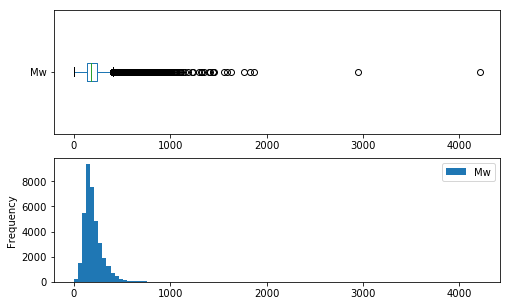

In [29]:
import matplotlib.pyplot as plt

fig, (ax, ax2) = plt.subplots(nrows=2, figsize=(8,5))

df_el_filt_mw.plot(kind='box', ax=ax, vert=False)
df_el_filt_mw.plot(kind='hist',bins=100, ax=ax2)

plt.show()

In [30]:
df_el_filt_mw.describe()

Mw
count  37159.000000
mean     201.577782
std      107.026227
min        0.000000
25%      136.125201
50%      179.094629
75%      241.922361
max     4214.114381

(ii) The Mw distribution looks suspicious (i.e., the minimum molecular weight is 0 and two of the compounds have molecular weights that are above 2000). Further inspection is needed. 

In [31]:
df_el_filt_mw[df_el_filt_mw.Mw<=50].sort_values('Mw').head(10)

Name Formula  \
CAS                                                                     
61257-62-3  Poly-L-lysine hydrobromide&middot;alanine copo...       (   
61857-39-4                     Poly-L-histidine hydrochloride       (   
26982-20-7                      Poly-L-arginine hydrochloride       (   
26700-39-0  Poly-L-lysine hydrobromide&middot;phenylalanin...       (   
25988-63-0                         Poly-L-lysine hydrobromide       (   
12408-02-5                                    Hydrogen cation      H+   
12385-13-6                                      Hydrogen atom       H   
12184-88-2                                     Hydrogen anion      H-   
1333-74-0                                            Hydrogen      H2   
12184-90-6                                    Hydrogen cation     H2+   

           Elements        Mw  
CAS                            
61257-62-3       []  0.000000  
61857-39-4       []  0.000000  
26982-20-7       []  0.000000  
26700-39-0       []  0.000000  
25988-63-0       []  0.000000  
12408-02-5      [H]  1.007825  
12385-13-6      [H]  1.007825  
12184-88-2      [H]  1.007825  
1333-74-0       [H]  2.015650  
12184-90-6      [H]  2.015650

In [74]:
df_el_filt_mw[df_el_filt_mw.Mw>=600].sort_values('Mw').tail(10)
#It is seen that there are pure elements compounds, which are in gaseous state at ambient condition, except for 'C'.
#Thus, the next step is to eliminate all of the pure elements compounds, except for 'C'

Name         Formula  \
CAS                                                                           
500016-91-1  28,28-diethyl-23,33-didocosyltetrapentacontane        C103H208   
3810-74-0                              Streptomycin sulfate  C42H84N14O36S3   
147771-02-6                        C60F44 fullerene radical          C60F44   
143471-96-9                        C60F46 fullerene radical          C60F46   
143471-98-1                                  C60F48 radical          C60F48   
28746-04-5                      Hexadecabromophthalocyanine     C32H2Br16N8   
143472-00-8                        C70F52 fullerene radical          C70F52   
143472-02-0                        C70F54 fullerene radical          C70F54   
120660-76-6        Galvinoxyl hydrogalvinoxyl (6:1) radical     C203H288O14   
120660-77-7        Galvinoxyl hydrogalvinoxyl (9:1) radical     C290H411O20   

                    Elements           Mw  
CAS                                        
500016-91-1           [C, H]  1445.627607  
3810-74-0    [C, H, N, O, S]  1456.433479  
147771-02-6           [C, F]  1555.929739  
143471-96-9           [C, F]  1593.926545  
143471-98-1           [C, F]  1631.923352  
28746-04-5     [C, H, Br, N]  1760.733644  
143472-00-8           [C, F]  1827.916964  
143472-02-0           [C, F]  1865.913771  
120660-76-6        [C, H, O]  2950.182414  
120660-77-7        [C, H, O]  4214.114381

It is seen that:
- Some of these compounds don't have the proper molecular formulae
- Others are ions and radicals
- In the next section, we will shorten the chemicals list even further by eliminating these problematic compounds


<b> 7) Inspect and shorten the list even more, as needed. </b>

In [76]:
df_el_filt_mw.shape #check original list

(37159, 4)

In [121]:
#Eliminate compounds that contain pure elements 'H', 'O', 'N',and halides. 
#Retain 'C', 'S', and 'P', as they can form pure elements at ambient conditions.
#Filter a list: 
#https://stackoverflow.com/questions/32280556/how-to-filter-a-dataframe-column-of-lists-for-those-that-contain-a-certain-item
df_el_filt_mw_filt1=df_el_filt_mw[(~df_el_filt_mw.Elements.apply(lambda x: ['H'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['O'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['N'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['F'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['Cl'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['Br'] == x)) & \
                  (~df_el_filt_mw.Elements.apply(lambda x: ['I'] == x))]
#This command does not eliminate selected elements!!! Please check!!!

#eliminate compounds that contain ions (i.e., contains plus, '\+', or minus, '-' sign in the formula)
#eliminate compounds that contain radicals (i.e., the chemical name contains the keyword radical)
#eliminate compounds that contain the prefix- 'poly'
df_el_filt_mw_filt2=df_el_filt_mw_filt1[(~df_el_filt_mw_filt1.Formula.str.contains('-')) & \
                                       (~df_el_filt_mw_filt1.Formula.str.contains('\+')) & \
                                       (~df_el_filt_mw_filt1.Name.str.contains('radical')) & \
                                       (~df_el_filt_mw_filt1.Name.str.contains('Poly'))]
                                       #the '+' filter requires the symbol'\' to work to convert to raw text 
    
df_el_filt_mw_filt3=df_el_filt_mw_filt2[~(df_el_filt_mw_filt2.Mw==0.0000000)] #delete ones with Mw=0

In [123]:
df_el_filt_mw_filt3.sort_values('Mw').head() #check

Name Formula Elements         Mw
CAS                                                
7782-40-3       Diamond       C      [C]  12.000000
7782-42-5      Graphite       C      [C]  12.000000
7440-44-0        Carbon       C      [C]  12.000000
82600-58-6       Carbon       C      [C]  12.000000
3315-37-5   Methylidyne      CH   [C, H]  13.007825

In [124]:
df_el_filt_mw_filt3.shape
#df_el_filt_mw[df_el_filt_mw.Elements==['H']]

(36321, 4)

### IV. Data analysis of the final list

The final DataFrame is called: df_el_filt_mw_filt3
> Let's look at the molecular weight distribution

> Let's classify into various functional groups

> classify by isomers

> classify by same CAS or same chemical names

<b> 1) Assess molecular weight distribution of compounds </b>  

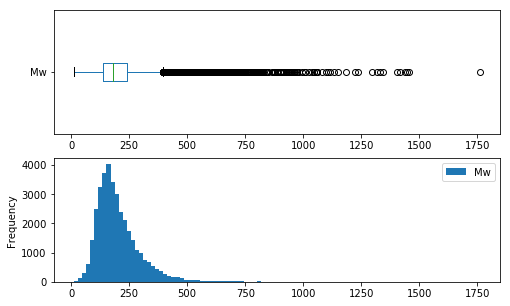

In [125]:
#molecular weight distributions

fig, (ax, ax2) = plt.subplots(nrows=2, figsize=(8,5))

df_el_filt_mw_filt3.plot(kind='box', ax=ax, vert=False)
df_el_filt_mw_filt3.plot(kind='hist',bins=100, ax=ax2)

plt.show()

#The final list contains a smooth distribution. The extreme outliers are now contained.
#most Mw's concentrate around 160.
#A skewed distribution.

In [127]:
df_el_filt_mw_filt3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36321 entries, 100-00-5 to 999-90-6
Data columns (total 4 columns):
Name        36321 non-null object
Formula     36321 non-null object
Elements    36321 non-null object
Mw          36321 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [132]:
df_el_filt_mw_filt3.describe()

Mw
count  36321.000000
mean     203.490409
std      101.626605
min       12.000000
25%      139.038176
50%      180.187801
75%      242.260966
max     1760.733644

<b> 2) Classify isomers/allotropes (i.e., the same chemical formula, but different chemical structure, and hence have different chemical names) </b>  
-The final DataFrame contains duplicated chemical formulae, as well as duplicated chemicals names; however, the CAS numbers are unique.


In [143]:
#Get entries with duplicated chemical formulae
df_el_filt_mw_filt3[df_el_filt_mw_filt3.Formula.duplicated(keep=False)].sort_values('Formula').head(10)


Name Formula     Elements          Mw
CAS                                                             
68322-97-4                BrBrO    Br2O      [Br, O]  173.831590
21308-80-5                BrOBr    Br2O      [Br, O]  173.831590
13172-31-1   Disulfur dibromide   Br2S2      [Br, S]  221.780818
71677-14-0                SSBr2   Br2S2      [Br, S]  221.780818
151920-98-8               ClBrO   BrClO  [Br, Cl, O]  129.882105
151920-97-7               BrClO   BrClO  [Br, Cl, O]  129.882105
13536-70-4                BrNO2   BrNO2   [Br, N, O]  124.911241
96607-02-2              t-BrONO   BrNO2   [Br, N, O]  124.911241
67177-47-3                 BrOO    BrO2      [Br, O]  110.908167
21255-83-4                 OBrO    BrO2      [Br, O]  110.908167

In [146]:
#get entries with duplicated chemical names
df_el_filt_mw_filt3[df_el_filt_mw_filt3.Name.duplicated(keep=False)].sort_values('Name').head(10)


Name        Formula         Elements  \
CAS                                                                        
26655-34-5              &#945;-D-Glucose        C6H12O6        [C, H, O]   
492-62-6                &#945;-D-Glucose        C6H12O6        [C, H, O]   
5989-81-1     &#945;-Lactose monohydrate  C12H22O11.H2O  [C, H, O, H, O]   
10639-26-6    &#945;-Lactose monohydrate  C12H22O11.H2O  [C, H, O, H, O]   
10208-80-7              &#945;-Muurolene         C15H24           [C, H]   
31983-22-9              &#945;-Muurolene         C15H24           [C, H]   
124191-33-9       &#945;-n-Propyldecalin         C13H24           [C, H]   
91972-45-1        &#945;-n-Propyldecalin         C13H24           [C, H]   
2268-32-8    (E)-1-Chloro-2-fluoroethene        C2H2ClF    [C, H, Cl, F]   
30860-28-7   (E)-1-Chloro-2-fluoroethene        C2HClF2    [C, H, Cl, F]   

                     Mw  
CAS                      
26655-34-5   180.063388  
492-62-6     180.063388  
5989-81-1    360.126776  
10639-26-6   360.126776  
10208-80-7   204.187801  
31983-22-9   204.187801  
124191-33-9  180.187801  
91972-45-1   180.187801  
2268-32-8     79.982906  
30860-28-7    97.973484

In [145]:
#check to ensure that the CAS numbers are unique
print('Number of compounds in the final DataFrame:', len(df_el_filt_mw_filt3))
print('Number of compounds with unique CAS number in the final DataFrame:', len(set(df_el_filt_mw_filt3.index)))

Number of compounds in the final DataFrame: 36321
Number of compounds with unique CAS number in the final DataFrame: 36321


Since the two numbers are equal, it is concluded that the compounds in the final DataFrame have unique CAS numbers.

### V. Conclusions

The following main data wrangling steps have been undertaken:
- Shortened the NIST chemical list from 72,618 to 36,416
- All rows that contain null entries in any of the three columns are deleted
- Only the list of compounds that are non ions, non radicals, and non-polymeric are retained
- Only the list of organic compounds containing the following elements: C, H, O, N, S, P, F, Cl, Br, and I are retained
- Each entry in the final DataFrame has a unique CAS number, but there are duplicate names and isomers and allotropes
- This final DataFrame will be used to download the IR spectra from the NIST database (http://webbook.nist.gov/chemistry/vib-ser/)
- The IR spectra will be analyzed for its spectral features to aid in automating the IR spectrum interpretation routine of an unknown compound 